In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Supervised_Learning_with_scikit-learn/Data/'
# base modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing data for the model
data_path = path_data + 'advertising_and_sales_clean.csv'
sales_df = pd.read_csv(data_path)
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [4]:
# exercise 01

"""
Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.
"""

# Instructions

"""

    Create X, an array of the values from the sales_df DataFrame's "radio" column.
    Create y, an array of the values from the sales_df DataFrame's "sales" column.
    Reshape X into a two-dimensional NumPy array.
    Print the shape of X and y.

"""

# solution

import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

#----------------------------------#

# Conclusion

"""
Excellent! See that there are 4546 values in both arrays? Now let's build a linear regression model!
"""

(4546, 1) (4546,)


"\nExcellent! See that there are 4546 values in both arrays? Now let's build a linear regression model!\n"

In [5]:
# exercise 02

"""
Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)

"""

# Instructions

"""

    Import LinearRegression.
    Instantiate a linear regression model.
    Predict sales values using X, storing as predictions.

"""

# solution

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

#----------------------------------#

# Conclusion

"""
Great model building! See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.
"""

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


"\nGreat model building! See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.\n"

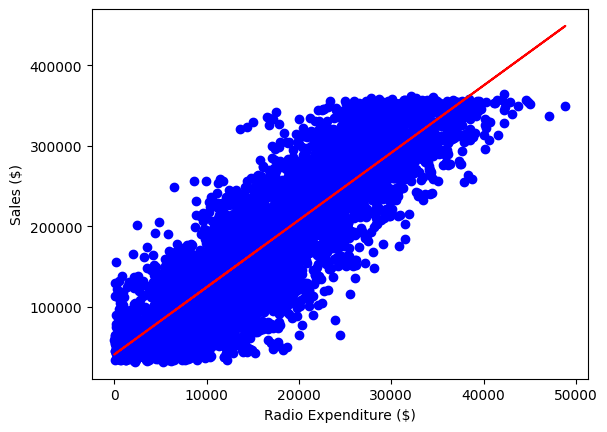

"\nThe model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.\n"

In [6]:
# exercise 03

"""
Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.
"""

# Instructions

"""

    Import matplotlib.pyplot as plt.
    Create a scatter plot visualizing y against X, with observations in blue.
    Draw a red line plot displaying the predictions against X.
    Display the plot.

"""

# solution

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

#----------------------------------#

# Conclusion

"""
The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.
"""

In [7]:
# import modules
from sklearn.model_selection import train_test_split

In [9]:
# exercise 04

"""
Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83

You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.
"""

# Instructions

"""

    Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
    Instantiate a linear regression model.
    Fit the model to the training data.
    Create y_pred, making predictions for sales using the test features.

"""

# solution

# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

#----------------------------------#

# Conclusion

"""
Great work! The first two predictions appear to be within around 5% of the actual values from the test set!
"""

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


'\nGreat work! The first two predictions appear to be within around 5% of the actual values from the test set!\n'

In [10]:
# exercise 05

"""
Regression performance

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.
"""

# Instructions

"""

    Import mean_squared_error.
    Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
    Calculate the model's root mean squared error using y_test and y_pred.
    Print r_squared and rmse.

"""

# solution

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

#----------------------------------#

# Conclusion

"""
Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!
"""

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


"\nWow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!\n"

In [12]:
X = np.array([[6.566230e+03, 2.907980e+03],
       [9.237760e+03, 2.409570e+03],
       [1.588645e+04, 2.913410e+03],
       [3.002003e+04, 6.922300e+03],
       [8.437410e+03, 1.406000e+03],
       [9.614380e+03, 1.027160e+03],
       [2.489381e+04, 4.273600e+03],
       [1.735504e+04, 2.289850e+03],
       [2.464890e+04, 7.130120e+03],
       [4.311300e+02, 2.229420e+03],
       [2.434519e+04, 5.151480e+03],
       [1.580734e+04, 3.194920e+03],
       [2.024042e+04, 3.921150e+03],
       [2.263300e+02, 2.372710e+03],
       [3.900200e+03, 6.040000e+01],
       [2.235372e+04, 9.408000e+02],
       [9.905840e+03, 1.853220e+03],
       [3.611609e+04, 3.674300e+03],
       [4.073699e+04, 4.636560e+03],
       [1.269509e+04, 3.884580e+03],
       [3.556822e+04, 2.832450e+03],
       [2.828970e+03, 4.556700e+03],
       [3.726382e+04, 6.886530e+03],
       [2.034899e+04, 1.227180e+03],
       [2.780761e+04, 4.060780e+03],
       [7.280090e+03, 2.179480e+03],
       [9.282690e+03, 3.055760e+03],
       [1.305041e+04, 1.971180e+03],
       [2.413762e+04, 5.573090e+03],
       [2.902102e+04, 6.432000e+03],
       [3.567660e+03, 3.558310e+03],
       [2.733578e+04, 5.263650e+03],
       [1.634871e+04, 2.814010e+03],
       [1.737653e+04, 1.905040e+03],
       [1.823019e+04, 4.079290e+03],
       [2.362624e+04, 6.199770e+03],
       [2.351057e+04, 2.188930e+03],
       [2.456355e+04, 3.419670e+03],
       [1.284213e+04, 2.593700e+03],
       [2.764759e+04, 5.611220e+03],
       [2.163920e+04, 3.223650e+03],
       [3.757095e+04, 8.529600e+03],
       [1.059953e+04, 6.792800e+02],
       [6.145250e+03, 1.591120e+03],
       [6.276200e+02, 2.676080e+03],
       [8.852090e+03, 4.149000e+01],
       [1.152415e+04, 2.566790e+03],
       [1.443411e+04, 4.632800e+02],
       [4.010853e+04, 7.236170e+03],
       [3.428141e+04, 8.697490e+03],
       [2.392270e+04, 3.373810e+03],
       [2.416913e+04, 2.087910e+03],
       [3.455870e+03, 2.400120e+03],
       [1.006763e+04, 1.729670e+03],
       [5.197860e+03, 4.139700e+02],
       [1.075005e+04, 2.442170e+03],
       [1.044745e+04, 3.356110e+03],
       [2.989274e+04, 6.096740e+03],
       [2.504556e+04, 6.109370e+03],
       [1.711324e+04, 2.638640e+03],
       [3.921540e+03, 2.527850e+03],
       [1.165649e+04, 3.584700e+02],
       [3.160769e+04, 3.952450e+03],
       [1.864944e+04, 4.529930e+03],
       [3.126641e+04, 8.080730e+03],
       [3.014057e+04, 6.546160e+03],
       [2.234290e+03, 1.077720e+03],
       [2.469852e+04, 6.741380e+03],
       [1.524773e+04, 4.587700e+03],
       [2.682235e+04, 5.514190e+03],
       [2.039195e+04, 3.212250e+03],
       [1.779013e+04, 4.117630e+03],
       [2.527609e+04, 3.239270e+03],
       [3.305516e+04, 6.063460e+03],
       [1.823396e+04, 8.275500e+02],
       [8.808700e+03, 2.414190e+03],
       [2.295531e+04, 2.642500e+03],
       [6.041730e+03, 2.136630e+03],
       [3.771781e+04, 3.590090e+03],
       [9.096780e+03, 3.818830e+03],
       [1.648200e+03, 1.305730e+03],
       [4.711629e+04, 9.322960e+03],
       [3.923231e+04, 3.698660e+03],
       [1.691203e+04, 4.034660e+03],
       [3.152190e+04, 6.398280e+03],
       [3.305945e+04, 5.789300e+03],
       [1.064511e+04, 1.915520e+03],
       [7.580700e+02, 2.359200e+03],
       [2.172600e+03, 4.208320e+03],
       [2.540660e+04, 3.215460e+03],
       [8.001270e+03, 4.187830e+03],
       [3.841522e+04, 7.673640e+03],
       [3.934780e+03, 3.284700e+02],
       [2.435904e+04, 3.797370e+03],
       [1.121369e+04, 5.588400e+02],
       [1.318726e+04, 2.766350e+03],
       [3.370790e+04, 3.327270e+03],
       [9.437710e+03, 4.377590e+03],
       [9.726740e+03, 3.380000e+02],
       [8.421990e+03, 3.279480e+03],
       [1.995639e+04, 2.261410e+03],
       [2.526071e+04, 6.765660e+03],
       [2.603599e+04, 3.290820e+03],
       [2.803821e+04, 2.924280e+03],
       [3.214621e+04, 4.610930e+03],
       [2.184654e+04, 2.642410e+03],
       [1.746902e+04, 4.337630e+03],
       [7.291960e+03, 2.317960e+03],
       [3.426020e+03, 3.180000e+00],
       [1.488018e+04, 2.367560e+03],
       [1.742885e+04, 3.306710e+03],
       [2.956295e+04, 2.060720e+03],
       [1.456590e+04, 1.998220e+03],
       [2.022087e+04, 4.540900e+03],
       [1.535419e+04, 1.049370e+03],
       [3.387824e+04, 8.091610e+03],
       [1.521524e+04, 1.501450e+03],
       [3.179694e+04, 2.162500e+03],
       [8.872270e+03, 1.605210e+03],
       [1.543267e+04, 3.986570e+03],
       [2.103218e+04, 5.087020e+03],
       [6.447510e+03, 1.415640e+03],
       [4.561310e+03, 1.652760e+03],
       [3.657381e+04, 5.273160e+03],
       [1.380310e+03, 5.286680e+03],
       [1.890361e+04, 4.889990e+03],
       [9.722750e+03, 9.030600e+02],
       [4.828280e+03, 2.860400e+02],
       [1.837840e+04, 1.320080e+03],
       [1.744948e+04, 8.877600e+02],
       [2.600964e+04, 1.495600e+03],
       [2.848182e+04, 1.520800e+03],
       [2.006156e+04, 3.529270e+03],
       [3.073729e+04, 8.980230e+03],
       [3.642231e+04, 9.997470e+03],
       [3.165320e+04, 7.776980e+03],
       [2.143852e+04, 5.708100e+03],
       [1.619365e+04, 7.922000e+02],
       [1.345218e+04, 1.503080e+03],
       [1.215558e+04, 9.325300e+02],
       [2.238969e+04, 1.506110e+03],
       [8.573860e+03, 3.298360e+03],
       [8.477140e+03, 6.088200e+02],
       [3.395562e+04, 4.479870e+03],
       [2.838519e+04, 6.157700e+03],
       [1.188644e+04, 1.558210e+03],
       [8.715250e+03, 1.814700e+02],
       [1.830464e+04, 4.895170e+03],
       [2.400693e+04, 4.152020e+03],
       [3.673413e+04, 7.359710e+03],
       [1.894795e+04, 2.229810e+03],
       [7.585700e+02, 5.278800e+02],
       [1.397370e+03, 1.444590e+03],
       [5.471960e+03, 6.729600e+02],
       [3.136391e+04, 5.657550e+03],
       [4.856120e+03, 8.741600e+02],
       [1.963906e+04, 7.957300e+02],
       [1.901537e+04, 6.543310e+03],
       [2.487105e+04, 5.036280e+03],
       [3.011727e+04, 3.357790e+03],
       [2.042365e+04, 4.346780e+03],
       [2.237478e+04, 5.066580e+03],
       [2.286738e+04, 9.689800e+02],
       [1.739878e+04, 4.007450e+03],
       [2.343479e+04, 5.914870e+03],
       [1.033353e+04, 1.130120e+03],
       [2.934461e+04, 3.436480e+03],
       [2.329045e+04, 5.671690e+03],
       [3.709706e+04, 7.596290e+03],
       [2.380857e+04, 3.766600e+03],
       [2.746149e+04, 1.524060e+03],
       [2.308149e+04, 3.056300e+03],
       [1.178254e+04, 2.956730e+03],
       [3.773241e+04, 7.724050e+03],
       [3.049816e+04, 8.823310e+03],
       [8.840110e+03, 9.629400e+02],
       [2.640676e+04, 2.475100e+03],
       [6.313170e+03, 1.310030e+03],
       [2.788321e+04, 7.467940e+03],
       [1.526673e+04, 2.205880e+03],
       [8.197930e+03, 2.119870e+03],
       [8.077500e+03, 1.323000e+01],
       [3.556580e+03, 3.600100e+02],
       [3.785250e+03, 1.569640e+03],
       [1.322124e+04, 3.660570e+03],
       [2.714817e+04, 4.409400e+03],
       [2.619267e+04, 4.127600e+03],
       [1.336587e+04, 1.214000e+01],
       [2.840915e+04, 4.085220e+03],
       [1.025292e+04, 8.653300e+02],
       [1.670377e+04, 1.888400e+03],
       [3.292019e+04, 9.904290e+03],
       [3.037271e+04, 5.946110e+03],
       [3.438820e+03, 7.495200e+02],
       [1.904450e+04, 2.715100e+03],
       [2.846460e+04, 5.545680e+03],
       [2.639407e+04, 3.837370e+03],
       [2.568729e+04, 6.903110e+03],
       [1.572634e+04, 5.470320e+03],
       [3.367470e+04, 8.243050e+03],
       [1.416232e+04, 4.388110e+03],
       [3.598470e+03, 4.325620e+03],
       [2.489028e+04, 3.531090e+03],
       [9.809650e+03, 2.175100e+03],
       [3.613478e+04, 6.812530e+03],
       [1.910204e+04, 4.773050e+03],
       [1.222740e+04, 1.306050e+03],
       [8.843920e+03, 1.048100e+02],
       [2.201750e+03, 3.765500e+02],
       [4.894410e+03, 1.472000e+02],
       [1.190789e+04, 1.958040e+03],
       [5.392620e+03, 2.064000e+01],
       [2.077468e+04, 6.259150e+03],
       [2.380959e+04, 1.915050e+03],
       [2.227671e+04, 3.290080e+03],
       [1.660931e+04, 5.159070e+03],
       [1.225136e+04, 1.463120e+03],
       [1.270841e+04, 5.838250e+03],
       [2.143889e+04, 3.147750e+03],
       [1.631904e+04, 4.633100e+02],
       [2.602395e+04, 3.116430e+03],
       [2.127291e+04, 3.385120e+03],
       [3.329586e+04, 1.229450e+03],
       [1.901559e+04, 5.895170e+03],
       [1.093201e+04, 1.867650e+03],
       [9.197030e+03, 3.246670e+03],
       [3.170701e+04, 4.365170e+03],
       [9.398840e+03, 3.206510e+03],
       [1.376198e+04, 2.502650e+03],
       [4.338840e+03, 2.807000e+01],
       [1.238448e+04, 1.637160e+03],
       [1.001903e+04, 1.910900e+02],
       [3.231926e+04, 6.494520e+03],
       [2.991963e+04, 6.312900e+03],
       [3.047389e+04, 5.704360e+03],
       [2.436246e+04, 5.463180e+03],
       [1.459517e+04, 5.732400e+02],
       [1.787483e+04, 3.918940e+03],
       [3.355567e+04, 5.401720e+03],
       [1.831721e+04, 5.106410e+03],
       [1.581008e+04, 4.951700e+02],
       [2.143025e+04, 3.608350e+03],
       [1.284828e+04, 2.810380e+03],
       [3.827143e+04, 8.586450e+03],
       [2.524182e+04, 5.969540e+03],
       [3.188670e+03, 2.761400e+02],
       [3.351178e+04, 4.663530e+03],
       [3.545519e+04, 4.091400e+03],
       [1.881473e+04, 3.041470e+03],
       [2.611806e+04, 4.020020e+03],
       [2.245002e+04, 3.389500e+03],
       [1.095050e+03, 1.784710e+03],
       [3.207909e+04, 4.158340e+03],
       [7.989790e+03, 5.089600e+02],
       [3.374743e+04, 2.798050e+03],
       [1.745288e+04, 3.909850e+03],
       [8.301390e+03, 2.977400e+02],
       [5.358820e+03, 3.103560e+03],
       [2.193601e+04, 4.436260e+03],
       [2.157823e+04, 8.874240e+03],
       [7.789510e+03, 4.067820e+03],
       [2.377346e+04, 4.542660e+03],
       [1.971907e+04, 5.481920e+03],
       [2.507908e+04, 5.066100e+03],
       [1.553733e+04, 1.258100e+02],
       [6.621640e+03, 1.136300e+02],
       [1.136399e+04, 2.321300e+03],
       [1.949996e+04, 4.912340e+03],
       [1.300455e+04, 5.277120e+03],
       [1.222597e+04, 3.972100e+02],
       [2.103197e+04, 1.867290e+03],
       [9.235850e+03, 2.963210e+03],
       [2.558344e+04, 3.870990e+03],
       [2.554637e+04, 1.963490e+03],
       [2.537723e+04, 3.997030e+03],
       [4.643180e+03, 6.373800e+02],
       [4.014310e+03, 1.258970e+03],
       [2.329031e+04, 7.389830e+03],
       [9.531450e+03, 1.035000e+02],
       [2.429320e+04, 8.041210e+03],
       [1.441875e+04, 3.117410e+03],
       [1.934086e+04, 1.602340e+03],
       [2.630066e+04, 4.204040e+03],
       [2.332245e+04, 3.866740e+03],
       [3.105741e+04, 3.806950e+03],
       [1.060640e+03, 1.093880e+03],
       [1.761333e+04, 3.480430e+03],
       [2.377898e+04, 2.930680e+03],
       [1.210538e+04, 4.007430e+03],
       [2.090000e+03, 2.177500e+02],
       [3.497200e+03, 3.337070e+03],
       [1.915584e+04, 1.471000e+01],
       [2.527194e+04, 7.717110e+03],
       [1.345746e+04, 9.176600e+02],
       [9.487990e+03, 2.504300e+02],
       [3.672308e+04, 3.950390e+03],
       [2.796330e+04, 2.837580e+03],
       [2.026586e+04, 3.446130e+03],
       [1.685678e+04, 3.886010e+03],
       [1.222872e+04, 1.749290e+03],
       [8.823530e+03, 3.405840e+03],
       [1.529205e+04, 3.340440e+03],
       [1.411562e+04, 3.328380e+03],
       [2.455463e+04, 4.832330e+03],
       [5.313710e+03, 2.473600e+03],
       [2.552828e+04, 3.140870e+03],
       [2.117480e+04, 4.486400e+03],
       [1.854842e+04, 2.455580e+03],
       [2.478624e+04, 6.349960e+03],
       [2.959440e+04, 8.243720e+03],
       [2.950102e+04, 2.518220e+03],
       [9.837590e+03, 2.080180e+03],
       [1.744305e+04, 5.549220e+03],
       [2.249200e+03, 3.951500e+02],
       [2.650282e+04, 3.537620e+03],
       [2.448398e+04, 5.918990e+03],
       [1.505940e+03, 2.438900e+03],
       [3.796930e+04, 4.739680e+03],
       [2.948423e+04, 7.237780e+03],
       [3.046310e+03, 1.743630e+03],
       [3.636570e+04, 1.944660e+03],
       [2.528200e+04, 2.798760e+03],
       [2.607550e+04, 5.143710e+03],
       [1.093090e+04, 3.085380e+03],
       [8.978480e+03, 5.363000e+01],
       [6.122320e+03, 2.606810e+03],
       [2.773801e+04, 5.293540e+03],
       [2.318345e+04, 7.621600e+02],
       [1.692417e+04, 6.447480e+03],
       [2.281608e+04, 4.717040e+03],
       [2.276811e+04, 2.964100e+03],
       [1.279448e+04, 3.973160e+03],
       [1.444535e+04, 1.270280e+03],
       [1.475868e+04, 8.074100e+02],
       [1.761714e+04, 5.116680e+03],
       [3.737904e+04, 4.767530e+03],
       [7.228350e+03, 5.250180e+03],
       [5.120820e+03, 2.205300e+03],
       [3.159830e+03, 4.261810e+03],
       [1.544552e+04, 6.241000e+01],
       [8.437960e+03, 2.926370e+03],
       [8.572800e+02, 2.187400e+02],
       [4.037910e+03, 2.876510e+03],
       [8.482700e+03, 9.461500e+02],
       [1.750937e+04, 3.912910e+03],
       [8.822600e+03, 3.883100e+02],
       [1.397381e+04, 2.937260e+03],
       [1.323675e+04, 6.039200e+02],
       [2.793352e+04, 3.978530e+03],
       [3.424420e+03, 1.254890e+03],
       [2.157160e+04, 1.825900e+02],
       [2.402670e+04, 4.468540e+03],
       [3.628139e+04, 7.693020e+03],
       [1.471876e+04, 5.067920e+03],
       [2.504344e+04, 7.954160e+03],
       [2.626345e+04, 4.666250e+03],
       [3.511060e+03, 1.668670e+03],
       [1.114220e+03, 1.243100e+02],
       [3.159759e+04, 6.096170e+03],
       [2.212318e+04, 4.548470e+03],
       [7.235170e+03, 4.165980e+03],
       [3.051679e+04, 4.253770e+03],
       [3.574401e+04, 8.485580e+03],
       [9.445030e+03, 9.047100e+02],
       [1.104101e+04, 5.818000e+02],
       [2.827466e+04, 2.404140e+03],
       [2.059744e+04, 5.687520e+03],
       [2.027720e+03, 5.427700e+02],
       [7.888210e+03, 3.998360e+03],
       [1.993975e+04, 1.581670e+03],
       [1.476515e+04, 4.973730e+03],
       [2.928104e+04, 4.182350e+03],
       [8.466710e+03, 4.076580e+03],
       [2.316260e+04, 2.051330e+03],
       [2.168479e+04, 4.362890e+03],
       [2.763160e+03, 1.491290e+03],
       [3.613679e+04, 8.724350e+03],
       [3.601062e+04, 9.307980e+03],
       [1.362384e+04, 1.081630e+03],
       [3.129657e+04, 6.268560e+03],
       [2.572170e+04, 3.653920e+03],
       [1.777875e+04, 6.010800e+03],
       [3.159150e+03, 1.838040e+03],
       [1.184308e+04, 1.411740e+03],
       [3.530815e+04, 8.233630e+03],
       [1.772850e+04, 1.316670e+03],
       [2.264767e+04, 1.815300e+03],
       [9.529040e+03, 4.632000e+01],
       [2.182868e+04, 3.852360e+03],
       [1.166685e+04, 3.124110e+03],
       [1.174289e+04, 1.545790e+03],
       [2.315884e+04, 6.493390e+03],
       [3.120063e+04, 5.956150e+03],
       [3.149937e+04, 5.374440e+03],
       [2.179281e+04, 3.935900e+02],
       [2.195981e+04, 8.805900e+02],
       [2.491649e+04, 4.628290e+03],
       [9.352960e+03, 6.061300e+02],
       [3.128978e+04, 4.623310e+03],
       [1.013781e+04, 3.181970e+03],
       [1.946439e+04, 1.767530e+03],
       [2.994190e+04, 8.349000e+03],
       [1.385471e+04, 3.723620e+03],
       [1.525966e+04, 1.938090e+03],
       [1.302139e+04, 3.264330e+03],
       [1.575874e+04, 1.621960e+03],
       [2.328773e+04, 6.650240e+03],
       [2.308246e+04, 5.745420e+03],
       [2.578136e+04, 5.715410e+03],
       [1.544192e+04, 6.406000e+01],
       [5.092820e+03, 1.400160e+03],
       [3.349222e+04, 9.638970e+03],
       [4.027760e+03, 2.162900e+02],
       [1.131364e+04, 1.457210e+03],
       [1.896636e+04, 4.058400e+03],
       [1.983138e+04, 2.825680e+03],
       [1.627926e+04, 5.187610e+03],
       [2.623076e+04, 4.307670e+03],
       [2.940184e+04, 8.837800e+02],
       [2.835102e+04, 6.541170e+03],
       [3.399232e+04, 5.781690e+03],
       [3.121315e+04, 6.894320e+03],
       [1.372730e+04, 3.332910e+03],
       [1.072553e+04, 5.640400e+02],
       [1.610085e+04, 3.055370e+03],
       [7.047020e+03, 4.181180e+03],
       [1.153545e+04, 3.916640e+03],
       [3.847063e+04, 5.793620e+03],
       [6.286840e+03, 1.318400e+02],
       [3.880400e+02, 1.104820e+03],
       [1.347690e+04, 3.355970e+03],
       [2.720007e+04, 8.702650e+03],
       [4.233165e+04, 8.486320e+03],
       [9.057540e+03, 1.480040e+03],
       [3.240065e+04, 3.784150e+03],
       [1.156313e+04, 1.926690e+03],
       [7.258210e+03, 4.582010e+03],
       [2.502656e+04, 4.134000e+03],
       [8.177610e+03, 3.447210e+03],
       [5.264620e+03, 2.531730e+03],
       [2.391540e+04, 3.955480e+03],
       [2.055639e+04, 2.577390e+03],
       [2.753356e+04, 1.045392e+04],
       [1.410623e+04, 7.501200e+02],
       [2.724137e+04, 4.250420e+03],
       [3.066125e+04, 7.211120e+03],
       [8.797290e+03, 2.409160e+03],
       [2.522567e+04, 3.061940e+03],
       [5.735730e+03, 2.354330e+03],
       [1.977618e+04, 3.217630e+03],
       [3.272548e+04, 8.829540e+03],
       [2.223935e+04, 8.194790e+03],
       [1.057993e+04, 6.446000e+01],
       [1.299587e+04, 2.708400e+02],
       [3.146129e+04, 1.744870e+03],
       [2.960111e+04, 6.481910e+03],
       [7.474270e+03, 4.401100e+02],
       [1.809701e+04, 1.021500e+02],
       [2.406207e+04, 1.540090e+03],
       [2.816502e+04, 6.919150e+03],
       [2.759891e+04, 3.606600e+03],
       [1.765544e+04, 2.395350e+03],
       [1.913142e+04, 6.834950e+03],
       [6.416720e+03, 2.258860e+03],
       [6.359350e+03, 7.043700e+02],
       [1.552766e+04, 2.055270e+03],
       [9.150560e+03, 4.636300e+03],
       [2.034673e+04, 5.491170e+03],
       [4.799850e+03, 5.700300e+02],
       [1.773673e+04, 2.094380e+03],
       [6.101050e+03, 3.262970e+03],
       [3.518070e+03, 2.293790e+03],
       [1.566927e+04, 1.086780e+03],
       [1.783665e+04, 5.109700e+03],
       [3.740399e+04, 6.441650e+03],
       [5.418000e+03, 4.626970e+03],
       [2.658628e+04, 4.520670e+03],
       [1.250160e+04, 1.247270e+03],
       [3.607776e+04, 1.140363e+04],
       [3.102303e+04, 7.352550e+03],
       [5.384660e+03, 6.319900e+02],
       [7.388490e+03, 1.204900e+02],
       [3.135903e+04, 6.512740e+03],
       [7.277730e+03, 2.771400e+02],
       [2.146941e+04, 1.186420e+03],
       [1.005141e+04, 1.568500e+02],
       [1.201935e+04, 4.631650e+03],
       [1.778261e+04, 3.773450e+03],
       [2.800048e+04, 7.370700e+03],
       [1.995573e+04, 5.245120e+03],
       [9.100430e+03, 2.705530e+03],
       [1.393104e+04, 3.935940e+03],
       [1.636000e+04, 3.914310e+03],
       [1.706761e+04, 3.299870e+03],
       [2.497844e+04, 2.640890e+03],
       [2.418359e+04, 4.736880e+03],
       [1.207217e+04, 4.381530e+03],
       [2.631231e+04, 5.591730e+03],
       [6.837290e+03, 2.314950e+03],
       [3.024577e+04, 6.376380e+03],
       [2.666674e+04, 3.698030e+03],
       [7.430200e+03, 1.294090e+03],
       [1.880608e+04, 1.052300e+03],
       [9.960470e+03, 9.048700e+02],
       [2.317995e+04, 4.492850e+03],
       [1.228080e+03, 1.523410e+03],
       [1.394233e+04, 1.387050e+03],
       [2.973254e+04, 2.012400e+03],
       [1.037726e+04, 6.198000e+01],
       [3.734778e+04, 8.278560e+03],
       [1.475742e+04, 1.887770e+03],
       [2.530056e+04, 2.365390e+03],
       [1.218350e+03, 1.270440e+03],
       [2.107696e+04, 1.240820e+03],
       [2.295087e+04, 5.688320e+03],
       [2.920318e+04, 5.343640e+03],
       [1.573250e+04, 7.952640e+03],
       [3.485517e+04, 8.128920e+03],
       [1.799967e+04, 6.896800e+02],
       [8.466520e+03, 6.485500e+02],
       [1.585081e+04, 3.055220e+03],
       [1.818480e+04, 1.570360e+03],
       [1.284949e+04, 3.413280e+03],
       [3.339188e+04, 6.297540e+03],
       [1.430082e+04, 2.954930e+03],
       [1.056917e+04, 2.990740e+03],
       [3.403092e+04, 4.107470e+03],
       [3.834983e+04, 5.625680e+03],
       [6.701210e+03, 8.861600e+02],
       [2.769458e+04, 6.330320e+03],
       [7.462650e+03, 2.487820e+03],
       [1.589286e+04, 2.001410e+03],
       [4.312933e+04, 1.017498e+04],
       [1.311580e+03, 9.178700e+02],
       [1.299051e+04, 3.381620e+03],
       [3.687630e+04, 7.618610e+03],
       [1.866968e+04, 3.045510e+03],
       [2.470392e+04, 5.052820e+03],
       [9.847550e+03, 5.533100e+02],
       [2.412286e+04, 1.078750e+03],
       [3.373717e+04, 8.701500e+03],
       [3.238632e+04, 6.903400e+03],
       [2.077119e+04, 1.930360e+03],
       [2.766981e+04, 1.605370e+03],
       [3.093432e+04, 4.066910e+03],
       [1.069838e+04, 1.359460e+03],
       [7.377350e+03, 4.990930e+03],
       [7.759340e+03, 1.962260e+03],
       [3.771627e+04, 4.007700e+03],
       [1.147823e+04, 6.957700e+02],
       [3.606087e+04, 2.325710e+03],
       [1.382810e+04, 8.901600e+02],
       [1.468532e+04, 2.331900e+03],
       [1.452212e+04, 2.823850e+03],
       [2.882671e+04, 5.519580e+03],
       [2.214975e+04, 5.275780e+03],
       [1.402881e+04, 1.276220e+03],
       [7.736680e+03, 2.059610e+03],
       [2.976976e+04, 2.856590e+03],
       [2.702480e+04, 3.399220e+03],
       [1.678014e+04, 2.965430e+03],
       [1.668732e+04, 3.776000e+02],
       [1.495741e+04, 1.952880e+03],
       [3.209708e+04, 6.671540e+03],
       [1.600938e+04, 1.309540e+03],
       [2.183513e+04, 6.269990e+03],
       [3.681228e+04, 3.083610e+03],
       [2.048869e+04, 5.290460e+03],
       [1.458661e+04, 2.221680e+03],
       [1.822599e+04, 6.618430e+03],
       [1.476556e+04, 4.811430e+03],
       [1.230121e+04, 1.123410e+03],
       [1.948178e+04, 2.244640e+03],
       [2.818172e+04, 6.851150e+03],
       [2.232668e+04, 1.652800e+02],
       [1.481925e+04, 6.158930e+03],
       [2.393088e+04, 3.943730e+03],
       [3.132713e+04, 1.026055e+04],
       [3.009535e+04, 8.267240e+03],
       [3.516688e+04, 5.677770e+03],
       [3.573462e+04, 6.814450e+03],
       [9.225850e+03, 3.542560e+03],
       [1.232310e+04, 1.312620e+03],
       [1.161550e+03, 1.262100e+02],
       [1.697491e+04, 5.187080e+03],
       [6.464550e+03, 1.375940e+03],
       [2.544022e+04, 3.473810e+03],
       [2.026713e+04, 5.456290e+03],
       [8.619230e+03, 3.803700e+02],
       [1.970537e+04, 6.268880e+03],
       [3.344696e+04, 5.205860e+03],
       [3.298398e+04, 5.622830e+03],
       [1.815905e+04, 4.246500e+03],
       [1.789152e+04, 4.776430e+03],
       [1.903007e+04, 2.701390e+03],
       [2.436576e+04, 5.020140e+03],
       [1.335489e+04, 6.071650e+03],
       [2.385097e+04, 1.784880e+03],
       [2.510416e+04, 6.380920e+03],
       [2.499210e+04, 4.209570e+03],
       [2.588766e+04, 3.593710e+03],
       [3.543037e+04, 4.872220e+03],
       [1.294363e+04, 1.404960e+03],
       [1.874249e+04, 2.460790e+03],
       [2.466065e+04, 3.371500e+03],
       [1.557568e+04, 3.615100e+03],
       [2.258564e+04, 2.507440e+03],
       [2.357866e+04, 2.856660e+03],
       [1.504650e+04, 4.417360e+03],
       [3.205840e+03, 1.792200e+03],
       [2.919640e+04, 5.766580e+03],
       [2.801878e+04, 4.629250e+03],
       [1.327034e+04, 8.588800e+02],
       [1.878284e+04, 3.505200e+03],
       [1.983234e+04, 1.810460e+03],
       [2.429614e+04, 3.260730e+03],
       [2.112090e+03, 2.920710e+03],
       [3.119410e+03, 2.819740e+03],
       [1.212654e+04, 2.104500e+02],
       [1.634726e+04, 1.401880e+03],
       [2.411862e+04, 4.750730e+03],
       [1.402166e+04, 2.265040e+03],
       [2.499656e+04, 7.915970e+03],
       [2.734182e+04, 5.530700e+03],
       [1.116310e+04, 2.308970e+03],
       [6.888970e+03, 1.847120e+03],
       [5.526390e+03, 4.825700e+02],
       [6.090840e+03, 1.417020e+03],
       [2.793115e+04, 4.884050e+03],
       [2.084735e+04, 4.647690e+03],
       [2.989438e+04, 5.836860e+03],
       [3.143961e+04, 5.037080e+03],
       [1.342910e+03, 2.244920e+03],
       [1.070250e+04, 3.106180e+03],
       [9.736330e+03, 5.985600e+02],
       [1.731800e+04, 3.417840e+03],
       [1.170794e+04, 3.509530e+03],
       [2.267960e+04, 3.535070e+03],
       [2.505227e+04, 7.118750e+03],
       [2.285141e+04, 6.671700e+02],
       [7.022070e+03, 2.896000e+02],
       [6.244160e+03, 7.593500e+02],
       [1.175925e+04, 5.010340e+03],
       [2.887955e+04, 8.327500e+02],
       [6.816990e+03, 3.927800e+03],
       [4.140970e+03, 2.501200e+03],
       [9.954120e+03, 3.674950e+03],
       [3.256647e+04, 5.179910e+03],
       [3.333171e+04, 6.057540e+03],
       [1.281137e+04, 2.234520e+03],
       [1.697645e+04, 4.517270e+03],
       [1.495348e+04, 4.802000e+01],
       [2.714848e+04, 1.178330e+03],
       [2.548627e+04, 4.172270e+03],
       [2.935113e+04, 5.061330e+03],
       [1.546761e+04, 3.337650e+03],
       [2.810521e+04, 5.059690e+03],
       [8.529030e+03, 4.146160e+03],
       [2.455606e+04, 3.088860e+03],
       [1.209401e+04, 1.192830e+03],
       [1.312882e+04, 2.864040e+03],
       [2.787459e+04, 2.319350e+03],
       [1.270924e+04, 4.638510e+03],
       [1.449181e+04, 3.340070e+03],
       [8.781470e+03, 5.393660e+03],
       [2.646683e+04, 3.613320e+03],
       [1.173470e+03, 1.042340e+03],
       [2.320130e+03, 9.823500e+02],
       [3.167189e+04, 3.754570e+03],
       [1.964763e+04, 8.561300e+02],
       [2.112199e+04, 5.403300e+03],
       [3.253313e+04, 5.651040e+03],
       [2.655070e+04, 6.375070e+03],
       [2.431772e+04, 5.292840e+03],
       [1.213186e+04, 2.877690e+03],
       [1.625773e+04, 3.206350e+03],
       [2.615918e+04, 5.231820e+03],
       [2.031685e+04, 2.650210e+03],
       [1.713626e+04, 3.315390e+03],
       [5.809820e+03, 1.228690e+03],
       [3.242627e+04, 5.848850e+03],
       [1.766609e+04, 1.874090e+03],
       [8.178450e+03, 7.687600e+02],
       [1.746309e+04, 4.017840e+03],
       [1.407835e+04, 1.116860e+03],
       [1.078600e+04, 4.761800e+02],
       [1.245430e+04, 2.053710e+03],
       [4.718760e+03, 1.231210e+03],
       [1.595831e+04, 3.916940e+03],
       [1.668830e+04, 4.329400e+03],
       [8.202800e+03, 1.044900e+02],
       [2.037855e+04, 3.688390e+03],
       [3.577369e+04, 2.094510e+03],
       [2.691641e+04, 5.854130e+03],
       [1.356013e+04, 3.317590e+03],
       [3.059481e+04, 4.644490e+03],
       [2.386129e+04, 6.666100e+03],
       [1.797929e+04, 1.427130e+03],
       [1.496439e+04, 2.969000e+01],
       [2.518516e+04, 5.737250e+03],
       [3.005661e+04, 4.918530e+03],
       [2.901073e+04, 3.913410e+03],
       [1.221216e+04, 3.794750e+03],
       [6.374570e+03, 2.643270e+03],
       [1.638246e+04, 4.722280e+03],
       [1.477598e+04, 8.008030e+03],
       [9.811400e+02, 1.377660e+03],
       [1.915650e+04, 3.724760e+03],
       [9.359060e+03, 5.249310e+03],
       [2.390796e+04, 2.558250e+03],
       [2.598586e+04, 5.632780e+03],
       [1.845122e+04, 5.734660e+03],
       [9.651600e+02, 2.585390e+03],
       [1.748620e+04, 2.355670e+03],
       [2.961755e+04, 4.126550e+03],
       [1.940385e+04, 3.950260e+03],
       [1.864877e+04, 2.010870e+03],
       [1.366591e+04, 1.506380e+03],
       [1.816783e+04, 7.064560e+03],
       [2.034360e+04, 2.500260e+03],
       [5.926630e+03, 2.135840e+03],
       [2.367261e+04, 3.107650e+03],
       [2.506095e+04, 8.261170e+03],
       [1.419071e+04, 3.321540e+03],
       [2.419299e+04, 8.827690e+03],
       [1.840548e+04, 4.588630e+03],
       [1.881071e+04, 3.011660e+03],
       [4.649780e+03, 2.389720e+03],
       [2.191504e+04, 1.356270e+03],
       [4.486130e+04, 8.579320e+03],
       [2.724760e+03, 1.034830e+03],
       [1.560966e+04, 6.728210e+03],
       [3.142973e+04, 3.255130e+03],
       [1.277032e+04, 2.776050e+03],
       [1.579333e+04, 1.878800e+03],
       [1.178493e+04, 9.090000e+00],
       [8.342330e+03, 4.017460e+03],
       [2.355330e+04, 5.892930e+03],
       [7.956170e+03, 9.120800e+02],
       [3.421398e+04, 4.786460e+03],
       [2.711403e+04, 2.646600e+03],
       [3.747520e+04, 6.093510e+03],
       [1.037447e+04, 4.329790e+03],
       [3.700649e+04, 7.150100e+03],
       [3.260830e+04, 4.793070e+03],
       [2.015441e+04, 3.502210e+03],
       [2.609728e+04, 1.525980e+03],
       [1.684366e+04, 1.582100e+03],
       [2.140158e+04, 2.332840e+03],
       [1.613496e+04, 3.038420e+03],
       [1.086707e+04, 2.932960e+03],
       [2.645467e+04, 7.956070e+03],
       [1.789843e+04, 9.256300e+02],
       [2.532563e+04, 2.071340e+03],
       [3.952325e+04, 9.351920e+03],
       [1.394313e+04, 6.153940e+03],
       [2.573139e+04, 3.820390e+03],
       [1.235406e+04, 4.355860e+03],
       [2.589509e+04, 2.400940e+03],
       [6.334380e+03, 7.954800e+02],
       [2.374560e+04, 3.850860e+03],
       [1.205704e+04, 3.722750e+03],
       [1.011534e+04, 2.922210e+03],
       [2.971345e+04, 5.312680e+03],
       [1.704016e+04, 3.156620e+03],
       [2.245102e+04, 1.115810e+03],
       [8.517660e+03, 4.432200e+02],
       [1.980994e+04, 6.390370e+03],
       [1.071151e+04, 1.080980e+03],
       [2.611363e+04, 2.738410e+03],
       [1.584089e+04, 5.144710e+03],
       [2.865522e+04, 4.327040e+03],
       [1.965653e+04, 3.380060e+03],
       [2.459746e+04, 7.320930e+03],
       [2.702286e+04, 2.957680e+03],
       [2.674517e+04, 8.197650e+03],
       [3.737620e+04, 2.616110e+03],
       [1.256388e+04, 5.640950e+03],
       [3.894420e+03, 1.756190e+03],
       [2.417000e+04, 3.535180e+03],
       [9.246980e+03, 2.709760e+03],
       [2.966161e+04, 6.605580e+03],
       [1.986222e+04, 2.198500e+03],
       [1.486819e+04, 5.769510e+03],
       [2.261030e+04, 3.849710e+03],
       [9.820600e+03, 3.392010e+03],
       [1.254018e+04, 1.757870e+03],
       [2.958801e+04, 5.256750e+03],
       [1.607392e+04, 2.133290e+03],
       [5.531800e+03, 7.385400e+02],
       [2.129186e+04, 4.094000e+03],
       [2.397772e+04, 4.967360e+03],
       [9.969770e+03, 5.801150e+03],
       [1.656616e+04, 3.758380e+03],
       [3.110028e+04, 4.276770e+03],
       [2.337874e+04, 4.965600e+02],
       [2.321750e+03, 1.763900e+03],
       [1.450355e+04, 5.540170e+03],
       [1.943855e+04, 1.017770e+03],
       [7.951310e+03, 5.221650e+03],
       [2.006196e+04, 2.818230e+03],
       [3.660537e+04, 9.215620e+03],
       [2.804444e+04, 3.311680e+03],
       [6.699750e+03, 2.161860e+03],
       [1.423847e+04, 4.554500e+02],
       [1.978548e+04, 2.708750e+03],
       [1.073454e+04, 5.108800e+02],
       [1.980150e+04, 7.431550e+03],
       [1.617611e+04, 2.801680e+03],
       [8.937950e+03, 8.018800e+02],
       [8.217610e+03, 1.975590e+03],
       [2.367191e+04, 3.362020e+03],
       [2.986235e+04, 9.176100e+02],
       [2.236140e+04, 2.046320e+03],
       [2.471108e+04, 7.932600e+02],
       [2.421880e+04, 3.462430e+03],
       [2.293162e+04, 2.019960e+03],
       [3.315174e+04, 6.429610e+03],
       [1.652070e+04, 5.952600e+02],
       [1.658348e+04, 7.104000e+02],
       [1.908470e+03, 1.922720e+03],
       [2.971334e+04, 2.221600e+03],
       [8.209850e+03, 5.633470e+03],
       [2.491125e+04, 3.124260e+03],
       [6.115900e+03, 2.001030e+03],
       [1.735969e+04, 4.361820e+03],
       [2.357063e+04, 5.577010e+03],
       [7.673800e+02, 5.144400e+02],
       [2.003308e+04, 4.304450e+03],
       [2.960636e+04, 4.534050e+03],
       [5.242040e+03, 1.379920e+03],
       [1.610246e+04, 4.881430e+03],
       [8.270660e+03, 1.837370e+03],
       [2.360016e+04, 1.991320e+03],
       [2.396530e+04, 4.494190e+03],
       [2.035778e+04, 6.382530e+03],
       [1.062493e+04, 5.604880e+03],
       [2.554478e+04, 4.020040e+03],
       [1.631350e+03, 3.584060e+03],
       [2.092321e+04, 3.350240e+03],
       [1.386616e+04, 4.068000e+01],
       [3.096751e+04, 1.308396e+04],
       [1.850652e+04, 4.245570e+03],
       [1.912302e+04, 1.254940e+03],
       [6.155120e+03, 1.258230e+03],
       [2.265504e+04, 5.973430e+03],
       [1.209442e+04, 4.873900e+02],
       [3.147853e+04, 8.214620e+03],
       [3.690618e+04, 5.525360e+03],
       [2.753149e+04, 8.330080e+03],
       [2.593209e+04, 2.372300e+02],
       [4.174460e+03, 2.335900e+02],
       [2.166431e+04, 4.774570e+03],
       [1.669285e+04, 2.123010e+03],
       [1.450214e+04, 3.448790e+03],
       [1.349820e+04, 2.084050e+03],
       [1.516118e+04, 1.608330e+03],
       [1.951415e+04, 4.048580e+03],
       [4.516140e+03, 2.922550e+03],
       [6.097330e+03, 1.785860e+03],
       [2.920352e+04, 7.078860e+03],
       [1.658992e+04, 2.529490e+03],
       [1.755383e+04, 3.392160e+03],
       [2.358283e+04, 4.234530e+03],
       [1.964678e+04, 2.399580e+03],
       [3.164476e+04, 4.339360e+03],
       [1.753880e+04, 2.351620e+03],
       [2.292649e+04, 5.522950e+03],
       [2.607351e+04, 3.421470e+03],
       [3.006500e+04, 4.960870e+03],
       [3.734694e+04, 3.515730e+03],
       [4.444780e+03, 1.415730e+03],
       [1.076096e+04, 6.272300e+02],
       [2.012091e+04, 3.424060e+03],
       [1.121192e+04, 5.767490e+03],
       [1.399473e+04, 5.248400e+03],
       [1.433248e+04, 6.530100e+02],
       [3.403837e+04, 3.568000e+03],
       [2.564705e+04, 5.124380e+03],
       [1.384475e+04, 5.092250e+03],
       [1.400097e+04, 9.190300e+02],
       [6.353390e+03, 2.851750e+03],
       [3.781760e+04, 4.893100e+03],
       [1.747861e+04, 6.264960e+03],
       [7.109080e+03, 2.729600e+02],
       [4.418320e+03, 1.549000e+01],
       [2.572396e+04, 4.586280e+03],
       [1.522178e+04, 2.481030e+03],
       [1.394264e+04, 2.597300e+03],
       [1.974143e+04, 1.555010e+03],
       [2.938321e+04, 5.319160e+03],
       [3.634930e+03, 1.388210e+03],
       [9.479730e+03, 3.866600e+02],
       [5.617400e+03, 3.243770e+03],
       [2.359537e+04, 4.882770e+03],
       [2.111778e+04, 5.008600e+02],
       [1.859067e+04, 1.662430e+03],
       [9.505000e+01, 1.111900e+02],
       [3.046523e+04, 8.791080e+03],
       [2.569789e+04, 4.923820e+03],
       [2.180648e+04, 2.570980e+03],
       [3.117433e+04, 5.100240e+03],
       [2.664284e+04, 6.894240e+03],
       [4.215080e+03, 2.654880e+03],
       [3.108360e+03, 1.361970e+03],
       [3.064497e+04, 6.844190e+03],
       [1.858637e+04, 2.324650e+03],
       [1.524126e+04, 3.849380e+03],
       [2.761423e+04, 3.848630e+03],
       [1.605654e+04, 3.539860e+03],
       [1.509639e+04, 5.999430e+03],
       [1.496724e+04, 8.400800e+02],
       [1.929015e+04, 4.359480e+03],
       [2.504916e+04, 6.471100e+03],
       [8.953280e+03, 3.287140e+03],
       [1.536414e+04, 8.140870e+03],
       [1.382530e+04, 4.073500e+03],
       [7.374950e+03, 3.609160e+03],
       [8.714940e+03, 9.566000e+02],
       [1.807295e+04, 4.072740e+03],
       [1.236743e+04, 2.412970e+03],
       [1.774224e+04, 2.756640e+03],
       [3.099100e+04, 5.461510e+03],
       [1.986646e+04, 1.948670e+03],
       [3.444056e+04, 5.361410e+03],
       [2.159095e+04, 5.880670e+03],
       [2.955800e+04, 3.425630e+03],
       [1.001475e+04, 2.056040e+03],
       [2.050278e+04, 2.798560e+03],
       [3.608842e+04, 6.192080e+03],
       [1.481514e+04, 6.190340e+03],
       [1.896855e+04, 3.658660e+03],
       [1.468525e+04, 1.862290e+03],
       [5.920990e+03, 4.016220e+03],
       [2.693239e+04, 1.123160e+03],
       [2.600435e+04, 2.260040e+03],
       [2.991788e+04, 7.203810e+03],
       [2.089599e+04, 2.781970e+03],
       [1.035752e+04, 6.720740e+03],
       [1.174089e+04, 1.639610e+03],
       [2.374411e+04, 5.035550e+03],
       [1.922950e+04, 3.440340e+03],
       [1.293874e+04, 7.632800e+02],
       [1.158938e+04, 1.271970e+03],
       [4.217290e+03, 1.506400e+02],
       [7.070620e+03, 2.235480e+03],
       [2.474086e+04, 5.191620e+03],
       [3.496290e+03, 3.055320e+03],
       [6.632050e+03, 1.415370e+03],
       [3.072404e+04, 7.606630e+03],
       [3.183538e+04, 7.836500e+03],
       [1.741829e+04, 4.835300e+02],
       [2.215893e+04, 1.900720e+03],
       [1.325588e+04, 8.792200e+02],
       [7.565570e+03, 3.761230e+03],
       [8.648680e+03, 6.921290e+03],
       [2.169684e+04, 2.925120e+03],
       [1.696804e+04, 3.494950e+03],
       [1.030888e+04, 1.221520e+03],
       [1.198323e+04, 1.622750e+03],
       [2.137665e+04, 5.541440e+03],
       [2.412222e+04, 5.012810e+03],
       [2.576858e+04, 4.213170e+03],
       [2.751449e+04, 5.630370e+03],
       [3.134901e+04, 7.638370e+03],
       [1.065220e+04, 8.199600e+02],
       [1.666952e+04, 4.302800e+03],
       [3.020364e+04, 9.267800e+03],
       [3.692625e+04, 8.933150e+03],
       [3.219193e+04, 4.530120e+03],
       [1.205821e+04, 2.638570e+03],
       [2.042705e+04, 6.319060e+03],
       [2.230298e+04, 5.177040e+03],
       [2.590712e+04, 4.715780e+03],
       [1.825470e+03, 1.445950e+03],
       [1.297234e+04, 4.980150e+03],
       [7.759460e+03, 3.181060e+03],
       [2.335785e+04, 4.385040e+03],
       [4.002869e+04, 8.219310e+03],
       [1.394666e+04, 2.117290e+03],
       [3.449347e+04, 5.891360e+03],
       [8.321260e+03, 2.224660e+03],
       [3.198979e+04, 4.802360e+03],
       [9.848340e+03, 3.852180e+03],
       [2.728677e+04, 4.912130e+03],
       [1.807400e+04, 7.332930e+03],
       [2.562127e+04, 4.608970e+03],
       [2.487144e+04, 3.514420e+03],
       [2.398839e+04, 3.972950e+03],
       [1.940178e+04, 3.531380e+03],
       [1.685990e+03, 1.511990e+03],
       [2.943518e+04, 3.224930e+03],
       [2.818902e+04, 7.089470e+03],
       [2.946090e+04, 3.652060e+03],
       [9.430650e+03, 1.800420e+03],
       [2.572782e+04, 1.843730e+03],
       [2.611945e+04, 2.807860e+03],
       [2.251118e+04, 5.611980e+03],
       [2.609140e+03, 2.819620e+03],
       [3.290240e+03, 2.496800e+03],
       [2.431804e+04, 4.732210e+03],
       [2.233691e+04, 3.305110e+03],
       [1.873209e+04, 5.045610e+03],
       [1.302369e+04, 2.801240e+03],
       [1.773914e+04, 7.069540e+03],
       [4.490230e+03, 3.840350e+03],
       [9.874300e+02, 1.921880e+03],
       [1.926995e+04, 2.345690e+03],
       [3.287300e+04, 3.930690e+03],
       [1.629976e+04, 5.839000e+01],
       [1.853216e+04, 2.698180e+03],
       [2.182702e+04, 1.183160e+03],
       [2.589300e+03, 4.232250e+03],
       [1.763131e+04, 5.079570e+03],
       [1.486636e+04, 1.188060e+03],
       [2.893749e+04, 5.478690e+03],
       [7.646080e+03, 2.037290e+03],
       [1.984398e+04, 1.989410e+03],
       [1.599054e+04, 2.975990e+03],
       [7.924260e+03, 1.392120e+03],
       [3.221629e+04, 5.011830e+03],
       [2.714371e+04, 5.714890e+03],
       [2.418854e+04, 5.133800e+03],
       [2.632104e+04, 4.477030e+03],
       [8.781970e+03, 3.023610e+03],
       [1.956868e+04, 4.721140e+03],
       [3.163232e+04, 6.437840e+03],
       [2.334851e+04, 1.951880e+03],
       [2.047557e+04, 4.375100e+03],
       [3.020696e+04, 8.387590e+03],
       [4.174400e+02, 1.904980e+03],
       [2.286918e+04, 6.281660e+03],
       [1.577276e+04, 1.943860e+03],
       [3.415101e+04, 7.847440e+03],
       [2.400930e+03, 1.783290e+03],
       [1.089004e+04, 3.371900e+03],
       [2.104642e+04, 4.585300e+03],
       [2.963069e+04, 7.527310e+03],
       [1.653247e+04, 1.140110e+03],
       [1.133544e+04, 1.475600e+02],
       [2.008311e+04, 3.352910e+03],
       [1.266874e+04, 2.059280e+03],
       [1.159154e+04, 1.284590e+03],
       [1.552390e+04, 2.819390e+03],
       [2.448264e+04, 3.483940e+03],
       [3.612313e+04, 4.584250e+03],
       [2.396574e+04, 6.276640e+03],
       [3.709720e+04, 5.853240e+03],
       [2.528950e+03, 1.071300e+03],
       [2.349099e+04, 6.384880e+03],
       [2.816013e+04, 5.626380e+03],
       [1.953226e+04, 3.961230e+03],
       [1.140108e+04, 5.818700e+03],
       [2.576614e+04, 4.752510e+03],
       [1.037265e+04, 2.055380e+03],
       [1.017876e+04, 7.747200e+02],
       [6.508500e+03, 2.784400e+02],
       [7.772640e+03, 2.654000e+01],
       [1.341726e+04, 6.440220e+03],
       [3.333366e+04, 6.909880e+03],
       [1.397282e+04, 1.019280e+03],
       [1.969920e+03, 2.368600e+02],
       [2.694096e+04, 6.458130e+03],
       [7.154540e+03, 9.285900e+02],
       [1.814145e+04, 6.395810e+03],
       [5.573780e+03, 8.805400e+02],
       [1.608348e+04, 1.731770e+03],
       [1.038478e+04, 2.257490e+03],
       [3.417861e+04, 5.927940e+03],
       [3.157443e+04, 5.668190e+03],
       [3.098093e+04, 4.599570e+03],
       [1.877360e+03, 1.318660e+03],
       [2.680800e+04, 5.019690e+03],
       [5.176450e+03, 3.561280e+03],
       [2.046493e+04, 4.853310e+03],
       [2.150394e+04, 4.735400e+03],
       [7.639380e+03, 2.541000e+01],
       [1.549816e+04, 1.700000e+02],
       [2.197710e+03, 1.486700e+03],
       [1.636603e+04, 1.939180e+03],
       [1.658242e+04, 2.233250e+03],
       [2.404424e+04, 3.088350e+03],
       [2.464688e+04, 6.444050e+03],
       [3.200621e+04, 5.572240e+03],
       [5.139770e+03, 4.751060e+03],
       [9.687800e+03, 3.394480e+03],
       [2.072621e+04, 4.608830e+03],
       [2.715107e+04, 3.544250e+03],
       [2.457464e+04, 6.190650e+03],
       [2.781758e+04, 6.171060e+03],
       [1.187275e+04, 2.349050e+03],
       [2.551806e+04, 2.738880e+03],
       [1.794359e+04, 1.697900e+02],
       [6.397650e+03, 1.512200e+02],
       [1.084336e+04, 1.303210e+03],
       [5.104030e+03, 2.428500e+03],
       [8.898190e+03, 2.816420e+03],
       [5.363570e+03, 8.994600e+02],
       [1.920198e+04, 2.827450e+03],
       [1.972204e+04, 4.378780e+03],
       [2.091410e+04, 1.168950e+03],
       [1.889764e+04, 4.219200e+03],
       [3.395607e+04, 7.224470e+03],
       [2.536071e+04, 3.636620e+03],
       [2.482051e+04, 3.394680e+03],
       [1.607764e+04, 2.392240e+03],
       [1.540877e+04, 1.935100e+03],
       [2.083504e+04, 3.654610e+03],
       [8.907130e+03, 3.911820e+03],
       [2.092488e+04, 6.059810e+03],
       [8.447030e+03, 1.086840e+03],
       [2.342013e+04, 2.281380e+03],
       [1.561022e+04, 3.431270e+03],
       [1.619100e+03, 2.938540e+03],
       [2.707433e+04, 7.765010e+03],
       [1.222454e+04, 6.078840e+03],
       [2.013539e+04, 4.956790e+03],
       [1.385687e+04, 1.500500e+02],
       [3.472355e+04, 6.137640e+03],
       [2.863117e+04, 9.072550e+03],
       [1.881043e+04, 8.476000e+02],
       [2.058313e+04, 3.181660e+03],
       [6.082040e+03, 1.154430e+03],
       [6.180150e+03, 1.886430e+03],
       [1.290577e+04, 9.081000e+01],
       [1.297856e+04, 1.005700e+03],
       [1.576698e+04, 3.123580e+03],
       [2.764523e+04, 5.916650e+03],
       [3.035465e+04, 7.753120e+03],
       [2.558281e+04, 4.020770e+03],
       [7.197850e+03, 1.394330e+03],
       [1.512647e+04, 3.792190e+03],
       [5.040120e+03, 7.043600e+02],
       [2.725291e+04, 3.938100e+03],
       [1.437857e+04, 2.412400e+02],
       [2.281692e+04, 6.280740e+03],
       [1.309853e+04, 5.210830e+03],
       [1.237095e+04, 9.185800e+02],
       [2.374242e+04, 2.585250e+03],
       [1.122170e+04, 1.626540e+03],
       [1.417801e+04, 3.769630e+03],
       [6.636050e+03, 8.383200e+02],
       [3.457300e+02, 7.873300e+02],
       [2.686627e+04, 5.435400e+03],
       [4.477490e+03, 1.528470e+03],
       [2.285824e+04, 6.146320e+03],
       [1.677650e+04, 4.710000e+02],
       [1.550256e+04, 4.694880e+03],
       [1.551308e+04, 1.626380e+03],
       [2.217657e+04, 7.680730e+03],
       [9.961820e+03, 4.068030e+03],
       [2.206340e+04, 3.577570e+03],
       [8.208260e+03, 4.305740e+03],
       [8.592100e+03, 4.880310e+03],
       [9.406940e+03, 4.527240e+03],
       [2.066269e+04, 2.867550e+03],
       [3.422011e+04, 4.474840e+03],
       [5.117510e+03, 2.209700e+03],
       [4.782500e+03, 1.413940e+03],
       [2.075970e+03, 1.435040e+03],
       [1.205716e+04, 1.448220e+03],
       [1.474316e+04, 5.086100e+03],
       [2.623146e+04, 3.893300e+03],
       [1.056110e+03, 7.487700e+02],
       [3.516812e+04, 6.795150e+03],
       [2.811700e+04, 5.894170e+03],
       [3.227083e+04, 1.256190e+03],
       [8.643650e+03, 3.579150e+03],
       [8.482600e+02, 1.592570e+03],
       [1.460465e+04, 1.769480e+03],
       [1.048745e+04, 2.202960e+03],
       [1.798794e+04, 3.817060e+03],
       [1.703355e+04, 4.427630e+03],
       [8.945200e+02, 1.024990e+03],
       [2.570476e+04, 2.284900e+03],
       [1.729712e+04, 2.141650e+03],
       [3.443830e+03, 8.293000e+01],
       [3.243862e+04, 4.859320e+03],
       [6.128440e+03, 1.455540e+03],
       [1.784312e+04, 2.009780e+03],
       [6.233070e+03, 3.695360e+03],
       [2.619652e+04, 5.181130e+03],
       [2.492555e+04, 4.999090e+03],
       [1.494411e+04, 1.452690e+03],
       [2.368042e+04, 3.618130e+03],
       [1.996957e+04, 4.491040e+03],
       [6.870160e+03, 5.127570e+03],
       [1.185394e+04, 3.008450e+03],
       [1.814053e+04, 1.952500e+03],
       [3.118586e+04, 7.488030e+03],
       [1.439238e+04, 1.240400e+03],
       [1.596230e+04, 4.823870e+03],
       [8.228730e+03, 1.595730e+03],
       [1.583964e+04, 5.286100e+03],
       [8.338700e+03, 1.453640e+03],
       [2.672354e+04, 3.600530e+03],
       [2.351263e+04, 5.371990e+03],
       [1.070300e+04, 2.756140e+03],
       [7.100090e+03, 1.593690e+03],
       [6.409450e+03, 3.618960e+03],
       [1.754914e+04, 3.593250e+03],
       [2.701393e+04, 4.050400e+03],
       [7.753850e+03, 6.469000e+02],
       [2.207496e+04, 3.662350e+03],
       [1.810614e+04, 3.746010e+03],
       [2.423428e+04, 3.802230e+03],
       [1.792815e+04, 2.125620e+03],
       [1.482609e+04, 5.056450e+03],
       [3.678145e+04, 5.944540e+03],
       [3.922120e+04, 1.042085e+04],
       [2.832812e+04, 2.466930e+03],
       [2.298250e+03, 2.435480e+03],
       [1.468412e+04, 9.758600e+02],
       [1.125014e+04, 3.183200e+03],
       [3.826367e+04, 3.918180e+03],
       [2.270338e+04, 2.302990e+03],
       [2.407376e+04, 3.314480e+03],
       [1.431731e+04, 1.755860e+03],
       [1.192271e+04, 6.033390e+03],
       [2.184297e+04, 4.621470e+03],
       [5.002420e+03, 3.007190e+03],
       [3.316691e+04, 4.802680e+03],
       [1.792130e+04, 2.374450e+03],
       [1.726553e+04, 3.183220e+03],
       [1.601664e+04, 2.893220e+03],
       [9.457620e+03, 1.857780e+03],
       [2.909690e+04, 6.041620e+03],
       [8.254890e+03, 3.241750e+03],
       [2.069590e+04, 7.122480e+03],
       [1.502799e+04, 2.260930e+03],
       [1.190950e+04, 3.863590e+03],
       [5.447700e+02, 5.848000e+02],
       [1.206843e+04, 8.515600e+02],
       [1.847027e+04, 3.450910e+03],
       [1.338002e+04, 5.391600e+03],
       [2.585526e+04, 5.046780e+03],
       [4.981470e+03, 3.017010e+03],
       [2.934550e+04, 3.295650e+03],
       [1.083822e+04, 3.212550e+03],
       [3.097275e+04, 3.950370e+03],
       [2.456962e+04, 3.306950e+03],
       [1.897690e+04, 2.309440e+03],
       [3.531186e+04, 5.238630e+03],
       [3.389927e+04, 7.955180e+03],
       [2.621474e+04, 5.257850e+03],
       [1.999560e+04, 4.136100e+03],
       [1.652949e+04, 3.351420e+03],
       [2.880884e+04, 6.731950e+03],
       [1.787853e+04, 6.684450e+03],
       [2.110567e+04, 7.209660e+03],
       [1.892735e+04, 7.016310e+03],
       [6.900110e+03, 7.424000e+02],
       [2.074599e+04, 4.241660e+03],
       [2.011178e+04, 3.804180e+03],
       [1.223406e+04, 1.659740e+03],
       [5.121270e+03, 8.751600e+02],
       [8.412300e+03, 3.642780e+03],
       [1.442898e+04, 2.462800e+02],
       [1.363285e+04, 2.890440e+03],
       [1.840492e+04, 2.688170e+03],
       [2.692871e+04, 5.502100e+02],
       [2.390985e+04, 5.372980e+03],
       [8.588410e+03, 3.068650e+03],
       [2.750670e+04, 7.241430e+03],
       [2.161000e+02, 7.532400e+02],
       [2.751236e+04, 1.032770e+03],
       [4.911500e+02, 1.505060e+03],
       [3.415861e+04, 5.820740e+03],
       [2.504783e+04, 3.111010e+03],
       [7.046410e+03, 5.605000e+01],
       [1.032755e+04, 1.406560e+03],
       [2.084941e+04, 2.469890e+03],
       [9.753300e+02, 4.093600e+02],
       [2.888786e+04, 5.388400e+03],
       [1.315337e+04, 3.584620e+03],
       [2.107836e+04, 3.607060e+03],
       [3.306780e+03, 2.690660e+03],
       [1.487397e+04, 1.638300e+03],
       [2.000447e+04, 6.081970e+03],
       [2.468122e+04, 6.002450e+03],
       [8.158780e+03, 1.846250e+03],
       [1.239492e+04, 7.429400e+02],
       [3.369096e+04, 7.889350e+03],
       [1.773127e+04, 1.135950e+03],
       [1.639877e+04, 1.569720e+03],
       [9.578540e+03, 2.142000e+03],
       [8.856140e+03, 3.232470e+03],
       [1.674509e+04, 1.373290e+03],
       [2.906908e+04, 3.380970e+03],
       [9.421720e+03, 7.603300e+02],
       [1.126568e+04, 1.441200e+02],
       [9.266870e+03, 4.040010e+03],
       [2.237031e+04, 1.711500e+02],
       [2.989501e+04, 6.500130e+03],
       [6.492420e+03, 1.307750e+03],
       [2.477590e+03, 5.557080e+03],
       [1.957607e+04, 4.326340e+03],
       [4.038140e+04, 5.408000e+03],
       [2.388151e+04, 2.832260e+03],
       [3.331779e+04, 5.062060e+03],
       [9.255560e+03, 3.540820e+03],
       [5.785760e+03, 3.368530e+03],
       [8.720240e+03, 1.051240e+03],
       [3.415633e+04, 6.982950e+03],
       [6.134130e+03, 2.619110e+03],
       [1.547540e+04, 4.828720e+03],
       [4.115381e+04, 4.316600e+03],
       [2.876671e+04, 5.585100e+03],
       [1.775661e+04, 4.547850e+03],
       [1.484956e+04, 6.545390e+03],
       [2.215856e+04, 2.197680e+03],
       [1.299794e+04, 3.006700e+03],
       [1.214630e+04, 1.992380e+03],
       [3.746822e+04, 7.194400e+03],
       [1.041032e+04, 1.834640e+03],
       [2.985252e+04, 9.316560e+03],
       [2.693997e+04, 2.332440e+03],
       [2.797290e+03, 4.838870e+03],
       [3.220670e+03, 2.446240e+03],
       [1.707117e+04, 3.800920e+03],
       [9.170030e+03, 1.012180e+03],
       [1.524139e+04, 1.141900e+02],
       [7.327700e+03, 3.236220e+03],
       [1.405805e+04, 1.497130e+03],
       [3.298908e+04, 5.114300e+03],
       [6.834800e+02, 7.658800e+02],
       [2.466295e+04, 4.291870e+03],
       [1.116675e+04, 2.370880e+03],
       [2.353730e+04, 4.940350e+03],
       [5.114300e+03, 2.607500e+02],
       [6.831110e+03, 1.051650e+03],
       [4.012130e+03, 4.271100e+02],
       [2.027755e+04, 7.479000e+02],
       [2.046156e+04, 5.264910e+03],
       [1.368968e+04, 3.947500e+03],
       [1.444137e+04, 3.420200e+02],
       [9.569820e+03, 2.216600e+03],
       [3.655151e+04, 9.883180e+03],
       [1.119930e+03, 2.024290e+03],
       [2.609400e+03, 5.543000e+01],
       [2.433250e+03, 2.478690e+03],
       [2.570916e+04, 5.579520e+03],
       [2.065364e+04, 3.097760e+03],
       [2.930609e+04, 2.303330e+03],
       [1.885597e+04, 2.305720e+03],
       [8.939080e+03, 1.008130e+03],
       [2.018701e+04, 5.001960e+03],
       [3.759809e+04, 5.780040e+03],
       [2.698791e+04, 3.081280e+03],
       [3.332069e+04, 3.488540e+03],
       [1.694975e+04, 1.348300e+03],
       [2.490507e+04, 2.458070e+03],
       [3.183883e+04, 3.848930e+03],
       [2.074154e+04, 4.512390e+03],
       [3.690254e+04, 7.630970e+03],
       [1.714796e+04, 3.407460e+03],
       [1.254787e+04, 2.389340e+03],
       [2.670269e+04, 3.575560e+03],
       [2.019729e+04, 1.344450e+03],
       [2.014743e+04, 4.116820e+03],
       [2.071769e+04, 2.663300e+03],
       [2.004564e+04, 3.793810e+03],
       [4.597250e+03, 1.669250e+03],
       [6.151250e+03, 1.483990e+03],
       [1.399501e+04, 8.450600e+02],
       [7.083960e+03, 1.081620e+03],
       [2.372064e+04, 6.904700e+02],
       [1.610664e+04, 4.237900e+02],
       [3.441226e+04, 1.939970e+03],
       [8.303410e+03, 2.058520e+03],
       [1.917143e+04, 4.820070e+03],
       [1.216897e+04, 1.785030e+03],
       [1.608779e+04, 5.060160e+03],
       [1.081385e+04, 2.310880e+03],
       [2.128876e+04, 3.213250e+03],
       [2.474837e+04, 2.607540e+03],
       [1.664674e+04, 6.234790e+03],
       [2.493153e+04, 5.478960e+03],
       [2.111999e+04, 5.703030e+03],
       [2.885381e+04, 6.217750e+03],
       [3.001819e+04, 4.184200e+03],
       [2.050408e+04, 3.431360e+03],
       [3.436913e+04, 5.773970e+03],
       [2.395463e+04, 3.203460e+03],
       [9.047570e+03, 1.340010e+03],
       [2.074651e+04, 1.918560e+03],
       [3.498457e+04, 1.126043e+04],
       [9.556850e+03, 1.356010e+03],
       [2.964912e+04, 5.091720e+03],
       [2.872455e+04, 6.334770e+03],
       [2.068293e+04, 1.912710e+03],
       [1.431612e+04, 3.134430e+03],
       [1.782159e+04, 2.732130e+03],
       [1.021242e+04, 1.042400e+02],
       [2.445854e+04, 4.009270e+03],
       [8.062970e+03, 2.409350e+03],
       [2.353890e+03, 1.093830e+03],
       [2.031568e+04, 1.682340e+03],
       [1.656333e+04, 3.969570e+03],
       [8.183950e+03, 1.471700e+02],
       [1.933748e+04, 7.425200e+02],
       [3.124781e+04, 7.638070e+03],
       [2.269716e+04, 6.146140e+03],
       [2.150116e+04, 2.810210e+03],
       [8.283160e+03, 1.257290e+03],
       [2.040429e+04, 2.217790e+03],
       [1.702751e+04, 3.249830e+03],
       [7.789760e+03, 2.885100e+02],
       [2.069486e+04, 3.953570e+03],
       [1.667483e+04, 1.329460e+03],
       [2.715925e+04, 6.883560e+03],
       [2.592397e+04, 4.101000e+03],
       [1.701737e+04, 3.049290e+03],
       [1.195566e+04, 3.206330e+03],
       [3.600429e+04, 6.299890e+03],
       [1.643039e+04, 6.299300e+02],
       [3.763340e+04, 3.593900e+03],
       [1.485752e+04, 4.283920e+03],
       [1.788146e+04, 7.606000e+01],
       [2.904891e+04, 1.976050e+03],
       [3.476307e+04, 3.207630e+03],
       [2.657564e+04, 2.874400e+03],
       [1.339622e+04, 4.181490e+03],
       [1.721377e+04, 3.625660e+03],
       [1.378107e+04, 1.250240e+03],
       [2.344360e+04, 3.951210e+03],
       [6.171300e+03, 2.248700e+03],
       [1.381709e+04, 2.491410e+03],
       [1.302218e+04, 7.767600e+02],
       [2.082911e+04, 3.906480e+03],
       [2.759973e+04, 5.084560e+03],
       [2.021723e+04, 6.875920e+03],
       [3.886435e+04, 2.621420e+03],
       [3.029946e+04, 5.942150e+03],
       [1.653025e+04, 2.138830e+03],
       [2.601282e+04, 3.027270e+03],
       [3.126699e+04, 5.332790e+03],
       [3.610044e+04, 4.332060e+03],
       [1.111030e+04, 1.609820e+03],
       [1.875538e+04, 4.499500e+03],
       [3.018998e+04, 3.433260e+03],
       [1.079356e+04, 2.557920e+03],
       [3.279011e+04, 1.024373e+04],
       [7.444380e+03, 5.103530e+03],
       [7.578230e+03, 1.031610e+03],
       [3.173905e+04, 6.530420e+03],
       [2.359570e+04, 4.519110e+03],
       [3.288273e+04, 3.497700e+03],
       [2.418801e+04, 5.899740e+03],
       [1.201841e+04, 4.143640e+03],
       [1.777731e+04, 3.588290e+03],
       [8.572130e+03, 3.802580e+03],
       [2.038098e+04, 3.928350e+03],
       [3.817273e+04, 5.546780e+03],
       [1.415725e+04, 3.449240e+03],
       [2.608130e+03, 2.573890e+03],
       [2.451757e+04, 1.461140e+03],
       [3.117860e+03, 1.381990e+03],
       [2.511654e+04, 5.846600e+03],
       [1.239564e+04, 1.908130e+03],
       [2.246617e+04, 7.150090e+03],
       [2.233070e+04, 4.741690e+03],
       [3.562330e+03, 1.729920e+03],
       [2.248656e+04, 4.686640e+03],
       [2.082016e+04, 3.598790e+03],
       [1.946702e+04, 1.145520e+03],
       [1.668128e+04, 1.258520e+03],
       [3.155685e+04, 6.639290e+03],
       [3.446796e+04, 4.088160e+03],
       [5.856620e+03, 2.762130e+03],
       [1.544215e+04, 1.161450e+03],
       [9.812920e+03, 3.699700e+02],
       [2.463674e+04, 3.396340e+03],
       [3.078263e+04, 4.327260e+03],
       [2.377164e+04, 3.688210e+03],
       [3.257275e+04, 5.430990e+03],
       [4.693660e+03, 2.156240e+03],
       [1.290065e+04, 8.432400e+02],
       [2.495557e+04, 3.886570e+03],
       [1.989062e+04, 3.079470e+03],
       [6.898250e+03, 6.461000e+02],
       [7.191050e+03, 3.259000e+01],
       [2.091279e+04, 4.007210e+03],
       [8.511220e+03, 2.605970e+03],
       [2.166132e+04, 4.286280e+03],
       [1.468622e+04, 3.854730e+03],
       [2.453215e+04, 5.363190e+03],
       [2.927454e+04, 1.791240e+03],
       [2.798283e+04, 3.500550e+03],
       [1.994695e+04, 4.409940e+03],
       [2.708277e+04, 3.996890e+03],
       [1.067300e+03, 8.253100e+02],
       [3.047950e+03, 9.984800e+02],
       [2.202797e+04, 5.556100e+03],
       [1.827604e+04, 2.348790e+03],
       [2.246689e+04, 4.616530e+03],
       [1.676214e+04, 5.648000e+03],
       [2.405832e+04, 4.741100e+03],
       [1.348533e+04, 5.942780e+03],
       [3.103218e+04, 2.172380e+03],
       [2.653277e+04, 4.872160e+03],
       [1.368520e+04, 2.216930e+03],
       [1.658869e+04, 2.016100e+03],
       [2.831342e+04, 5.173770e+03],
       [1.383078e+04, 2.900030e+03],
       [4.952000e+03, 7.309020e+03],
       [1.029724e+04, 1.365030e+03],
       [3.228081e+04, 4.606430e+03],
       [3.051105e+04, 2.625730e+03],
       [1.551590e+03, 4.861300e+02],
       [2.671216e+04, 5.834040e+03],
       [1.807161e+04, 4.009600e+03],
       [1.842631e+04, 3.158670e+03],
       [3.298529e+04, 3.891730e+03],
       [7.903490e+03, 1.551580e+03],
       [1.211627e+04, 4.173000e+03],
       [2.468551e+04, 5.222380e+03],
       [3.089321e+04, 7.389870e+03],
       [3.253846e+04, 5.331900e+03],
       [1.650001e+04, 3.138410e+03],
       [7.771730e+03, 2.075970e+03],
       [8.922970e+03, 2.254830e+03],
       [2.072482e+04, 4.321570e+03],
       [2.519640e+04, 3.404120e+03],
       [7.868480e+03, 6.732000e+01],
       [2.266567e+04, 5.289220e+03],
       [2.238167e+04, 2.322280e+03],
       [3.220084e+04, 5.583020e+03],
       [4.545110e+03, 2.852400e+03],
       [1.657349e+04, 9.281300e+02],
       [1.439599e+04, 8.956500e+02],
       [2.811706e+04, 4.280690e+03],
       [1.983350e+04, 2.169130e+03],
       [2.152322e+04, 3.905080e+03],
       [3.216506e+04, 5.313500e+03],
       [2.905558e+04, 6.136700e+03],
       [1.003260e+04, 6.844900e+02],
       [2.316629e+04, 4.273920e+03],
       [1.389190e+04, 2.393600e+03],
       [2.565429e+04, 6.396460e+03],
       [2.580616e+04, 5.848910e+03],
       [1.441462e+04, 1.874670e+03],
       [2.854448e+04, 4.952880e+03],
       [2.779646e+04, 3.915790e+03],
       [1.385032e+04, 2.900440e+03],
       [1.081167e+04, 3.056310e+03],
       [3.275642e+04, 1.581850e+03],
       [8.240900e+03, 4.207680e+03],
       [1.158424e+04, 2.547680e+03],
       [6.688830e+03, 1.043340e+03],
       [5.930540e+03, 8.610400e+02],
       [2.271908e+04, 3.566560e+03],
       [1.569087e+04, 3.143850e+03],
       [1.075229e+04, 1.832890e+03],
       [5.717310e+03, 1.264700e+02],
       [1.726924e+04, 2.668720e+03],
       [1.539931e+04, 1.168400e+03],
       [1.151253e+04, 2.793350e+03],
       [3.781890e+03, 1.888200e+03],
       [1.573425e+04, 3.670680e+03],
       [1.195627e+04, 1.748790e+03],
       [2.162080e+04, 3.571580e+03],
       [1.573487e+04, 5.094300e+02],
       [7.801080e+03, 1.758760e+03],
       [2.526325e+04, 2.504470e+03],
       [1.090659e+04, 2.831300e+02],
       [2.886286e+04, 1.487850e+03],
       [7.870960e+03, 4.867660e+03],
       [2.246543e+04, 2.833700e+02],
       [9.721110e+03, 8.818400e+02],
       [3.809039e+04, 4.942820e+03],
       [1.605077e+04, 1.614350e+03],
       [1.252223e+04, 5.634000e+01],
       [1.319401e+04, 3.892130e+03],
       [2.185879e+04, 3.273590e+03],
       [1.893968e+04, 2.457400e+03],
       [1.032893e+04, 2.249000e+02],
       [1.437871e+04, 2.671230e+03],
       [1.884527e+04, 6.501070e+03],
       [1.598558e+04, 6.713200e+03],
       [1.989609e+04, 3.691370e+03],
       [2.949996e+04, 3.520460e+03],
       [2.110940e+04, 4.247450e+03],
       [1.055303e+04, 8.181400e+02],
       [4.952170e+03, 1.518000e+01],
       [1.640090e+04, 5.537220e+03],
       [3.330626e+04, 5.365260e+03],
       [2.297222e+04, 5.698700e+02],
       [1.975374e+04, 4.996980e+03],
       [2.962779e+04, 4.967050e+03],
       [1.296312e+04, 9.102700e+02],
       [1.844827e+04, 2.240240e+03],
       [1.760587e+04, 2.785140e+03],
       [3.508320e+04, 6.750890e+03],
       [1.220577e+04, 2.096300e+02],
       [4.631880e+03, 1.714050e+03],
       [3.281499e+04, 6.469140e+03],
       [1.873694e+04, 4.166430e+03],
       [6.288520e+03, 7.849400e+02],
       [2.718068e+04, 3.462780e+03],
       [1.379194e+04, 4.325960e+03],
       [1.291276e+04, 1.412300e+02],
       [8.539960e+03, 1.726210e+03],
       [1.241464e+04, 6.712200e+02],
       [3.246276e+04, 7.394590e+03],
       [1.441991e+04, 3.449970e+03],
       [1.439400e+03, 4.766000e+02],
       [3.079811e+04, 4.432040e+03],
       [1.127078e+04, 4.890800e+02],
       [3.033118e+04, 6.874900e+03],
       [2.671815e+04, 3.363130e+03],
       [3.554830e+03, 1.754100e+02],
       [1.411605e+04, 2.421050e+03],
       [2.685928e+04, 4.954590e+03],
       [1.290903e+04, 4.127050e+03],
       [6.029830e+03, 4.226550e+03],
       [1.654898e+04, 2.507600e+03],
       [3.795390e+03, 8.705000e+01],
       [2.184651e+04, 1.464670e+03],
       [1.014884e+04, 4.178690e+03],
       [9.960780e+03, 5.634400e+02],
       [7.548720e+03, 8.811700e+02],
       [1.143092e+04, 1.637090e+03],
       [2.705158e+04, 2.847940e+03],
       [2.181140e+03, 3.163600e+02],
       [1.835068e+04, 1.831140e+03],
       [1.837350e+04, 4.085720e+03],
       [1.578920e+03, 4.637680e+03],
       [4.055720e+04, 3.490640e+03],
       [1.875119e+04, 4.596950e+03],
       [2.572522e+04, 2.967400e+03],
       [3.644500e+02, 4.718700e+02],
       [1.822775e+04, 1.464240e+03],
       [1.214048e+04, 2.424120e+03],
       [2.165922e+04, 1.851400e+02],
       [3.344612e+04, 6.737930e+03],
       [1.174323e+04, 1.380870e+03],
       [3.257633e+04, 4.849640e+03],
       [1.918375e+04, 3.345830e+03],
       [2.650857e+04, 4.411100e+02],
       [1.730522e+04, 3.579890e+03],
       [2.628686e+04, 1.777650e+03],
       [2.043830e+04, 2.097020e+03],
       [2.223688e+04, 5.397880e+03],
       [2.744277e+04, 2.375620e+03],
       [3.475986e+04, 7.786330e+03],
       [1.981327e+04, 7.331800e+02],
       [1.614052e+04, 3.698540e+03],
       [2.763923e+04, 3.796990e+03],
       [1.376652e+04, 1.667910e+03],
       [8.307830e+03, 3.835010e+03],
       [2.448426e+04, 5.258960e+03],
       [3.324653e+04, 3.953010e+03],
       [2.086981e+04, 7.882760e+03],
       [2.122223e+04, 3.976830e+03],
       [1.368365e+04, 2.722710e+03],
       [3.211478e+04, 6.307490e+03],
       [2.961090e+04, 4.297270e+03],
       [1.344188e+04, 5.166030e+03],
       [2.229554e+04, 2.821390e+03],
       [1.027052e+04, 1.711640e+03],
       [5.283800e+03, 5.652000e+01],
       [1.186861e+04, 2.225600e+02],
       [2.175234e+04, 6.362990e+03],
       [3.972720e+04, 5.700070e+03],
       [1.165346e+04, 4.192600e+02],
       [6.574750e+03, 1.906420e+03],
       [2.991467e+04, 7.566090e+03],
       [1.688060e+04, 4.300450e+03],
       [2.173227e+04, 1.164410e+03],
       [1.785750e+03, 1.150820e+03],
       [2.631263e+04, 3.527460e+03],
       [1.497153e+04, 4.950840e+03],
       [1.977258e+04, 1.932400e+03],
       [1.557823e+04, 6.139900e+02],
       [6.840430e+03, 2.211280e+03],
       [3.074082e+04, 1.325990e+03],
       [8.594470e+03, 6.259990e+03],
       [2.321583e+04, 2.823400e+03],
       [3.088593e+04, 2.762630e+03],
       [1.557083e+04, 4.419480e+03],
       [1.622896e+04, 1.856520e+03],
       [1.061128e+04, 2.088640e+03],
       [1.132160e+03, 2.182920e+03],
       [2.989163e+04, 7.445370e+03],
       [1.062808e+04, 4.223890e+03],
       [3.134457e+04, 5.531730e+03],
       [4.561390e+03, 1.791090e+03],
       [3.109859e+04, 5.451930e+03],
       [1.956382e+04, 3.911590e+03],
       [1.584388e+04, 2.748500e+02],
       [2.930289e+04, 2.054140e+03],
       [3.367650e+03, 8.173500e+02],
       [2.794778e+04, 2.390360e+03],
       [1.296222e+04, 1.307510e+03],
       [2.425594e+04, 3.567090e+03],
       [1.150318e+04, 2.519340e+03],
       [1.092482e+04, 2.761080e+03],
       [2.782506e+04, 7.517230e+03],
       [2.207046e+04, 5.582600e+02],
       [1.578635e+04, 1.018860e+03],
       [1.693277e+04, 5.700100e+02],
       [2.705447e+04, 5.748860e+03],
       [1.952140e+04, 5.296020e+03],
       [3.033052e+04, 6.592400e+03],
       [1.033220e+04, 1.864730e+03],
       [2.374403e+04, 3.853400e+03],
       [8.674410e+03, 2.760250e+03],
       [1.931266e+04, 7.152380e+03],
       [2.552112e+04, 6.982200e+03],
       [1.118566e+04, 1.117540e+03],
       [5.915590e+03, 3.679590e+03],
       [1.439178e+04, 1.226270e+03],
       [1.280459e+04, 4.031800e+02],
       [1.401664e+04, 8.047300e+02],
       [2.411731e+04, 7.885150e+03],
       [3.127216e+04, 7.156200e+03],
       [1.633681e+04, 2.608250e+03],
       [1.518857e+04, 7.601400e+02],
       [1.952113e+04, 5.018550e+03],
       [9.711790e+03, 4.085500e+03],
       [1.828917e+04, 3.367690e+03],
       [1.130006e+04, 1.951960e+03],
       [2.073115e+04, 2.600840e+03],
       [2.893984e+04, 4.558250e+03],
       [2.924109e+04, 3.030020e+03],
       [3.315181e+04, 5.473670e+03],
       [2.418264e+04, 8.113000e+03],
       [1.907590e+04, 2.858000e+01],
       [2.913807e+04, 4.477790e+03],
       [1.386884e+04, 4.153700e+02],
       [2.103564e+04, 2.676060e+03],
       [2.414323e+04, 6.439210e+03],
       [2.143680e+03, 2.392670e+03],
       [3.089825e+04, 4.795850e+03],
       [1.381363e+04, 3.245540e+03],
       [8.398910e+03, 1.465690e+03],
       [1.214013e+04, 5.189190e+03],
       [1.621666e+04, 4.527340e+03],
       [5.593600e+02, 8.652600e+02],
       [1.265418e+04, 1.185980e+03],
       [1.565426e+04, 1.535040e+03],
       [2.755609e+04, 7.176760e+03],
       [1.393827e+04, 4.118100e+02],
       [4.448540e+03, 1.895340e+03],
       [2.362770e+04, 4.313290e+03],
       [3.618890e+03, 4.244800e+02],
       [2.834633e+04, 2.769190e+03],
       [1.419276e+04, 5.080540e+03],
       [5.781910e+03, 2.625230e+03],
       [1.685525e+04, 4.161090e+03],
       [2.681405e+04, 4.200580e+03],
       [8.232990e+03, 6.356900e+02],
       [2.133299e+04, 8.327310e+03],
       [1.788186e+04, 4.934910e+03],
       [1.935093e+04, 7.597500e+02],
       [4.450950e+03, 4.797780e+03],
       [1.741068e+04, 3.407150e+03],
       [1.768190e+03, 2.568930e+03],
       [3.640242e+04, 5.322760e+03],
       [2.508150e+04, 2.684250e+03],
       [2.737791e+04, 6.011350e+03],
       [2.083412e+04, 5.391900e+02],
       [3.087615e+04, 7.201350e+03],
       [8.027420e+03, 3.780100e+03],
       [9.434360e+03, 1.803380e+03],
       [1.550443e+04, 2.861960e+03],
       [1.851356e+04, 8.250600e+02],
       [1.441288e+04, 3.113930e+03],
       [1.892071e+04, 3.248470e+03],
       [3.419293e+04, 7.824970e+03],
       [3.936142e+04, 6.182300e+03],
       [4.308000e+01, 1.299320e+03],
       [1.133819e+04, 3.000000e-02],
       [2.933668e+04, 3.456430e+03],
       [1.899509e+04, 9.628500e+02],
       [2.014218e+04, 5.763510e+03],
       [3.089350e+03, 2.609820e+03],
       [1.443896e+04, 2.954980e+03],
       [1.261878e+04, 1.600790e+03],
       [2.870134e+04, 3.706080e+03],
       [2.244969e+04, 3.051100e+02],
       [5.515060e+03, 7.678900e+02],
       [7.227370e+03, 1.144930e+03],
       [1.940080e+04, 5.766920e+03],
       [9.973960e+03, 6.730300e+02],
       [2.119624e+04, 2.288930e+03],
       [4.609200e+02, 2.582300e+02],
       [3.673607e+04, 7.608350e+03],
       [5.561590e+03, 3.530210e+03],
       [7.768530e+03, 8.262700e+02],
       [1.082289e+04, 1.350740e+03],
       [3.505290e+04, 5.145980e+03],
       [1.385180e+04, 2.552070e+03],
       [2.032870e+03, 1.433140e+03],
       [1.486800e+02, 2.597690e+03],
       [1.494979e+04, 2.744500e+02],
       [3.253584e+04, 4.742000e+03],
       [3.107123e+04, 4.894240e+03],
       [1.871600e+03, 1.877710e+03],
       [4.512400e+02, 3.539790e+03],
       [3.766270e+04, 6.313930e+03],
       [3.616909e+04, 7.523610e+03],
       [6.838040e+03, 2.464860e+03],
       [2.050457e+04, 4.530970e+03],
       [3.100063e+04, 2.464130e+03],
       [2.785249e+04, 8.473490e+03],
       [2.221647e+04, 3.545500e+03],
       [1.363458e+04, 3.339470e+03],
       [5.455550e+03, 1.025900e+03],
       [2.662862e+04, 4.539200e+03],
       [1.789166e+04, 4.098490e+03],
       [2.146999e+04, 3.220820e+03],
       [5.552360e+03, 1.016900e+03],
       [1.686495e+04, 4.255420e+03],
       [1.001516e+04, 2.074410e+03],
       [1.830862e+04, 2.517850e+03],
       [1.233662e+04, 1.217330e+03],
       [2.440554e+04, 6.450370e+03],
       [2.609919e+04, 4.351760e+03],
       [1.203496e+04, 1.471280e+03],
       [1.970211e+04, 3.903540e+03],
       [2.503610e+03, 1.223210e+03],
       [2.733790e+03, 5.144000e+01],
       [8.210580e+03, 5.450700e+02],
       [1.401735e+04, 2.473260e+03],
       [1.057593e+04, 1.063320e+03],
       [1.392655e+04, 2.157720e+03],
       [2.323705e+04, 5.816140e+03],
       [2.208400e+02, 2.792110e+03],
       [1.343002e+04, 2.656330e+03],
       [7.759490e+03, 1.463720e+03],
       [3.590697e+04, 5.440590e+03],
       [4.972630e+03, 4.905050e+03],
       [3.427033e+04, 8.062580e+03],
       [1.488677e+04, 8.991300e+02],
       [3.294845e+04, 7.862940e+03],
       [2.071223e+04, 3.740160e+03],
       [2.027099e+04, 3.989550e+03],
       [2.566988e+04, 2.140570e+03],
       [1.546335e+04, 2.480590e+03],
       [1.109230e+04, 1.840260e+03],
       [6.674850e+03, 1.986070e+03],
       [1.027784e+04, 7.733300e+02],
       [2.793358e+04, 5.902600e+03],
       [2.640370e+04, 3.431080e+03],
       [3.325005e+04, 1.006375e+04],
       [3.264513e+04, 3.405060e+03],
       [1.041405e+04, 3.798210e+03],
       [6.032830e+03, 6.145540e+03],
       [2.798792e+04, 6.066840e+03],
       [1.005191e+04, 3.716740e+03],
       [1.371376e+04, 8.262800e+02],
       [6.059630e+03, 2.206640e+03],
       [2.569736e+04, 4.354450e+03],
       [3.388151e+04, 5.708520e+03],
       [1.997502e+04, 3.222880e+03],
       [7.340000e+03, 3.690520e+03],
       [2.071245e+04, 1.629660e+03],
       [1.360007e+04, 1.612000e+01],
       [9.748090e+03, 4.099000e+02],
       [3.362209e+04, 6.804490e+03],
       [4.508292e+04, 4.511630e+03],
       [2.687088e+04, 3.440190e+03],
       [2.110789e+04, 3.196670e+03],
       [2.865512e+04, 7.869190e+03],
       [7.002810e+03, 2.366600e+02],
       [1.141122e+04, 1.302070e+03],
       [2.802612e+04, 3.152450e+03],
       [3.366042e+04, 7.639600e+03],
       [1.363793e+04, 3.061270e+03],
       [3.298198e+04, 8.476180e+03],
       [2.361070e+03, 3.343800e+03],
       [2.698714e+04, 8.428000e+02],
       [3.077545e+04, 3.668130e+03],
       [3.427923e+04, 7.940110e+03],
       [1.143206e+04, 3.113770e+03],
       [3.820358e+04, 6.574380e+03],
       [4.283265e+04, 3.965110e+03],
       [1.427556e+04, 2.329490e+03],
       [5.063020e+03, 4.328050e+03],
       [2.808006e+04, 6.062590e+03],
       [5.867790e+03, 4.071010e+03],
       [3.260250e+04, 5.394600e+02],
       [2.281931e+04, 4.037230e+03],
       [2.499846e+04, 5.370520e+03],
       [2.952017e+04, 2.333160e+03],
       [1.464938e+04, 6.515800e+02],
       [2.045089e+04, 3.342230e+03],
       [7.919850e+03, 7.524000e+01],
       [2.510445e+04, 6.322650e+03],
       [1.273241e+04, 5.312700e+02],
       [2.010849e+04, 2.728370e+03],
       [1.093595e+04, 3.063810e+03],
       [3.453602e+04, 4.632180e+03],
       [1.865206e+04, 5.769450e+03],
       [1.056398e+04, 2.855990e+03],
       [1.266269e+04, 1.674200e+03],
       [2.938878e+04, 2.734050e+03],
       [4.222523e+04, 8.977120e+03],
       [3.600484e+04, 3.979360e+03],
       [7.687040e+03, 2.080460e+03],
       [4.389110e+03, 8.859600e+02],
       [2.962145e+04, 1.026019e+04],
       [1.191600e+04, 2.576950e+03],
       [2.816664e+04, 3.413110e+03],
       [4.650730e+03, 2.501840e+03],
       [3.095151e+04, 6.412860e+03],
       [3.424910e+04, 5.675420e+03],
       [2.411769e+04, 5.295900e+03],
       [1.411560e+04, 9.057500e+02],
       [2.844384e+04, 6.105710e+03],
       [2.551282e+04, 5.125010e+03],
       [3.138219e+04, 7.024130e+03],
       [1.253200e+04, 1.825440e+03],
       [2.506544e+04, 5.419790e+03],
       [1.713611e+04, 3.371310e+03],
       [3.605246e+04, 5.137850e+03],
       [2.845307e+04, 7.099470e+03],
       [7.958370e+03, 2.432540e+03],
       [1.503362e+04, 1.154490e+03],
       [8.231820e+03, 1.674710e+03],
       [2.208500e+03, 1.329470e+03],
       [1.585806e+04, 3.969100e+03],
       [1.976318e+04, 1.198690e+03],
       [2.430971e+04, 2.404000e+03],
       [5.166330e+03, 2.106200e+02],
       [3.475862e+04, 3.828850e+03],
       [2.528410e+04, 6.045620e+03],
       [5.491380e+03, 2.357570e+03],
       [1.137226e+04, 2.175760e+03],
       [8.830080e+03, 4.003300e+03],
       [1.828501e+04, 4.157360e+03],
       [3.400585e+04, 5.997370e+03],
       [2.544111e+04, 2.025280e+03],
       [3.304010e+03, 1.434940e+03],
       [3.980310e+03, 7.794800e+02],
       [2.522937e+04, 3.211600e+03],
       [1.804699e+04, 1.401190e+03],
       [3.672156e+04, 7.917320e+03],
       [1.222644e+04, 2.751870e+03],
       [1.606043e+04, 3.805070e+03],
       [1.839296e+04, 1.625680e+03],
       [1.126204e+04, 5.915240e+03],
       [2.463089e+04, 3.571400e+02],
       [2.347190e+03, 5.881600e+02],
       [3.804847e+04, 6.955770e+03],
       [1.593153e+04, 4.551270e+03],
       [1.959320e+04, 1.603300e+03],
       [5.765650e+03, 1.595520e+03],
       [1.866741e+04, 4.807660e+03],
       [2.256392e+04, 7.395600e+03],
       [1.843203e+04, 5.483110e+03],
       [1.796600e+02, 2.803300e+02],
       [2.084266e+04, 3.351640e+03],
       [8.119960e+03, 1.225190e+03],
       [1.693583e+04, 6.276920e+03],
       [3.231080e+03, 8.502700e+02],
       [1.613588e+04, 6.549280e+03],
       [2.772148e+04, 6.866250e+03],
       [3.185173e+04, 6.521060e+03],
       [1.708680e+04, 1.738200e+03],
       [1.137559e+04, 7.117600e+02],
       [1.296109e+04, 2.336080e+03],
       [1.463570e+03, 1.633270e+03],
       [3.343132e+04, 3.017410e+03],
       [1.169241e+04, 6.848800e+02],
       [1.742101e+04, 2.038080e+03],
       [1.975245e+04, 3.573210e+03],
       [2.546799e+04, 2.998560e+03],
       [1.836779e+04, 4.583140e+03],
       [1.528764e+04, 4.180980e+03],
       [2.909398e+04, 4.849590e+03],
       [3.096446e+04, 3.763220e+03],
       [2.182794e+04, 2.858840e+03],
       [1.766419e+04, 2.728570e+03],
       [3.564092e+04, 8.930530e+03],
       [6.444250e+03, 3.416420e+03],
       [6.491320e+03, 1.109300e+03],
       [2.924105e+04, 3.969110e+03],
       [1.145064e+04, 3.838700e+02],
       [2.014866e+04, 3.254180e+03],
       [2.417107e+04, 6.347880e+03],
       [2.107949e+04, 3.125860e+03],
       [2.166817e+04, 6.615750e+03],
       [1.142209e+04, 9.867100e+02],
       [2.804013e+04, 5.704480e+03],
       [2.484852e+04, 1.841070e+03],
       [1.481567e+04, 2.458460e+03],
       [4.067840e+03, 9.582900e+02],
       [2.222190e+04, 3.185600e+03],
       [2.070580e+04, 3.522060e+03],
       [3.035054e+04, 5.230130e+03],
       [2.584810e+03, 3.371600e+02],
       [1.993696e+04, 5.788040e+03],
       [1.181185e+04, 4.972500e+02],
       [2.455434e+04, 4.214670e+03],
       [1.655079e+04, 5.075480e+03],
       [1.959690e+03, 1.004490e+03],
       [3.242341e+04, 5.912090e+03],
       [1.183607e+04, 1.584290e+03],
       [2.900647e+04, 5.653700e+03],
       [6.005250e+03, 2.383630e+03],
       [2.199112e+04, 8.775800e+02],
       [1.588374e+04, 3.528600e+02],
       [3.068277e+04, 6.365580e+03],
       [2.739787e+04, 3.862180e+03],
       [3.386314e+04, 4.851670e+03],
       [2.223462e+04, 4.066660e+03],
       [1.343845e+04, 1.228180e+03],
       [2.686739e+04, 2.603670e+03],
       [2.198540e+03, 3.464900e+02],
       [2.582705e+04, 5.193280e+03],
       [2.939688e+04, 4.153700e+03],
       [1.596032e+04, 5.254910e+03],
       [2.604688e+04, 2.488180e+03],
       [1.660418e+04, 5.253650e+03],
       [9.644230e+03, 1.805610e+03],
       [3.127187e+04, 8.352360e+03],
       [6.244260e+03, 1.703120e+03],
       [2.300852e+04, 3.254300e+02],
       [1.458855e+04, 5.478280e+03],
       [2.497172e+04, 3.384710e+03],
       [8.100350e+03, 4.642790e+03],
       [3.428471e+04, 1.033798e+04],
       [8.203180e+03, 6.045600e+03],
       [1.544922e+04, 4.645830e+03],
       [1.022074e+04, 4.464190e+03],
       [8.386190e+03, 4.055060e+03],
       [2.126967e+04, 4.212710e+03],
       [2.108177e+04, 1.295930e+03],
       [5.180330e+03, 1.332820e+03],
       [1.279967e+04, 4.925000e+01],
       [4.376069e+04, 6.420970e+03],
       [1.539493e+04, 4.813230e+03],
       [1.877803e+04, 2.522170e+03],
       [3.007537e+04, 6.063870e+03],
       [6.172690e+03, 3.398800e+02],
       [1.717127e+04, 1.021300e+03],
       [2.388280e+03, 5.936600e+02],
       [2.808376e+04, 4.457090e+03],
       [2.501890e+03, 2.170750e+03],
       [1.944251e+04, 3.361500e+03],
       [2.597868e+04, 3.807460e+03],
       [1.807311e+04, 5.706990e+03],
       [3.612614e+04, 6.662020e+03],
       [1.619026e+04, 7.972160e+03],
       [1.847461e+04, 1.883690e+03],
       [6.237810e+03, 7.774600e+02],
       [7.239530e+03, 1.611170e+03],
       [1.223973e+04, 3.772520e+03],
       [1.070057e+04, 5.823700e+02],
       [3.107632e+04, 6.931170e+03],
       [5.825170e+03, 1.057100e+02],
       [2.825480e+04, 4.399200e+03],
       [3.471356e+04, 3.437710e+03],
       [2.408190e+04, 3.331670e+03],
       [7.798020e+03, 1.957660e+03],
       [8.854990e+03, 1.499400e+02],
       [2.833707e+04, 6.984630e+03],
       [3.177089e+04, 5.889230e+03],
       [2.145828e+04, 4.237900e+03],
       [1.793430e+04, 3.457850e+03],
       [1.243699e+04, 9.036800e+02],
       [2.933152e+04, 8.145980e+03],
       [3.747761e+04, 1.210802e+04],
       [8.417130e+03, 4.060030e+03],
       [5.386900e+02, 8.702700e+02],
       [1.356685e+04, 1.316830e+03],
       [5.441220e+03, 1.129230e+03],
       [2.166627e+04, 1.153463e+04],
       [1.609840e+04, 2.896230e+03],
       [4.549970e+03, 9.681200e+02],
       [8.483010e+03, 1.590990e+03],
       [4.946700e+02, 3.307760e+03],
       [2.637425e+04, 4.160120e+03],
       [1.618408e+04, 3.600790e+03],
       [1.679994e+04, 2.953100e+03],
       [2.999021e+04, 4.661340e+03],
       [1.831711e+04, 2.118810e+03],
       [2.352461e+04, 7.947060e+03],
       [1.850667e+04, 4.089300e+03],
       [2.291170e+03, 2.154700e+03],
       [5.426770e+03, 2.378170e+03],
       [2.647354e+04, 7.295710e+03],
       [2.225993e+04, 3.354030e+03],
       [5.723870e+03, 4.001560e+03],
       [2.945326e+04, 4.046310e+03],
       [2.314053e+04, 2.043230e+03],
       [1.508428e+04, 4.744200e+02],
       [1.110971e+04, 3.949360e+03],
       [2.109890e+04, 3.621740e+03],
       [1.356066e+04, 2.669570e+03],
       [2.646927e+04, 7.070950e+03],
       [1.879512e+04, 3.740230e+03],
       [1.185388e+04, 4.258700e+02],
       [1.582644e+04, 1.740740e+03],
       [1.968457e+04, 5.029560e+03],
       [1.674802e+04, 1.727570e+03],
       [2.939065e+04, 5.909570e+03],
       [2.313440e+04, 3.022940e+03],
       [3.042745e+04, 7.716720e+03],
       [6.460320e+03, 1.391490e+03],
       [1.980181e+04, 1.585080e+03],
       [1.091100e+02, 9.814800e+02],
       [1.916538e+04, 9.179900e+02],
       [1.107571e+04, 3.220120e+03],
       [1.990940e+04, 2.481200e+02],
       [2.022132e+04, 6.062820e+03],
       [2.246815e+04, 3.369150e+03],
       [2.313229e+04, 6.415850e+03],
       [1.583243e+04, 2.942000e+03],
       [5.614900e+02, 1.828800e+02],
       [1.794192e+04, 3.090310e+03],
       [6.345760e+03, 3.579860e+03],
       [1.606390e+03, 1.584960e+03],
       [2.690570e+03, 3.009390e+03],
       [2.144859e+04, 1.782910e+03],
       [1.035600e+02, 4.695300e+02],
       [1.623737e+04, 3.192290e+03],
       [2.416108e+04, 4.792640e+03],
       [1.067865e+04, 3.724560e+03],
       [1.085572e+04, 1.338040e+03],
       [2.080063e+04, 5.617720e+03],
       [2.310530e+04, 5.386110e+03],
       [9.612200e+02, 7.482000e+02],
       [2.388272e+04, 3.316920e+03],
       [1.129237e+04, 9.459600e+02],
       [2.827701e+04, 7.015220e+03],
       [2.377537e+04, 3.162660e+03],
       [1.120428e+04, 1.845740e+03],
       [1.950772e+04, 3.276650e+03],
       [1.150253e+04, 2.911120e+03],
       [2.518369e+04, 2.279890e+03],
       [2.064661e+04, 2.092460e+03],
       [1.095650e+04, 2.940480e+03],
       [2.400007e+04, 2.348450e+03],
       [2.926881e+04, 4.327220e+03],
       [2.811017e+04, 7.358170e+03],
       [1.931256e+04, 5.742500e+02],
       [2.209302e+04, 3.789150e+03],
       [3.328287e+04, 5.603830e+03],
       [2.745745e+04, 4.852580e+03],
       [5.029560e+03, 2.128340e+03],
       [9.510890e+03, 9.797400e+02],
       [3.153703e+04, 7.015330e+03],
       [1.861054e+04, 7.086000e+01],
       [1.552955e+04, 6.601700e+02],
       [1.035937e+04, 3.609030e+03],
       [2.796234e+04, 7.395200e+03],
       [2.200610e+04, 4.981500e+03],
       [7.299360e+03, 1.577310e+03],
       [1.559830e+04, 5.327110e+03],
       [1.769455e+04, 3.426500e+02],
       [3.618934e+04, 4.810690e+03],
       [6.824100e+03, 3.386310e+03],
       [1.824098e+04, 5.641300e+02],
       [2.654429e+04, 3.947790e+03],
       [7.036150e+03, 5.956600e+02],
       [1.106056e+04, 3.690410e+03],
       [2.595737e+04, 5.781870e+03],
       [1.956446e+04, 5.795220e+03],
       [3.010192e+04, 6.113150e+03],
       [2.373786e+04, 7.551390e+03],
       [3.133104e+04, 7.012680e+03],
       [1.060777e+04, 3.922800e+02],
       [2.747028e+04, 1.607620e+03],
       [2.743791e+04, 4.189130e+03],
       [3.062242e+04, 6.785860e+03],
       [1.440248e+04, 2.874710e+03],
       [1.502521e+04, 4.472240e+03],
       [1.908301e+04, 6.397430e+03],
       [5.088640e+03, 2.542900e+02],
       [2.264746e+04, 3.287170e+03],
       [1.289828e+04, 1.831450e+03],
       [1.055720e+04, 7.345440e+03],
       [1.194543e+04, 1.410200e+03],
       [7.977290e+03, 9.834400e+02],
       [1.530850e+03, 1.171050e+03],
       [1.998811e+04, 1.958180e+03],
       [2.910768e+04, 2.656170e+03],
       [4.405610e+03, 3.454120e+03],
       [3.020005e+04, 6.142590e+03],
       [1.058168e+04, 1.401500e+03],
       [6.217930e+03, 4.111670e+03],
       [1.469295e+04, 3.043870e+03],
       [4.266600e+02, 1.403270e+03],
       [1.717080e+03, 3.631540e+03],
       [2.493457e+04, 2.991640e+03],
       [1.281783e+04, 2.080700e+02],
       [1.669215e+04, 1.982430e+03],
       [1.832417e+04, 2.612610e+03],
       [1.024669e+04, 3.922800e+02],
       [7.883960e+03, 2.098130e+03],
       [1.483027e+04, 1.166410e+03],
       [1.937961e+04, 2.883500e+03],
       [1.702320e+04, 1.057000e+03],
       [2.311923e+04, 2.994210e+03],
       [1.240162e+04, 4.215880e+03],
       [6.795990e+03, 5.336990e+03],
       [1.393983e+04, 6.134300e+02],
       [3.402586e+04, 6.345910e+03],
       [7.064360e+03, 7.828900e+02],
       [6.168740e+03, 1.043650e+03],
       [1.209106e+04, 2.490220e+03],
       [4.456310e+03, 2.629690e+03],
       [2.072250e+04, 1.677070e+03],
       [1.421518e+04, 2.005890e+03],
       [1.916657e+04, 4.879310e+03],
       [2.703638e+04, 3.360610e+03],
       [1.625344e+04, 2.968600e+03],
       [1.483530e+04, 1.586400e+03],
       [3.095609e+04, 8.511030e+03],
       [4.716510e+03, 1.760940e+03],
       [1.068281e+04, 1.148200e+02],
       [1.262184e+04, 6.182000e+02],
       [3.028794e+04, 5.389310e+03],
       [2.746517e+04, 4.518230e+03],
       [1.768086e+04, 2.147840e+03],
       [1.977141e+04, 5.607600e+03],
       [1.306948e+04, 3.546490e+03],
       [2.861163e+04, 5.507700e+03],
       [3.018568e+04, 3.437850e+03],
       [1.939450e+03, 6.582300e+02],
       [2.324356e+04, 3.593970e+03],
       [2.387482e+04, 4.140340e+03],
       [1.997800e+02, 2.127600e+03],
       [1.349483e+04, 3.186230e+03],
       [3.539746e+04, 4.222180e+03],
       [4.024815e+04, 2.291780e+03],
       [2.321994e+04, 3.253900e+03],
       [1.434560e+03, 7.638000e+01],
       [1.633744e+04, 3.886170e+03],
       [4.435770e+03, 3.728600e+02],
       [4.733830e+03, 3.521100e+03],
       [1.939070e+03, 7.150700e+02],
       [1.477656e+04, 3.728000e+03],
       [2.287768e+04, 3.198420e+03],
       [1.870523e+04, 2.412970e+03],
       [1.464521e+04, 3.724790e+03],
       [2.437251e+04, 4.798780e+03],
       [3.677793e+04, 3.933800e+03],
       [2.515941e+04, 2.743310e+03],
       [3.002346e+04, 4.263140e+03],
       [2.859729e+04, 6.150340e+03],
       [1.897956e+04, 2.374600e+03],
       [1.170661e+04, 1.951570e+03],
       [2.781492e+04, 2.873350e+03],
       [2.074214e+04, 4.946220e+03],
       [1.969649e+04, 3.041310e+03],
       [1.472147e+04, 3.162700e+02],
       [1.038646e+04, 4.847890e+03],
       [7.688270e+03, 3.023130e+03],
       [1.210869e+04, 7.452400e+02],
       [3.520136e+04, 3.687560e+03],
       [2.556191e+04, 5.459720e+03],
       [3.057969e+04, 5.915510e+03],
       [6.308070e+03, 2.636180e+03],
       [3.193407e+04, 4.645250e+03],
       [3.112312e+04, 2.603730e+03],
       [1.867937e+04, 1.179350e+03],
       [5.217560e+03, 1.075070e+03],
       [2.438850e+03, 2.350370e+03],
       [1.934886e+04, 2.369900e+03],
       [2.492096e+04, 2.421700e+03],
       [2.490445e+04, 2.148410e+03],
       [3.409508e+04, 6.181580e+03],
       [1.404194e+04, 4.643550e+03],
       [2.578801e+04, 5.001770e+03],
       [3.728722e+04, 1.196433e+04],
       [2.720163e+04, 6.320750e+03],
       [2.326849e+04, 1.478260e+03],
       [3.036494e+04, 5.110390e+03],
       [3.370899e+04, 4.448990e+03],
       [8.430630e+03, 1.893370e+03],
       [2.082213e+04, 4.347560e+03],
       [2.290610e+03, 3.232800e+02],
       [2.093651e+04, 4.774720e+03],
       [2.197178e+04, 3.883810e+03],
       [2.011498e+04, 3.835210e+03],
       [1.855239e+04, 4.524160e+03],
       [1.562013e+04, 9.697900e+02],
       [3.231705e+04, 4.646320e+03],
       [2.790079e+04, 2.420800e+03],
       [1.348292e+04, 2.810260e+03],
       [8.072380e+03, 3.938810e+03],
       [1.696618e+04, 4.938310e+03],
       [1.352768e+04, 1.309440e+03],
       [2.777990e+04, 5.280720e+03],
       [4.328540e+03, 4.772600e+02],
       [5.488760e+03, 3.949300e+02],
       [2.881750e+03, 1.830340e+03],
       [3.216940e+04, 6.718190e+03],
       [4.590910e+03, 1.016800e+03],
       [3.135729e+04, 9.619580e+03],
       [3.594370e+03, 1.891900e+02],
       [7.615690e+03, 1.294080e+03],
       [2.537570e+04, 5.073870e+03],
       [2.244665e+04, 6.654600e+03],
       [1.867269e+04, 1.532240e+03],
       [2.017822e+04, 6.538400e+02],
       [2.200042e+04, 2.830150e+03],
       [9.383680e+03, 1.622310e+03],
       [1.208257e+04, 3.656100e+02],
       [1.380214e+04, 4.654440e+03],
       [3.232894e+04, 6.664550e+03],
       [1.908549e+04, 2.485250e+03],
       [1.394937e+04, 4.793890e+03],
       [1.042480e+04, 3.181400e+03],
       [2.081860e+03, 2.995110e+03],
       [6.175360e+03, 1.206350e+03],
       [2.864512e+04, 4.707490e+03],
       [1.576398e+04, 8.908400e+02],
       [6.436900e+03, 1.163720e+03],
       [1.649526e+04, 7.470800e+02],
       [8.155900e+02, 3.082830e+03],
       [1.490939e+04, 1.728200e+02],
       [2.366100e+04, 3.981730e+03],
       [2.855292e+04, 5.105360e+03],
       [1.532218e+04, 4.379750e+03],
       [3.857578e+04, 1.398166e+04],
       [2.892083e+04, 3.084050e+03],
       [1.479008e+04, 4.567820e+03],
       [2.179509e+04, 5.432040e+03],
       [3.067023e+04, 2.807290e+03],
       [1.890405e+04, 3.609310e+03],
       [2.305922e+04, 7.068860e+03],
       [2.457404e+04, 8.260130e+03],
       [3.477145e+04, 6.553820e+03],
       [2.934051e+04, 4.968610e+03],
       [1.203620e+03, 1.044440e+03],
       [2.741497e+04, 2.039590e+03],
       [2.276786e+04, 1.967180e+03],
       [3.633920e+04, 2.480410e+03],
       [1.463164e+04, 6.352400e+02],
       [1.808395e+04, 3.041880e+03],
       [5.654200e+03, 3.614720e+03],
       [5.345460e+03, 1.836590e+03],
       [3.636110e+03, 7.321900e+02],
       [6.790020e+03, 1.234110e+03],
       [3.354396e+04, 7.805690e+03],
       [2.339740e+04, 3.278630e+03],
       [1.877737e+04, 4.123000e+01],
       [2.808387e+04, 3.530830e+03],
       [3.177594e+04, 7.021630e+03],
       [1.446980e+03, 2.921060e+03],
       [8.031840e+03, 3.237070e+03],
       [3.497180e+03, 1.675120e+03],
       [2.580247e+04, 3.378650e+03],
       [8.060820e+03, 3.624350e+03],
       [9.487340e+03, 1.971800e+03],
       [3.139715e+04, 4.282730e+03],
       [2.865672e+04, 3.518440e+03],
       [5.935560e+03, 1.861600e+02],
       [2.341187e+04, 3.386450e+03],
       [1.079687e+04, 3.619460e+03],
       [2.858653e+04, 8.637170e+03],
       [3.636399e+04, 4.408970e+03],
       [1.957510e+04, 4.310970e+03],
       [3.564590e+04, 5.481840e+03],
       [8.321670e+03, 1.396100e+02],
       [2.321447e+04, 1.176800e+03],
       [1.322766e+04, 5.247670e+03],
       [1.346389e+04, 1.837700e+03],
       [1.380620e+04, 1.953830e+03],
       [9.677600e+03, 2.621160e+03],
       [3.300441e+04, 4.937950e+03],
       [2.543144e+04, 4.587970e+03],
       [7.055650e+03, 2.038210e+03],
       [1.302837e+04, 4.531270e+03],
       [2.459918e+04, 4.602430e+03],
       [1.184257e+04, 3.544380e+03],
       [2.835259e+04, 4.695380e+03],
       [8.769270e+03, 4.472200e+03],
       [2.450916e+04, 5.201520e+03],
       [1.543684e+04, 1.949950e+03],
       [1.840911e+04, 9.195500e+03],
       [2.818237e+04, 4.826000e+03],
       [5.402290e+03, 6.949630e+03],
       [1.953555e+04, 2.056270e+03],
       [2.470953e+04, 3.145120e+03],
       [1.319716e+04, 2.334420e+03],
       [6.612000e+01, 9.473600e+02],
       [2.809411e+04, 4.630810e+03],
       [2.295584e+04, 3.316620e+03],
       [2.822740e+03, 2.647980e+03],
       [3.448820e+04, 9.187200e+03],
       [1.971085e+04, 2.568990e+03],
       [3.525435e+04, 7.879230e+03],
       [1.136732e+04, 8.203500e+02],
       [1.872929e+04, 2.593970e+03],
       [1.437081e+04, 1.269200e+02],
       [3.515147e+04, 1.061090e+04],
       [2.535160e+03, 8.094300e+02],
       [1.113920e+04, 3.306200e+03],
       [1.240538e+04, 2.253730e+03],
       [1.745574e+04, 3.492270e+03],
       [3.141991e+04, 6.764270e+03],
       [2.745177e+04, 4.551900e+03],
       [4.139880e+03, 1.573400e+03],
       [6.743960e+03, 1.708180e+03],
       [1.786318e+04, 4.313000e+03],
       [1.549218e+04, 1.251590e+03],
       [1.179970e+03, 9.397900e+02],
       [2.950164e+04, 4.919930e+03],
       [2.805528e+04, 3.205910e+03],
       [3.149086e+04, 2.679170e+03],
       [3.035893e+04, 5.196090e+03],
       [2.653273e+04, 4.434100e+03],
       [1.947416e+04, 4.433750e+03],
       [1.097590e+04, 9.733600e+02],
       [2.658051e+04, 5.179790e+03],
       [2.735483e+04, 6.164970e+03],
       [5.134350e+03, 6.898100e+02],
       [3.437698e+04, 5.298160e+03],
       [3.511346e+04, 4.409210e+03],
       [3.142084e+04, 2.924100e+03],
       [4.953750e+03, 9.039500e+02],
       [2.734614e+04, 4.091100e+03],
       [1.995920e+03, 1.673400e+02],
       [3.239081e+04, 2.967630e+03],
       [2.582739e+04, 6.636370e+03],
       [1.390281e+04, 5.041500e+02],
       [8.175980e+03, 9.898200e+02],
       [1.849858e+04, 2.407930e+03],
       [3.078178e+04, 4.857010e+03],
       [1.070403e+04, 3.313740e+03],
       [2.065785e+04, 3.726710e+03],
       [2.019455e+04, 4.263710e+03],
       [3.401182e+04, 4.378510e+03],
       [1.987738e+04, 2.927410e+03],
       [2.106208e+04, 3.820040e+03],
       [7.225800e+03, 1.333770e+03],
       [9.088530e+03, 2.109130e+03],
       [1.703689e+04, 7.498400e+02],
       [1.800291e+04, 3.036470e+03],
       [1.550265e+04, 2.655940e+03],
       [2.163872e+04, 4.977300e+03],
       [1.002439e+04, 3.331000e+01],
       [1.111700e+04, 2.985400e+02],
       [1.998865e+04, 1.227230e+03],
       [3.330369e+04, 5.275760e+03],
       [7.666730e+03, 3.193300e+02],
       [9.616680e+03, 4.067510e+03],
       [2.298772e+04, 2.588140e+03],
       [3.025054e+04, 5.531110e+03],
       [1.867619e+04, 7.608260e+03],
       [2.347474e+04, 5.622280e+03],
       [3.068348e+04, 2.984060e+03],
       [2.211973e+04, 2.528220e+03],
       [7.486310e+03, 3.155100e+03],
       [2.787359e+04, 5.378530e+03],
       [3.538660e+03, 8.285000e+02],
       [3.113707e+04, 7.574490e+03],
       [2.049624e+04, 8.425900e+02],
       [1.086123e+04, 2.575880e+03],
       [3.399133e+04, 4.794130e+03],
       [2.838150e+03, 7.557600e+02],
       [3.862100e+03, 1.207370e+03],
       [6.067810e+03, 1.960490e+03],
       [3.364968e+04, 5.078640e+03],
       [2.466717e+04, 6.205360e+03],
       [1.830839e+04, 4.750980e+03],
       [2.796405e+04, 5.055600e+03],
       [1.583879e+04, 4.468690e+03],
       [2.251872e+04, 2.126140e+03],
       [1.249816e+04, 1.463930e+03],
       [3.008565e+04, 4.965530e+03],
       [3.745260e+03, 1.877090e+03],
       [1.702920e+04, 4.591350e+03],
       [1.419846e+04, 3.631960e+03],
       [6.591210e+03, 7.637900e+02],
       [3.236612e+04, 2.549590e+03],
       [3.378000e+03, 2.388980e+03],
       [3.910626e+04, 8.950140e+03],
       [1.988070e+03, 2.637870e+03],
       [1.033273e+04, 2.297240e+03],
       [1.259696e+04, 2.103350e+03],
       [2.923659e+04, 8.323850e+03],
       [2.825824e+04, 4.849900e+03],
       [1.368058e+04, 2.503550e+03],
       [2.266547e+04, 2.926560e+03],
       [2.253344e+04, 1.805950e+03],
       [1.600346e+04, 5.979960e+03],
       [2.755549e+04, 2.927050e+03],
       [3.714667e+04, 6.341600e+03],
       [6.758700e+02, 3.259920e+03],
       [1.202783e+04, 2.976600e+02],
       [8.222250e+03, 5.000200e+02],
       [1.754113e+04, 4.515250e+03],
       [3.519842e+04, 5.380120e+03],
       [2.613091e+04, 8.160680e+03],
       [1.088647e+04, 1.949230e+03],
       [1.531567e+04, 6.052100e+02],
       [2.137608e+04, 4.584670e+03],
       [3.123012e+04, 7.478930e+03],
       [2.763860e+04, 6.434460e+03],
       [1.611600e+04, 1.698190e+03],
       [1.210064e+04, 2.985640e+03],
       [1.017960e+04, 1.182060e+03],
       [7.633010e+03, 4.595990e+03],
       [4.918870e+03, 3.958100e+02],
       [1.421822e+04, 2.842300e+03],
       [1.228525e+04, 2.244000e+02],
       [1.492297e+04, 4.218230e+03],
       [2.806806e+04, 4.932780e+03],
       [1.827354e+04, 4.869750e+03],
       [1.519534e+04, 7.357600e+02],
       [1.109126e+04, 9.537500e+02],
       [5.381640e+03, 1.363000e+01],
       [2.255657e+04, 3.676140e+03],
       [2.785366e+04, 4.163340e+03],
       [2.013887e+04, 1.706800e+03],
       [1.333536e+04, 2.344050e+03],
       [2.386860e+03, 6.014600e+02],
       [3.759514e+04, 5.830730e+03],
       [1.593060e+03, 2.974800e+03],
       [2.602847e+04, 5.427980e+03],
       [3.197400e+04, 6.889010e+03],
       [1.974044e+04, 3.888110e+03],
       [3.315550e+03, 4.244200e+02],
       [8.801620e+03, 1.652090e+03],
       [3.155107e+04, 5.170240e+03],
       [1.449000e+01, 1.471710e+03],
       [1.193317e+04, 3.798700e+02],
       [6.751330e+03, 4.364100e+02],
       [6.215200e+03, 5.315750e+03],
       [1.013916e+04, 3.234300e+02],
       [3.038716e+04, 5.554090e+03],
       [3.263668e+04, 6.619130e+03],
       [5.147270e+03, 5.156700e+02],
       [2.716699e+04, 1.952590e+03],
       [2.773499e+04, 5.223390e+03],
       [1.372418e+04, 4.031900e+02],
       [2.652122e+04, 8.806430e+03],
       [1.880024e+04, 3.090110e+03],
       [2.988066e+04, 3.144180e+03],
       [9.081160e+03, 2.338190e+03],
       [9.560130e+03, 1.010490e+03],
       [1.798433e+04, 1.719860e+03],
       [2.662196e+04, 3.352120e+03],
       [9.997650e+03, 3.082760e+03],
       [1.899044e+04, 2.714220e+03],
       [8.991210e+03, 9.505900e+02],
       [2.621706e+04, 5.481300e+03],
       [5.778000e+03, 3.425400e+02],
       [2.983429e+04, 2.578410e+03],
       [5.559320e+03, 2.410000e+03],
       [3.418590e+04, 3.882800e+03],
       [2.110276e+04, 1.895650e+03],
       [9.169820e+03, 6.728000e+01],
       [1.258997e+04, 1.843290e+03],
       [6.527090e+03, 4.829400e+03],
       [1.392506e+04, 3.029450e+03],
       [6.886100e+03, 3.476850e+03],
       [1.141019e+04, 2.206970e+03],
       [7.275070e+03, 3.573620e+03],
       [3.414759e+04, 6.433180e+03],
       [1.381987e+04, 1.308920e+03],
       [1.102127e+04, 2.528030e+03],
       [1.550500e+04, 2.078110e+03],
       [2.744054e+04, 2.943290e+03],
       [1.502864e+04, 1.608620e+03],
       [9.020880e+03, 1.983440e+03],
       [1.000031e+04, 3.940000e+01],
       [2.019360e+04, 4.269130e+03],
       [8.827910e+03, 3.775340e+03],
       [7.138060e+03, 2.684300e+03],
       [2.090493e+04, 1.336250e+03],
       [2.334400e+02, 4.439200e+02],
       [3.121632e+04, 5.677710e+03],
       [1.293722e+04, 3.647490e+03],
       [2.053620e+04, 4.653810e+03],
       [1.305195e+04, 2.381360e+03],
       [9.448710e+03, 6.563200e+02],
       [2.835234e+04, 3.111930e+03],
       [2.668858e+04, 7.527450e+03],
       [2.869482e+04, 1.184930e+03],
       [3.135911e+04, 3.828100e+03],
       [8.412300e+02, 6.632000e+02],
       [2.532679e+04, 5.133570e+03],
       [9.429550e+03, 6.171800e+02],
       [9.739490e+03, 3.319240e+03],
       [1.491015e+04, 3.247080e+03],
       [1.635729e+04, 9.107000e+02],
       [2.227988e+04, 2.004710e+03],
       [2.105815e+04, 5.146710e+03],
       [2.388465e+04, 4.740680e+03],
       [1.936533e+04, 7.680490e+03],
       [2.215842e+04, 2.535530e+03],
       [3.068709e+04, 1.275250e+03],
       [1.574523e+04, 3.446300e+02],
       [1.858905e+04, 2.780680e+03],
       [2.532035e+04, 6.524480e+03],
       [1.166356e+04, 4.218700e+02],
       [1.435189e+04, 3.039990e+03],
       [3.218272e+04, 3.791250e+03],
       [9.634630e+03, 4.311250e+03],
       [2.210774e+04, 7.854100e+02],
       [2.453155e+04, 5.517520e+03],
       [2.282931e+04, 6.750360e+03],
       [1.546540e+03, 2.591500e+02],
       [3.250731e+04, 6.995890e+03],
       [1.812225e+04, 6.685430e+03],
       [6.717840e+03, 2.147240e+03],
       [6.327930e+03, 1.110670e+03],
       [1.452240e+04, 2.871800e+03],
       [4.553900e+03, 2.885000e+01],
       [1.784797e+04, 3.732880e+03],
       [7.528710e+03, 6.276100e+02],
       [2.427373e+04, 2.836320e+03],
       [1.801415e+04, 1.533420e+03],
       [9.288700e+03, 4.012590e+03],
       [1.693807e+04, 7.173000e+01],
       [1.448422e+04, 6.120400e+02],
       [3.092426e+04, 4.636850e+03],
       [9.465580e+03, 3.693050e+03],
       [1.255262e+04, 1.431270e+03],
       [2.338308e+04, 6.090080e+03],
       [1.350409e+04, 1.567270e+03],
       [2.756367e+04, 1.277630e+03],
       [2.522858e+04, 1.980810e+03],
       [1.924574e+04, 2.299600e+02],
       [4.015280e+03, 7.387000e+01],
       [3.226546e+04, 5.473180e+03],
       [6.770560e+03, 7.533300e+02],
       [1.695507e+04, 3.637020e+03],
       [1.543129e+04, 3.006830e+03],
       [1.648492e+04, 1.282190e+03],
       [3.137889e+04, 3.746040e+03],
       [3.322896e+04, 5.274590e+03],
       [2.378188e+04, 1.048030e+03],
       [9.080770e+03, 3.203520e+03],
       [2.729886e+04, 2.750430e+03],
       [3.290247e+04, 4.878580e+03],
       [3.091030e+04, 7.642070e+03],
       [2.909433e+04, 4.461360e+03],
       [2.268935e+04, 4.243390e+03],
       [1.575355e+04, 7.142600e+02],
       [6.092330e+03, 2.210370e+03],
       [1.718991e+04, 2.375300e+02],
       [2.732209e+04, 2.769970e+03],
       [1.423628e+04, 1.756970e+03],
       [1.227442e+04, 3.235200e+02],
       [8.871400e+03, 3.545250e+03],
       [4.450940e+03, 3.332880e+03],
       [1.043400e+04, 2.627860e+03],
       [2.304077e+04, 5.078550e+03],
       [1.319598e+04, 4.234300e+02],
       [3.580580e+03, 1.652100e+02],
       [2.097224e+04, 2.587760e+03],
       [2.073206e+04, 5.623280e+03],
       [2.676645e+04, 3.817540e+03],
       [3.339605e+04, 4.480490e+03],
       [1.960866e+04, 2.155240e+03],
       [9.006920e+03, 1.575540e+03],
       [2.117877e+04, 1.700150e+03],
       [7.518260e+03, 1.381460e+03],
       [1.769173e+04, 3.241370e+03],
       [2.652648e+04, 7.958530e+03],
       [1.419653e+04, 1.378300e+02],
       [3.356740e+04, 6.740520e+03],
       [2.580630e+04, 7.885200e+02],
       [8.019410e+03, 7.809900e+02],
       [1.570134e+04, 3.771800e+02],
       [2.591833e+04, 4.768470e+03],
       [8.503710e+03, 3.662490e+03],
       [1.313494e+04, 2.703720e+03],
       [2.975675e+04, 3.156460e+03],
       [1.826306e+04, 4.050820e+03],
       [1.719214e+04, 1.894450e+03],
       [2.503470e+04, 9.204860e+03],
       [2.647186e+04, 6.427110e+03],
       [1.030273e+04, 3.030380e+03],
       [2.035390e+04, 3.989670e+03],
       [2.362333e+04, 3.869200e+02],
       [1.798194e+04, 1.675080e+03],
       [1.401695e+04, 3.105420e+03],
       [3.249473e+04, 6.186570e+03],
       [3.817605e+04, 6.963600e+03],
       [3.245209e+04, 4.445170e+03],
       [7.734770e+03, 1.820900e+03],
       [1.908372e+04, 2.884630e+03],
       [1.266997e+04, 1.461190e+03],
       [1.287917e+04, 5.698500e+02],
       [2.510714e+04, 7.154160e+03],
       [1.700948e+04, 6.048200e+03],
       [3.157090e+04, 5.354750e+03],
       [1.328316e+04, 1.042500e+03],
       [2.055128e+04, 1.437490e+03],
       [9.726090e+03, 8.633800e+02],
       [1.723865e+04, 7.172550e+03],
       [1.056614e+04, 2.638890e+03],
       [2.506755e+04, 3.429950e+03],
       [2.160480e+04, 4.666190e+03],
       [2.641066e+04, 5.163950e+03],
       [1.895738e+04, 2.877560e+03],
       [4.218480e+03, 2.092680e+03],
       [1.222988e+04, 5.542360e+03],
       [1.745057e+04, 3.797950e+03],
       [2.035693e+04, 1.927400e+03],
       [2.711657e+04, 4.626630e+03],
       [1.370487e+04, 2.218970e+03],
       [2.563280e+03, 2.194330e+03],
       [6.698580e+03, 2.975870e+03],
       [2.573668e+04, 4.179370e+03],
       [4.192300e+03, 1.011600e+03],
       [4.510230e+03, 6.515800e+02],
       [3.130100e+04, 4.080000e+03],
       [2.219458e+04, 3.116900e+03],
       [2.909884e+04, 3.436520e+03],
       [2.736026e+04, 6.603770e+03],
       [2.965912e+04, 5.892870e+03],
       [3.770803e+04, 6.430950e+03],
       [3.342960e+04, 6.443250e+03],
       [2.321695e+04, 4.202650e+03],
       [2.838052e+04, 4.338470e+03],
       [3.974180e+03, 2.878870e+03],
       [2.170690e+03, 5.792000e+01],
       [1.449372e+04, 7.371300e+02],
       [3.824273e+04, 7.117010e+03],
       [3.028291e+04, 4.224370e+03],
       [2.293801e+04, 4.966000e+01],
       [3.398240e+03, 9.051200e+02],
       [1.225305e+04, 2.427710e+03],
       [1.006245e+04, 2.472600e+02],
       [2.182641e+04, 2.802770e+03],
       [1.797181e+04, 1.541120e+03],
       [2.852795e+04, 3.168880e+03],
       [7.273570e+03, 2.962680e+03],
       [1.334991e+04, 1.461000e+03],
       [3.465953e+04, 2.733310e+03],
       [1.798768e+04, 4.832000e+03],
       [1.928372e+04, 4.818100e+02],
       [2.949739e+04, 6.111230e+03],
       [1.801169e+04, 5.942590e+03],
       [2.875452e+04, 1.621090e+03],
       [9.926310e+03, 2.270710e+03],
       [9.714070e+03, 3.383360e+03],
       [5.232200e+03, 2.164880e+03],
       [4.307580e+03, 4.712000e+01],
       [7.868450e+03, 1.960640e+03],
       [5.139070e+03, 1.558480e+03],
       [1.677799e+04, 2.297890e+03],
       [1.331099e+04, 7.317100e+02],
       [2.400579e+04, 3.774500e+03],
       [3.468510e+04, 1.003024e+04],
       [2.361530e+04, 5.555740e+03],
       [8.588100e+02, 3.621610e+03],
       [3.040243e+04, 5.207840e+03],
       [1.226220e+04, 4.381300e+02],
       [4.205790e+03, 3.058640e+03],
       [2.583842e+04, 6.986830e+03],
       [2.356385e+04, 7.897150e+03],
       [7.225160e+03, 1.320000e+00],
       [1.122419e+04, 5.585570e+03],
       [6.289600e+03, 1.761400e+03],
       [1.569550e+04, 4.621330e+03],
       [1.570165e+04, 3.943080e+03],
       [2.495178e+04, 1.015740e+03],
       [2.919533e+04, 8.045760e+03],
       [3.232648e+04, 5.609710e+03],
       [1.644435e+04, 7.490000e+03],
       [1.397924e+04, 8.912500e+02],
       [2.275135e+04, 8.688000e+03],
       [1.607402e+04, 2.696290e+03],
       [3.048465e+04, 5.005500e+03],
       [2.307634e+04, 8.310800e+02],
       [5.263210e+03, 1.251410e+03],
       [1.412524e+04, 4.170500e+02],
       [1.564685e+04, 1.920960e+03],
       [1.703747e+04, 1.778590e+03],
       [1.921062e+04, 3.087820e+03],
       [2.773489e+04, 3.636000e+03],
       [1.316872e+04, 1.873040e+03],
       [2.588070e+03, 3.311700e+02],
       [2.240289e+04, 5.276300e+03],
       [7.949130e+03, 9.265100e+02],
       [1.927266e+04, 1.302010e+03],
       [3.286219e+04, 8.186190e+03],
       [1.525355e+04, 9.357300e+02],
       [3.070226e+04, 6.693900e+03],
       [2.367423e+04, 3.363060e+03],
       [1.298135e+04, 2.751050e+03],
       [1.098095e+04, 1.069790e+03],
       [2.433347e+04, 4.355750e+03],
       [2.077717e+04, 2.831540e+03],
       [2.567494e+04, 2.394660e+03],
       [1.885081e+04, 4.566440e+03],
       [6.721850e+03, 1.367690e+03],
       [2.336300e+04, 3.930570e+03],
       [7.163760e+03, 3.215150e+03],
       [5.928310e+03, 2.032740e+03],
       [1.350307e+04, 3.922200e+02],
       [1.015051e+04, 2.311200e+03],
       [2.129973e+04, 6.145550e+03],
       [2.509598e+04, 3.588910e+03],
       [3.214821e+04, 7.565100e+03],
       [3.791634e+04, 5.817880e+03],
       [6.662270e+03, 1.429500e+02],
       [2.085748e+04, 5.305810e+03],
       [5.063960e+03, 3.736000e+01],
       [2.466407e+04, 6.434400e+02],
       [9.690670e+03, 2.552760e+03],
       [1.679919e+04, 4.279000e+03],
       [7.985640e+03, 7.890600e+02],
       [9.850780e+03, 1.774850e+03],
       [3.476779e+04, 4.248040e+03],
       [2.653772e+04, 3.961280e+03],
       [3.066886e+04, 4.401730e+03],
       [3.451295e+04, 4.817670e+03],
       [1.555342e+04, 1.648890e+03],
       [1.555091e+04, 3.818500e+02],
       [3.347845e+04, 6.272880e+03],
       [2.168701e+04, 2.537910e+03],
       [9.381880e+03, 3.464100e+03],
       [1.332653e+04, 3.470840e+03],
       [2.236102e+04, 2.236350e+03],
       [7.125220e+03, 1.156610e+03],
       [4.456041e+04, 8.470340e+03],
       [8.712060e+03, 2.585120e+03],
       [1.061710e+04, 1.277720e+03],
       [5.580490e+03, 4.347290e+03],
       [9.016530e+03, 2.779560e+03],
       [1.931607e+04, 3.605940e+03],
       [3.930322e+04, 7.077220e+03],
       [1.538415e+04, 1.618390e+03],
       [3.510260e+03, 1.060980e+03],
       [3.043536e+04, 5.012800e+03],
       [5.769000e+03, 1.677300e+02],
       [3.373225e+04, 2.828380e+03],
       [3.998150e+03, 5.503400e+02],
       [3.216265e+04, 4.178850e+03],
       [2.329103e+04, 1.819780e+03],
       [1.043494e+04, 3.021100e+03],
       [2.689088e+04, 5.091680e+03],
       [1.656795e+04, 3.220240e+03],
       [2.097213e+04, 3.386160e+03],
       [1.347142e+04, 2.441220e+03],
       [1.343185e+04, 1.969660e+03],
       [3.419286e+04, 7.280940e+03],
       [2.792372e+04, 8.566790e+03],
       [2.671360e+04, 7.772850e+03],
       [1.514214e+04, 2.249620e+03],
       [2.335454e+04, 4.472030e+03],
       [9.847540e+03, 2.944590e+03],
       [1.059555e+04, 2.411610e+03],
       [4.852190e+03, 5.603540e+03],
       [1.540516e+04, 4.049890e+03],
       [1.911491e+04, 4.485970e+03],
       [1.817274e+04, 5.722840e+03],
       [4.595230e+03, 5.812700e+02],
       [2.420996e+04, 7.407490e+03],
       [2.837534e+04, 6.324930e+03],
       [1.413681e+04, 1.571680e+03],
       [2.850516e+04, 5.403040e+03],
       [1.812593e+04, 3.547400e+03],
       [3.624544e+04, 8.863220e+03],
       [1.747278e+04, 1.477320e+03],
       [1.519445e+04, 2.799220e+03],
       [4.510090e+03, 3.365000e+01],
       [1.470310e+03, 1.231380e+03],
       [1.596714e+04, 1.180410e+03],
       [3.478910e+03, 1.239670e+03],
       [1.942240e+04, 3.602290e+03],
       [2.100809e+04, 2.478180e+03],
       [1.569784e+04, 3.011900e+03],
       [1.175733e+04, 3.733750e+03],
       [1.356692e+04, 3.323880e+03],
       [1.355209e+04, 5.696140e+03],
       [6.626400e+03, 2.827160e+03],
       [9.691800e+02, 1.101270e+03],
       [2.045590e+03, 5.193000e+01],
       [3.380612e+04, 6.278580e+03],
       [2.219699e+04, 4.710260e+03],
       [2.348296e+04, 3.750270e+03],
       [3.243091e+04, 1.524150e+03],
       [1.237600e+03, 2.447640e+03],
       [1.065529e+04, 1.368270e+03],
       [6.705390e+03, 1.997200e+03],
       [9.099160e+03, 1.051390e+03],
       [2.616107e+04, 3.582990e+03],
       [2.765593e+04, 3.643030e+03],
       [6.581330e+03, 1.641510e+03],
       [8.459390e+03, 4.742400e+02],
       [1.843696e+04, 2.419840e+03],
       [2.525707e+04, 6.963300e+02],
       [2.781948e+04, 5.228490e+03],
       [6.951530e+03, 1.566330e+03],
       [2.628626e+04, 6.917550e+03],
       [1.366667e+04, 5.592580e+03],
       [2.458785e+04, 4.628860e+03],
       [2.976077e+04, 5.814950e+03],
       [3.667505e+04, 7.344050e+03],
       [1.900447e+04, 2.557300e+02],
       [2.565264e+04, 3.484750e+03],
       [2.580264e+04, 4.420550e+03],
       [1.701194e+04, 2.682330e+03],
       [1.393986e+04, 1.153340e+03],
       [1.219181e+04, 1.666530e+03],
       [6.887500e+02, 9.827600e+02],
       [7.477200e+02, 1.912690e+03],
       [7.442170e+03, 1.954880e+03],
       [1.782863e+04, 1.823410e+03],
       [2.004207e+04, 1.427890e+03],
       [1.132625e+04, 1.308260e+03],
       [3.225518e+04, 6.076590e+03],
       [2.405400e+03, 5.077900e+02],
       [1.342200e+03, 1.901250e+03],
       [3.155507e+04, 5.829250e+03],
       [1.337331e+04, 3.892000e+02],
       [3.417539e+04, 6.988180e+03],
       [9.574080e+03, 2.508980e+03],
       [3.327376e+04, 5.605630e+03],
       [1.073061e+04, 8.277400e+02],
       [1.291523e+04, 4.690740e+03],
       [2.383835e+04, 2.826570e+03],
       [2.421323e+04, 3.817030e+03],
       [4.949510e+03, 5.086800e+02],
       [1.691929e+04, 1.063630e+03],
       [2.333844e+04, 3.875180e+03],
       [2.462363e+04, 5.521460e+03],
       [3.629359e+04, 6.685510e+03],
       [8.233610e+03, 1.324970e+03],
       [1.818147e+04, 2.970730e+03],
       [7.198780e+03, 1.509520e+03],
       [2.793307e+04, 6.098290e+03],
       [5.931780e+03, 5.208500e+02],
       [2.126977e+04, 4.228820e+03],
       [2.711256e+04, 5.223860e+03],
       [2.353301e+04, 1.379470e+03],
       [1.023561e+04, 2.507190e+03],
       [1.414510e+03, 1.221980e+03],
       [1.625833e+04, 1.726270e+03],
       [3.755223e+04, 6.093940e+03],
       [1.193587e+04, 1.614930e+03],
       [2.991288e+04, 5.690370e+03],
       [7.008800e+02, 1.089990e+03],
       [5.082660e+03, 2.193200e+02],
       [1.648162e+04, 3.267170e+03],
       [4.451730e+03, 9.251700e+02],
       [1.383947e+04, 1.042660e+03],
       [3.086094e+04, 5.033560e+03],
       [1.036533e+04, 2.844230e+03],
       [2.204150e+04, 4.153910e+03],
       [1.656878e+04, 3.151390e+03],
       [3.607207e+04, 7.602360e+03],
       [7.116580e+03, 2.303620e+03],
       [5.013390e+03, 8.409700e+02],
       [1.830860e+04, 3.349840e+03],
       [5.523670e+03, 1.952390e+03],
       [1.809584e+04, 2.099580e+03],
       [1.235741e+04, 8.369400e+02],
       [6.603960e+03, 3.324300e+02],
       [1.779694e+04, 3.052950e+03],
       [1.132774e+04, 1.322380e+03],
       [2.601265e+04, 6.850740e+03],
       [2.644215e+04, 3.116630e+03],
       [1.205615e+04, 3.597400e+03],
       [3.494758e+04, 3.385310e+03],
       [2.640015e+04, 1.373660e+03],
       [1.361182e+04, 2.670110e+03],
       [3.244416e+04, 5.425450e+03],
       [7.881710e+03, 1.732690e+03],
       [3.186497e+04, 5.081800e+03],
       [2.821074e+04, 4.373470e+03],
       [2.423537e+04, 3.319700e+03],
       [3.671378e+04, 8.103660e+03],
       [2.937130e+03, 1.585800e+03],
       [1.295361e+04, 3.856300e+03],
       [1.183576e+04, 2.828310e+03],
       [2.745755e+04, 5.358950e+03],
       [1.584402e+04, 2.529440e+03],
       [2.610581e+04, 5.549670e+03],
       [9.184660e+03, 6.866600e+02],
       [2.106483e+04, 9.508100e+02],
       [3.197194e+04, 4.698020e+03],
       [1.024455e+04, 1.647910e+03],
       [2.470800e+04, 1.160340e+03],
       [2.496601e+04, 1.277690e+03],
       [2.656616e+04, 5.987520e+03],
       [2.388586e+04, 2.516660e+03],
       [2.777120e+03, 2.523640e+03],
       [1.067476e+04, 3.993120e+03],
       [3.045013e+04, 2.841140e+03],
       [1.437550e+03, 1.758900e+02],
       [5.719150e+03, 1.089860e+03],
       [2.798562e+04, 6.255030e+03],
       [2.215078e+04, 5.855270e+03],
       [2.933650e+03, 3.366800e+02],
       [1.207009e+04, 1.852180e+03],
       [3.057840e+04, 3.043520e+03],
       [7.244490e+03, 2.260930e+03],
       [4.121684e+04, 6.137990e+03],
       [2.118136e+04, 4.522900e+03],
       [2.164067e+04, 4.667500e+03],
       [2.384490e+04, 1.673250e+03],
       [2.478822e+04, 7.581210e+03],
       [1.164102e+04, 1.088920e+03],
       [1.613004e+04, 3.866940e+03],
       [3.100206e+04, 3.149280e+03],
       [1.224403e+04, 5.347550e+03],
       [2.845136e+04, 2.841500e+03],
       [2.413193e+04, 3.174010e+03],
       [3.002854e+04, 7.258380e+03],
       [1.433435e+04, 4.555540e+03],
       [1.165184e+04, 3.366690e+03],
       [3.876010e+03, 1.906030e+03],
       [1.099758e+04, 2.293060e+03],
       [1.328060e+04, 2.101510e+03],
       [1.693953e+04, 2.858760e+03],
       [1.373829e+04, 3.330650e+03],
       [3.328958e+04, 6.573730e+03],
       [1.399622e+04, 6.028300e+02],
       [2.590099e+04, 4.113420e+03],
       [2.912147e+04, 7.916410e+03],
       [6.290860e+03, 6.785100e+02],
       [2.399345e+04, 5.192100e+02],
       [5.490510e+03, 2.470000e+03],
       [2.493237e+04, 1.253030e+03],
       [2.365891e+04, 2.309970e+03],
       [1.626672e+04, 3.204360e+03],
       [1.327209e+04, 5.465260e+03],
       [1.866476e+04, 3.681820e+03],
       [9.002410e+03, 6.098500e+02],
       [1.279550e+04, 1.228340e+03],
       [5.266440e+03, 1.353230e+03],
       [2.304771e+04, 1.465810e+03],
       [2.102286e+04, 3.664080e+03],
       [2.689374e+04, 4.596610e+03],
       [8.375000e+03, 1.439270e+03],
       [3.358318e+04, 5.258120e+03],
       [1.572823e+04, 2.771900e+03],
       [1.536043e+04, 7.610970e+03],
       [2.872550e+04, 5.147520e+03],
       [1.596957e+04, 1.951000e+03],
       [1.416405e+04, 4.972500e+02],
       [4.870190e+03, 3.043990e+03],
       [1.407756e+04, 6.254000e+01],
       [2.837383e+04, 4.539820e+03],
       [1.987951e+04, 8.274530e+03],
       [9.966010e+03, 1.321270e+03],
       [1.522053e+04, 5.422180e+03],
       [1.446111e+04, 2.347340e+03],
       [1.025500e+04, 1.748860e+03],
       [3.885900e+02, 2.558700e+02],
       [1.072475e+04, 3.426600e+02],
       [2.204559e+04, 1.806000e+02],
       [9.409510e+03, 1.018660e+03],
       [3.372800e+02, 1.659520e+03],
       [2.092050e+03, 6.584000e+01],
       [3.301778e+04, 5.625790e+03],
       [1.997443e+04, 1.474610e+03],
       [1.890172e+04, 4.247810e+03],
       [1.521955e+04, 7.405400e+02],
       [2.656931e+04, 4.516220e+03],
       [3.305370e+04, 9.502270e+03],
       [2.974053e+04, 5.056050e+03],
       [1.062585e+04, 1.036050e+03],
       [2.930929e+04, 2.974960e+03],
       [2.366456e+04, 7.655590e+03],
       [8.110510e+03, 3.565900e+03],
       [1.096272e+04, 1.364430e+03],
       [2.878291e+04, 7.412180e+03],
       [2.217449e+04, 1.088760e+03],
       [2.888738e+04, 5.953680e+03],
       [2.490432e+04, 4.074220e+03],
       [1.199561e+04, 8.589100e+02],
       [3.855614e+04, 1.021481e+04],
       [1.844134e+04, 2.713990e+03],
       [3.018229e+04, 4.016900e+03],
       [2.148782e+04, 3.771890e+03],
       [3.216717e+04, 6.726770e+03],
       [2.358639e+04, 3.258950e+03],
       [2.208457e+04, 1.663680e+03],
       [1.713094e+04, 3.601390e+03],
       [2.875170e+04, 6.739500e+03],
       [1.522489e+04, 1.161450e+03],
       [1.220123e+04, 2.452270e+03],
       [2.440264e+04, 1.995130e+03],
       [1.429072e+04, 4.671000e+03],
       [1.395053e+04, 1.747600e+02],
       [2.822428e+04, 3.729510e+03],
       [2.398104e+04, 1.166860e+03],
       [1.030267e+04, 2.397550e+03],
       [2.681983e+04, 7.008800e+02],
       [1.941204e+04, 1.883900e+02],
       [3.858436e+04, 5.522810e+03],
       [6.387050e+03, 1.980000e+03],
       [9.749320e+03, 3.173630e+03],
       [2.617395e+04, 5.061940e+03],
       [3.594267e+04, 3.479530e+03],
       [1.661334e+04, 2.937630e+03],
       [2.530887e+04, 8.887400e+02],
       [7.531240e+03, 2.180050e+03],
       [3.025009e+04, 3.334020e+03],
       [1.889276e+04, 6.418800e+03],
       [5.929140e+03, 9.343400e+02],
       [1.459052e+04, 2.353700e+03],
       [3.452638e+04, 7.837740e+03],
       [2.719660e+04, 5.616320e+03],
       [3.283597e+04, 5.757350e+03],
       [4.028752e+04, 3.937110e+03],
       [1.105567e+04, 2.339110e+03],
       [1.527104e+04, 2.028070e+03],
       [2.584421e+04, 5.576690e+03],
       [3.538770e+03, 2.106950e+03],
       [1.685283e+04, 4.371490e+03],
       [2.180300e+02, 3.376400e+02],
       [2.934019e+04, 7.067680e+03],
       [8.722930e+03, 3.337460e+03],
       [1.997977e+04, 6.960360e+03],
       [5.039610e+03, 5.038280e+03],
       [2.669400e+03, 1.602540e+03],
       [1.273575e+04, 2.127000e+01],
       [3.597240e+03, 5.441010e+03],
       [1.309088e+04, 2.950200e+03],
       [3.469028e+04, 5.616500e+03],
       [3.479512e+04, 4.269070e+03],
       [3.437119e+04, 6.494090e+03],
       [5.000540e+03, 1.996600e+02],
       [1.135073e+04, 9.643600e+02],
       [2.908831e+04, 4.337240e+03],
       [3.409118e+04, 6.356480e+03],
       [1.260092e+04, 2.971340e+03],
       [2.100551e+04, 2.405100e+03],
       [1.126841e+04, 1.373880e+03],
       [5.037810e+03, 1.199560e+03],
       [1.984178e+04, 4.035110e+03],
       [2.073054e+04, 7.469620e+03],
       [3.712788e+04, 3.057990e+03],
       [4.701940e+03, 2.075230e+03],
       [2.290817e+04, 3.257420e+03],
       [2.684750e+04, 5.558500e+02],
       [2.974804e+04, 1.919600e+02],
       [3.764117e+04, 4.268640e+03],
       [1.097368e+04, 2.558390e+03],
       [1.577020e+03, 1.075430e+03],
       [1.779138e+04, 4.621130e+03],
       [1.983462e+04, 7.641130e+03],
       [1.555590e+03, 1.931000e+01],
       [1.668262e+04, 4.159430e+03],
       [1.414716e+04, 7.161310e+03],
       [3.169083e+04, 5.548210e+03],
       [1.768275e+04, 1.605190e+03],
       [3.030841e+04, 7.342510e+03],
       [3.496819e+04, 6.731470e+03],
       [2.139993e+04, 2.172740e+03],
       [1.034706e+04, 1.330440e+03],
       [1.910180e+04, 2.327480e+03],
       [6.433770e+03, 7.180300e+02],
       [1.406659e+04, 1.322900e+03],
       [6.744750e+03, 1.282870e+03],
       [1.266662e+04, 1.415740e+03],
       [2.119800e+03, 8.933000e+02],
       [3.040958e+04, 6.126360e+03],
       [2.174666e+04, 4.451850e+03],
       [1.292066e+04, 1.865530e+03],
       [2.608214e+04, 3.414840e+03],
       [2.564876e+04, 4.156530e+03],
       [1.759261e+04, 2.569460e+03],
       [2.206361e+04, 2.294250e+03],
       [5.592290e+03, 1.396280e+03],
       [1.176436e+04, 1.308740e+03],
       [2.629060e+03, 4.784610e+03],
       [4.341900e+03, 1.135470e+03],
       [1.733275e+04, 4.285300e+02],
       [2.378707e+04, 2.504070e+03],
       [7.544700e+03, 2.339840e+03],
       [2.914650e+03, 2.951870e+03],
       [1.746994e+04, 1.304580e+03],
       [2.149220e+04, 5.969250e+03],
       [1.414182e+04, 1.024810e+03],
       [3.271166e+04, 4.755050e+03],
       [2.708974e+04, 1.867950e+03],
       [2.855638e+04, 5.407820e+03],
       [4.375790e+03, 3.299250e+03],
       [1.118990e+04, 3.299400e+02],
       [1.481694e+04, 5.930060e+03],
       [1.662502e+04, 6.122800e+02],
       [1.563311e+04, 2.681850e+03],
       [1.278850e+04, 3.013490e+03],
       [5.438160e+03, 1.701000e+01],
       [1.065328e+04, 1.828600e+03],
       [2.334270e+03, 6.127000e+01],
       [3.289165e+04, 2.377670e+03],
       [1.062179e+04, 1.086530e+03],
       [2.008171e+04, 8.845200e+02],
       [3.977000e+03, 1.307800e+02],
       [9.024580e+03, 3.276220e+03],
       [3.105572e+04, 6.758470e+03],
       [1.330369e+04, 4.383670e+03],
       [1.557191e+04, 3.193750e+03],
       [7.570740e+03, 7.322300e+02],
       [1.332267e+04, 2.613950e+03],
       [1.940467e+04, 1.227670e+03],
       [4.227158e+04, 7.379310e+03],
       [2.935027e+04, 6.913730e+03],
       [2.964528e+04, 2.641850e+03],
       [1.111755e+04, 2.865080e+03],
       [1.815994e+04, 3.180900e+02],
       [2.886750e+04, 3.481910e+03],
       [2.247696e+04, 2.357760e+03],
       [1.024268e+04, 4.686800e+02],
       [2.789100e+04, 7.145670e+03],
       [2.023650e+04, 4.367760e+03],
       [1.734364e+04, 2.071640e+03],
       [2.667272e+04, 4.564260e+03],
       [1.285901e+04, 2.182890e+03],
       [1.712752e+04, 1.462860e+03],
       [8.144140e+03, 7.190700e+02],
       [1.411824e+04, 4.619300e+02],
       [1.725010e+04, 8.774800e+02],
       [1.429225e+04, 4.696700e+02],
       [2.423744e+04, 5.698040e+03],
       [6.447450e+03, 3.814300e+02],
       [1.763729e+04, 1.085350e+03],
       [1.429397e+04, 1.906690e+03],
       [1.349138e+04, 4.274500e+02],
       [8.275870e+03, 2.131420e+03],
       [2.372900e+03, 8.575100e+02],
       [1.528573e+04, 4.303800e+02],
       [1.606993e+04, 4.783020e+03],
       [3.135560e+03, 2.924750e+03],
       [7.351580e+03, 3.159420e+03],
       [3.008101e+04, 6.303430e+03],
       [1.736953e+04, 4.404960e+03],
       [1.040053e+04, 2.607020e+03],
       [2.896968e+04, 5.722550e+03],
       [2.608926e+04, 6.297890e+03],
       [1.114089e+04, 2.011770e+03],
       [8.577290e+03, 1.765270e+03],
       [3.482540e+03, 1.146370e+03],
       [3.412497e+04, 5.948490e+03],
       [2.071222e+04, 5.464030e+03],
       [2.677263e+04, 6.895090e+03],
       [2.184724e+04, 4.848890e+03],
       [2.280942e+04, 6.167090e+03],
       [8.977240e+03, 1.183890e+03],
       [1.881480e+04, 3.440680e+03],
       [1.495557e+04, 9.244500e+02],
       [7.069720e+03, 3.109660e+03],
       [3.319822e+04, 2.388290e+03],
       [3.118304e+04, 5.005950e+03],
       [2.777119e+04, 4.870180e+03],
       [4.490600e+03, 9.475300e+02],
       [1.636100e+04, 2.198070e+03],
       [1.937449e+04, 2.112200e+02],
       [1.585130e+04, 2.468160e+03],
       [2.016105e+04, 3.305570e+03],
       [1.453701e+04, 5.115170e+03],
       [3.639310e+03, 2.077950e+03],
       [3.249799e+04, 8.698500e+03],
       [3.364954e+04, 6.652390e+03],
       [2.446123e+04, 7.508530e+03],
       [9.509300e+03, 3.018310e+03],
       [2.691429e+04, 6.074160e+03],
       [1.236277e+04, 1.544760e+03],
       [1.682167e+04, 1.585220e+03],
       [3.266874e+04, 6.549800e+03],
       [2.030740e+04, 1.150820e+03],
       [2.376823e+04, 5.455270e+03],
       [1.774772e+04, 5.058790e+03],
       [2.514587e+04, 2.923130e+03],
       [7.809770e+03, 2.943760e+03],
       [3.236994e+04, 5.285900e+03],
       [3.378891e+04, 5.026880e+03],
       [2.155391e+04, 8.112430e+03],
       [2.741216e+04, 4.655180e+03],
       [5.736640e+03, 1.232050e+03],
       [1.606928e+04, 3.571000e+02],
       [1.609669e+04, 1.386040e+03],
       [1.838397e+04, 7.044600e+02],
       [6.819130e+03, 3.677200e+03],
       [2.811519e+04, 5.700980e+03],
       [1.896590e+03, 1.966390e+03],
       [2.474052e+04, 9.855090e+03],
       [1.416591e+04, 4.960600e+02],
       [1.969720e+04, 1.434320e+03],
       [1.319330e+04, 7.825000e+02],
       [2.574882e+04, 1.818400e+03],
       [1.787553e+04, 5.311290e+03],
       [2.801697e+04, 6.183200e+03],
       [3.319291e+04, 6.567470e+03],
       [7.159150e+03, 1.946130e+03],
       [4.079790e+03, 9.226100e+02],
       [4.013112e+04, 5.876510e+03],
       [2.046893e+04, 5.018040e+03],
       [2.873049e+04, 5.352240e+03],
       [1.729583e+04, 3.449770e+03],
       [2.106477e+04, 7.177420e+03],
       [2.088551e+04, 5.528100e+02],
       [6.856470e+03, 6.358400e+02],
       [6.274390e+03, 1.890400e+02],
       [1.462054e+04, 1.667640e+03],
       [2.798651e+04, 5.474040e+03],
       [1.694523e+04, 2.181720e+03],
       [1.179752e+04, 2.793200e+02],
       [2.233436e+04, 3.378790e+03],
       [1.196907e+04, 5.149780e+03],
       [3.316643e+04, 1.289130e+03],
       [1.477131e+04, 2.053780e+03],
       [2.908471e+04, 9.310730e+03],
       [2.238810e+04, 4.680050e+03],
       [6.238740e+03, 2.254930e+03],
       [3.475141e+04, 3.520740e+03],
       [3.595600e+03, 9.803400e+02],
       [3.456255e+04, 6.122000e+03],
       [1.124753e+04, 4.786840e+03],
       [1.083730e+04, 2.078600e+03],
       [2.267029e+04, 4.618750e+03],
       [1.475837e+04, 6.059900e+02],
       [3.273514e+04, 5.361310e+03],
       [2.085051e+04, 9.036100e+02],
       [2.360255e+04, 4.523740e+03],
       [9.581610e+03, 3.153040e+03],
       [1.983763e+04, 8.572700e+02],
       [3.005731e+04, 6.120960e+03],
       [1.256432e+04, 4.048950e+03],
       [3.786900e+04, 3.738800e+03],
       [9.497460e+03, 2.826740e+03],
       [9.724540e+03, 9.268800e+02],
       [2.539485e+04, 6.637340e+03],
       [1.496789e+04, 9.926800e+02],
       [2.810043e+04, 6.381560e+03],
       [3.023149e+04, 4.807260e+03],
       [1.360980e+04, 4.812460e+03],
       [5.838120e+03, 2.765540e+03],
       [3.194358e+04, 4.004850e+03],
       [1.092058e+04, 1.175520e+03],
       [9.859490e+03, 2.897940e+03],
       [1.395181e+04, 4.477140e+03],
       [1.371733e+04, 1.558110e+03],
       [1.685298e+04, 3.919170e+03],
       [1.986675e+04, 3.239330e+03],
       [2.408130e+04, 6.713940e+03],
       [1.179531e+04, 5.285550e+03],
       [2.229068e+04, 3.487820e+03],
       [5.446340e+03, 3.734720e+03],
       [1.319810e+03, 6.442200e+02],
       [2.894958e+04, 1.239420e+03],
       [1.962187e+04, 2.391940e+03],
       [8.375280e+03, 2.664240e+03],
       [2.384383e+04, 2.481610e+03],
       [3.697047e+04, 7.525470e+03],
       [2.427437e+04, 3.456330e+03],
       [1.743919e+04, 2.697970e+03],
       [4.441690e+03, 4.393000e+01],
       [1.562476e+04, 5.683330e+03],
       [1.625772e+04, 2.784610e+03],
       [2.846450e+03, 2.467490e+03],
       [2.265024e+04, 1.537760e+03],
       [1.434414e+04, 3.138650e+03],
       [1.081858e+04, 6.124400e+02],
       [1.028430e+03, 9.217900e+02],
       [1.436171e+04, 2.625770e+03],
       [2.598728e+04, 3.090720e+03],
       [2.866005e+04, 3.637390e+03],
       [1.687623e+04, 1.049500e+03],
       [1.178420e+03, 6.490110e+03],
       [1.470641e+04, 3.985680e+03],
       [2.115924e+04, 1.411100e+02],
       [6.867830e+03, 2.345000e+01],
       [1.271180e+03, 1.050900e+03],
       [1.757188e+04, 1.500330e+03],
       [2.699061e+04, 2.552590e+03],
       [5.312300e+03, 5.165900e+02],
       [2.301552e+04, 2.959910e+03],
       [1.739580e+03, 6.435910e+03],
       [2.391406e+04, 3.340210e+03],
       [5.583300e+03, 1.811830e+03],
       [3.028225e+04, 7.438100e+03],
       [2.313588e+04, 1.406370e+03],
       [7.759090e+03, 1.017370e+03],
       [1.080138e+04, 3.119770e+03],
       [6.674390e+03, 1.530200e+02],
       [1.321843e+04, 3.196610e+03],
       [2.754282e+04, 4.614030e+03],
       [8.767060e+03, 3.074580e+03],
       [1.465287e+04, 2.096610e+03],
       [1.822307e+04, 1.474870e+03],
       [3.106460e+04, 6.006340e+03],
       [1.262642e+04, 1.734420e+03],
       [5.529660e+03, 1.538810e+03],
       [1.880897e+04, 5.653700e+03],
       [2.810184e+04, 1.426340e+03],
       [3.110588e+04, 4.739290e+03],
       [9.674170e+03, 1.365670e+03],
       [2.016119e+04, 2.571210e+03],
       [2.642487e+04, 1.192680e+03],
       [3.339717e+04, 7.286840e+03],
       [8.893580e+03, 2.365300e+02],
       [1.991736e+04, 3.127910e+03],
       [9.296770e+03, 1.840310e+03],
       [3.771103e+04, 8.096590e+03],
       [2.031132e+04, 2.926080e+03],
       [2.302195e+04, 8.345160e+03],
       [1.653029e+04, 2.319050e+03],
       [1.520439e+04, 3.615250e+03],
       [3.439190e+04, 5.058450e+03],
       [1.470873e+04, 2.737600e+03],
       [1.780623e+04, 2.724310e+03],
       [7.593390e+03, 3.508400e+02],
       [1.057227e+04, 9.783600e+02],
       [2.539863e+04, 5.864780e+03],
       [3.849730e+03, 1.237220e+03],
       [2.747402e+04, 5.880690e+03],
       [1.495662e+04, 3.961660e+03],
       [1.692875e+04, 5.510500e+02],
       [2.689936e+04, 7.413320e+03],
       [2.972285e+04, 1.837940e+03],
       [8.066800e+03, 5.081300e+02],
       [3.272044e+04, 4.622530e+03],
       [1.103989e+04, 2.248900e+02],
       [2.611538e+04, 5.268660e+03],
       [7.787560e+03, 1.171260e+03],
       [6.337470e+03, 1.733240e+03],
       [1.263759e+04, 3.084700e+02],
       [2.126630e+03, 1.771580e+03],
       [8.731410e+03, 3.349440e+03],
       [2.954985e+04, 5.219420e+03],
       [1.520470e+04, 2.230220e+03],
       [4.512800e+03, 2.293460e+03],
       [1.033151e+04, 1.335150e+03],
       [6.665690e+03, 1.885680e+03],
       [2.655542e+04, 4.633750e+03],
       [9.102130e+03, 1.143300e+02],
       [1.479010e+04, 3.012860e+03],
       [2.342543e+04, 1.702200e+03],
       [1.957575e+04, 4.777300e+02],
       [1.920396e+04, 2.635150e+03],
       [1.569646e+04, 3.306410e+03],
       [2.118777e+04, 1.021530e+03],
       [1.592090e+04, 3.100100e+02],
       [2.530668e+04, 8.030210e+03],
       [1.816916e+04, 1.375700e+02],
       [1.941783e+04, 4.035880e+03],
       [3.719547e+04, 8.666580e+03],
       [2.851799e+04, 5.242180e+03],
       [1.459081e+04, 4.572300e+02],
       [2.278234e+04, 1.590800e+03],
       [4.219442e+04, 5.549950e+03],
       [1.724490e+03, 2.238010e+03],
       [4.290950e+03, 9.991300e+02],
       [9.735390e+03, 4.977140e+03],
       [1.127808e+04, 3.290790e+03],
       [3.357670e+04, 2.990850e+03],
       [1.082317e+04, 2.311000e+01],
       [1.919283e+04, 1.538110e+03],
       [3.576188e+04, 7.309640e+03],
       [2.251000e+03, 2.071720e+03],
       [3.876585e+04, 3.606400e+03],
       [1.596243e+04, 3.251310e+03],
       [1.324200e+02, 9.114000e+01],
       [2.514783e+04, 3.786920e+03],
       [2.570465e+04, 5.893580e+03],
       [1.304266e+04, 1.123620e+03],
       [9.963830e+03, 5.045820e+03],
       [2.697804e+04, 6.000290e+03],
       [8.192230e+03, 1.786000e+03],
       [5.538210e+03, 3.675910e+03],
       [7.726150e+03, 2.074510e+03],
       [1.933341e+04, 6.703980e+03],
       [1.953231e+04, 3.884090e+03],
       [3.162615e+04, 2.225640e+03],
       [2.827781e+04, 3.840340e+03],
       [1.383843e+04, 2.524160e+03],
       [1.471086e+04, 9.613400e+02],
       [1.863377e+04, 1.639690e+03],
       [2.306216e+04, 2.518600e+03],
       [3.013590e+03, 4.312850e+03],
       [3.815000e+01, 2.667700e+02],
       [3.592795e+04, 8.670850e+03],
       [6.326900e+03, 1.731500e+03],
       [2.528510e+04, 1.205475e+04],
       [2.785349e+04, 7.912250e+03],
       [2.632687e+04, 2.048800e+02],
       [2.858855e+04, 4.505420e+03],
       [2.090686e+04, 4.012200e+03],
       [2.734392e+04, 1.912190e+03],
       [2.611436e+04, 2.022410e+03],
       [4.432800e+03, 6.372200e+02],
       [1.194481e+04, 1.367740e+03],
       [6.644540e+03, 8.899000e+02],
       [2.222107e+04, 4.799170e+03],
       [3.188130e+03, 1.048340e+03],
       [2.884546e+04, 2.077200e+03],
       [1.430889e+04, 1.266800e+03],
       [1.651570e+04, 6.973440e+03],
       [2.153032e+04, 8.084300e+02],
       [1.246066e+04, 1.916980e+03],
       [3.076363e+04, 3.521700e+03],
       [1.854502e+04, 3.901620e+03],
       [3.266493e+04, 3.404340e+03],
       [2.036362e+04, 5.245150e+03],
       [1.811529e+04, 3.862600e+03],
       [1.288858e+04, 4.686960e+03],
       [3.499957e+04, 3.442710e+03],
       [2.415551e+04, 4.220900e+03],
       [2.407212e+04, 5.369230e+03],
       [2.030070e+04, 4.283670e+03],
       [1.161161e+04, 3.240610e+03],
       [2.331774e+04, 5.445910e+03],
       [1.236083e+04, 5.470920e+03],
       [2.829630e+04, 5.035410e+03],
       [6.660920e+03, 6.571500e+02],
       [2.101002e+04, 4.471260e+03],
       [1.175894e+04, 6.972400e+02],
       [1.017685e+04, 1.872570e+03],
       [1.171320e+03, 2.403000e+03],
       [8.964290e+03, 2.893730e+03],
       [1.199798e+04, 2.844790e+03],
       [2.899004e+04, 5.706560e+03],
       [7.089040e+03, 2.672400e+02],
       [1.504081e+04, 2.272800e+03],
       [1.403210e+04, 2.988600e+02],
       [2.793960e+04, 6.377500e+03],
       [3.887490e+03, 2.279990e+03],
       [8.231080e+03, 1.830720e+03],
       [1.215513e+04, 2.918800e+03],
       [1.643220e+04, 3.237040e+03],
       [2.132044e+04, 4.852930e+03],
       [3.145066e+04, 5.395930e+03],
       [8.556140e+03, 2.255180e+03],
       [1.761065e+04, 1.794590e+03],
       [2.149269e+04, 1.530350e+03],
       [2.374014e+04, 2.669950e+03],
       [2.452540e+03, 8.659700e+02],
       [3.607234e+04, 7.343770e+03],
       [2.699628e+04, 1.866030e+03],
       [1.407541e+04, 2.777400e+02],
       [2.411410e+03, 1.128850e+03],
       [1.086560e+03, 1.233640e+03],
       [1.890731e+04, 4.165040e+03],
       [2.573376e+04, 2.270530e+03],
       [3.284709e+04, 6.447430e+03],
       [2.339126e+04, 5.083690e+03],
       [3.411217e+04, 2.786390e+03],
       [1.055474e+04, 3.425000e+02],
       [1.042907e+04, 4.376000e+03],
       [2.516288e+04, 5.689890e+03],
       [1.416395e+04, 1.040510e+03],
       [2.117355e+04, 1.521430e+03],
       [2.846452e+04, 3.601170e+03],
       [2.087310e+04, 2.839870e+03],
       [2.474690e+04, 7.061840e+03],
       [7.833710e+03, 4.783670e+03],
       [1.622436e+04, 2.816390e+03],
       [7.139060e+03, 2.660930e+03],
       [1.891432e+04, 7.473000e+02],
       [1.253101e+04, 2.685310e+03],
       [1.575240e+03, 2.036790e+03],
       [1.101989e+04, 7.598600e+02],
       [1.783636e+04, 3.980690e+03],
       [3.523872e+04, 2.678610e+03],
       [2.965963e+04, 7.730380e+03],
       [2.156511e+04, 6.507940e+03],
       [1.114928e+04, 3.602210e+03],
       [3.489358e+04, 6.591230e+03],
       [1.072282e+04, 2.627920e+03],
       [1.619460e+03, 2.637400e+02],
       [2.476678e+04, 8.778420e+03],
       [9.879170e+03, 1.436030e+03],
       [3.815210e+03, 3.327900e+02],
       [1.936161e+04, 1.654830e+03],
       [1.430680e+03, 1.661340e+03],
       [2.156659e+04, 1.046840e+03],
       [6.753060e+03, 1.970540e+03],
       [2.601796e+04, 4.539550e+03],
       [1.523940e+03, 3.518970e+03],
       [2.374360e+04, 2.231240e+03],
       [3.045988e+04, 6.350360e+03],
       [2.186344e+04, 5.987260e+03],
       [7.525870e+03, 4.351140e+03],
       [2.029946e+04, 8.637940e+03],
       [3.191795e+04, 1.642860e+03],
       [2.232464e+04, 4.001170e+03],
       [2.687160e+03, 2.552870e+03],
       [1.368615e+04, 8.650000e+02],
       [9.952700e+03, 4.981600e+02],
       [2.745610e+04, 1.952140e+03],
       [1.932979e+04, 2.659790e+03],
       [2.648970e+03, 2.182940e+03],
       [8.943420e+03, 2.715740e+03],
       [9.574190e+03, 1.846560e+03],
       [3.188569e+04, 3.038150e+03],
       [7.631560e+03, 1.459350e+03],
       [2.155430e+04, 3.285520e+03],
       [2.076268e+04, 4.156660e+03],
       [2.053317e+04, 4.245640e+03],
       [2.118724e+04, 1.117230e+03],
       [3.051487e+04, 9.431990e+03],
       [2.637582e+04, 3.715560e+03],
       [2.359350e+03, 1.141380e+03],
       [1.309647e+04, 1.750720e+03],
       [6.151430e+03, 5.955430e+03],
       [9.665970e+03, 3.653520e+03],
       [2.228132e+04, 5.024260e+03],
       [4.539360e+03, 8.078100e+02],
       [2.081106e+04, 4.438580e+03],
       [2.994711e+04, 4.767620e+03],
       [1.670537e+04, 2.657610e+03],
       [2.742980e+03, 2.906600e+02],
       [1.378266e+04, 1.767300e+02],
       [6.933960e+03, 1.745700e+03],
       [2.514238e+04, 3.418220e+03],
       [3.053984e+04, 8.846150e+03],
       [3.010706e+04, 8.054540e+03],
       [1.481610e+03, 2.321320e+03],
       [1.579820e+04, 4.337960e+03],
       [1.558849e+04, 4.779980e+03],
       [2.505175e+04, 4.273360e+03],
       [1.759914e+04, 1.792460e+03],
       [5.309370e+03, 8.861900e+02],
       [2.136663e+04, 4.869840e+03],
       [1.819838e+04, 6.138030e+03],
       [3.729969e+04, 5.509880e+03],
       [1.480553e+04, 1.818710e+03],
       [4.442710e+03, 3.533260e+03],
       [2.451160e+03, 1.932470e+03],
       [1.667020e+03, 5.648120e+03],
       [3.478644e+04, 5.168130e+03],
       [1.325096e+04, 2.680230e+03],
       [3.121947e+04, 7.587730e+03],
       [2.147727e+04, 3.457470e+03],
       [2.141117e+04, 3.944670e+03],
       [1.261335e+04, 2.000280e+03],
       [1.566068e+04, 4.894260e+03],
       [7.179370e+03, 3.421230e+03],
       [1.757987e+04, 1.218990e+03],
       [2.825584e+04, 5.699990e+03],
       [6.299110e+03, 9.121500e+02],
       [3.492093e+04, 6.825080e+03],
       [1.291493e+04, 1.829350e+03],
       [1.082249e+04, 8.577200e+02],
       [2.233542e+04, 4.346500e+02],
       [2.559728e+04, 4.903210e+03],
       [2.123189e+04, 4.101770e+03],
       [1.197338e+04, 1.241700e+02],
       [3.399374e+04, 5.491580e+03],
       [2.682343e+04, 5.586460e+03],
       [2.657605e+04, 6.141800e+03],
       [2.414079e+04, 5.204840e+03],
       [5.298170e+03, 9.039900e+02],
       [2.729956e+04, 5.084320e+03],
       [8.356880e+03, 3.829890e+03],
       [3.439443e+04, 3.764870e+03],
       [1.120191e+04, 3.278170e+03],
       [1.182250e+04, 1.840560e+03],
       [2.478500e+03, 1.480320e+03],
       [9.953270e+03, 7.132600e+02],
       [1.457977e+04, 3.274510e+03],
       [1.659160e+04, 3.947600e+02],
       [1.866287e+04, 2.145020e+03],
       [1.717753e+04, 2.970980e+03],
       [5.044620e+03, 2.012810e+03],
       [1.812941e+04, 3.425160e+03],
       [1.185927e+04, 1.787560e+03],
       [1.124439e+04, 2.602430e+03],
       [2.546734e+04, 1.829690e+03],
       [2.104661e+04, 5.599100e+03],
       [2.943758e+04, 5.523010e+03],
       [2.464120e+04, 4.856110e+03],
       [5.732400e+02, 1.072540e+03],
       [2.957319e+04, 5.647530e+03],
       [2.948179e+04, 2.502110e+03],
       [2.689269e+04, 3.890890e+03],
       [1.396921e+04, 5.209410e+03],
       [7.841800e+03, 2.114600e+03],
       [2.846883e+04, 3.439720e+03],
       [2.694994e+04, 2.112650e+03],
       [1.247190e+03, 1.757640e+03],
       [2.820812e+04, 4.030450e+03],
       [1.960089e+04, 8.160760e+03],
       [3.248180e+04, 5.065840e+03],
       [3.380417e+04, 6.854700e+03],
       [2.473580e+04, 4.856540e+03],
       [1.507234e+04, 9.281000e+02],
       [8.871760e+03, 1.900110e+03],
       [2.723206e+04, 4.969440e+03],
       [2.382048e+04, 1.627420e+03],
       [1.722085e+04, 5.411440e+03],
       [1.617485e+04, 1.898540e+03],
       [1.224600e+04, 2.026170e+03],
       [1.465663e+04, 3.817980e+03],
       [3.106040e+04, 5.598760e+03],
       [5.338710e+03, 2.316940e+03],
       [1.462316e+04, 3.608020e+03],
       [3.121586e+04, 1.944920e+03],
       [3.141745e+04, 4.016900e+03],
       [1.860629e+04, 5.167470e+03],
       [2.681127e+04, 7.628130e+03],
       [5.559330e+03, 1.207830e+03],
       [1.684530e+04, 4.987390e+03],
       [1.333892e+04, 2.531480e+03],
       [2.674289e+04, 4.026510e+03],
       [2.460360e+04, 4.146170e+03],
       [1.468211e+04, 3.733370e+03],
       [1.232746e+04, 1.450390e+03],
       [1.815112e+04, 3.103470e+03],
       [2.656556e+04, 2.245300e+03],
       [1.520247e+04, 2.346260e+03],
       [1.448736e+04, 9.318100e+02],
       [3.548887e+04, 6.478930e+03],
       [1.187772e+04, 5.216500e+02],
       [1.771048e+04, 6.701400e+02],
       [3.445287e+04, 5.827060e+03],
       [2.786848e+04, 2.766440e+03],
       [3.891396e+04, 9.088160e+03],
       [3.447576e+04, 4.934270e+03],
       [1.641037e+04, 3.082840e+03],
       [1.720243e+04, 5.265150e+03],
       [3.185439e+04, 5.430960e+03],
       [7.325060e+03, 1.587890e+03],
       [1.717151e+04, 4.116560e+03],
       [2.823216e+04, 4.769820e+03],
       [7.395380e+03, 2.925950e+03],
       [2.665917e+04, 5.058850e+03],
       [1.598710e+04, 8.310900e+02],
       [2.198200e+04, 4.021470e+03],
       [1.915991e+04, 4.831580e+03],
       [3.338172e+04, 8.147550e+03],
       [2.243387e+04, 8.743000e+02],
       [2.689970e+03, 1.873920e+03],
       [4.702790e+03, 1.325030e+03],
       [1.156441e+04, 3.196670e+03],
       [2.408392e+04, 3.537060e+03],
       [2.071704e+04, 3.564430e+03],
       [2.747012e+04, 5.023980e+03],
       [1.469460e+04, 4.744500e+02],
       [1.205907e+04, 1.472850e+03],
       [1.788766e+04, 4.215980e+03],
       [1.121930e+04, 6.567900e+02],
       [2.205661e+04, 4.372790e+03],
       [2.265914e+04, 4.846700e+02],
       [7.322340e+03, 1.174880e+03],
       [2.327045e+04, 5.741410e+03],
       [3.805125e+04, 3.180590e+03],
       [1.839715e+04, 1.654340e+03],
       [1.543266e+04, 1.018390e+03],
       [2.806257e+04, 3.420990e+03],
       [2.644801e+04, 3.509250e+03],
       [6.167700e+03, 9.019000e+02],
       [1.825418e+04, 2.745600e+03],
       [2.879750e+03, 2.211000e+02],
       [3.136438e+04, 7.209500e+03],
       [2.300791e+04, 4.426280e+03],
       [7.682980e+03, 1.443830e+03],
       [2.050970e+04, 1.575750e+03],
       [1.699203e+04, 3.781430e+03],
       [1.876509e+04, 6.298230e+03],
       [3.793349e+04, 7.081630e+03],
       [1.204481e+04, 3.706800e+02],
       [3.483022e+04, 6.007380e+03],
       [3.492290e+03, 1.662930e+03],
       [1.418460e+04, 5.545420e+03],
       [6.533530e+03, 3.898800e+02],
       [2.700388e+04, 4.800650e+03],
       [3.159925e+04, 5.409550e+03],
       [2.820271e+04, 7.586980e+03],
       [2.462803e+04, 9.751650e+03],
       [8.093060e+03, 2.677550e+03],
       [1.161379e+04, 1.815050e+03],
       [3.050372e+04, 3.850430e+03],
       [2.016505e+04, 3.549290e+03],
       [3.290466e+04, 5.083270e+03],
       [1.755119e+04, 3.143710e+03],
       [1.090864e+04, 3.192070e+03],
       [1.815011e+04, 3.230140e+03],
       [1.486022e+04, 4.607360e+03],
       [1.318021e+04, 3.235490e+03],
       [2.561370e+04, 6.464480e+03],
       [9.060270e+03, 8.873500e+02],
       [2.759610e+04, 3.303430e+03],
       [7.756880e+03, 2.572290e+03],
       [3.088049e+04, 1.018875e+04],
       [2.285941e+04, 7.506440e+03],
       [2.281045e+04, 2.525910e+03],
       [1.817031e+04, 4.848510e+03],
       [2.871580e+04, 6.852000e+03],
       [1.617956e+04, 2.089970e+03],
       [1.923207e+04, 4.730560e+03],
       [2.325107e+04, 2.460480e+03],
       [3.341837e+04, 4.973470e+03],
       [2.346416e+04, 3.671610e+03],
       [1.248040e+04, 1.319110e+03],
       [4.501080e+03, 1.913830e+03],
       [1.864840e+03, 1.069210e+03],
       [6.043140e+03, 2.687090e+03],
       [2.803957e+04, 2.832570e+03],
       [2.260145e+04, 6.898290e+03],
       [2.251867e+04, 8.211920e+03],
       [2.147820e+04, 7.187970e+03],
       [2.898932e+04, 4.510760e+03],
       [3.044515e+04, 7.897280e+03],
       [2.449953e+04, 3.518820e+03],
       [3.096792e+04, 5.586190e+03],
       [1.503139e+04, 7.421200e+02],
       [4.155374e+04, 6.947760e+03],
       [2.922260e+04, 4.406520e+03],
       [2.178629e+04, 7.451510e+03],
       [2.067314e+04, 2.285150e+03],
       [6.800000e-01, 6.726200e+02],
       [2.014780e+03, 1.070820e+03],
       [8.417000e+01, 6.432800e+02],
       [1.186478e+04, 1.576680e+03],
       [1.141002e+04, 2.694960e+03],
       [2.077181e+04, 3.689630e+03],
       [2.697431e+04, 5.266270e+03],
       [2.197088e+04, 8.203740e+03],
       [1.952475e+04, 2.011570e+03],
       [1.039804e+04, 1.315130e+03],
       [2.474200e+04, 1.469920e+03],
       [1.333246e+04, 3.854680e+03],
       [3.676159e+04, 6.258340e+03],
       [2.807800e+03, 6.016600e+02],
       [2.911493e+04, 6.434980e+03],
       [2.400927e+04, 2.779200e+02],
       [5.308680e+03, 1.459210e+03],
       [2.250506e+04, 6.523360e+03],
       [7.650640e+03, 3.483070e+03],
       [3.082299e+04, 1.891620e+03],
       [2.473828e+04, 3.608010e+03],
       [2.932736e+04, 1.618870e+03],
       [1.482455e+04, 1.765250e+03],
       [1.824845e+04, 4.646300e+02],
       [1.530850e+03, 2.412230e+03],
       [3.261828e+04, 7.461410e+03],
       [2.528047e+04, 1.795470e+03],
       [1.321272e+04, 2.513440e+03],
       [5.433860e+03, 4.682300e+03],
       [9.042440e+03, 4.001800e+02],
       [3.779920e+03, 1.188230e+03],
       [2.578893e+04, 5.871910e+03],
       [4.324680e+03, 1.383420e+03],
       [2.853692e+04, 3.714550e+03],
       [1.026588e+04, 4.105280e+03],
       [2.165561e+04, 4.343000e+03],
       [2.513908e+04, 3.249420e+03],
       [3.655620e+03, 9.015100e+02],
       [1.870863e+04, 1.950710e+03],
       [1.957630e+03, 8.733100e+02],
       [1.492235e+04, 2.357320e+03],
       [2.317539e+04, 4.579830e+03],
       [2.285908e+04, 7.595220e+03],
       [8.207210e+03, 5.440000e+01],
       [1.236988e+04, 5.646400e+02],
       [1.729692e+04, 1.341980e+03],
       [4.523880e+03, 3.658950e+03],
       [2.998808e+04, 5.491510e+03],
       [1.387462e+04, 3.553060e+03],
       [7.929310e+03, 2.364400e+03],
       [2.126510e+04, 5.222110e+03],
       [1.088633e+04, 1.099300e+02],
       [9.468000e+02, 6.593700e+02],
       [7.085630e+03, 6.209300e+02],
       [5.671720e+03, 7.122000e+02],
       [7.770450e+03, 1.797070e+03],
       [7.047830e+03, 1.939790e+03],
       [2.437538e+04, 3.050470e+03],
       [2.062312e+04, 6.519580e+03],
       [1.252181e+04, 1.924050e+03],
       [1.919059e+04, 1.966280e+03],
       [2.040465e+04, 3.936970e+03],
       [1.529256e+04, 2.437560e+03],
       [3.927270e+03, 2.376660e+03],
       [1.177313e+04, 1.013200e+02],
       [1.195248e+04, 3.326800e+03],
       [1.878109e+04, 4.054430e+03],
       [7.767690e+03, 2.769470e+03],
       [1.945800e+02, 1.235670e+03],
       [2.682740e+04, 2.389920e+03],
       [7.882630e+03, 9.215600e+02],
       [2.687287e+04, 2.585690e+03],
       [3.035778e+04, 4.303530e+03],
       [1.402210e+04, 1.088190e+03],
       [1.668510e+04, 6.675100e+02],
       [3.120751e+04, 4.292260e+03],
       [2.547353e+04, 1.533320e+03],
       [1.531054e+04, 2.280190e+03],
       [1.135624e+04, 8.593900e+02],
       [2.935332e+04, 6.940420e+03],
       [1.411906e+04, 4.215640e+03],
       [6.460700e+03, 1.332040e+03],
       [5.739970e+03, 2.358500e+02],
       [2.205171e+04, 3.381000e+03],
       [3.252160e+04, 6.428190e+03],
       [1.622488e+04, 3.386850e+03],
       [1.541542e+04, 1.707460e+03],
       [2.677426e+04, 5.958190e+03],
       [2.834482e+04, 5.939720e+03],
       [1.426514e+04, 4.541700e+02],
       [2.731830e+04, 3.269500e+03],
       [1.413534e+04, 3.890980e+03],
       [1.573860e+04, 4.225000e+03],
       [1.608944e+04, 2.525350e+03],
       [7.529380e+03, 6.637300e+02],
       [2.299736e+04, 5.937950e+03],
       [1.788278e+04, 7.245300e+02],
       [1.833770e+03, 1.466700e+03],
       [5.906970e+03, 3.588000e+03],
       [3.164629e+04, 6.521080e+03],
       [2.201480e+03, 1.661700e+02],
       [1.794687e+04, 1.643430e+03],
       [6.163800e+02, 1.584730e+03],
       [2.374341e+04, 6.509060e+03],
       [1.740234e+04, 4.550480e+03],
       [7.568250e+03, 1.344170e+03],
       [3.398064e+04, 6.003670e+03],
       [2.974677e+04, 4.842880e+03],
       [2.760891e+04, 5.965670e+03],
       [2.810015e+04, 6.641150e+03],
       [2.215719e+04, 1.174740e+03],
       [3.485209e+04, 4.438100e+03],
       [2.090397e+04, 5.870760e+03],
       [6.352910e+03, 5.654730e+03],
       [1.576031e+04, 2.761040e+03],
       [4.269270e+03, 1.705280e+03],
       [2.613478e+04, 2.501090e+03],
       [2.433761e+04, 3.647260e+03],
       [2.088661e+04, 4.727850e+03],
       [1.862924e+04, 3.880480e+03],
       [3.550608e+04, 5.870150e+03],
       [7.690010e+03, 5.723100e+02],
       [1.670931e+04, 1.792290e+03],
       [4.636440e+03, 5.109240e+03],
       [4.906580e+03, 3.263640e+03],
       [3.773290e+03, 1.350700e+02],
       [5.478510e+03, 2.250340e+03],
       [1.179797e+04, 5.560010e+03],
       [3.122616e+04, 4.872160e+03],
       [3.349020e+03, 7.838600e+02],
       [2.470890e+03, 1.029120e+03],
       [1.815761e+04, 3.376910e+03],
       [8.623790e+03, 2.562240e+03],
       [3.396648e+04, 9.127440e+03],
       [1.874451e+04, 3.009170e+03],
       [2.601949e+04, 4.824380e+03],
       [1.173760e+04, 1.040600e+03],
       [1.346172e+04, 1.849160e+03],
       [6.498470e+03, 1.634970e+03],
       [2.614882e+04, 1.866910e+03],
       [1.235039e+04, 6.240130e+03],
       [2.930150e+04, 6.730800e+02],
       [9.253700e+03, 1.377510e+03],
       [1.429858e+04, 1.588770e+03],
       [2.685570e+03, 2.783750e+03],
       [1.113295e+04, 2.882930e+03],
       [3.164099e+04, 4.554770e+03],
       [1.951895e+04, 1.820810e+03],
       [3.986320e+03, 3.004000e+01],
       [8.995120e+03, 6.840400e+02],
       [9.608400e+03, 2.669700e+02],
       [2.305943e+04, 4.309630e+03],
       [2.176613e+04, 2.193170e+03],
       [9.790170e+03, 5.124850e+03],
       [2.237705e+04, 5.517500e+03],
       [1.623222e+04, 8.133900e+02],
       [3.267210e+04, 1.801490e+03],
       [1.060420e+04, 3.560620e+03],
       [1.304560e+03, 2.523880e+03],
       [9.632770e+03, 3.042220e+03],
       [4.246830e+03, 1.182700e+03],
       [8.353310e+03, 2.609700e+02],
       [2.855660e+04, 4.744490e+03],
       [1.137746e+04, 1.560850e+03],
       [2.439503e+04, 7.606380e+03],
       [5.927110e+03, 3.881460e+03],
       [2.770591e+04, 7.419610e+03],
       [7.094610e+03, 3.515820e+03],
       [1.109535e+04, 3.372800e+02],
       [1.005574e+04, 3.472820e+03],
       [2.598992e+04, 4.655320e+03],
       [2.173993e+04, 5.195620e+03],
       [4.853490e+03, 1.738000e+01],
       [1.951074e+04, 3.107130e+03],
       [1.055741e+04, 3.122490e+03],
       [1.953034e+04, 2.761220e+03],
       [1.773430e+03, 1.882740e+03],
       [1.160578e+04, 1.587600e+03],
       [2.720282e+04, 8.986280e+03],
       [1.794460e+04, 2.623380e+03],
       [1.726940e+04, 4.424550e+03],
       [3.153306e+04, 4.700590e+03],
       [1.536356e+04, 6.625990e+03],
       [1.521581e+04, 2.527100e+03],
       [1.099662e+04, 7.403200e+02],
       [1.805932e+04, 1.510220e+03],
       [1.386155e+04, 1.778030e+03],
       [1.097413e+04, 1.659000e+02],
       [2.362942e+04, 4.262440e+03],
       [1.866575e+04, 2.119380e+03],
       [3.203602e+04, 2.232690e+03],
       [1.297444e+04, 5.112080e+03],
       [1.281357e+04, 3.970400e+03],
       [5.095980e+03, 2.833280e+03],
       [7.033250e+03, 4.298960e+03],
       [4.952230e+03, 2.039850e+03],
       [1.756421e+04, 2.188040e+03],
       [7.617130e+03, 2.274600e+03],
       [3.141644e+04, 5.671160e+03],
       [1.286904e+04, 5.144390e+03],
       [1.684811e+04, 3.975010e+03],
       [1.037404e+04, 2.612900e+03],
       [2.109502e+04, 7.972160e+03],
       [7.870510e+03, 1.157600e+03],
       [3.072875e+04, 3.691270e+03],
       [1.712264e+04, 2.990700e+02],
       [2.164941e+04, 4.042700e+02],
       [1.086014e+04, 1.318390e+03],
       [2.241030e+04, 2.189640e+03],
       [1.332464e+04, 5.088010e+03],
       [2.904313e+04, 1.684830e+03],
       [2.531525e+04, 3.522260e+03],
       [2.618984e+04, 6.817600e+02],
       [2.229005e+04, 2.957220e+03],
       [4.196461e+04, 9.476640e+03],
       [5.564670e+03, 3.277500e+02],
       [1.294190e+03, 1.285000e+02],
       [5.595850e+03, 1.583300e+03],
       [2.702177e+04, 1.799590e+03],
       [1.434089e+04, 1.005350e+03],
       [1.886748e+04, 2.041290e+03],
       [1.844423e+04, 9.524400e+02],
       [2.323918e+04, 3.820400e+03],
       [2.155389e+04, 2.029130e+03],
       [2.235808e+04, 2.546510e+03],
       [2.770804e+04, 2.231370e+03],
       [2.153800e+02, 2.291230e+03],
       [2.601084e+04, 4.803610e+03],
       [2.988665e+04, 5.667110e+03],
       [1.407939e+04, 5.970220e+03],
       [2.687739e+04, 3.516430e+03],
       [6.276700e+03, 3.998940e+03],
       [9.289820e+03, 1.167050e+03],
       [5.939910e+03, 5.725500e+02],
       [6.782230e+03, 2.373360e+03],
       [3.098988e+04, 8.301340e+03],
       [7.109840e+03, 3.580500e+02],
       [2.896041e+04, 2.673040e+03],
       [2.715732e+04, 4.948760e+03],
       [1.988373e+04, 6.352690e+03],
       [2.469296e+04, 1.758170e+03],
       [2.899113e+04, 6.265850e+03],
       [2.650248e+04, 5.901470e+03],
       [7.431420e+03, 1.020490e+03],
       [1.278805e+04, 3.632370e+03],
       [1.474424e+04, 2.676620e+03],
       [3.066369e+04, 4.071550e+03],
       [2.106924e+04, 4.019540e+03],
       [4.097290e+03, 2.290210e+03],
       [1.008902e+04, 1.471510e+03],
       [9.444380e+03, 1.526270e+03],
       [3.249040e+04, 8.220530e+03],
       [3.410821e+04, 5.137120e+03],
       [1.116659e+04, 1.464150e+03],
       [1.748861e+04, 2.951000e+03],
       [2.613518e+04, 5.781930e+03],
       [1.439673e+04, 3.099980e+03],
       [3.620915e+04, 6.000880e+03],
       [7.886450e+03, 1.758380e+03],
       [3.633822e+04, 6.054410e+03],
       [7.143980e+03, 1.185990e+03],
       [1.105497e+04, 7.395700e+02],
       [3.400594e+04, 4.602940e+03],
       [1.084290e+04, 3.069200e+02],
       [1.533533e+04, 1.110100e+02],
       [9.144210e+03, 1.802400e+02],
       [1.411272e+04, 3.313540e+03],
       [1.921889e+04, 5.821800e+02],
       [3.090095e+04, 7.483430e+03],
       [3.271818e+04, 4.068250e+03],
       [2.838914e+04, 2.447630e+03],
       [1.218912e+04, 2.852070e+03],
       [2.261805e+04, 4.160030e+03],
       [1.015692e+04, 2.584040e+03],
       [5.063590e+03, 1.535620e+03],
       [9.284500e+03, 8.007800e+02],
       [2.568728e+04, 5.371540e+03],
       [3.451244e+04, 6.146300e+03],
       [1.428433e+04, 1.914860e+03],
       [3.045576e+04, 4.061590e+03],
       [6.004430e+03, 2.725430e+03],
       [1.890278e+04, 9.531100e+02],
       [7.340900e+03, 3.250950e+03],
       [2.367215e+04, 2.209950e+03],
       [3.174991e+04, 4.827940e+03],
       [2.386766e+04, 5.853580e+03],
       [4.182630e+03, 3.338360e+03],
       [1.044757e+04, 2.178330e+03],
       [1.865217e+04, 1.370780e+03],
       [2.448892e+04, 2.559910e+03],
       [1.227610e+04, 2.250000e+01],
       [1.335448e+04, 7.340200e+02],
       [2.386330e+04, 4.208560e+03],
       [7.931490e+03, 5.022010e+03],
       [2.369108e+04, 1.627590e+03],
       [4.755850e+03, 5.440350e+03],
       [3.650270e+04, 5.544410e+03],
       [1.138544e+04, 7.668300e+02],
       [2.071882e+04, 1.448900e+02],
       [1.977046e+04, 2.139140e+03],
       [2.307109e+04, 9.343500e+02],
       [2.266200e+04, 3.082470e+03],
       [8.986000e+02, 3.646800e+02],
       [1.882047e+04, 2.036740e+03],
       [1.291915e+04, 1.904300e+03],
       [1.286425e+04, 2.446000e+01],
       [2.884317e+04, 5.226570e+03],
       [3.268480e+03, 9.530000e+00],
       [7.820340e+03, 1.629300e+02],
       [2.222852e+04, 1.901750e+03],
       [2.100895e+04, 5.042350e+03],
       [7.852240e+03, 3.496600e+02],
       [1.036055e+04, 1.354420e+03],
       [2.575238e+04, 3.388300e+03],
       [2.296820e+03, 3.348900e+02],
       [2.079987e+04, 4.461830e+03],
       [1.045591e+04, 1.708630e+03],
       [1.776938e+04, 1.421500e+03],
       [1.975022e+04, 4.689770e+03],
       [1.162903e+04, 6.679100e+03],
       [2.690237e+04, 3.092270e+03],
       [1.612367e+04, 4.368900e+03],
       [6.870960e+03, 2.282600e+02],
       [2.982247e+04, 7.304240e+03],
       [3.036215e+04, 6.714960e+03],
       [2.434233e+04, 3.136780e+03],
       [1.682069e+04, 2.861870e+03],
       [1.579669e+04, 5.968900e+02],
       [1.642661e+04, 4.599940e+03],
       [9.750390e+03, 4.396800e+03],
       [1.805946e+04, 1.632840e+03],
       [1.892452e+04, 1.884700e+03],
       [2.806346e+04, 5.958230e+03],
       [1.415401e+04, 2.185420e+03],
       [2.979930e+04, 4.062500e+03],
       [1.795098e+04, 1.561600e+02],
       [9.413350e+03, 1.040000e+02],
       [1.551310e+03, 1.985700e+02],
       [2.318931e+04, 2.019920e+03],
       [1.384089e+04, 4.726140e+03],
       [5.770650e+03, 8.789500e+02],
       [2.842764e+04, 4.239320e+03],
       [8.612900e+02, 1.293900e+02],
       [7.202910e+03, 1.408310e+03],
       [2.460749e+04, 2.553720e+03],
       [1.669620e+04, 4.790840e+03],
       [1.861130e+04, 5.139320e+03],
       [2.368899e+04, 8.226680e+03],
       [1.941572e+04, 2.783300e+03],
       [2.890740e+04, 3.861600e+03],
       [3.689092e+04, 1.029764e+04],
       [5.161890e+03, 5.923600e+02],
       [2.431903e+04, 7.220800e+02],
       [7.640100e+03, 2.263530e+03],
       [2.208690e+03, 1.941500e+02],
       [2.057784e+04, 4.503910e+03],
       [2.248136e+04, 3.371130e+03],
       [1.083204e+04, 5.108590e+03],
       [1.688243e+04, 4.727640e+03],
       [9.228860e+03, 1.707020e+03],
       [1.559610e+04, 3.286730e+03],
       [3.202832e+04, 6.749790e+03],
       [1.112089e+04, 7.695000e+02],
       [2.630000e+01, 2.082330e+03],
       [4.019446e+04, 5.326760e+03],
       [1.974894e+04, 5.599310e+03],
       [2.288705e+04, 1.144770e+03],
       [1.139467e+04, 2.510670e+03],
       [1.307811e+04, 2.498200e+02],
       [3.336304e+04, 2.612160e+03],
       [9.716880e+03, 1.207740e+03],
       [4.146858e+04, 7.520480e+03],
       [4.277520e+03, 6.176800e+02],
       [4.583280e+03, 1.765600e+03],
       [1.785585e+04, 4.287900e+03],
       [8.231310e+03, 3.048400e+02],
       [2.201819e+04, 3.352790e+03],
       [2.539696e+04, 2.810280e+03],
       [8.441300e+03, 3.061990e+03],
       [2.379066e+04, 4.646700e+02],
       [2.501357e+04, 4.893950e+03],
       [2.688481e+04, 6.158390e+03],
       [2.571993e+04, 4.324440e+03],
       [3.110307e+04, 6.854290e+03],
       [8.838120e+03, 2.715300e+03],
       [1.763694e+04, 4.824470e+03],
       [1.111143e+04, 2.256490e+03],
       [1.554358e+04, 4.829660e+03],
       [2.833102e+04, 5.703990e+03],
       [2.908926e+04, 2.287390e+03],
       [1.083082e+04, 3.734460e+03],
       [8.763920e+03, 8.357130e+03],
       [2.101323e+04, 3.657840e+03],
       [5.200060e+03, 2.294250e+03],
       [2.781154e+04, 4.878630e+03],
       [3.215203e+04, 8.363870e+03],
       [7.466700e+03, 1.363470e+03],
       [2.284260e+03, 1.365840e+03],
       [1.410567e+04, 1.324030e+03],
       [1.991416e+04, 6.070680e+03],
       [2.637176e+04, 4.775910e+03],
       [3.211362e+04, 2.522220e+03],
       [3.146618e+04, 3.115440e+03],
       [1.563238e+04, 5.234690e+03],
       [3.084030e+03, 1.007810e+03],
       [1.779116e+04, 8.784300e+02],
       [7.110270e+03, 3.588870e+03],
       [4.164200e+03, 3.573900e+02],
       [1.943922e+04, 2.993110e+03],
       [1.429765e+04, 4.724220e+03],
       [8.565810e+03, 9.752900e+02],
       [2.548812e+04, 2.778440e+03],
       [3.037795e+04, 3.964580e+03],
       [2.621943e+04, 2.934110e+03],
       [1.789839e+04, 2.524900e+03],
       [1.126805e+04, 2.303200e+03],
       [2.055173e+04, 5.130860e+03],
       [2.579314e+04, 3.094830e+03],
       [2.256523e+04, 2.541680e+03],
       [2.398940e+04, 4.887500e+03],
       [2.091621e+04, 4.093510e+03],
       [2.387400e+04, 3.774870e+03],
       [1.119150e+04, 1.468350e+03],
       [9.957560e+03, 3.870300e+02],
       [2.483128e+04, 7.701140e+03],
       [2.251840e+04, 4.496900e+02],
       [1.774524e+04, 5.489130e+03],
       [2.075627e+04, 1.645050e+03],
       [1.779784e+04, 2.457720e+03],
       [1.756867e+04, 2.001040e+03],
       [2.850814e+04, 5.130230e+03],
       [1.817476e+04, 2.498880e+03],
       [5.765040e+03, 6.088670e+03],
       [6.754820e+03, 4.942440e+03],
       [2.146042e+04, 2.388730e+03],
       [2.405736e+04, 8.153000e+03],
       [2.278030e+04, 6.853970e+03],
       [3.442143e+04, 8.177000e+03],
       [2.068303e+04, 2.820510e+03],
       [1.089568e+04, 2.858010e+03],
       [1.156340e+04, 1.727950e+03],
       [6.110770e+03, 1.937170e+03],
       [2.349001e+04, 5.241410e+03],
       [2.749723e+04, 4.245210e+03],
       [1.035125e+04, 9.360200e+02],
       [1.276651e+04, 1.028500e+02],
       [2.903335e+04, 1.937490e+03],
       [1.554319e+04, 1.502160e+03],
       [1.854551e+04, 8.118400e+02],
       [2.429032e+04, 7.600780e+03],
       [3.795498e+04, 3.772530e+03],
       [3.312247e+04, 1.045511e+04],
       [5.089100e+02, 1.278570e+03],
       [1.077080e+04, 4.423490e+03],
       [1.454674e+04, 1.244350e+03],
       [1.805471e+04, 3.922400e+03],
       [5.738750e+03, 4.331000e+01],
       [3.588464e+04, 2.264970e+03],
       [3.799750e+03, 2.624140e+03],
       [2.222293e+04, 3.600050e+03],
       [1.036860e+04, 2.023880e+03],
       [3.365814e+04, 6.516580e+03],
       [2.071024e+04, 5.120850e+03],
       [1.124505e+04, 1.363030e+03],
       [9.561230e+03, 1.786780e+03],
       [3.625456e+04, 5.905910e+03],
       [5.584320e+03, 1.704700e+02],
       [1.736318e+04, 4.198920e+03],
       [1.201662e+04, 2.064480e+03],
       [2.116288e+04, 2.039520e+03],
       [2.091947e+04, 4.504000e+02],
       [2.653623e+04, 3.803700e+03],
       [1.139266e+04, 4.185860e+03],
       [2.853157e+04, 5.572200e+03],
       [1.418862e+04, 4.034140e+03],
       [1.656750e+03, 3.817000e+01],
       [6.371850e+03, 1.305290e+03],
       [8.992460e+03, 3.349610e+03],
       [1.136433e+04, 1.521590e+03],
       [3.330850e+04, 7.820150e+03],
       [8.244630e+03, 1.142500e+03],
       [3.335294e+04, 5.652610e+03],
       [1.917716e+04, 3.393100e+03],
       [7.908770e+03, 1.433100e+02],
       [1.501434e+04, 3.656990e+03],
       [2.269203e+04, 2.513640e+03],
       [1.348211e+04, 1.979580e+03],
       [1.549399e+04, 3.832600e+02],
       [1.886259e+04, 7.744560e+03],
       [2.972195e+04, 5.393800e+03],
       [2.884839e+04, 2.581620e+03],
       [4.132420e+03, 2.269000e+03],
       [3.534864e+04, 3.077830e+03],
       [1.791426e+04, 3.047220e+03],
       [1.621319e+04, 1.808080e+03],
       [1.444984e+04, 1.122940e+03],
       [2.436996e+04, 3.579350e+03],
       [1.380112e+04, 1.731190e+03],
       [1.383720e+03, 1.830700e+03],
       [2.984551e+04, 2.783840e+03],
       [1.661041e+04, 9.800000e-01],
       [1.868497e+04, 1.243230e+03],
       [2.567431e+04, 3.229390e+03],
       [4.887116e+04, 8.292210e+03],
       [2.084691e+04, 8.214130e+03],
       [7.174030e+03, 3.183000e+02],
       [1.469852e+04, 1.463560e+03],
       [2.004545e+04, 3.068510e+03],
       [1.586048e+04, 2.900920e+03],
       [1.240064e+04, 2.769000e+02],
       [1.242232e+04, 1.515100e+02],
       [2.272019e+04, 2.465560e+03],
       [2.222594e+04, 2.580100e+03],
       [1.820171e+04, 3.653050e+03],
       [3.391345e+04, 6.737150e+03],
       [9.975810e+03, 4.087390e+03],
       [2.674194e+04, 3.619410e+03],
       [2.062100e+04, 1.426910e+03],
       [1.583934e+04, 9.931200e+02],
       [3.886890e+03, 1.722980e+03],
       [1.788648e+04, 2.236200e+03],
       [8.078000e+03, 7.390700e+02],
       [2.955612e+04, 6.364720e+03],
       [1.320915e+04, 1.987020e+03],
       [2.359776e+04, 7.812130e+03],
       [2.530747e+04, 3.608190e+03],
       [6.828530e+03, 4.305230e+03],
       [1.480241e+04, 4.810380e+03],
       [2.771756e+04, 7.057840e+03],
       [3.392429e+04, 7.869650e+03],
       [2.196747e+04, 2.471420e+03],
       [1.342866e+04, 2.739680e+03],
       [1.539715e+04, 2.588690e+03],
       [1.793170e+04, 6.166020e+03],
       [1.499604e+04, 1.984360e+03],
       [2.240470e+04, 6.194420e+03],
       [1.667239e+04, 2.471370e+03],
       [3.578440e+03, 5.048700e+02],
       [3.412648e+04, 6.036190e+03],
       [5.903770e+03, 3.454080e+03],
       [2.413103e+04, 4.384600e+03],
       [1.473574e+04, 8.274300e+02],
       [5.599580e+03, 2.536890e+03],
       [1.185769e+04, 9.763600e+02],
       [1.834352e+04, 1.261530e+03],
       [1.980564e+04, 1.576260e+03],
       [1.797813e+04, 3.066070e+03],
       [3.085280e+04, 1.012767e+04],
       [1.045375e+04, 9.390000e+02],
       [2.733731e+04, 2.839120e+03],
       [3.298619e+04, 5.525460e+03],
       [1.873230e+04, 2.183080e+03],
       [2.319605e+04, 8.143660e+03],
       [3.095792e+04, 4.851290e+03],
       [1.707409e+04, 1.832810e+03],
       [9.174730e+03, 1.239990e+03],
       [1.086749e+04, 6.910000e+02],
       [1.040371e+04, 2.635300e+02],
       [7.745910e+03, 1.059990e+03],
       [1.064010e+04, 8.058700e+02],
       [1.351560e+04, 2.032470e+03],
       [1.897311e+04, 5.827210e+03],
       [1.805024e+04, 2.889910e+03],
       [9.023800e+03, 1.837910e+03],
       [3.103150e+04, 3.983900e+02],
       [1.087775e+04, 4.665980e+03],
       [1.605487e+04, 1.791700e+03],
       [2.222093e+04, 5.664410e+03],
       [2.927447e+04, 6.035830e+03],
       [1.731812e+04, 2.631900e+02],
       [2.730421e+04, 6.617740e+03],
       [1.134566e+04, 3.071000e+01],
       [1.739836e+04, 3.796160e+03],
       [2.134403e+04, 1.262540e+03],
       [1.465993e+04, 3.072570e+03],
       [2.524970e+03, 4.075480e+03],
       [2.496774e+04, 6.371890e+03],
       [8.277330e+03, 5.729200e+02],
       [7.492120e+03, 1.454800e+03],
       [5.369130e+03, 8.216000e+02],
       [2.360922e+04, 3.105810e+03],
       [7.231930e+03, 5.155800e+03],
       [1.517552e+04, 3.707870e+03],
       [1.460688e+04, 2.153000e+03],
       [1.401003e+04, 5.185130e+03],
       [2.261215e+04, 5.023510e+03],
       [1.150048e+04, 6.390400e+02],
       [1.341767e+04, 5.549610e+03],
       [9.788060e+03, 5.036800e+02],
       [1.251244e+04, 2.496330e+03],
       [1.220696e+04, 5.385110e+03],
       [3.815692e+04, 8.104640e+03],
       [3.523750e+03, 2.843000e+01],
       [1.755051e+04, 4.041450e+03],
       [2.452007e+04, 7.789470e+03],
       [1.711010e+04, 1.234260e+03],
       [2.036204e+04, 1.527640e+03],
       [2.036513e+04, 4.010360e+03],
       [1.052286e+04, 1.855580e+03],
       [2.072401e+04, 5.503500e+03],
       [2.365764e+04, 3.847000e+03],
       [5.993080e+03, 5.290000e+01],
       [3.425899e+04, 2.933490e+03],
       [5.381920e+03, 1.304030e+03],
       [4.016500e+02, 1.160770e+03],
       [2.272818e+04, 3.794120e+03],
       [1.226172e+04, 1.622910e+03],
       [1.153355e+04, 5.067400e+02],
       [2.228131e+04, 1.493830e+03],
       [6.008660e+03, 2.789500e+03],
       [7.696520e+03, 8.892000e+01],
       [1.237241e+04, 6.515830e+03],
       [2.056400e+02, 3.980320e+03],
       [3.297063e+04, 7.890910e+03],
       [2.269323e+04, 3.496200e+02],
       [8.526780e+03, 1.872740e+03],
       [1.083337e+04, 8.307500e+02],
       [1.750679e+04, 1.258510e+03],
       [1.629047e+04, 5.212860e+03],
       [2.153696e+04, 1.232420e+03],
       [2.892043e+04, 3.213070e+03],
       [2.595320e+03, 3.341700e+02],
       [3.072941e+04, 8.103990e+03],
       [6.767270e+03, 2.455370e+03],
       [1.539306e+04, 3.601160e+03],
       [2.432547e+04, 3.671370e+03],
       [3.461836e+04, 4.361740e+03],
       [8.880270e+03, 1.010120e+03],
       [2.770783e+04, 3.169180e+03],
       [2.753643e+04, 8.981330e+03],
       [4.074670e+03, 2.969850e+03],
       [2.512132e+04, 5.518120e+03],
       [2.645202e+04, 3.438500e+03],
       [1.535209e+04, 2.014400e+02],
       [2.378937e+04, 2.363470e+03],
       [9.363500e+02, 3.893000e+02],
       [2.692056e+04, 5.625050e+03],
       [4.855550e+03, 2.078000e+03],
       [1.791700e+04, 4.655720e+03],
       [3.510611e+04, 7.594130e+03],
       [2.320507e+04, 2.070450e+03],
       [1.822411e+04, 3.249880e+03],
       [2.392013e+04, 4.595570e+03],
       [1.338629e+04, 8.121800e+02],
       [2.001093e+04, 6.373310e+03],
       [1.168347e+04, 3.913800e+02],
       [3.952760e+04, 3.778660e+03],
       [8.337110e+03, 7.994700e+02],
       [2.078912e+04, 7.601170e+03],
       [2.078954e+04, 2.473940e+03],
       [9.644610e+03, 2.980150e+03],
       [3.812580e+03, 3.463800e+02],
       [1.492758e+04, 4.441420e+03],
       [1.539341e+04, 2.025060e+03],
       [1.963438e+04, 3.460640e+03],
       [2.106609e+04, 1.367710e+03],
       [2.450901e+04, 5.515600e+03],
       [1.697849e+04, 3.037710e+03],
       [2.623719e+04, 2.729650e+03],
       [3.071360e+04, 3.644550e+03],
       [7.152600e+03, 2.853750e+03],
       [2.925634e+04, 6.174290e+03],
       [7.515170e+03, 1.384550e+03],
       [9.103020e+03, 2.079440e+03],
       [3.341642e+04, 4.995090e+03],
       [1.500373e+04, 1.258410e+03],
       [2.400515e+04, 5.328290e+03],
       [1.456091e+04, 6.555530e+03],
       [2.352913e+04, 2.915710e+03],
       [1.311223e+04, 1.482340e+03],
       [2.519677e+04, 8.051000e+03],
       [1.475288e+04, 5.193190e+03],
       [2.063387e+04, 3.442710e+03],
       [2.532990e+04, 4.301510e+03],
       [1.142740e+04, 1.459000e+01],
       [2.565650e+03, 2.035300e+03],
       [3.493650e+03, 4.554000e+02],
       [4.248350e+03, 2.679150e+03],
       [1.029260e+03, 1.512700e+03],
       [6.304850e+03, 8.022800e+02],
       [1.733138e+04, 4.144700e+02],
       [1.668842e+04, 2.946460e+03],
       [2.101929e+04, 4.458740e+03],
       [1.000619e+04, 2.910340e+03],
       [2.898362e+04, 5.778260e+03],
       [4.588930e+03, 2.298750e+03],
       [1.874293e+04, 7.643730e+03],
       [9.175050e+03, 9.067200e+02],
       [3.164818e+04, 2.021940e+03],
       [3.278584e+04, 3.253220e+03],
       [2.307796e+04, 2.215640e+03],
       [1.298768e+04, 2.977330e+03],
       [5.331940e+03, 3.263000e+02],
       [1.346203e+04, 1.428840e+03],
       [1.596407e+04, 2.807300e+03],
       [1.086043e+04, 8.987100e+02],
       [1.039891e+04, 1.174830e+03],
       [2.362140e+04, 3.370600e+03],
       [1.929607e+04, 2.482620e+03],
       [1.069073e+04, 3.635760e+03],
       [1.707434e+04, 4.819280e+03],
       [1.215353e+04, 4.060540e+03],
       [1.791038e+04, 1.864170e+03],
       [1.050127e+04, 5.459600e+02],
       [2.027248e+04, 4.340840e+03],
       [7.398530e+03, 1.313160e+03],
       [2.268890e+04, 1.209020e+03],
       [1.459833e+04, 1.986840e+03],
       [8.816320e+03, 1.782790e+03],
       [1.713933e+04, 1.233970e+03],
       [2.790610e+04, 4.144920e+03],
       [1.900285e+04, 4.362040e+03],
       [2.894537e+04, 3.995950e+03],
       [1.284059e+04, 2.482910e+03],
       [1.052699e+04, 8.303100e+02],
       [2.406313e+04, 2.173280e+03],
       [3.335730e+03, 1.314760e+03],
       [2.611100e+03, 1.019000e+01],
       [2.362830e+04, 4.805360e+03],
       [2.470223e+04, 1.694700e+02],
       [1.423410e+04, 7.556930e+03],
       [1.368203e+04, 1.153590e+03],
       [1.808794e+04, 3.124230e+03],
       [1.399301e+04, 2.410220e+03],
       [1.556981e+04, 5.399600e+02],
       [9.845450e+03, 3.252630e+03],
       [1.678679e+04, 3.787460e+03],
       [3.554456e+04, 7.522560e+03],
       [2.418110e+04, 2.542530e+03],
       [2.371846e+04, 4.222900e+03],
       [6.240950e+03, 2.194810e+03],
       [6.723990e+03, 2.762770e+03],
       [2.188000e+01, 3.011500e+02],
       [2.184186e+04, 5.092530e+03],
       [2.607760e+04, 3.808180e+03],
       [2.528515e+04, 2.805840e+03],
       [3.602417e+04, 4.288750e+03],
       [1.490190e+03, 1.485680e+03],
       [2.339220e+03, 5.631200e+02],
       [4.472360e+03, 7.170900e+02],
       [2.061069e+04, 6.545570e+03],
       [1.980007e+04, 5.096190e+03],
       [1.753464e+04, 1.940870e+03],
       [1.596669e+04, 5.046550e+03]])

In [13]:
# exercise 06

"""
Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.
"""

# Instructions

"""

    Import KFold and cross_val_score.
    Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
    Perform cross-validation using reg on X and y, passing kf to cv.
    Print the cv_scores.

"""

# solution

# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

#----------------------------------#

# Conclusion

"""
Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!
"""

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


'\nNotice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!\n'

In [15]:
cv_results = cv_scores

In [16]:
# exercise 07

"""
Analyzing cross-validation metrics

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.
"""

# Instructions

"""

    Calculate and print the mean of the results.
    Calculate and print the standard deviation of cv_results.
    Display the 95% confidence interval for your results using np.quantile().

"""

# solution

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

#----------------------------------#

# Conclusion

"""
An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.
"""

0.7536937414361207
0.012305389070474737
[0.74141863 0.77191916]


"\nAn average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.\n"

In [17]:
# exercise 08

"""
Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R²scores. 
You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.
"""

# Instructions

"""
Import Ridge.
Instantiate Ridge, setting alpha equal to alpha.
Fit the model to the training data.
Calculate the R²
score for each iteration of ridge.
"""

# solution

# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

#----------------------------------#

# Conclusion

"""
Well done! The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!
"""

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


"\nWell done! The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!\n"

In [23]:
# creating the sales_columns list
sales_columns = sales_df.drop(['sales', 'influencer'], axis=1).columns
print(sales_columns)

# Creating arrays
X = np.array([[1.600000e+04, 6.566230e+03, 2.907980e+03],
       [1.300000e+04, 9.237760e+03, 2.409570e+03],
       [4.100000e+04, 1.588645e+04, 2.913410e+03],
       [8.300000e+04, 3.002003e+04, 6.922300e+03],
       [1.500000e+04, 8.437410e+03, 1.406000e+03],
       [2.900000e+04, 9.614380e+03, 1.027160e+03],
       [5.500000e+04, 2.489381e+04, 4.273600e+03],
       [3.100000e+04, 1.735504e+04, 2.289850e+03],
       [7.600000e+04, 2.464890e+04, 7.130120e+03],
       [1.300000e+04, 4.311300e+02, 2.229420e+03],
       [6.200000e+04, 2.434519e+04, 5.151480e+03],
       [4.200000e+04, 1.580734e+04, 3.194920e+03],
       [6.400000e+04, 2.024042e+04, 3.921150e+03],
       [3.400000e+04, 2.263300e+02, 2.372710e+03],
       [3.600000e+04, 3.900200e+03, 6.040000e+01],
       [6.000000e+04, 2.235372e+04, 9.408000e+02],
       [2.500000e+04, 9.905840e+03, 1.853220e+03],
       [1.000000e+05, 3.611609e+04, 3.674300e+03],
       [9.200000e+04, 4.073699e+04, 4.636560e+03],
       [4.600000e+04, 1.269509e+04, 3.884580e+03],
       [7.800000e+04, 3.556822e+04, 2.832450e+03],
       [3.700000e+04, 2.828970e+03, 4.556700e+03],
       [9.900000e+04, 3.726382e+04, 6.886530e+03],
       [7.500000e+04, 2.034899e+04, 1.227180e+03],
       [5.400000e+04, 2.780761e+04, 4.060780e+03],
       [2.700000e+04, 7.280090e+03, 2.179480e+03],
       [2.100000e+04, 9.282690e+03, 3.055760e+03],
       [4.000000e+04, 1.305041e+04, 1.971180e+03],
       [6.700000e+04, 2.413762e+04, 5.573090e+03],
       [9.000000e+04, 2.902102e+04, 6.432000e+03],
       [1.200000e+04, 3.567660e+03, 3.558310e+03],
       [8.100000e+04, 2.733578e+04, 5.263650e+03],
       [4.300000e+04, 1.634871e+04, 2.814010e+03],
       [4.700000e+04, 1.737653e+04, 1.905040e+03],
       [4.300000e+04, 1.823019e+04, 4.079290e+03],
       [7.500000e+04, 2.362624e+04, 6.199770e+03],
       [7.900000e+04, 2.351057e+04, 2.188930e+03],
       [6.500000e+04, 2.456355e+04, 3.419670e+03],
       [4.300000e+04, 1.284213e+04, 2.593700e+03],
       [8.200000e+04, 2.764759e+04, 5.611220e+03],
       [6.800000e+04, 2.163920e+04, 3.223650e+03],
       [9.800000e+04, 3.757095e+04, 8.529600e+03],
       [2.600000e+04, 1.059953e+04, 6.792800e+02],
       [1.000000e+04, 6.145250e+03, 1.591120e+03],
       [3.200000e+04, 6.276200e+02, 2.676080e+03],
       [2.900000e+04, 8.852090e+03, 4.149000e+01],
       [3.200000e+04, 1.152415e+04, 2.566790e+03],
       [2.900000e+04, 1.443411e+04, 4.632800e+02],
       [9.100000e+04, 4.010853e+04, 7.236170e+03],
       [8.300000e+04, 3.428141e+04, 8.697490e+03],
       [7.200000e+04, 2.392270e+04, 3.373810e+03],
       [4.700000e+04, 2.416913e+04, 2.087910e+03],
       [1.000000e+04, 3.455870e+03, 2.400120e+03],
       [4.900000e+04, 1.006763e+04, 1.729670e+03],
       [1.400000e+04, 5.197860e+03, 4.139700e+02],
       [2.000000e+04, 1.075005e+04, 2.442170e+03],
       [1.700000e+04, 1.044745e+04, 3.356110e+03],
       [6.800000e+04, 2.989274e+04, 6.096740e+03],
       [9.100000e+04, 2.504556e+04, 6.109370e+03],
       [5.200000e+04, 1.711324e+04, 2.638640e+03],
       [4.100000e+04, 3.921540e+03, 2.527850e+03],
       [6.500000e+04, 1.165649e+04, 3.584700e+02],
       [8.200000e+04, 3.160769e+04, 3.952450e+03],
       [1.400000e+04, 1.864944e+04, 4.529930e+03],
       [8.400000e+04, 3.126641e+04, 8.080730e+03],
       [9.900000e+04, 3.014057e+04, 6.546160e+03],
       [1.500000e+04, 2.234290e+03, 1.077720e+03],
       [6.400000e+04, 2.469852e+04, 6.741380e+03],
       [7.000000e+04, 1.524773e+04, 4.587700e+03],
       [7.700000e+04, 2.682235e+04, 5.514190e+03],
       [8.100000e+04, 2.039195e+04, 3.212250e+03],
       [4.600000e+04, 1.779013e+04, 4.117630e+03],
       [5.600000e+04, 2.527609e+04, 3.239270e+03],
       [9.800000e+04, 3.305516e+04, 6.063460e+03],
       [4.700000e+04, 1.823396e+04, 8.275500e+02],
       [1.800000e+04, 8.808700e+03, 2.414190e+03],
       [7.700000e+04, 2.295531e+04, 2.642500e+03],
       [2.200000e+04, 6.041730e+03, 2.136630e+03],
       [9.900000e+04, 3.771781e+04, 3.590090e+03],
       [3.600000e+04, 9.096780e+03, 3.818830e+03],
       [1.200000e+04, 1.648200e+03, 1.305730e+03],
       [9.400000e+04, 4.711629e+04, 9.322960e+03],
       [9.700000e+04, 3.923231e+04, 3.698660e+03],
       [4.400000e+04, 1.691203e+04, 4.034660e+03],
       [8.600000e+04, 3.152190e+04, 6.398280e+03],
       [9.300000e+04, 3.305945e+04, 5.789300e+03],
       [3.000000e+04, 1.064511e+04, 1.915520e+03],
       [3.200000e+04, 7.580700e+02, 2.359200e+03],
       [2.900000e+04, 2.172600e+03, 4.208320e+03],
       [7.200000e+04, 2.540660e+04, 3.215460e+03],
       [1.400000e+04, 8.001270e+03, 4.187830e+03],
       [9.500000e+04, 3.841522e+04, 7.673640e+03],
       [2.000000e+04, 3.934780e+03, 3.284700e+02],
       [4.900000e+04, 2.435904e+04, 3.797370e+03],
       [2.900000e+04, 1.121369e+04, 5.588400e+02],
       [3.900000e+04, 1.318726e+04, 2.766350e+03],
       [8.700000e+04, 3.370790e+04, 3.327270e+03],
       [3.800000e+04, 9.437710e+03, 4.377590e+03],
       [4.300000e+04, 9.726740e+03, 3.380000e+02],
       [3.000000e+04, 8.421990e+03, 3.279480e+03],
       [9.300000e+04, 1.995639e+04, 2.261410e+03],
       [8.600000e+04, 2.526071e+04, 6.765660e+03],
       [6.300000e+04, 2.603599e+04, 3.290820e+03],
       [9.300000e+04, 2.803821e+04, 2.924280e+03],
       [9.400000e+04, 3.214621e+04, 4.610930e+03],
       [6.300000e+04, 2.184654e+04, 2.642410e+03],
       [3.000000e+04, 1.746902e+04, 4.337630e+03],
       [1.800000e+04, 7.291960e+03, 2.317960e+03],
       [2.400000e+04, 3.426020e+03, 3.180000e+00],
       [5.600000e+04, 1.488018e+04, 2.367560e+03],
       [4.000000e+04, 1.742885e+04, 3.306710e+03],
       [7.400000e+04, 2.956295e+04, 2.060720e+03],
       [5.200000e+04, 1.456590e+04, 1.998220e+03],
       [7.400000e+04, 2.022087e+04, 4.540900e+03],
       [7.000000e+04, 1.535419e+04, 1.049370e+03],
       [9.900000e+04, 3.387824e+04, 8.091610e+03],
       [4.200000e+04, 1.521524e+04, 1.501450e+03],
       [8.500000e+04, 3.179694e+04, 2.162500e+03],
       [3.800000e+04, 8.872270e+03, 1.605210e+03],
       [3.000000e+04, 1.543267e+04, 3.986570e+03],
       [4.900000e+04, 2.103218e+04, 5.087020e+03],
       [2.700000e+04, 6.447510e+03, 1.415640e+03],
       [3.000000e+04, 4.561310e+03, 1.652760e+03],
       [1.000000e+05, 3.657381e+04, 5.273160e+03],
       [2.100000e+04, 1.380310e+03, 5.286680e+03],
       [3.800000e+04, 1.890361e+04, 4.889990e+03],
       [3.900000e+04, 9.722750e+03, 9.030600e+02],
       [1.400000e+04, 4.828280e+03, 2.860400e+02],
       [4.000000e+04, 1.837840e+04, 1.320080e+03],
       [3.300000e+04, 1.744948e+04, 8.877600e+02],
       [8.800000e+04, 2.600964e+04, 1.495600e+03],
       [6.700000e+04, 2.848182e+04, 1.520800e+03],
       [6.500000e+04, 2.006156e+04, 3.529270e+03],
       [9.500000e+04, 3.073729e+04, 8.980230e+03],
       [9.500000e+04, 3.642231e+04, 9.997470e+03],
       [7.700000e+04, 3.165320e+04, 7.776980e+03],
       [7.000000e+04, 2.143852e+04, 5.708100e+03],
       [3.400000e+04, 1.619365e+04, 7.922000e+02],
       [5.900000e+04, 1.345218e+04, 1.503080e+03],
       [3.000000e+04, 1.215558e+04, 9.325300e+02],
       [6.800000e+04, 2.238969e+04, 1.506110e+03],
       [4.300000e+04, 8.573860e+03, 3.298360e+03],
       [1.800000e+04, 8.477140e+03, 6.088200e+02],
       [8.400000e+04, 3.395562e+04, 4.479870e+03],
       [6.100000e+04, 2.838519e+04, 6.157700e+03],
       [2.400000e+04, 1.188644e+04, 1.558210e+03],
       [4.100000e+04, 8.715250e+03, 1.814700e+02],
       [6.700000e+04, 1.830464e+04, 4.895170e+03],
       [5.100000e+04, 2.400693e+04, 4.152020e+03],
       [1.000000e+05, 3.673413e+04, 7.359710e+03],
       [4.400000e+04, 1.894795e+04, 2.229810e+03],
       [1.000000e+04, 7.585700e+02, 5.278800e+02],
       [2.100000e+04, 1.397370e+03, 1.444590e+03],
       [3.200000e+04, 5.471960e+03, 6.729600e+02],
       [9.800000e+04, 3.136391e+04, 5.657550e+03],
       [3.900000e+04, 4.856120e+03, 8.741600e+02],
       [4.000000e+04, 1.963906e+04, 7.957300e+02],
       [4.400000e+04, 1.901537e+04, 6.543310e+03],
       [4.900000e+04, 2.487105e+04, 5.036280e+03],
       [7.800000e+04, 3.011727e+04, 3.357790e+03],
       [4.900000e+04, 2.042365e+04, 4.346780e+03],
       [5.500000e+04, 2.237478e+04, 5.066580e+03],
       [7.300000e+04, 2.286738e+04, 9.689800e+02],
       [5.800000e+04, 1.739878e+04, 4.007450e+03],
       [8.200000e+04, 2.343479e+04, 5.914870e+03],
       [2.700000e+04, 1.033353e+04, 1.130120e+03],
       [9.400000e+04, 2.934461e+04, 3.436480e+03],
       [6.900000e+04, 2.329045e+04, 5.671690e+03],
       [9.400000e+04, 3.709706e+04, 7.596290e+03],
       [7.000000e+04, 2.380857e+04, 3.766600e+03],
       [8.800000e+04, 2.746149e+04, 1.524060e+03],
       [6.400000e+04, 2.308149e+04, 3.056300e+03],
       [3.900000e+04, 1.178254e+04, 2.956730e+03],
       [9.900000e+04, 3.773241e+04, 7.724050e+03],
       [9.400000e+04, 3.049816e+04, 8.823310e+03],
       [3.600000e+04, 8.840110e+03, 9.629400e+02],
       [7.800000e+04, 2.640676e+04, 2.475100e+03],
       [4.400000e+04, 6.313170e+03, 1.310030e+03],
       [7.900000e+04, 2.788321e+04, 7.467940e+03],
       [2.600000e+04, 1.526673e+04, 2.205880e+03],
       [1.700000e+04, 8.197930e+03, 2.119870e+03],
       [1.300000e+04, 8.077500e+03, 1.323000e+01],
       [1.200000e+04, 3.556580e+03, 3.600100e+02],
       [1.100000e+04, 3.785250e+03, 1.569640e+03],
       [3.900000e+04, 1.322124e+04, 3.660570e+03],
       [8.600000e+04, 2.714817e+04, 4.409400e+03],
       [7.600000e+04, 2.619267e+04, 4.127600e+03],
       [3.300000e+04, 1.336587e+04, 1.214000e+01],
       [8.300000e+04, 2.840915e+04, 4.085220e+03],
       [3.700000e+04, 1.025292e+04, 8.653300e+02],
       [9.200000e+04, 1.670377e+04, 1.888400e+03],
       [1.000000e+05, 3.292019e+04, 9.904290e+03],
       [9.400000e+04, 3.037271e+04, 5.946110e+03],
       [2.700000e+04, 3.438820e+03, 7.495200e+02],
       [5.300000e+04, 1.904450e+04, 2.715100e+03],
       [7.300000e+04, 2.846460e+04, 5.545680e+03],
       [7.800000e+04, 2.639407e+04, 3.837370e+03],
       [5.900000e+04, 2.568729e+04, 6.903110e+03],
       [4.400000e+04, 1.572634e+04, 5.470320e+03],
       [8.200000e+04, 3.367470e+04, 8.243050e+03],
       [4.700000e+04, 1.416232e+04, 4.388110e+03],
       [2.200000e+04, 3.598470e+03, 4.325620e+03],
       [7.800000e+04, 2.489028e+04, 3.531090e+03],
       [1.500000e+04, 9.809650e+03, 2.175100e+03],
       [7.800000e+04, 3.613478e+04, 6.812530e+03],
       [6.300000e+04, 1.910204e+04, 4.773050e+03],
       [4.500000e+04, 1.222740e+04, 1.306050e+03],
       [3.100000e+04, 8.843920e+03, 1.048100e+02],
       [2.300000e+04, 2.201750e+03, 3.765500e+02],
       [1.900000e+04, 4.894410e+03, 1.472000e+02],
       [4.000000e+04, 1.190789e+04, 1.958040e+03],
       [3.500000e+04, 5.392620e+03, 2.064000e+01],
       [6.300000e+04, 2.077468e+04, 6.259150e+03],
       [7.800000e+04, 2.380959e+04, 1.915050e+03],
       [9.100000e+04, 2.227671e+04, 3.290080e+03],
       [4.400000e+04, 1.660931e+04, 5.159070e+03],
       [1.600000e+04, 1.225136e+04, 1.463120e+03],
       [4.000000e+04, 1.270841e+04, 5.838250e+03],
       [6.000000e+04, 2.143889e+04, 3.147750e+03],
       [4.900000e+04, 1.631904e+04, 4.633100e+02],
       [7.100000e+04, 2.602395e+04, 3.116430e+03],
       [5.900000e+04, 2.127291e+04, 3.385120e+03],
       [9.200000e+04, 3.329586e+04, 1.229450e+03],
       [6.000000e+04, 1.901559e+04, 5.895170e+03],
       [2.800000e+04, 1.093201e+04, 1.867650e+03],
       [2.900000e+04, 9.197030e+03, 3.246670e+03],
       [9.700000e+04, 3.170701e+04, 4.365170e+03],
       [1.100000e+04, 9.398840e+03, 3.206510e+03],
       [4.900000e+04, 1.376198e+04, 2.502650e+03],
       [3.800000e+04, 4.338840e+03, 2.807000e+01],
       [1.800000e+04, 1.238448e+04, 1.637160e+03],
       [4.200000e+04, 1.001903e+04, 1.910900e+02],
       [7.600000e+04, 3.231926e+04, 6.494520e+03],
       [8.600000e+04, 2.991963e+04, 6.312900e+03],
       [7.000000e+04, 3.047389e+04, 5.704360e+03],
       [6.900000e+04, 2.436246e+04, 5.463180e+03],
       [4.700000e+04, 1.459517e+04, 5.732400e+02],
       [4.600000e+04, 1.787483e+04, 3.918940e+03],
       [9.800000e+04, 3.355567e+04, 5.401720e+03],
       [6.300000e+04, 1.831721e+04, 5.106410e+03],
       [6.600000e+04, 1.581008e+04, 4.951700e+02],
       [7.600000e+04, 2.143025e+04, 3.608350e+03],
       [1.200000e+04, 1.284828e+04, 2.810380e+03],
       [7.500000e+04, 3.827143e+04, 8.586450e+03],
       [8.500000e+04, 2.524182e+04, 5.969540e+03],
       [1.200000e+04, 3.188670e+03, 2.761400e+02],
       [9.000000e+04, 3.351178e+04, 4.663530e+03],
       [8.800000e+04, 3.545519e+04, 4.091400e+03],
       [3.500000e+04, 1.881473e+04, 3.041470e+03],
       [8.900000e+04, 2.611806e+04, 4.020020e+03],
       [5.400000e+04, 2.245002e+04, 3.389500e+03],
       [1.600000e+04, 1.095050e+03, 1.784710e+03],
       [9.800000e+04, 3.207909e+04, 4.158340e+03],
       [2.300000e+04, 7.989790e+03, 5.089600e+02],
       [9.300000e+04, 3.374743e+04, 2.798050e+03],
       [5.200000e+04, 1.745288e+04, 3.909850e+03],
       [2.700000e+04, 8.301390e+03, 2.977400e+02],
       [1.300000e+04, 5.358820e+03, 3.103560e+03],
       [8.300000e+04, 2.193601e+04, 4.436260e+03],
       [6.600000e+04, 2.157823e+04, 8.874240e+03],
       [1.900000e+04, 7.789510e+03, 4.067820e+03],
       [8.500000e+04, 2.377346e+04, 4.542660e+03],
       [6.300000e+04, 1.971907e+04, 5.481920e+03],
       [6.200000e+04, 2.507908e+04, 5.066100e+03],
       [4.500000e+04, 1.553733e+04, 1.258100e+02],
       [2.300000e+04, 6.621640e+03, 1.136300e+02],
       [5.000000e+04, 1.136399e+04, 2.321300e+03],
       [6.000000e+04, 1.949996e+04, 4.912340e+03],
       [2.500000e+04, 1.300455e+04, 5.277120e+03],
       [3.100000e+04, 1.222597e+04, 3.972100e+02],
       [7.700000e+04, 2.103197e+04, 1.867290e+03],
       [2.700000e+04, 9.235850e+03, 2.963210e+03],
       [7.700000e+04, 2.558344e+04, 3.870990e+03],
       [9.500000e+04, 2.554637e+04, 1.963490e+03],
       [4.800000e+04, 2.537723e+04, 3.997030e+03],
       [1.400000e+04, 4.643180e+03, 6.373800e+02],
       [2.400000e+04, 4.014310e+03, 1.258970e+03],
       [6.500000e+04, 2.329031e+04, 7.389830e+03],
       [3.500000e+04, 9.531450e+03, 1.035000e+02],
       [8.600000e+04, 2.429320e+04, 8.041210e+03],
       [4.800000e+04, 1.441875e+04, 3.117410e+03],
       [5.900000e+04, 1.934086e+04, 1.602340e+03],
       [8.800000e+04, 2.630066e+04, 4.204040e+03],
       [7.800000e+04, 2.332245e+04, 3.866740e+03],
       [7.900000e+04, 3.105741e+04, 3.806950e+03],
       [2.200000e+04, 1.060640e+03, 1.093880e+03],
       [4.600000e+04, 1.761333e+04, 3.480430e+03],
       [8.300000e+04, 2.377898e+04, 2.930680e+03],
       [2.600000e+04, 1.210538e+04, 4.007430e+03],
       [3.400000e+04, 2.090000e+03, 2.177500e+02],
       [5.000000e+04, 3.497200e+03, 3.337070e+03],
       [7.900000e+04, 1.915584e+04, 1.471000e+01],
       [7.500000e+04, 2.527194e+04, 7.717110e+03],
       [3.200000e+04, 1.345746e+04, 9.176600e+02],
       [2.900000e+04, 9.487990e+03, 2.504300e+02],
       [9.600000e+04, 3.672308e+04, 3.950390e+03],
       [7.400000e+04, 2.796330e+04, 2.837580e+03],
       [4.900000e+04, 2.026586e+04, 3.446130e+03],
       [3.400000e+04, 1.685678e+04, 3.886010e+03],
       [3.700000e+04, 1.222872e+04, 1.749290e+03],
       [3.700000e+04, 8.823530e+03, 3.405840e+03],
       [5.900000e+04, 1.529205e+04, 3.340440e+03],
       [4.800000e+04, 1.411562e+04, 3.328380e+03],
       [8.000000e+04, 2.455463e+04, 4.832330e+03],
       [2.800000e+04, 5.313710e+03, 2.473600e+03],
       [6.400000e+04, 2.552828e+04, 3.140870e+03],
       [5.000000e+04, 2.117480e+04, 4.486400e+03],
       [4.600000e+04, 1.854842e+04, 2.455580e+03],
       [8.600000e+04, 2.478624e+04, 6.349960e+03],
       [6.900000e+04, 2.959440e+04, 8.243720e+03],
       [8.500000e+04, 2.950102e+04, 2.518220e+03],
       [5.200000e+04, 9.837590e+03, 2.080180e+03],
       [5.400000e+04, 1.744305e+04, 5.549220e+03],
       [1.700000e+04, 2.249200e+03, 3.951500e+02],
       [9.300000e+04, 2.650282e+04, 3.537620e+03],
       [8.500000e+04, 2.448398e+04, 5.918990e+03],
       [2.100000e+04, 1.505940e+03, 2.438900e+03],
       [8.800000e+04, 3.796930e+04, 4.739680e+03],
       [7.500000e+04, 2.948423e+04, 7.237780e+03],
       [3.800000e+04, 3.046310e+03, 1.743630e+03],
       [9.500000e+04, 3.636570e+04, 1.944660e+03],
       [4.600000e+04, 2.528200e+04, 2.798760e+03],
       [7.500000e+04, 2.607550e+04, 5.143710e+03],
       [6.400000e+04, 1.093090e+04, 3.085380e+03],
       [3.500000e+04, 8.978480e+03, 5.363000e+01],
       [3.000000e+04, 6.122320e+03, 2.606810e+03],
       [8.600000e+04, 2.773801e+04, 5.293540e+03],
       [7.900000e+04, 2.318345e+04, 7.621600e+02],
       [1.600000e+04, 1.692417e+04, 6.447480e+03],
       [6.300000e+04, 2.281608e+04, 4.717040e+03],
       [7.800000e+04, 2.276811e+04, 2.964100e+03],
       [2.400000e+04, 1.279448e+04, 3.973160e+03],
       [3.400000e+04, 1.444535e+04, 1.270280e+03],
       [3.600000e+04, 1.475868e+04, 8.074100e+02],
       [6.400000e+04, 1.761714e+04, 5.116680e+03],
       [7.900000e+04, 3.737904e+04, 4.767530e+03],
       [1.100000e+04, 7.228350e+03, 5.250180e+03],
       [2.200000e+04, 5.120820e+03, 2.205300e+03],
       [4.600000e+04, 3.159830e+03, 4.261810e+03],
       [4.900000e+04, 1.544552e+04, 6.241000e+01],
       [3.900000e+04, 8.437960e+03, 2.926370e+03],
       [3.800000e+04, 8.572800e+02, 2.187400e+02],
       [2.300000e+04, 4.037910e+03, 2.876510e+03],
       [1.700000e+04, 8.482700e+03, 9.461500e+02],
       [5.700000e+04, 1.750937e+04, 3.912910e+03],
       [2.400000e+04, 8.822600e+03, 3.883100e+02],
       [3.800000e+04, 1.397381e+04, 2.937260e+03],
       [5.500000e+04, 1.323675e+04, 6.039200e+02],
       [8.400000e+04, 2.793352e+04, 3.978530e+03],
       [2.300000e+04, 3.424420e+03, 1.254890e+03],
       [2.500000e+04, 2.157160e+04, 1.825900e+02],
       [6.100000e+04, 2.402670e+04, 4.468540e+03],
       [9.200000e+04, 3.628139e+04, 7.693020e+03],
       [5.200000e+04, 1.471876e+04, 5.067920e+03],
       [4.200000e+04, 2.504344e+04, 7.954160e+03],
       [8.700000e+04, 2.626345e+04, 4.666250e+03],
       [2.300000e+04, 3.511060e+03, 1.668670e+03],
       [1.600000e+04, 1.114220e+03, 1.243100e+02],
       [9.700000e+04, 3.159759e+04, 6.096170e+03],
       [8.300000e+04, 2.212318e+04, 4.548470e+03],
       [3.200000e+04, 7.235170e+03, 4.165980e+03],
       [8.100000e+04, 3.051679e+04, 4.253770e+03],
       [8.100000e+04, 3.574401e+04, 8.485580e+03],
       [3.200000e+04, 9.445030e+03, 9.047100e+02],
       [2.400000e+04, 1.104101e+04, 5.818000e+02],
       [9.300000e+04, 2.827466e+04, 2.404140e+03],
       [5.200000e+04, 2.059744e+04, 5.687520e+03],
       [2.100000e+04, 2.027720e+03, 5.427700e+02],
       [1.500000e+04, 7.888210e+03, 3.998360e+03],
       [6.200000e+04, 1.993975e+04, 1.581670e+03],
       [4.500000e+04, 1.476515e+04, 4.973730e+03],
       [8.400000e+04, 2.928104e+04, 4.182350e+03],
       [1.200000e+04, 8.466710e+03, 4.076580e+03],
       [6.600000e+04, 2.316260e+04, 2.051330e+03],
       [7.100000e+04, 2.168479e+04, 4.362890e+03],
       [3.000000e+04, 2.763160e+03, 1.491290e+03],
       [9.600000e+04, 3.613679e+04, 8.724350e+03],
       [8.100000e+04, 3.601062e+04, 9.307980e+03],
       [6.100000e+04, 1.362384e+04, 1.081630e+03],
       [8.800000e+04, 3.129657e+04, 6.268560e+03],
       [9.500000e+04, 2.572170e+04, 3.653920e+03],
       [3.200000e+04, 1.777875e+04, 6.010800e+03],
       [2.300000e+04, 3.159150e+03, 1.838040e+03],
       [1.900000e+04, 1.184308e+04, 1.411740e+03],
       [9.900000e+04, 3.530815e+04, 8.233630e+03],
       [2.100000e+04, 1.772850e+04, 1.316670e+03],
       [8.300000e+04, 2.264767e+04, 1.815300e+03],
       [3.400000e+04, 9.529040e+03, 4.632000e+01],
       [6.500000e+04, 2.182868e+04, 3.852360e+03],
       [4.200000e+04, 1.166685e+04, 3.124110e+03],
       [2.800000e+04, 1.174289e+04, 1.545790e+03],
       [8.400000e+04, 2.315884e+04, 6.493390e+03],
       [7.400000e+04, 3.120063e+04, 5.956150e+03],
       [5.800000e+04, 3.149937e+04, 5.374440e+03],
       [6.300000e+04, 2.179281e+04, 3.935900e+02],
       [4.600000e+04, 2.195981e+04, 8.805900e+02],
       [5.100000e+04, 2.491649e+04, 4.628290e+03],
       [4.200000e+04, 9.352960e+03, 6.061300e+02],
       [9.800000e+04, 3.128978e+04, 4.623310e+03],
       [1.800000e+04, 1.013781e+04, 3.181970e+03],
       [7.200000e+04, 1.946439e+04, 1.767530e+03],
       [9.000000e+04, 2.994190e+04, 8.349000e+03],
       [4.700000e+04, 1.385471e+04, 3.723620e+03],
       [1.100000e+04, 1.525966e+04, 1.938090e+03],
       [5.900000e+04, 1.302139e+04, 3.264330e+03],
       [4.900000e+04, 1.575874e+04, 1.621960e+03],
       [5.100000e+04, 2.328773e+04, 6.650240e+03],
       [4.900000e+04, 2.308246e+04, 5.745420e+03],
       [8.800000e+04, 2.578136e+04, 5.715410e+03],
       [4.900000e+04, 1.544192e+04, 6.406000e+01],
       [2.100000e+04, 5.092820e+03, 1.400160e+03],
       [8.400000e+04, 3.349222e+04, 9.638970e+03],
       [1.300000e+04, 4.027760e+03, 2.162900e+02],
       [5.500000e+04, 1.131364e+04, 1.457210e+03],
       [7.300000e+04, 1.896636e+04, 4.058400e+03],
       [4.700000e+04, 1.983138e+04, 2.825680e+03],
       [3.400000e+04, 1.627926e+04, 5.187610e+03],
       [9.800000e+04, 2.623076e+04, 4.307670e+03],
       [7.200000e+04, 2.940184e+04, 8.837800e+02],
       [5.900000e+04, 2.835102e+04, 6.541170e+03],
       [8.800000e+04, 3.399232e+04, 5.781690e+03],
       [9.400000e+04, 3.121315e+04, 6.894320e+03],
       [5.500000e+04, 1.372730e+04, 3.332910e+03],
       [2.300000e+04, 1.072553e+04, 5.640400e+02],
       [6.300000e+04, 1.610085e+04, 3.055370e+03],
       [3.100000e+04, 7.047020e+03, 4.181180e+03],
       [2.900000e+04, 1.153545e+04, 3.916640e+03],
       [1.000000e+05, 3.847063e+04, 5.793620e+03],
       [2.100000e+04, 6.286840e+03, 1.318400e+02],
       [1.500000e+04, 3.880400e+02, 1.104820e+03],
       [6.300000e+04, 1.347690e+04, 3.355970e+03],
       [4.300000e+04, 2.720007e+04, 8.702650e+03],
       [9.700000e+04, 4.233165e+04, 8.486320e+03],
       [1.900000e+04, 9.057540e+03, 1.480040e+03],
       [1.000000e+05, 3.240065e+04, 3.784150e+03],
       [6.200000e+04, 1.156313e+04, 1.926690e+03],
       [3.700000e+04, 7.258210e+03, 4.582010e+03],
       [8.800000e+04, 2.502656e+04, 4.134000e+03],
       [3.300000e+04, 8.177610e+03, 3.447210e+03],
       [3.700000e+04, 5.264620e+03, 2.531730e+03],
       [6.600000e+04, 2.391540e+04, 3.955480e+03],
       [7.900000e+04, 2.055639e+04, 2.577390e+03],
       [6.700000e+04, 2.753356e+04, 1.045392e+04],
       [4.300000e+04, 1.410623e+04, 7.501200e+02],
       [6.100000e+04, 2.724137e+04, 4.250420e+03],
       [8.100000e+04, 3.066125e+04, 7.211120e+03],
       [1.700000e+04, 8.797290e+03, 2.409160e+03],
       [9.000000e+04, 2.522567e+04, 3.061940e+03],
       [1.600000e+04, 5.735730e+03, 2.354330e+03],
       [6.800000e+04, 1.977618e+04, 3.217630e+03],
       [9.000000e+04, 3.272548e+04, 8.829540e+03],
       [6.100000e+04, 2.223935e+04, 8.194790e+03],
       [3.200000e+04, 1.057993e+04, 6.446000e+01],
       [2.900000e+04, 1.299587e+04, 2.708400e+02],
       [9.200000e+04, 3.146129e+04, 1.744870e+03],
       [8.200000e+04, 2.960111e+04, 6.481910e+03],
       [2.400000e+04, 7.474270e+03, 4.401100e+02],
       [4.500000e+04, 1.809701e+04, 1.021500e+02],
       [8.100000e+04, 2.406207e+04, 1.540090e+03],
       [9.000000e+04, 2.816502e+04, 6.919150e+03],
       [6.200000e+04, 2.759891e+04, 3.606600e+03],
       [4.300000e+04, 1.765544e+04, 2.395350e+03],
       [6.800000e+04, 1.913142e+04, 6.834950e+03],
       [2.000000e+04, 6.416720e+03, 2.258860e+03],
       [4.500000e+04, 6.359350e+03, 7.043700e+02],
       [6.000000e+04, 1.552766e+04, 2.055270e+03],
       [1.700000e+04, 9.150560e+03, 4.636300e+03],
       [2.200000e+04, 2.034673e+04, 5.491170e+03],
       [2.400000e+04, 4.799850e+03, 5.700300e+02],
       [5.600000e+04, 1.773673e+04, 2.094380e+03],
       [3.600000e+04, 6.101050e+03, 3.262970e+03],
       [1.500000e+04, 3.518070e+03, 2.293790e+03],
       [4.400000e+04, 1.566927e+04, 1.086780e+03],
       [2.600000e+04, 1.783665e+04, 5.109700e+03],
       [1.000000e+05, 3.740399e+04, 6.441650e+03],
       [2.100000e+04, 5.418000e+03, 4.626970e+03],
       [6.200000e+04, 2.658628e+04, 4.520670e+03],
       [4.100000e+04, 1.250160e+04, 1.247270e+03],
       [8.500000e+04, 3.607776e+04, 1.140363e+04],
       [8.800000e+04, 3.102303e+04, 7.352550e+03],
       [2.500000e+04, 5.384660e+03, 6.319900e+02],
       [1.400000e+04, 7.388490e+03, 1.204900e+02],
       [1.000000e+05, 3.135903e+04, 6.512740e+03],
       [4.200000e+04, 7.277730e+03, 2.771400e+02],
       [5.400000e+04, 2.146941e+04, 1.186420e+03],
       [2.300000e+04, 1.005141e+04, 1.568500e+02],
       [4.400000e+04, 1.201935e+04, 4.631650e+03],
       [4.600000e+04, 1.778261e+04, 3.773450e+03],
       [6.900000e+04, 2.800048e+04, 7.370700e+03],
       [5.500000e+04, 1.995573e+04, 5.245120e+03],
       [4.000000e+04, 9.100430e+03, 2.705530e+03],
       [4.000000e+04, 1.393104e+04, 3.935940e+03],
       [4.800000e+04, 1.636000e+04, 3.914310e+03],
       [7.000000e+04, 1.706761e+04, 3.299870e+03],
       [9.900000e+04, 2.497844e+04, 2.640890e+03],
       [7.200000e+04, 2.418359e+04, 4.736880e+03],
       [4.900000e+04, 1.207217e+04, 4.381530e+03],
       [7.400000e+04, 2.631231e+04, 5.591730e+03],
       [1.700000e+04, 6.837290e+03, 2.314950e+03],
       [8.800000e+04, 3.024577e+04, 6.376380e+03],
       [6.100000e+04, 2.666674e+04, 3.698030e+03],
       [1.300000e+04, 7.430200e+03, 1.294090e+03],
       [4.500000e+04, 1.880608e+04, 1.052300e+03],
       [5.000000e+04, 9.960470e+03, 9.048700e+02],
       [3.300000e+04, 2.317995e+04, 4.492850e+03],
       [1.200000e+04, 1.228080e+03, 1.523410e+03],
       [3.500000e+04, 1.394233e+04, 1.387050e+03],
       [6.000000e+04, 2.973254e+04, 2.012400e+03],
       [2.900000e+04, 1.037726e+04, 6.198000e+01],
       [9.300000e+04, 3.734778e+04, 8.278560e+03],
       [5.800000e+04, 1.475742e+04, 1.887770e+03],
       [5.200000e+04, 2.530056e+04, 2.365390e+03],
       [2.600000e+04, 1.218350e+03, 1.270440e+03],
       [6.800000e+04, 2.107696e+04, 1.240820e+03],
       [7.000000e+04, 2.295087e+04, 5.688320e+03],
       [7.400000e+04, 2.920318e+04, 5.343640e+03],
       [2.800000e+04, 1.573250e+04, 7.952640e+03],
       [9.700000e+04, 3.485517e+04, 8.128920e+03],
       [6.100000e+04, 1.799967e+04, 6.896800e+02],
       [2.500000e+04, 8.466520e+03, 6.485500e+02],
       [7.300000e+04, 1.585081e+04, 3.055220e+03],
       [2.900000e+04, 1.818480e+04, 1.570360e+03],
       [6.700000e+04, 1.284949e+04, 3.413280e+03],
       [8.900000e+04, 3.339188e+04, 6.297540e+03],
       [3.100000e+04, 1.430082e+04, 2.954930e+03],
       [5.500000e+04, 1.056917e+04, 2.990740e+03],
       [9.700000e+04, 3.403092e+04, 4.107470e+03],
       [9.600000e+04, 3.834983e+04, 5.625680e+03],
       [2.100000e+04, 6.701210e+03, 8.861600e+02],
       [7.500000e+04, 2.769458e+04, 6.330320e+03],
       [2.800000e+04, 7.462650e+03, 2.487820e+03],
       [4.700000e+04, 1.589286e+04, 2.001410e+03],
       [9.500000e+04, 4.312933e+04, 1.017498e+04],
       [1.300000e+04, 1.311580e+03, 9.178700e+02],
       [2.800000e+04, 1.299051e+04, 3.381620e+03],
       [9.900000e+04, 3.687630e+04, 7.618610e+03],
       [6.400000e+04, 1.866968e+04, 3.045510e+03],
       [7.000000e+04, 2.470392e+04, 5.052820e+03],
       [3.100000e+04, 9.847550e+03, 5.533100e+02],
       [7.000000e+04, 2.412286e+04, 1.078750e+03],
       [9.600000e+04, 3.373717e+04, 8.701500e+03],
       [1.000000e+05, 3.238632e+04, 6.903400e+03],
       [7.500000e+04, 2.077119e+04, 1.930360e+03],
       [9.800000e+04, 2.766981e+04, 1.605370e+03],
       [7.100000e+04, 3.093432e+04, 4.066910e+03],
       [2.500000e+04, 1.069838e+04, 1.359460e+03],
       [3.000000e+04, 7.377350e+03, 4.990930e+03],
       [1.700000e+04, 7.759340e+03, 1.962260e+03],
       [8.300000e+04, 3.771627e+04, 4.007700e+03],
       [2.000000e+04, 1.147823e+04, 6.957700e+02],
       [8.900000e+04, 3.606087e+04, 2.325710e+03],
       [1.600000e+04, 1.382810e+04, 8.901600e+02],
       [2.000000e+04, 1.468532e+04, 2.331900e+03],
       [1.300000e+04, 1.452212e+04, 2.823850e+03],
       [8.300000e+04, 2.882671e+04, 5.519580e+03],
       [4.700000e+04, 2.214975e+04, 5.275780e+03],
       [6.800000e+04, 1.402881e+04, 1.276220e+03],
       [3.800000e+04, 7.736680e+03, 2.059610e+03],
       [7.700000e+04, 2.976976e+04, 2.856590e+03],
       [6.400000e+04, 2.702480e+04, 3.399220e+03],
       [9.400000e+04, 1.678014e+04, 2.965430e+03],
       [3.400000e+04, 1.668732e+04, 3.776000e+02],
       [5.000000e+04, 1.495741e+04, 1.952880e+03],
       [9.700000e+04, 3.209708e+04, 6.671540e+03],
       [6.500000e+04, 1.600938e+04, 1.309540e+03],
       [6.600000e+04, 2.183513e+04, 6.269990e+03],
       [9.300000e+04, 3.681228e+04, 3.083610e+03],
       [5.500000e+04, 2.048869e+04, 5.290460e+03],
       [6.300000e+04, 1.458661e+04, 2.221680e+03],
       [6.200000e+04, 1.822599e+04, 6.618430e+03],
       [5.100000e+04, 1.476556e+04, 4.811430e+03],
       [2.000000e+04, 1.230121e+04, 1.123410e+03],
       [7.900000e+04, 1.948178e+04, 2.244640e+03],
       [8.300000e+04, 2.818172e+04, 6.851150e+03],
       [8.400000e+04, 2.232668e+04, 1.652800e+02],
       [4.100000e+04, 1.481925e+04, 6.158930e+03],
       [7.800000e+04, 2.393088e+04, 3.943730e+03],
       [7.300000e+04, 3.132713e+04, 1.026055e+04],
       [6.200000e+04, 3.009535e+04, 8.267240e+03],
       [9.700000e+04, 3.516688e+04, 5.677770e+03],
       [9.700000e+04, 3.573462e+04, 6.814450e+03],
       [2.400000e+04, 9.225850e+03, 3.542560e+03],
       [4.300000e+04, 1.232310e+04, 1.312620e+03],
       [1.700000e+04, 1.161550e+03, 1.262100e+02],
       [3.900000e+04, 1.697491e+04, 5.187080e+03],
       [3.500000e+04, 6.464550e+03, 1.375940e+03],
       [6.300000e+04, 2.544022e+04, 3.473810e+03],
       [7.000000e+04, 2.026713e+04, 5.456290e+03],
       [1.800000e+04, 8.619230e+03, 3.803700e+02],
       [6.600000e+04, 1.970537e+04, 6.268880e+03],
       [7.300000e+04, 3.344696e+04, 5.205860e+03],
       [7.500000e+04, 3.298398e+04, 5.622830e+03],
       [7.800000e+04, 1.815905e+04, 4.246500e+03],
       [5.700000e+04, 1.789152e+04, 4.776430e+03],
       [6.900000e+04, 1.903007e+04, 2.701390e+03],
       [5.400000e+04, 2.436576e+04, 5.020140e+03],
       [5.100000e+04, 1.335489e+04, 6.071650e+03],
       [9.000000e+04, 2.385097e+04, 1.784880e+03],
       [5.800000e+04, 2.510416e+04, 6.380920e+03],
       [7.800000e+04, 2.499210e+04, 4.209570e+03],
       [4.200000e+04, 2.588766e+04, 3.593710e+03],
       [9.100000e+04, 3.543037e+04, 4.872220e+03],
       [5.300000e+04, 1.294363e+04, 1.404960e+03],
       [6.500000e+04, 1.874249e+04, 2.460790e+03],
       [6.100000e+04, 2.466065e+04, 3.371500e+03],
       [4.600000e+04, 1.557568e+04, 3.615100e+03],
       [5.300000e+04, 2.258564e+04, 2.507440e+03],
       [6.500000e+04, 2.357866e+04, 2.856660e+03],
       [2.800000e+04, 1.504650e+04, 4.417360e+03],
       [2.600000e+04, 3.205840e+03, 1.792200e+03],
       [8.900000e+04, 2.919640e+04, 5.766580e+03],
       [8.600000e+04, 2.801878e+04, 4.629250e+03],
       [2.700000e+04, 1.327034e+04, 8.588800e+02],
       [7.000000e+04, 1.878284e+04, 3.505200e+03],
       [5.200000e+04, 1.983234e+04, 1.810460e+03],
       [5.800000e+04, 2.429614e+04, 3.260730e+03],
       [1.000000e+04, 2.112090e+03, 2.920710e+03],
       [2.200000e+04, 3.119410e+03, 2.819740e+03],
       [3.300000e+04, 1.212654e+04, 2.104500e+02],
       [5.500000e+04, 1.634726e+04, 1.401880e+03],
       [5.900000e+04, 2.411862e+04, 4.750730e+03],
       [6.300000e+04, 1.402166e+04, 2.265040e+03],
       [5.900000e+04, 2.499656e+04, 7.915970e+03],
       [5.400000e+04, 2.734182e+04, 5.530700e+03],
       [3.100000e+04, 1.116310e+04, 2.308970e+03],
       [4.200000e+04, 6.888970e+03, 1.847120e+03],
       [4.100000e+04, 5.526390e+03, 4.825700e+02],
       [1.000000e+04, 6.090840e+03, 1.417020e+03],
       [8.100000e+04, 2.793115e+04, 4.884050e+03],
       [5.600000e+04, 2.084735e+04, 4.647690e+03],
       [9.100000e+04, 2.989438e+04, 5.836860e+03],
       [7.500000e+04, 3.143961e+04, 5.037080e+03],
       [1.600000e+04, 1.342910e+03, 2.244920e+03],
       [5.000000e+04, 1.070250e+04, 3.106180e+03],
       [1.700000e+04, 9.736330e+03, 5.985600e+02],
       [5.300000e+04, 1.731800e+04, 3.417840e+03],
       [4.500000e+04, 1.170794e+04, 3.509530e+03],
       [7.400000e+04, 2.267960e+04, 3.535070e+03],
       [9.200000e+04, 2.505227e+04, 7.118750e+03],
       [6.400000e+04, 2.285141e+04, 6.671700e+02],
       [1.800000e+04, 7.022070e+03, 2.896000e+02],
       [1.100000e+04, 6.244160e+03, 7.593500e+02],
       [4.200000e+04, 1.175925e+04, 5.010340e+03],
       [8.200000e+04, 2.887955e+04, 8.327500e+02],
       [2.400000e+04, 6.816990e+03, 3.927800e+03],
       [2.800000e+04, 4.140970e+03, 2.501200e+03],
       [3.100000e+04, 9.954120e+03, 3.674950e+03],
       [8.300000e+04, 3.256647e+04, 5.179910e+03],
       [1.000000e+05, 3.333171e+04, 6.057540e+03],
       [4.200000e+04, 1.281137e+04, 2.234520e+03],
       [5.900000e+04, 1.697645e+04, 4.517270e+03],
       [3.100000e+04, 1.495348e+04, 4.802000e+01],
       [8.700000e+04, 2.714848e+04, 1.178330e+03],
       [3.200000e+04, 2.548627e+04, 4.172270e+03],
       [8.000000e+04, 2.935113e+04, 5.061330e+03],
       [5.300000e+04, 1.546761e+04, 3.337650e+03],
       [8.100000e+04, 2.810521e+04, 5.059690e+03],
       [2.000000e+04, 8.529030e+03, 4.146160e+03],
       [7.400000e+04, 2.455606e+04, 3.088860e+03],
       [1.500000e+04, 1.209401e+04, 1.192830e+03],
       [1.500000e+04, 1.312882e+04, 2.864040e+03],
       [8.200000e+04, 2.787459e+04, 2.319350e+03],
       [3.700000e+04, 1.270924e+04, 4.638510e+03],
       [5.500000e+04, 1.449181e+04, 3.340070e+03],
       [2.200000e+04, 8.781470e+03, 5.393660e+03],
       [7.800000e+04, 2.646683e+04, 3.613320e+03],
       [1.400000e+04, 1.173470e+03, 1.042340e+03],
       [1.300000e+04, 2.320130e+03, 9.823500e+02],
       [8.300000e+04, 3.167189e+04, 3.754570e+03],
       [2.900000e+04, 1.964763e+04, 8.561300e+02],
       [3.300000e+04, 2.112199e+04, 5.403300e+03],
       [9.100000e+04, 3.253313e+04, 5.651040e+03],
       [4.800000e+04, 2.655070e+04, 6.375070e+03],
       [7.400000e+04, 2.431772e+04, 5.292840e+03],
       [4.700000e+04, 1.213186e+04, 2.877690e+03],
       [6.500000e+04, 1.625773e+04, 3.206350e+03],
       [4.300000e+04, 2.615918e+04, 5.231820e+03],
       [6.800000e+04, 2.031685e+04, 2.650210e+03],
       [5.400000e+04, 1.713626e+04, 3.315390e+03],
       [3.300000e+04, 5.809820e+03, 1.228690e+03],
       [8.900000e+04, 3.242627e+04, 5.848850e+03],
       [7.700000e+04, 1.766609e+04, 1.874090e+03],
       [2.000000e+04, 8.178450e+03, 7.687600e+02],
       [5.500000e+04, 1.746309e+04, 4.017840e+03],
       [3.500000e+04, 1.407835e+04, 1.116860e+03],
       [3.000000e+04, 1.078600e+04, 4.761800e+02],
       [4.600000e+04, 1.245430e+04, 2.053710e+03],
       [1.900000e+04, 4.718760e+03, 1.231210e+03],
       [7.300000e+04, 1.595831e+04, 3.916940e+03],
       [4.100000e+04, 1.668830e+04, 4.329400e+03],
       [1.800000e+04, 8.202800e+03, 1.044900e+02],
       [4.100000e+04, 2.037855e+04, 3.688390e+03],
       [9.400000e+04, 3.577369e+04, 2.094510e+03],
       [6.000000e+04, 2.691641e+04, 5.854130e+03],
       [1.500000e+04, 1.356013e+04, 3.317590e+03],
       [8.300000e+04, 3.059481e+04, 4.644490e+03],
       [2.400000e+04, 2.386129e+04, 6.666100e+03],
       [4.900000e+04, 1.797929e+04, 1.427130e+03],
       [4.800000e+04, 1.496439e+04, 2.969000e+01],
       [9.600000e+04, 2.518516e+04, 5.737250e+03],
       [8.300000e+04, 3.005661e+04, 4.918530e+03],
       [6.200000e+04, 2.901073e+04, 3.913410e+03],
       [4.300000e+04, 1.221216e+04, 3.794750e+03],
       [3.000000e+04, 6.374570e+03, 2.643270e+03],
       [4.800000e+04, 1.638246e+04, 4.722280e+03],
       [3.600000e+04, 1.477598e+04, 8.008030e+03],
       [2.500000e+04, 9.811400e+02, 1.377660e+03],
       [3.500000e+04, 1.915650e+04, 3.724760e+03],
       [1.200000e+04, 9.359060e+03, 5.249310e+03],
       [6.500000e+04, 2.390796e+04, 2.558250e+03],
       [5.400000e+04, 2.598586e+04, 5.632780e+03],
       [6.600000e+04, 1.845122e+04, 5.734660e+03],
       [2.500000e+04, 9.651600e+02, 2.585390e+03],
       [4.500000e+04, 1.748620e+04, 2.355670e+03],
       [8.900000e+04, 2.961755e+04, 4.126550e+03],
       [3.600000e+04, 1.940385e+04, 3.950260e+03],
       [3.300000e+04, 1.864877e+04, 2.010870e+03],
       [4.500000e+04, 1.366591e+04, 1.506380e+03],
       [6.800000e+04, 1.816783e+04, 7.064560e+03],
       [6.300000e+04, 2.034360e+04, 2.500260e+03],
       [3.500000e+04, 5.926630e+03, 2.135840e+03],
       [8.400000e+04, 2.367261e+04, 3.107650e+03],
       [9.600000e+04, 2.506095e+04, 8.261170e+03],
       [4.500000e+04, 1.419071e+04, 3.321540e+03],
       [6.000000e+04, 2.419299e+04, 8.827690e+03],
       [5.200000e+04, 1.840548e+04, 4.588630e+03],
       [7.300000e+04, 1.881071e+04, 3.011660e+03],
       [1.500000e+04, 4.649780e+03, 2.389720e+03],
       [6.900000e+04, 2.191504e+04, 1.356270e+03],
       [9.900000e+04, 4.486130e+04, 8.579320e+03],
       [1.600000e+04, 2.724760e+03, 1.034830e+03],
       [6.500000e+04, 1.560966e+04, 6.728210e+03],
       [7.900000e+04, 3.142973e+04, 3.255130e+03],
       [4.400000e+04, 1.277032e+04, 2.776050e+03],
       [4.200000e+04, 1.579333e+04, 1.878800e+03],
       [2.200000e+04, 1.178493e+04, 9.090000e+00],
       [4.200000e+04, 8.342330e+03, 4.017460e+03],
       [6.200000e+04, 2.355330e+04, 5.892930e+03],
       [2.300000e+04, 7.956170e+03, 9.120800e+02],
       [8.900000e+04, 3.421398e+04, 4.786460e+03],
       [6.700000e+04, 2.711403e+04, 2.646600e+03],
       [9.400000e+04, 3.747520e+04, 6.093510e+03],
       [5.000000e+04, 1.037447e+04, 4.329790e+03],
       [9.600000e+04, 3.700649e+04, 7.150100e+03],
       [8.600000e+04, 3.260830e+04, 4.793070e+03],
       [6.600000e+04, 2.015441e+04, 3.502210e+03],
       [6.000000e+04, 2.609728e+04, 1.525980e+03],
       [5.900000e+04, 1.684366e+04, 1.582100e+03],
       [6.300000e+04, 2.140158e+04, 2.332840e+03],
       [6.100000e+04, 1.613496e+04, 3.038420e+03],
       [5.400000e+04, 1.086707e+04, 2.932960e+03],
       [8.000000e+04, 2.645467e+04, 7.956070e+03],
       [5.100000e+04, 1.789843e+04, 9.256300e+02],
       [5.600000e+04, 2.532563e+04, 2.071340e+03],
       [1.000000e+05, 3.952325e+04, 9.351920e+03],
       [4.700000e+04, 1.394313e+04, 6.153940e+03],
       [5.500000e+04, 2.573139e+04, 3.820390e+03],
       [2.000000e+04, 1.235406e+04, 4.355860e+03],
       [8.900000e+04, 2.589509e+04, 2.400940e+03],
       [3.000000e+04, 6.334380e+03, 7.954800e+02],
       [5.400000e+04, 2.374560e+04, 3.850860e+03],
       [6.600000e+04, 1.205704e+04, 3.722750e+03],
       [5.500000e+04, 1.011534e+04, 2.922210e+03],
       [7.800000e+04, 2.971345e+04, 5.312680e+03],
       [5.300000e+04, 1.704016e+04, 3.156620e+03],
       [9.600000e+04, 2.245102e+04, 1.115810e+03],
       [4.400000e+04, 8.517660e+03, 4.432200e+02],
       [6.500000e+04, 1.980994e+04, 6.390370e+03],
       [4.100000e+04, 1.071151e+04, 1.080980e+03],
       [6.800000e+04, 2.611363e+04, 2.738410e+03],
       [6.700000e+04, 1.584089e+04, 5.144710e+03],
       [8.700000e+04, 2.865522e+04, 4.327040e+03],
       [6.900000e+04, 1.965653e+04, 3.380060e+03],
       [6.400000e+04, 2.459746e+04, 7.320930e+03],
       [6.100000e+04, 2.702286e+04, 2.957680e+03],
       [9.700000e+04, 2.674517e+04, 8.197650e+03],
       [8.900000e+04, 3.737620e+04, 2.616110e+03],
       [4.600000e+04, 1.256388e+04, 5.640950e+03],
       [2.500000e+04, 3.894420e+03, 1.756190e+03],
       [8.000000e+04, 2.417000e+04, 3.535180e+03],
       [3.100000e+04, 9.246980e+03, 2.709760e+03],
       [7.400000e+04, 2.966161e+04, 6.605580e+03],
       [7.600000e+04, 1.986222e+04, 2.198500e+03],
       [7.000000e+04, 1.486819e+04, 5.769510e+03],
       [4.800000e+04, 2.261030e+04, 3.849710e+03],
       [3.000000e+04, 9.820600e+03, 3.392010e+03],
       [2.500000e+04, 1.254018e+04, 1.757870e+03],
       [7.300000e+04, 2.958801e+04, 5.256750e+03],
       [5.000000e+04, 1.607392e+04, 2.133290e+03],
       [4.300000e+04, 5.531800e+03, 7.385400e+02],
       [7.300000e+04, 2.129186e+04, 4.094000e+03],
       [8.400000e+04, 2.397772e+04, 4.967360e+03],
       [2.800000e+04, 9.969770e+03, 5.801150e+03],
       [4.300000e+04, 1.656616e+04, 3.758380e+03],
       [7.400000e+04, 3.110028e+04, 4.276770e+03],
       [6.500000e+04, 2.337874e+04, 4.965600e+02],
       [3.700000e+04, 2.321750e+03, 1.763900e+03],
       [4.300000e+04, 1.450355e+04, 5.540170e+03],
       [6.500000e+04, 1.943855e+04, 1.017770e+03],
       [1.000000e+04, 7.951310e+03, 5.221650e+03],
       [5.800000e+04, 2.006196e+04, 2.818230e+03],
       [8.700000e+04, 3.660537e+04, 9.215620e+03],
       [8.400000e+04, 2.804444e+04, 3.311680e+03],
       [4.200000e+04, 6.699750e+03, 2.161860e+03],
       [6.400000e+04, 1.423847e+04, 4.554500e+02],
       [6.900000e+04, 1.978548e+04, 2.708750e+03],
       [3.800000e+04, 1.073454e+04, 5.108800e+02],
       [6.200000e+04, 1.980150e+04, 7.431550e+03],
       [3.500000e+04, 1.617611e+04, 2.801680e+03],
       [3.800000e+04, 8.937950e+03, 8.018800e+02],
       [2.900000e+04, 8.217610e+03, 1.975590e+03],
       [6.100000e+04, 2.367191e+04, 3.362020e+03],
       [7.700000e+04, 2.986235e+04, 9.176100e+02],
       [7.400000e+04, 2.236140e+04, 2.046320e+03],
       [7.400000e+04, 2.471108e+04, 7.932600e+02],
       [9.400000e+04, 2.421880e+04, 3.462430e+03],
       [5.500000e+04, 2.293162e+04, 2.019960e+03],
       [9.200000e+04, 3.315174e+04, 6.429610e+03],
       [4.700000e+04, 1.652070e+04, 5.952600e+02],
       [3.600000e+04, 1.658348e+04, 7.104000e+02],
       [2.500000e+04, 1.908470e+03, 1.922720e+03],
       [8.000000e+04, 2.971334e+04, 2.221600e+03],
       [4.000000e+04, 8.209850e+03, 5.633470e+03],
       [6.600000e+04, 2.491125e+04, 3.124260e+03],
       [2.300000e+04, 6.115900e+03, 2.001030e+03],
       [8.200000e+04, 1.735969e+04, 4.361820e+03],
       [8.200000e+04, 2.357063e+04, 5.577010e+03],
       [1.800000e+04, 7.673800e+02, 5.144400e+02],
       [5.300000e+04, 2.003308e+04, 4.304450e+03],
       [9.300000e+04, 2.960636e+04, 4.534050e+03],
       [1.400000e+04, 5.242040e+03, 1.379920e+03],
       [2.200000e+04, 1.610246e+04, 4.881430e+03],
       [1.200000e+04, 8.270660e+03, 1.837370e+03],
       [6.000000e+04, 2.360016e+04, 1.991320e+03],
       [6.900000e+04, 2.396530e+04, 4.494190e+03],
       [7.500000e+04, 2.035778e+04, 6.382530e+03],
       [1.700000e+04, 1.062493e+04, 5.604880e+03],
       [4.500000e+04, 2.554478e+04, 4.020040e+03],
       [2.200000e+04, 1.631350e+03, 3.584060e+03],
       [4.200000e+04, 2.092321e+04, 3.350240e+03],
       [6.800000e+04, 1.386616e+04, 4.068000e+01],
       [7.400000e+04, 3.096751e+04, 1.308396e+04],
       [6.500000e+04, 1.850652e+04, 4.245570e+03],
       [7.500000e+04, 1.912302e+04, 1.254940e+03],
       [2.400000e+04, 6.155120e+03, 1.258230e+03],
       [4.800000e+04, 2.265504e+04, 5.973430e+03],
       [1.800000e+04, 1.209442e+04, 4.873900e+02],
       [5.200000e+04, 3.147853e+04, 8.214620e+03],
       [9.500000e+04, 3.690618e+04, 5.525360e+03],
       [8.000000e+04, 2.753149e+04, 8.330080e+03],
       [7.200000e+04, 2.593209e+04, 2.372300e+02],
       [2.700000e+04, 4.174460e+03, 2.335900e+02],
       [6.700000e+04, 2.166431e+04, 4.774570e+03],
       [1.700000e+04, 1.669285e+04, 2.123010e+03],
       [3.500000e+04, 1.450214e+04, 3.448790e+03],
       [1.500000e+04, 1.349820e+04, 2.084050e+03],
       [4.000000e+04, 1.516118e+04, 1.608330e+03],
       [4.000000e+04, 1.951415e+04, 4.048580e+03],
       [2.800000e+04, 4.516140e+03, 2.922550e+03],
       [2.300000e+04, 6.097330e+03, 1.785860e+03],
       [6.600000e+04, 2.920352e+04, 7.078860e+03],
       [3.500000e+04, 1.658992e+04, 2.529490e+03],
       [6.700000e+04, 1.755383e+04, 3.392160e+03],
       [6.800000e+04, 2.358283e+04, 4.234530e+03],
       [8.900000e+04, 1.964678e+04, 2.399580e+03],
       [8.500000e+04, 3.164476e+04, 4.339360e+03],
       [9.800000e+04, 1.753880e+04, 2.351620e+03],
       [6.700000e+04, 2.292649e+04, 5.522950e+03],
       [7.500000e+04, 2.607351e+04, 3.421470e+03],
       [9.500000e+04, 3.006500e+04, 4.960870e+03],
       [9.700000e+04, 3.734694e+04, 3.515730e+03],
       [3.400000e+04, 4.444780e+03, 1.415730e+03],
       [2.800000e+04, 1.076096e+04, 6.272300e+02],
       [5.100000e+04, 2.012091e+04, 3.424060e+03],
       [4.100000e+04, 1.121192e+04, 5.767490e+03],
       [5.900000e+04, 1.399473e+04, 5.248400e+03],
       [1.200000e+04, 1.433248e+04, 6.530100e+02],
       [9.800000e+04, 3.403837e+04, 3.568000e+03],
       [9.300000e+04, 2.564705e+04, 5.124380e+03],
       [4.300000e+04, 1.384475e+04, 5.092250e+03],
       [2.400000e+04, 1.400097e+04, 9.190300e+02],
       [3.800000e+04, 6.353390e+03, 2.851750e+03],
       [9.500000e+04, 3.781760e+04, 4.893100e+03],
       [5.000000e+04, 1.747861e+04, 6.264960e+03],
       [2.800000e+04, 7.109080e+03, 2.729600e+02],
       [1.300000e+04, 4.418320e+03, 1.549000e+01],
       [8.000000e+04, 2.572396e+04, 4.586280e+03],
       [2.100000e+04, 1.522178e+04, 2.481030e+03],
       [3.000000e+04, 1.394264e+04, 2.597300e+03],
       [5.300000e+04, 1.974143e+04, 1.555010e+03],
       [8.500000e+04, 2.938321e+04, 5.319160e+03],
       [1.100000e+04, 3.634930e+03, 1.388210e+03],
       [3.800000e+04, 9.479730e+03, 3.866600e+02],
       [2.400000e+04, 5.617400e+03, 3.243770e+03],
       [7.200000e+04, 2.359537e+04, 4.882770e+03],
       [6.300000e+04, 2.111778e+04, 5.008600e+02],
       [5.900000e+04, 1.859067e+04, 1.662430e+03],
       [1.300000e+04, 9.505000e+01, 1.111900e+02],
       [9.500000e+04, 3.046523e+04, 8.791080e+03],
       [9.000000e+04, 2.569789e+04, 4.923820e+03],
       [5.500000e+04, 2.180648e+04, 2.570980e+03],
       [9.100000e+04, 3.117433e+04, 5.100240e+03],
       [9.500000e+04, 2.664284e+04, 6.894240e+03],
       [3.600000e+04, 4.215080e+03, 2.654880e+03],
       [2.100000e+04, 3.108360e+03, 1.361970e+03],
       [8.300000e+04, 3.064497e+04, 6.844190e+03],
       [5.500000e+04, 1.858637e+04, 2.324650e+03],
       [5.500000e+04, 1.524126e+04, 3.849380e+03],
       [9.900000e+04, 2.761423e+04, 3.848630e+03],
       [2.100000e+04, 1.605654e+04, 3.539860e+03],
       [4.300000e+04, 1.509639e+04, 5.999430e+03],
       [5.400000e+04, 1.496724e+04, 8.400800e+02],
       [7.400000e+04, 1.929015e+04, 4.359480e+03],
       [5.300000e+04, 2.504916e+04, 6.471100e+03],
       [1.900000e+04, 8.953280e+03, 3.287140e+03],
       [3.500000e+04, 1.536414e+04, 8.140870e+03],
       [4.000000e+04, 1.382530e+04, 4.073500e+03],
       [1.100000e+04, 7.374950e+03, 3.609160e+03],
       [2.900000e+04, 8.714940e+03, 9.566000e+02],
       [6.300000e+04, 1.807295e+04, 4.072740e+03],
       [3.800000e+04, 1.236743e+04, 2.412970e+03],
       [6.800000e+04, 1.774224e+04, 2.756640e+03],
       [8.700000e+04, 3.099100e+04, 5.461510e+03],
       [7.000000e+04, 1.986646e+04, 1.948670e+03],
       [9.400000e+04, 3.444056e+04, 5.361410e+03],
       [5.800000e+04, 2.159095e+04, 5.880670e+03],
       [9.000000e+04, 2.955800e+04, 3.425630e+03],
       [4.400000e+04, 1.001475e+04, 2.056040e+03],
       [5.800000e+04, 2.050278e+04, 2.798560e+03],
       [8.000000e+04, 3.608842e+04, 6.192080e+03],
       [3.800000e+04, 1.481514e+04, 6.190340e+03],
       [6.800000e+04, 1.896855e+04, 3.658660e+03],
       [4.000000e+04, 1.468525e+04, 1.862290e+03],
       [2.200000e+04, 5.920990e+03, 4.016220e+03],
       [7.700000e+04, 2.693239e+04, 1.123160e+03],
       [6.000000e+04, 2.600435e+04, 2.260040e+03],
       [8.900000e+04, 2.991788e+04, 7.203810e+03],
       [5.600000e+04, 2.089599e+04, 2.781970e+03],
       [4.600000e+04, 1.035752e+04, 6.720740e+03],
       [4.100000e+04, 1.174089e+04, 1.639610e+03],
       [6.900000e+04, 2.374411e+04, 5.035550e+03],
       [3.600000e+04, 1.922950e+04, 3.440340e+03],
       [3.800000e+04, 1.293874e+04, 7.632800e+02],
       [2.200000e+04, 1.158938e+04, 1.271970e+03],
       [1.300000e+04, 4.217290e+03, 1.506400e+02],
       [3.200000e+04, 7.070620e+03, 2.235480e+03],
       [8.300000e+04, 2.474086e+04, 5.191620e+03],
       [1.500000e+04, 3.496290e+03, 3.055320e+03],
       [2.600000e+04, 6.632050e+03, 1.415370e+03],
       [6.800000e+04, 3.072404e+04, 7.606630e+03],
       [9.900000e+04, 3.183538e+04, 7.836500e+03],
       [7.400000e+04, 1.741829e+04, 4.835300e+02],
       [4.000000e+04, 2.215893e+04, 1.900720e+03],
       [4.800000e+04, 1.325588e+04, 8.792200e+02],
       [2.400000e+04, 7.565570e+03, 3.761230e+03],
       [2.100000e+04, 8.648680e+03, 6.921290e+03],
       [9.300000e+04, 2.169684e+04, 2.925120e+03],
       [5.000000e+04, 1.696804e+04, 3.494950e+03],
       [3.000000e+04, 1.030888e+04, 1.221520e+03],
       [1.800000e+04, 1.198323e+04, 1.622750e+03],
       [6.100000e+04, 2.137665e+04, 5.541440e+03],
       [5.700000e+04, 2.412222e+04, 5.012810e+03],
       [8.900000e+04, 2.576858e+04, 4.213170e+03],
       [9.700000e+04, 2.751449e+04, 5.630370e+03],
       [9.800000e+04, 3.134901e+04, 7.638370e+03],
       [5.200000e+04, 1.065220e+04, 8.199600e+02],
       [5.000000e+04, 1.666952e+04, 4.302800e+03],
       [8.700000e+04, 3.020364e+04, 9.267800e+03],
       [9.600000e+04, 3.692625e+04, 8.933150e+03],
       [8.300000e+04, 3.219193e+04, 4.530120e+03],
       [2.900000e+04, 1.205821e+04, 2.638570e+03],
       [7.400000e+04, 2.042705e+04, 6.319060e+03],
       [7.500000e+04, 2.230298e+04, 5.177040e+03],
       [7.200000e+04, 2.590712e+04, 4.715780e+03],
       [1.300000e+04, 1.825470e+03, 1.445950e+03],
       [4.200000e+04, 1.297234e+04, 4.980150e+03],
       [1.200000e+04, 7.759460e+03, 3.181060e+03],
       [7.100000e+04, 2.335785e+04, 4.385040e+03],
       [8.900000e+04, 4.002869e+04, 8.219310e+03],
       [4.000000e+04, 1.394666e+04, 2.117290e+03],
       [8.800000e+04, 3.449347e+04, 5.891360e+03],
       [4.700000e+04, 8.321260e+03, 2.224660e+03],
       [8.600000e+04, 3.198979e+04, 4.802360e+03],
       [1.000000e+04, 9.848340e+03, 3.852180e+03],
       [6.000000e+04, 2.728677e+04, 4.912130e+03],
       [6.900000e+04, 1.807400e+04, 7.332930e+03],
       [8.800000e+04, 2.562127e+04, 4.608970e+03],
       [8.800000e+04, 2.487144e+04, 3.514420e+03],
       [7.000000e+04, 2.398839e+04, 3.972950e+03],
       [5.400000e+04, 1.940178e+04, 3.531380e+03],
       [1.300000e+04, 1.685990e+03, 1.511990e+03],
       [6.800000e+04, 2.943518e+04, 3.224930e+03],
       [1.000000e+05, 2.818902e+04, 7.089470e+03],
       [9.900000e+04, 2.946090e+04, 3.652060e+03],
       [3.600000e+04, 9.430650e+03, 1.800420e+03],
       [9.100000e+04, 2.572782e+04, 1.843730e+03],
       [7.600000e+04, 2.611945e+04, 2.807860e+03],
       [6.200000e+04, 2.251118e+04, 5.611980e+03],
       [1.000000e+04, 2.609140e+03, 2.819620e+03],
       [1.500000e+04, 3.290240e+03, 2.496800e+03],
       [8.600000e+04, 2.431804e+04, 4.732210e+03],
       [7.400000e+04, 2.233691e+04, 3.305110e+03],
       [5.600000e+04, 1.873209e+04, 5.045610e+03],
       [5.800000e+04, 1.302369e+04, 2.801240e+03],
       [6.400000e+04, 1.773914e+04, 7.069540e+03],
       [1.500000e+04, 4.490230e+03, 3.840350e+03],
       [1.500000e+04, 9.874300e+02, 1.921880e+03],
       [4.500000e+04, 1.926995e+04, 2.345690e+03],
       [8.000000e+04, 3.287300e+04, 3.930690e+03],
       [3.500000e+04, 1.629976e+04, 5.839000e+01],
       [7.100000e+04, 1.853216e+04, 2.698180e+03],
       [8.000000e+04, 2.182702e+04, 1.183160e+03],
       [3.800000e+04, 2.589300e+03, 4.232250e+03],
       [3.200000e+04, 1.763131e+04, 5.079570e+03],
       [4.300000e+04, 1.486636e+04, 1.188060e+03],
       [9.800000e+04, 2.893749e+04, 5.478690e+03],
       [4.000000e+04, 7.646080e+03, 2.037290e+03],
       [8.500000e+04, 1.984398e+04, 1.989410e+03],
       [4.400000e+04, 1.599054e+04, 2.975990e+03],
       [2.000000e+04, 7.924260e+03, 1.392120e+03],
       [9.800000e+04, 3.221629e+04, 5.011830e+03],
       [7.700000e+04, 2.714371e+04, 5.714890e+03],
       [7.700000e+04, 2.418854e+04, 5.133800e+03],
       [9.000000e+04, 2.632104e+04, 4.477030e+03],
       [3.800000e+04, 8.781970e+03, 3.023610e+03],
       [6.100000e+04, 1.956868e+04, 4.721140e+03],
       [1.000000e+05, 3.163232e+04, 6.437840e+03],
       [6.600000e+04, 2.334851e+04, 1.951880e+03],
       [7.900000e+04, 2.047557e+04, 4.375100e+03],
       [8.500000e+04, 3.020696e+04, 8.387590e+03],
       [3.100000e+04, 4.174400e+02, 1.904980e+03],
       [5.800000e+04, 2.286918e+04, 6.281660e+03],
       [2.100000e+04, 1.577276e+04, 1.943860e+03],
       [9.100000e+04, 3.415101e+04, 7.847440e+03],
       [2.700000e+04, 2.400930e+03, 1.783290e+03],
       [3.000000e+04, 1.089004e+04, 3.371900e+03],
       [7.900000e+04, 2.104642e+04, 4.585300e+03],
       [8.000000e+04, 2.963069e+04, 7.527310e+03],
       [3.900000e+04, 1.653247e+04, 1.140110e+03],
       [3.600000e+04, 1.133544e+04, 1.475600e+02],
       [5.100000e+04, 2.008311e+04, 3.352910e+03],
       [2.300000e+04, 1.266874e+04, 2.059280e+03],
       [3.200000e+04, 1.159154e+04, 1.284590e+03],
       [3.000000e+04, 1.552390e+04, 2.819390e+03],
       [6.200000e+04, 2.448264e+04, 3.483940e+03],
       [8.100000e+04, 3.612313e+04, 4.584250e+03],
       [5.600000e+04, 2.396574e+04, 6.276640e+03],
       [9.200000e+04, 3.709720e+04, 5.853240e+03],
       [1.300000e+04, 2.528950e+03, 1.071300e+03],
       [8.400000e+04, 2.349099e+04, 6.384880e+03],
       [8.500000e+04, 2.816013e+04, 5.626380e+03],
       [7.500000e+04, 1.953226e+04, 3.961230e+03],
       [4.100000e+04, 1.140108e+04, 5.818700e+03],
       [7.100000e+04, 2.576614e+04, 4.752510e+03],
       [2.800000e+04, 1.037265e+04, 2.055380e+03],
       [4.600000e+04, 1.017876e+04, 7.747200e+02],
       [3.400000e+04, 6.508500e+03, 2.784400e+02],
       [2.700000e+04, 7.772640e+03, 2.654000e+01],
       [3.000000e+04, 1.341726e+04, 6.440220e+03],
       [9.500000e+04, 3.333366e+04, 6.909880e+03],
       [3.400000e+04, 1.397282e+04, 1.019280e+03],
       [2.000000e+04, 1.969920e+03, 2.368600e+02],
       [8.600000e+04, 2.694096e+04, 6.458130e+03],
       [3.800000e+04, 7.154540e+03, 9.285900e+02],
       [6.600000e+04, 1.814145e+04, 6.395810e+03],
       [2.500000e+04, 5.573780e+03, 8.805400e+02],
       [4.400000e+04, 1.608348e+04, 1.731770e+03],
       [6.100000e+04, 1.038478e+04, 2.257490e+03],
       [6.900000e+04, 3.417861e+04, 5.927940e+03],
       [7.600000e+04, 3.157443e+04, 5.668190e+03],
       [8.900000e+04, 3.098093e+04, 4.599570e+03],
       [1.100000e+04, 1.877360e+03, 1.318660e+03],
       [8.800000e+04, 2.680800e+04, 5.019690e+03],
       [2.700000e+04, 5.176450e+03, 3.561280e+03],
       [6.500000e+04, 2.046493e+04, 4.853310e+03],
       [4.800000e+04, 2.150394e+04, 4.735400e+03],
       [4.800000e+04, 7.639380e+03, 2.541000e+01],
       [4.600000e+04, 1.549816e+04, 1.700000e+02],
       [1.000000e+04, 2.197710e+03, 1.486700e+03],
       [6.600000e+04, 1.636603e+04, 1.939180e+03],
       [4.200000e+04, 1.658242e+04, 2.233250e+03],
       [7.100000e+04, 2.404424e+04, 3.088350e+03],
       [5.100000e+04, 2.464688e+04, 6.444050e+03],
       [8.100000e+04, 3.200621e+04, 5.572240e+03],
       [1.000000e+04, 5.139770e+03, 4.751060e+03],
       [2.100000e+04, 9.687800e+03, 3.394480e+03],
       [8.300000e+04, 2.072621e+04, 4.608830e+03],
       [9.600000e+04, 2.715107e+04, 3.544250e+03],
       [8.300000e+04, 2.457464e+04, 6.190650e+03],
       [8.400000e+04, 2.781758e+04, 6.171060e+03],
       [5.600000e+04, 1.187275e+04, 2.349050e+03],
       [8.200000e+04, 2.551806e+04, 2.738880e+03],
       [4.500000e+04, 1.794359e+04, 1.697900e+02],
       [2.100000e+04, 6.397650e+03, 1.512200e+02],
       [4.500000e+04, 1.084336e+04, 1.303210e+03],
       [1.800000e+04, 5.104030e+03, 2.428500e+03],
       [4.200000e+04, 8.898190e+03, 2.816420e+03],
       [3.600000e+04, 5.363570e+03, 8.994600e+02],
       [3.800000e+04, 1.920198e+04, 2.827450e+03],
       [5.500000e+04, 1.972204e+04, 4.378780e+03],
       [6.100000e+04, 2.091410e+04, 1.168950e+03],
       [6.700000e+04, 1.889764e+04, 4.219200e+03],
       [9.600000e+04, 3.395607e+04, 7.224470e+03],
       [7.400000e+04, 2.536071e+04, 3.636620e+03],
       [5.400000e+04, 2.482051e+04, 3.394680e+03],
       [6.400000e+04, 1.607764e+04, 2.392240e+03],
       [3.700000e+04, 1.540877e+04, 1.935100e+03],
       [5.500000e+04, 2.083504e+04, 3.654610e+03],
       [2.800000e+04, 8.907130e+03, 3.911820e+03],
       [5.800000e+04, 2.092488e+04, 6.059810e+03],
       [4.400000e+04, 8.447030e+03, 1.086840e+03],
       [7.400000e+04, 2.342013e+04, 2.281380e+03],
       [4.900000e+04, 1.561022e+04, 3.431270e+03],
       [1.700000e+04, 1.619100e+03, 2.938540e+03],
       [9.200000e+04, 2.707433e+04, 7.765010e+03],
       [4.500000e+04, 1.222454e+04, 6.078840e+03],
       [4.000000e+04, 2.013539e+04, 4.956790e+03],
       [4.900000e+04, 1.385687e+04, 1.500500e+02],
       [8.900000e+04, 3.472355e+04, 6.137640e+03],
       [6.700000e+04, 2.863117e+04, 9.072550e+03],
       [4.000000e+04, 1.881043e+04, 8.476000e+02],
       [8.800000e+04, 2.058313e+04, 3.181660e+03],
       [1.400000e+04, 6.082040e+03, 1.154430e+03],
       [4.200000e+04, 6.180150e+03, 1.886430e+03],
       [3.800000e+04, 1.290577e+04, 9.081000e+01],
       [5.600000e+04, 1.297856e+04, 1.005700e+03],
       [5.500000e+04, 1.576698e+04, 3.123580e+03],
       [8.400000e+04, 2.764523e+04, 5.916650e+03],
       [8.500000e+04, 3.035465e+04, 7.753120e+03],
       [6.700000e+04, 2.558281e+04, 4.020770e+03],
       [1.700000e+04, 7.197850e+03, 1.394330e+03],
       [2.200000e+04, 1.512647e+04, 3.792190e+03],
       [1.000000e+04, 5.040120e+03, 7.043600e+02],
       [9.600000e+04, 2.725291e+04, 3.938100e+03],
       [3.900000e+04, 1.437857e+04, 2.412400e+02],
       [6.400000e+04, 2.281692e+04, 6.280740e+03],
       [6.000000e+04, 1.309853e+04, 5.210830e+03],
       [5.500000e+04, 1.237095e+04, 9.185800e+02],
       [5.700000e+04, 2.374242e+04, 2.585250e+03],
       [5.600000e+04, 1.122170e+04, 1.626540e+03],
       [4.500000e+04, 1.417801e+04, 3.769630e+03],
       [1.200000e+04, 6.636050e+03, 8.383200e+02],
       [2.000000e+04, 3.457300e+02, 7.873300e+02],
       [9.200000e+04, 2.686627e+04, 5.435400e+03],
       [2.200000e+04, 4.477490e+03, 1.528470e+03],
       [7.000000e+04, 2.285824e+04, 6.146320e+03],
       [5.800000e+04, 1.677650e+04, 4.710000e+02],
       [4.600000e+04, 1.550256e+04, 4.694880e+03],
       [4.300000e+04, 1.551308e+04, 1.626380e+03],
       [6.300000e+04, 2.217657e+04, 7.680730e+03],
       [4.700000e+04, 9.961820e+03, 4.068030e+03],
       [6.500000e+04, 2.206340e+04, 3.577570e+03],
       [4.900000e+04, 8.208260e+03, 4.305740e+03],
       [1.500000e+04, 8.592100e+03, 4.880310e+03],
       [2.700000e+04, 9.406940e+03, 4.527240e+03],
       [8.600000e+04, 2.066269e+04, 2.867550e+03],
       [9.800000e+04, 3.422011e+04, 4.474840e+03],
       [2.400000e+04, 5.117510e+03, 2.209700e+03],
       [1.300000e+04, 4.782500e+03, 1.413940e+03],
       [1.600000e+04, 2.075970e+03, 1.435040e+03],
       [2.300000e+04, 1.205716e+04, 1.448220e+03],
       [4.300000e+04, 1.474316e+04, 5.086100e+03],
       [7.100000e+04, 2.623146e+04, 3.893300e+03],
       [1.800000e+04, 1.056110e+03, 7.487700e+02],
       [9.500000e+04, 3.516812e+04, 6.795150e+03],
       [7.400000e+04, 2.811700e+04, 5.894170e+03],
       [8.500000e+04, 3.227083e+04, 1.256190e+03],
       [2.700000e+04, 8.643650e+03, 3.579150e+03],
       [2.400000e+04, 8.482600e+02, 1.592570e+03],
       [6.400000e+04, 1.460465e+04, 1.769480e+03],
       [4.000000e+04, 1.048745e+04, 2.202960e+03],
       [6.300000e+04, 1.798794e+04, 3.817060e+03],
       [3.600000e+04, 1.703355e+04, 4.427630e+03],
       [2.400000e+04, 8.945200e+02, 1.024990e+03],
       [8.000000e+04, 2.570476e+04, 2.284900e+03],
       [3.900000e+04, 1.729712e+04, 2.141650e+03],
       [1.400000e+04, 3.443830e+03, 8.293000e+01],
       [7.500000e+04, 3.243862e+04, 4.859320e+03],
       [3.700000e+04, 6.128440e+03, 1.455540e+03],
       [3.800000e+04, 1.784312e+04, 2.009780e+03],
       [1.200000e+04, 6.233070e+03, 3.695360e+03],
       [8.000000e+04, 2.619652e+04, 5.181130e+03],
       [9.100000e+04, 2.492555e+04, 4.999090e+03],
       [2.700000e+04, 1.494411e+04, 1.452690e+03],
       [7.500000e+04, 2.368042e+04, 3.618130e+03],
       [4.100000e+04, 1.996957e+04, 4.491040e+03],
       [2.000000e+04, 6.870160e+03, 5.127570e+03],
       [1.100000e+04, 1.185394e+04, 3.008450e+03],
       [6.700000e+04, 1.814053e+04, 1.952500e+03],
       [8.200000e+04, 3.118586e+04, 7.488030e+03],
       [4.600000e+04, 1.439238e+04, 1.240400e+03],
       [6.700000e+04, 1.596230e+04, 4.823870e+03],
       [2.100000e+04, 8.228730e+03, 1.595730e+03],
       [4.800000e+04, 1.583964e+04, 5.286100e+03],
       [3.600000e+04, 8.338700e+03, 1.453640e+03],
       [9.500000e+04, 2.672354e+04, 3.600530e+03],
       [7.300000e+04, 2.351263e+04, 5.371990e+03],
       [6.400000e+04, 1.070300e+04, 2.756140e+03],
       [2.500000e+04, 7.100090e+03, 1.593690e+03],
       [4.200000e+04, 6.409450e+03, 3.618960e+03],
       [4.700000e+04, 1.754914e+04, 3.593250e+03],
       [8.100000e+04, 2.701393e+04, 4.050400e+03],
       [3.700000e+04, 7.753850e+03, 6.469000e+02],
       [4.300000e+04, 2.207496e+04, 3.662350e+03],
       [6.400000e+04, 1.810614e+04, 3.746010e+03],
       [5.000000e+04, 2.423428e+04, 3.802230e+03],
       [8.500000e+04, 1.792815e+04, 2.125620e+03],
       [3.700000e+04, 1.482609e+04, 5.056450e+03],
       [8.700000e+04, 3.678145e+04, 5.944540e+03],
       [9.400000e+04, 3.922120e+04, 1.042085e+04],
       [8.800000e+04, 2.832812e+04, 2.466930e+03],
       [1.000000e+04, 2.298250e+03, 2.435480e+03],
       [2.400000e+04, 1.468412e+04, 9.758600e+02],
       [3.800000e+04, 1.125014e+04, 3.183200e+03],
       [9.900000e+04, 3.826367e+04, 3.918180e+03],
       [3.300000e+04, 2.270338e+04, 2.302990e+03],
       [5.700000e+04, 2.407376e+04, 3.314480e+03],
       [7.200000e+04, 1.431731e+04, 1.755860e+03],
       [2.900000e+04, 1.192271e+04, 6.033390e+03],
       [4.000000e+04, 2.184297e+04, 4.621470e+03],
       [1.700000e+04, 5.002420e+03, 3.007190e+03],
       [9.600000e+04, 3.316691e+04, 4.802680e+03],
       [4.600000e+04, 1.792130e+04, 2.374450e+03],
       [5.700000e+04, 1.726553e+04, 3.183220e+03],
       [3.600000e+04, 1.601664e+04, 2.893220e+03],
       [4.200000e+04, 9.457620e+03, 1.857780e+03],
       [9.000000e+04, 2.909690e+04, 6.041620e+03],
       [1.800000e+04, 8.254890e+03, 3.241750e+03],
       [5.100000e+04, 2.069590e+04, 7.122480e+03],
       [2.800000e+04, 1.502799e+04, 2.260930e+03],
       [4.400000e+04, 1.190950e+04, 3.863590e+03],
       [1.800000e+04, 5.447700e+02, 5.848000e+02],
       [3.800000e+04, 1.206843e+04, 8.515600e+02],
       [6.500000e+04, 1.847027e+04, 3.450910e+03],
       [3.300000e+04, 1.338002e+04, 5.391600e+03],
       [7.400000e+04, 2.585526e+04, 5.046780e+03],
       [2.100000e+04, 4.981470e+03, 3.017010e+03],
       [7.400000e+04, 2.934550e+04, 3.295650e+03],
       [4.000000e+04, 1.083822e+04, 3.212550e+03],
       [9.400000e+04, 3.097275e+04, 3.950370e+03],
       [7.500000e+04, 2.456962e+04, 3.306950e+03],
       [6.100000e+04, 1.897690e+04, 2.309440e+03],
       [9.200000e+04, 3.531186e+04, 5.238630e+03],
       [9.900000e+04, 3.389927e+04, 7.955180e+03],
       [6.800000e+04, 2.621474e+04, 5.257850e+03],
       [4.200000e+04, 1.999560e+04, 4.136100e+03],
       [6.300000e+04, 1.652949e+04, 3.351420e+03],
       [7.500000e+04, 2.880884e+04, 6.731950e+03],
       [1.500000e+04, 1.787853e+04, 6.684450e+03],
       [4.900000e+04, 2.110567e+04, 7.209660e+03],
       [6.600000e+04, 1.892735e+04, 7.016310e+03],
       [3.100000e+04, 6.900110e+03, 7.424000e+02],
       [5.600000e+04, 2.074599e+04, 4.241660e+03],
       [5.400000e+04, 2.011178e+04, 3.804180e+03],
       [6.000000e+04, 1.223406e+04, 1.659740e+03],
       [3.500000e+04, 5.121270e+03, 8.751600e+02],
       [5.000000e+04, 8.412300e+03, 3.642780e+03],
       [3.700000e+04, 1.442898e+04, 2.462800e+02],
       [3.900000e+04, 1.363285e+04, 2.890440e+03],
       [2.800000e+04, 1.840492e+04, 2.688170e+03],
       [8.700000e+04, 2.692871e+04, 5.502100e+02],
       [6.100000e+04, 2.390985e+04, 5.372980e+03],
       [4.000000e+04, 8.588410e+03, 3.068650e+03],
       [7.900000e+04, 2.750670e+04, 7.241430e+03],
       [1.100000e+04, 2.161000e+02, 7.532400e+02],
       [8.000000e+04, 2.751236e+04, 1.032770e+03],
       [1.100000e+04, 4.911500e+02, 1.505060e+03],
       [9.400000e+04, 3.415861e+04, 5.820740e+03],
       [8.400000e+04, 2.504783e+04, 3.111010e+03],
       [2.100000e+04, 7.046410e+03, 5.605000e+01],
       [1.600000e+04, 1.032755e+04, 1.406560e+03],
       [7.100000e+04, 2.084941e+04, 2.469890e+03],
       [2.700000e+04, 9.753300e+02, 4.093600e+02],
       [5.900000e+04, 2.888786e+04, 5.388400e+03],
       [2.200000e+04, 1.315337e+04, 3.584620e+03],
       [6.500000e+04, 2.107836e+04, 3.607060e+03],
       [2.800000e+04, 3.306780e+03, 2.690660e+03],
       [4.900000e+04, 1.487397e+04, 1.638300e+03],
       [6.100000e+04, 2.000447e+04, 6.081970e+03],
       [7.200000e+04, 2.468122e+04, 6.002450e+03],
       [2.700000e+04, 8.158780e+03, 1.846250e+03],
       [5.000000e+04, 1.239492e+04, 7.429400e+02],
       [7.900000e+04, 3.369096e+04, 7.889350e+03],
       [5.700000e+04, 1.773127e+04, 1.135950e+03],
       [4.900000e+04, 1.639877e+04, 1.569720e+03],
       [2.000000e+04, 9.578540e+03, 2.142000e+03],
       [5.900000e+04, 8.856140e+03, 3.232470e+03],
       [5.100000e+04, 1.674509e+04, 1.373290e+03],
       [6.500000e+04, 2.906908e+04, 3.380970e+03],
       [5.400000e+04, 9.421720e+03, 7.603300e+02],
       [3.000000e+04, 1.126568e+04, 1.441200e+02],
       [4.700000e+04, 9.266870e+03, 4.040010e+03],
       [7.300000e+04, 2.237031e+04, 1.711500e+02],
       [9.400000e+04, 2.989501e+04, 6.500130e+03],
       [1.000000e+04, 6.492420e+03, 1.307750e+03],
       [1.900000e+04, 2.477590e+03, 5.557080e+03],
       [7.900000e+04, 1.957607e+04, 4.326340e+03],
       [9.400000e+04, 4.038140e+04, 5.408000e+03],
       [6.500000e+04, 2.388151e+04, 2.832260e+03],
       [8.000000e+04, 3.331779e+04, 5.062060e+03],
       [2.400000e+04, 9.255560e+03, 3.540820e+03],
       [3.500000e+04, 5.785760e+03, 3.368530e+03],
       [2.700000e+04, 8.720240e+03, 1.051240e+03],
       [9.800000e+04, 3.415633e+04, 6.982950e+03],
       [4.500000e+04, 6.134130e+03, 2.619110e+03],
       [2.900000e+04, 1.547540e+04, 4.828720e+03],
       [1.000000e+05, 4.115381e+04, 4.316600e+03],
       [9.900000e+04, 2.876671e+04, 5.585100e+03],
       [1.600000e+04, 1.775661e+04, 4.547850e+03],
       [5.100000e+04, 1.484956e+04, 6.545390e+03],
       [6.600000e+04, 2.215856e+04, 2.197680e+03],
       [4.100000e+04, 1.299794e+04, 3.006700e+03],
       [3.500000e+04, 1.214630e+04, 1.992380e+03],
       [9.900000e+04, 3.746822e+04, 7.194400e+03],
       [1.500000e+04, 1.041032e+04, 1.834640e+03],
       [9.900000e+04, 2.985252e+04, 9.316560e+03],
       [7.200000e+04, 2.693997e+04, 2.332440e+03],
       [1.500000e+04, 2.797290e+03, 4.838870e+03],
       [1.300000e+04, 3.220670e+03, 2.446240e+03],
       [6.100000e+04, 1.707117e+04, 3.800920e+03],
       [3.100000e+04, 9.170030e+03, 1.012180e+03],
       [5.800000e+04, 1.524139e+04, 1.141900e+02],
       [1.600000e+04, 7.327700e+03, 3.236220e+03],
       [5.400000e+04, 1.405805e+04, 1.497130e+03],
       [9.000000e+04, 3.298908e+04, 5.114300e+03],
       [1.200000e+04, 6.834800e+02, 7.658800e+02],
       [5.900000e+04, 2.466295e+04, 4.291870e+03],
       [1.700000e+04, 1.116675e+04, 2.370880e+03],
       [6.000000e+04, 2.353730e+04, 4.940350e+03],
       [1.700000e+04, 5.114300e+03, 2.607500e+02],
       [2.500000e+04, 6.831110e+03, 1.051650e+03],
       [3.200000e+04, 4.012130e+03, 4.271100e+02],
       [4.700000e+04, 2.027755e+04, 7.479000e+02],
       [5.700000e+04, 2.046156e+04, 5.264910e+03],
       [4.800000e+04, 1.368968e+04, 3.947500e+03],
       [2.100000e+04, 1.444137e+04, 3.420200e+02],
       [2.700000e+04, 9.569820e+03, 2.216600e+03],
       [9.000000e+04, 3.655151e+04, 9.883180e+03],
       [2.300000e+04, 1.119930e+03, 2.024290e+03],
       [1.800000e+04, 2.609400e+03, 5.543000e+01],
       [1.200000e+04, 2.433250e+03, 2.478690e+03],
       [8.100000e+04, 2.570916e+04, 5.579520e+03],
       [6.000000e+04, 2.065364e+04, 3.097760e+03],
       [9.300000e+04, 2.930609e+04, 2.303330e+03],
       [4.700000e+04, 1.885597e+04, 2.305720e+03],
       [1.000000e+04, 8.939080e+03, 1.008130e+03],
       [5.500000e+04, 2.018701e+04, 5.001960e+03],
       [7.800000e+04, 3.759809e+04, 5.780040e+03],
       [8.000000e+04, 2.698791e+04, 3.081280e+03],
       [9.500000e+04, 3.332069e+04, 3.488540e+03],
       [5.100000e+04, 1.694975e+04, 1.348300e+03],
       [7.000000e+04, 2.490507e+04, 2.458070e+03],
       [8.300000e+04, 3.183883e+04, 3.848930e+03],
       [7.000000e+04, 2.074154e+04, 4.512390e+03],
       [9.200000e+04, 3.690254e+04, 7.630970e+03],
       [7.100000e+04, 1.714796e+04, 3.407460e+03],
       [1.600000e+04, 1.254787e+04, 2.389340e+03],
       [8.900000e+04, 2.670269e+04, 3.575560e+03],
       [6.100000e+04, 2.019729e+04, 1.344450e+03],
       [5.100000e+04, 2.014743e+04, 4.116820e+03],
       [5.700000e+04, 2.071769e+04, 2.663300e+03],
       [3.700000e+04, 2.004564e+04, 3.793810e+03],
       [1.600000e+04, 4.597250e+03, 1.669250e+03],
       [1.700000e+04, 6.151250e+03, 1.483990e+03],
       [4.300000e+04, 1.399501e+04, 8.450600e+02],
       [3.600000e+04, 7.083960e+03, 1.081620e+03],
       [8.900000e+04, 2.372064e+04, 6.904700e+02],
       [3.300000e+04, 1.610664e+04, 4.237900e+02],
       [9.800000e+04, 3.441226e+04, 1.939970e+03],
       [1.600000e+04, 8.303410e+03, 2.058520e+03],
       [6.000000e+04, 1.917143e+04, 4.820070e+03],
       [4.000000e+04, 1.216897e+04, 1.785030e+03],
       [6.200000e+04, 1.608779e+04, 5.060160e+03],
       [2.600000e+04, 1.081385e+04, 2.310880e+03],
       [6.800000e+04, 2.128876e+04, 3.213250e+03],
       [8.500000e+04, 2.474837e+04, 2.607540e+03],
       [5.900000e+04, 1.664674e+04, 6.234790e+03],
       [6.200000e+04, 2.493153e+04, 5.478960e+03],
       [6.000000e+04, 2.111999e+04, 5.703030e+03],
       [7.700000e+04, 2.885381e+04, 6.217750e+03],
       [7.900000e+04, 3.001819e+04, 4.184200e+03],
       [5.800000e+04, 2.050408e+04, 3.431360e+03],
       [1.000000e+05, 3.436913e+04, 5.773970e+03],
       [8.000000e+04, 2.395463e+04, 3.203460e+03],
       [1.500000e+04, 9.047570e+03, 1.340010e+03],
       [7.300000e+04, 2.074651e+04, 1.918560e+03],
       [8.400000e+04, 3.498457e+04, 1.126043e+04],
       [4.100000e+04, 9.556850e+03, 1.356010e+03],
       [9.600000e+04, 2.964912e+04, 5.091720e+03],
       [9.700000e+04, 2.872455e+04, 6.334770e+03],
       [5.900000e+04, 2.068293e+04, 1.912710e+03],
       [6.000000e+04, 1.431612e+04, 3.134430e+03],
       [4.900000e+04, 1.782159e+04, 2.732130e+03],
       [2.300000e+04, 1.021242e+04, 1.042400e+02],
       [7.600000e+04, 2.445854e+04, 4.009270e+03],
       [3.800000e+04, 8.062970e+03, 2.409350e+03],
       [2.400000e+04, 2.353890e+03, 1.093830e+03],
       [8.300000e+04, 2.031568e+04, 1.682340e+03],
       [5.300000e+04, 1.656333e+04, 3.969570e+03],
       [3.300000e+04, 8.183950e+03, 1.471700e+02],
       [3.300000e+04, 1.933748e+04, 7.425200e+02],
       [9.300000e+04, 3.124781e+04, 7.638070e+03],
       [6.100000e+04, 2.269716e+04, 6.146140e+03],
       [6.700000e+04, 2.150116e+04, 2.810210e+03],
       [4.900000e+04, 8.283160e+03, 1.257290e+03],
       [9.000000e+04, 2.040429e+04, 2.217790e+03],
       [6.900000e+04, 1.702751e+04, 3.249830e+03],
       [2.200000e+04, 7.789760e+03, 2.885100e+02],
       [5.500000e+04, 2.069486e+04, 3.953570e+03],
       [6.800000e+04, 1.667483e+04, 1.329460e+03],
       [7.700000e+04, 2.715925e+04, 6.883560e+03],
       [7.000000e+04, 2.592397e+04, 4.101000e+03],
       [2.800000e+04, 1.701737e+04, 3.049290e+03],
       [3.200000e+04, 1.195566e+04, 3.206330e+03],
       [8.300000e+04, 3.600429e+04, 6.299890e+03],
       [3.900000e+04, 1.643039e+04, 6.299300e+02],
       [9.400000e+04, 3.763340e+04, 3.593900e+03],
       [3.900000e+04, 1.485752e+04, 4.283920e+03],
       [4.800000e+04, 1.788146e+04, 7.606000e+01],
       [8.300000e+04, 2.904891e+04, 1.976050e+03],
       [9.800000e+04, 3.476307e+04, 3.207630e+03],
       [7.300000e+04, 2.657564e+04, 2.874400e+03],
       [4.700000e+04, 1.339622e+04, 4.181490e+03],
       [5.900000e+04, 1.721377e+04, 3.625660e+03],
       [4.300000e+04, 1.378107e+04, 1.250240e+03],
       [6.600000e+04, 2.344360e+04, 3.951210e+03],
       [1.000000e+04, 6.171300e+03, 2.248700e+03],
       [5.400000e+04, 1.381709e+04, 2.491410e+03],
       [2.400000e+04, 1.302218e+04, 7.767600e+02],
       [5.200000e+04, 2.082911e+04, 3.906480e+03],
       [7.700000e+04, 2.759973e+04, 5.084560e+03],
       [6.100000e+04, 2.021723e+04, 6.875920e+03],
       [8.800000e+04, 3.886435e+04, 2.621420e+03],
       [9.200000e+04, 3.029946e+04, 5.942150e+03],
       [3.600000e+04, 1.653025e+04, 2.138830e+03],
       [8.400000e+04, 2.601282e+04, 3.027270e+03],
       [9.400000e+04, 3.126699e+04, 5.332790e+03],
       [9.100000e+04, 3.610044e+04, 4.332060e+03],
       [2.100000e+04, 1.111030e+04, 1.609820e+03],
       [7.000000e+04, 1.875538e+04, 4.499500e+03],
       [8.400000e+04, 3.018998e+04, 3.433260e+03],
       [2.400000e+04, 1.079356e+04, 2.557920e+03],
       [8.300000e+04, 3.279011e+04, 1.024373e+04],
       [1.300000e+04, 7.444380e+03, 5.103530e+03],
       [2.100000e+04, 7.578230e+03, 1.031610e+03],
       [1.000000e+05, 3.173905e+04, 6.530420e+03],
       [7.600000e+04, 2.359570e+04, 4.519110e+03],
       [6.700000e+04, 3.288273e+04, 3.497700e+03],
       [7.300000e+04, 2.418801e+04, 5.899740e+03],
       [2.500000e+04, 1.201841e+04, 4.143640e+03],
       [2.300000e+04, 1.777731e+04, 3.588290e+03],
       [1.100000e+04, 8.572130e+03, 3.802580e+03],
       [3.600000e+04, 2.038098e+04, 3.928350e+03],
       [9.700000e+04, 3.817273e+04, 5.546780e+03],
       [5.500000e+04, 1.415725e+04, 3.449240e+03],
       [1.100000e+04, 2.608130e+03, 2.573890e+03],
       [4.600000e+04, 2.451757e+04, 1.461140e+03],
       [3.200000e+04, 3.117860e+03, 1.381990e+03],
       [7.400000e+04, 2.511654e+04, 5.846600e+03],
       [1.400000e+04, 1.239564e+04, 1.908130e+03],
       [6.400000e+04, 2.246617e+04, 7.150090e+03],
       [6.600000e+04, 2.233070e+04, 4.741690e+03],
       [1.900000e+04, 3.562330e+03, 1.729920e+03],
       [5.000000e+04, 2.248656e+04, 4.686640e+03],
       [4.700000e+04, 2.082016e+04, 3.598790e+03],
       [4.600000e+04, 1.946702e+04, 1.145520e+03],
       [5.000000e+04, 1.668128e+04, 1.258520e+03],
       [8.900000e+04, 3.155685e+04, 6.639290e+03],
       [9.700000e+04, 3.446796e+04, 4.088160e+03],
       [5.300000e+04, 5.856620e+03, 2.762130e+03],
       [4.500000e+04, 1.544215e+04, 1.161450e+03],
       [2.800000e+04, 9.812920e+03, 3.699700e+02],
       [5.300000e+04, 2.463674e+04, 3.396340e+03],
       [7.800000e+04, 3.078263e+04, 4.327260e+03],
       [9.300000e+04, 2.377164e+04, 3.688210e+03],
       [1.000000e+05, 3.257275e+04, 5.430990e+03],
       [1.000000e+04, 4.693660e+03, 2.156240e+03],
       [4.500000e+04, 1.290065e+04, 8.432400e+02],
       [6.500000e+04, 2.495557e+04, 3.886570e+03],
       [5.300000e+04, 1.989062e+04, 3.079470e+03],
       [4.300000e+04, 6.898250e+03, 6.461000e+02],
       [2.800000e+04, 7.191050e+03, 3.259000e+01],
       [7.000000e+04, 2.091279e+04, 4.007210e+03],
       [1.600000e+04, 8.511220e+03, 2.605970e+03],
       [8.000000e+04, 2.166132e+04, 4.286280e+03],
       [5.200000e+04, 1.468622e+04, 3.854730e+03],
       [8.100000e+04, 2.453215e+04, 5.363190e+03],
       [7.900000e+04, 2.927454e+04, 1.791240e+03],
       [9.600000e+04, 2.798283e+04, 3.500550e+03],
       [4.000000e+04, 1.994695e+04, 4.409940e+03],
       [6.900000e+04, 2.708277e+04, 3.996890e+03],
       [1.300000e+04, 1.067300e+03, 8.253100e+02],
       [1.400000e+04, 3.047950e+03, 9.984800e+02],
       [7.000000e+04, 2.202797e+04, 5.556100e+03],
       [6.700000e+04, 1.827604e+04, 2.348790e+03],
       [3.000000e+04, 2.246689e+04, 4.616530e+03],
       [5.600000e+04, 1.676214e+04, 5.648000e+03],
       [5.000000e+04, 2.405832e+04, 4.741100e+03],
       [4.500000e+04, 1.348533e+04, 5.942780e+03],
       [9.600000e+04, 3.103218e+04, 2.172380e+03],
       [8.200000e+04, 2.653277e+04, 4.872160e+03],
       [1.900000e+04, 1.368520e+04, 2.216930e+03],
       [3.300000e+04, 1.658869e+04, 2.016100e+03],
       [7.600000e+04, 2.831342e+04, 5.173770e+03],
       [6.700000e+04, 1.383078e+04, 2.900030e+03],
       [1.100000e+04, 4.952000e+03, 7.309020e+03],
       [5.500000e+04, 1.029724e+04, 1.365030e+03],
       [8.900000e+04, 3.228081e+04, 4.606430e+03],
       [6.600000e+04, 3.051105e+04, 2.625730e+03],
       [2.200000e+04, 1.551590e+03, 4.861300e+02],
       [8.800000e+04, 2.671216e+04, 5.834040e+03],
       [6.300000e+04, 1.807161e+04, 4.009600e+03],
       [8.900000e+04, 1.842631e+04, 3.158670e+03],
       [9.800000e+04, 3.298529e+04, 3.891730e+03],
       [4.700000e+04, 7.903490e+03, 1.551580e+03],
       [4.300000e+04, 1.211627e+04, 4.173000e+03],
       [6.100000e+04, 2.468551e+04, 5.222380e+03],
       [5.100000e+04, 3.089321e+04, 7.389870e+03],
       [9.300000e+04, 3.253846e+04, 5.331900e+03],
       [3.700000e+04, 1.650001e+04, 3.138410e+03],
       [2.100000e+04, 7.771730e+03, 2.075970e+03],
       [4.200000e+04, 8.922970e+03, 2.254830e+03],
       [8.800000e+04, 2.072482e+04, 4.321570e+03],
       [5.900000e+04, 2.519640e+04, 3.404120e+03],
       [3.500000e+04, 7.868480e+03, 6.732000e+01],
       [7.200000e+04, 2.266567e+04, 5.289220e+03],
       [4.700000e+04, 2.238167e+04, 2.322280e+03],
       [8.000000e+04, 3.220084e+04, 5.583020e+03],
       [2.600000e+04, 4.545110e+03, 2.852400e+03],
       [5.100000e+04, 1.657349e+04, 9.281300e+02],
       [9.000000e+04, 1.439599e+04, 8.956500e+02],
       [7.800000e+04, 2.811706e+04, 4.280690e+03],
       [7.000000e+04, 1.983350e+04, 2.169130e+03],
       [7.700000e+04, 2.152322e+04, 3.905080e+03],
       [8.500000e+04, 3.216506e+04, 5.313500e+03],
       [5.000000e+04, 2.905558e+04, 6.136700e+03],
       [1.100000e+04, 1.003260e+04, 6.844900e+02],
       [7.300000e+04, 2.316629e+04, 4.273920e+03],
       [2.600000e+04, 1.389190e+04, 2.393600e+03],
       [7.200000e+04, 2.565429e+04, 6.396460e+03],
       [6.600000e+04, 2.580616e+04, 5.848910e+03],
       [7.000000e+04, 1.441462e+04, 1.874670e+03],
       [7.900000e+04, 2.854448e+04, 4.952880e+03],
       [7.600000e+04, 2.779646e+04, 3.915790e+03],
       [2.100000e+04, 1.385032e+04, 2.900440e+03],
       [4.900000e+04, 1.081167e+04, 3.056310e+03],
       [9.000000e+04, 3.275642e+04, 1.581850e+03],
       [1.500000e+04, 8.240900e+03, 4.207680e+03],
       [2.700000e+04, 1.158424e+04, 2.547680e+03],
       [2.400000e+04, 6.688830e+03, 1.043340e+03],
       [2.800000e+04, 5.930540e+03, 8.610400e+02],
       [7.500000e+04, 2.271908e+04, 3.566560e+03],
       [5.800000e+04, 1.569087e+04, 3.143850e+03],
       [1.800000e+04, 1.075229e+04, 1.832890e+03],
       [2.500000e+04, 5.717310e+03, 1.264700e+02],
       [4.300000e+04, 1.726924e+04, 2.668720e+03],
       [4.100000e+04, 1.539931e+04, 1.168400e+03],
       [6.100000e+04, 1.151253e+04, 2.793350e+03],
       [1.100000e+04, 3.781890e+03, 1.888200e+03],
       [4.600000e+04, 1.573425e+04, 3.670680e+03],
       [4.200000e+04, 1.195627e+04, 1.748790e+03],
       [7.700000e+04, 2.162080e+04, 3.571580e+03],
       [7.800000e+04, 1.573487e+04, 5.094300e+02],
       [3.200000e+04, 7.801080e+03, 1.758760e+03],
       [7.500000e+04, 2.526325e+04, 2.504470e+03],
       [2.200000e+04, 1.090659e+04, 2.831300e+02],
       [7.900000e+04, 2.886286e+04, 1.487850e+03],
       [4.900000e+04, 7.870960e+03, 4.867660e+03],
       [6.600000e+04, 2.246543e+04, 2.833700e+02],
       [4.700000e+04, 9.721110e+03, 8.818400e+02],
       [9.600000e+04, 3.809039e+04, 4.942820e+03],
       [4.200000e+04, 1.605077e+04, 1.614350e+03],
       [3.300000e+04, 1.252223e+04, 5.634000e+01],
       [4.000000e+04, 1.319401e+04, 3.892130e+03],
       [6.900000e+04, 2.185879e+04, 3.273590e+03],
       [5.000000e+04, 1.893968e+04, 2.457400e+03],
       [1.700000e+04, 1.032893e+04, 2.249000e+02],
       [3.900000e+04, 1.437871e+04, 2.671230e+03],
       [3.400000e+04, 1.884527e+04, 6.501070e+03],
       [2.300000e+04, 1.598558e+04, 6.713200e+03],
       [6.800000e+04, 1.989609e+04, 3.691370e+03],
       [6.800000e+04, 2.949996e+04, 3.520460e+03],
       [4.900000e+04, 2.110940e+04, 4.247450e+03],
       [3.000000e+04, 1.055303e+04, 8.181400e+02],
       [2.900000e+04, 4.952170e+03, 1.518000e+01],
       [4.300000e+04, 1.640090e+04, 5.537220e+03],
       [9.200000e+04, 3.330626e+04, 5.365260e+03],
       [8.700000e+04, 2.297222e+04, 5.698700e+02],
       [7.400000e+04, 1.975374e+04, 4.996980e+03],
       [8.300000e+04, 2.962779e+04, 4.967050e+03],
       [1.800000e+04, 1.296312e+04, 9.102700e+02],
       [4.000000e+04, 1.844827e+04, 2.240240e+03],
       [4.700000e+04, 1.760587e+04, 2.785140e+03],
       [1.000000e+05, 3.508320e+04, 6.750890e+03],
       [2.200000e+04, 1.220577e+04, 2.096300e+02],
       [2.200000e+04, 4.631880e+03, 1.714050e+03],
       [9.700000e+04, 3.281499e+04, 6.469140e+03],
       [5.900000e+04, 1.873694e+04, 4.166430e+03],
       [3.400000e+04, 6.288520e+03, 7.849400e+02],
       [7.800000e+04, 2.718068e+04, 3.462780e+03],
       [4.400000e+04, 1.379194e+04, 4.325960e+03],
       [2.000000e+04, 1.291276e+04, 1.412300e+02],
       [2.200000e+04, 8.539960e+03, 1.726210e+03],
       [5.600000e+04, 1.241464e+04, 6.712200e+02],
       [8.100000e+04, 3.246276e+04, 7.394590e+03],
       [3.400000e+04, 1.441991e+04, 3.449970e+03],
       [2.500000e+04, 1.439400e+03, 4.766000e+02],
       [9.500000e+04, 3.079811e+04, 4.432040e+03],
       [5.700000e+04, 1.127078e+04, 4.890800e+02],
       [9.900000e+04, 3.033118e+04, 6.874900e+03],
       [7.800000e+04, 2.671815e+04, 3.363130e+03],
       [4.200000e+04, 3.554830e+03, 1.754100e+02],
       [1.600000e+04, 1.411605e+04, 2.421050e+03],
       [7.700000e+04, 2.685928e+04, 4.954590e+03],
       [2.400000e+04, 1.290903e+04, 4.127050e+03],
       [2.800000e+04, 6.029830e+03, 4.226550e+03],
       [3.400000e+04, 1.654898e+04, 2.507600e+03],
       [1.000000e+04, 3.795390e+03, 8.705000e+01],
       [8.400000e+04, 2.184651e+04, 1.464670e+03],
       [2.500000e+04, 1.014884e+04, 4.178690e+03],
       [7.100000e+04, 9.960780e+03, 5.634400e+02],
       [1.300000e+04, 7.548720e+03, 8.811700e+02],
       [2.600000e+04, 1.143092e+04, 1.637090e+03],
       [9.600000e+04, 2.705158e+04, 2.847940e+03],
       [1.600000e+04, 2.181140e+03, 3.163600e+02],
       [5.900000e+04, 1.835068e+04, 1.831140e+03],
       [3.700000e+04, 1.837350e+04, 4.085720e+03],
       [1.200000e+04, 1.578920e+03, 4.637680e+03],
       [8.600000e+04, 4.055720e+04, 3.490640e+03],
       [6.800000e+04, 1.875119e+04, 4.596950e+03],
       [8.900000e+04, 2.572522e+04, 2.967400e+03],
       [1.600000e+04, 3.644500e+02, 4.718700e+02],
       [5.200000e+04, 1.822775e+04, 1.464240e+03],
       [2.100000e+04, 1.214048e+04, 2.424120e+03],
       [8.000000e+04, 2.165922e+04, 1.851400e+02],
       [9.300000e+04, 3.344612e+04, 6.737930e+03],
       [3.600000e+04, 1.174323e+04, 1.380870e+03],
       [9.600000e+04, 3.257633e+04, 4.849640e+03],
       [7.300000e+04, 1.918375e+04, 3.345830e+03],
       [8.000000e+04, 2.650857e+04, 4.411100e+02],
       [6.800000e+04, 1.730522e+04, 3.579890e+03],
       [8.700000e+04, 2.628686e+04, 1.777650e+03],
       [6.600000e+04, 2.043830e+04, 2.097020e+03],
       [6.400000e+04, 2.223688e+04, 5.397880e+03],
       [9.400000e+04, 2.744277e+04, 2.375620e+03],
       [8.400000e+04, 3.475986e+04, 7.786330e+03],
       [6.100000e+04, 1.981327e+04, 7.331800e+02],
       [6.900000e+04, 1.614052e+04, 3.698540e+03],
       [9.400000e+04, 2.763923e+04, 3.796990e+03],
       [4.200000e+04, 1.376652e+04, 1.667910e+03],
       [3.200000e+04, 8.307830e+03, 3.835010e+03],
       [1.800000e+04, 2.448426e+04, 5.258960e+03],
       [9.600000e+04, 3.324653e+04, 3.953010e+03],
       [8.900000e+04, 2.086981e+04, 7.882760e+03],
       [5.300000e+04, 2.122223e+04, 3.976830e+03],
       [6.200000e+04, 1.368365e+04, 2.722710e+03],
       [8.500000e+04, 3.211478e+04, 6.307490e+03],
       [1.000000e+05, 2.961090e+04, 4.297270e+03],
       [2.800000e+04, 1.344188e+04, 5.166030e+03],
       [5.000000e+04, 2.229554e+04, 2.821390e+03],
       [2.600000e+04, 1.027052e+04, 1.711640e+03],
       [4.000000e+04, 5.283800e+03, 5.652000e+01],
       [2.200000e+04, 1.186861e+04, 2.225600e+02],
       [3.900000e+04, 2.175234e+04, 6.362990e+03],
       [9.700000e+04, 3.972720e+04, 5.700070e+03],
       [1.500000e+04, 1.165346e+04, 4.192600e+02],
       [4.200000e+04, 6.574750e+03, 1.906420e+03],
       [6.000000e+04, 2.991467e+04, 7.566090e+03],
       [3.900000e+04, 1.688060e+04, 4.300450e+03],
       [5.900000e+04, 2.173227e+04, 1.164410e+03],
       [1.300000e+04, 1.785750e+03, 1.150820e+03],
       [8.500000e+04, 2.631263e+04, 3.527460e+03],
       [9.300000e+04, 1.497153e+04, 4.950840e+03],
       [3.900000e+04, 1.977258e+04, 1.932400e+03],
       [2.400000e+04, 1.557823e+04, 6.139900e+02],
       [4.000000e+04, 6.840430e+03, 2.211280e+03],
       [9.400000e+04, 3.074082e+04, 1.325990e+03],
       [2.900000e+04, 8.594470e+03, 6.259990e+03],
       [7.500000e+04, 2.321583e+04, 2.823400e+03],
       [8.500000e+04, 3.088593e+04, 2.762630e+03],
       [5.100000e+04, 1.557083e+04, 4.419480e+03],
       [3.700000e+04, 1.622896e+04, 1.856520e+03],
       [1.800000e+04, 1.061128e+04, 2.088640e+03],
       [1.300000e+04, 1.132160e+03, 2.182920e+03],
       [9.000000e+04, 2.989163e+04, 7.445370e+03],
       [3.800000e+04, 1.062808e+04, 4.223890e+03],
       [8.900000e+04, 3.134457e+04, 5.531730e+03],
       [2.600000e+04, 4.561390e+03, 1.791090e+03],
       [9.200000e+04, 3.109859e+04, 5.451930e+03],
       [6.000000e+04, 1.956382e+04, 3.911590e+03],
       [6.700000e+04, 1.584388e+04, 2.748500e+02],
       [9.100000e+04, 2.930289e+04, 2.054140e+03],
       [1.500000e+04, 3.367650e+03, 8.173500e+02],
       [8.200000e+04, 2.794778e+04, 2.390360e+03],
       [5.100000e+04, 1.296222e+04, 1.307510e+03],
       [5.300000e+04, 2.425594e+04, 3.567090e+03],
       [4.700000e+04, 1.150318e+04, 2.519340e+03],
       [3.400000e+04, 1.092482e+04, 2.761080e+03],
       [7.000000e+04, 2.782506e+04, 7.517230e+03],
       [8.500000e+04, 2.207046e+04, 5.582600e+02],
       [5.300000e+04, 1.578635e+04, 1.018860e+03],
       [5.700000e+04, 1.693277e+04, 5.700100e+02],
       [9.300000e+04, 2.705447e+04, 5.748860e+03],
       [5.200000e+04, 1.952140e+04, 5.296020e+03],
       [9.200000e+04, 3.033052e+04, 6.592400e+03],
       [2.500000e+04, 1.033220e+04, 1.864730e+03],
       [8.300000e+04, 2.374403e+04, 3.853400e+03],
       [1.200000e+04, 8.674410e+03, 2.760250e+03],
       [5.800000e+04, 1.931266e+04, 7.152380e+03],
       [8.400000e+04, 2.552112e+04, 6.982200e+03],
       [4.900000e+04, 1.118566e+04, 1.117540e+03],
       [1.700000e+04, 5.915590e+03, 3.679590e+03],
       [5.800000e+04, 1.439178e+04, 1.226270e+03],
       [4.600000e+04, 1.280459e+04, 4.031800e+02],
       [4.900000e+04, 1.401664e+04, 8.047300e+02],
       [8.600000e+04, 2.411731e+04, 7.885150e+03],
       [8.200000e+04, 3.127216e+04, 7.156200e+03],
       [4.600000e+04, 1.633681e+04, 2.608250e+03],
       [4.300000e+04, 1.518857e+04, 7.601400e+02],
       [4.500000e+04, 1.952113e+04, 5.018550e+03],
       [3.900000e+04, 9.711790e+03, 4.085500e+03],
       [4.600000e+04, 1.828917e+04, 3.367690e+03],
       [1.900000e+04, 1.130006e+04, 1.951960e+03],
       [6.100000e+04, 2.073115e+04, 2.600840e+03],
       [8.700000e+04, 2.893984e+04, 4.558250e+03],
       [9.300000e+04, 2.924109e+04, 3.030020e+03],
       [1.000000e+05, 3.315181e+04, 5.473670e+03],
       [7.900000e+04, 2.418264e+04, 8.113000e+03],
       [6.000000e+04, 1.907590e+04, 2.858000e+01],
       [8.400000e+04, 2.913807e+04, 4.477790e+03],
       [5.800000e+04, 1.386884e+04, 4.153700e+02],
       [5.800000e+04, 2.103564e+04, 2.676060e+03],
       [7.700000e+04, 2.414323e+04, 6.439210e+03],
       [2.200000e+04, 2.143680e+03, 2.392670e+03],
       [9.500000e+04, 3.089825e+04, 4.795850e+03],
       [5.500000e+04, 1.381363e+04, 3.245540e+03],
       [4.000000e+04, 8.398910e+03, 1.465690e+03],
       [2.800000e+04, 1.214013e+04, 5.189190e+03],
       [5.000000e+04, 1.621666e+04, 4.527340e+03],
       [3.000000e+04, 5.593600e+02, 8.652600e+02],
       [2.200000e+04, 1.265418e+04, 1.185980e+03],
       [6.000000e+04, 1.565426e+04, 1.535040e+03],
       [7.700000e+04, 2.755609e+04, 7.176760e+03],
       [1.200000e+04, 1.393827e+04, 4.118100e+02],
       [3.000000e+04, 4.448540e+03, 1.895340e+03],
       [7.900000e+04, 2.362770e+04, 4.313290e+03],
       [1.500000e+04, 3.618890e+03, 4.244800e+02],
       [9.400000e+04, 2.834633e+04, 2.769190e+03],
       [4.600000e+04, 1.419276e+04, 5.080540e+03],
       [3.400000e+04, 5.781910e+03, 2.625230e+03],
       [7.400000e+04, 1.685525e+04, 4.161090e+03],
       [9.200000e+04, 2.681405e+04, 4.200580e+03],
       [3.000000e+04, 8.232990e+03, 6.356900e+02],
       [8.800000e+04, 2.133299e+04, 8.327310e+03],
       [9.100000e+04, 1.788186e+04, 4.934910e+03],
       [8.300000e+04, 1.935093e+04, 7.597500e+02],
       [3.400000e+04, 4.450950e+03, 4.797780e+03],
       [4.100000e+04, 1.741068e+04, 3.407150e+03],
       [1.500000e+04, 1.768190e+03, 2.568930e+03],
       [7.800000e+04, 3.640242e+04, 5.322760e+03],
       [6.300000e+04, 2.508150e+04, 2.684250e+03],
       [7.500000e+04, 2.737791e+04, 6.011350e+03],
       [4.800000e+04, 2.083412e+04, 5.391900e+02],
       [9.400000e+04, 3.087615e+04, 7.201350e+03],
       [3.900000e+04, 8.027420e+03, 3.780100e+03],
       [1.300000e+04, 9.434360e+03, 1.803380e+03],
       [4.200000e+04, 1.550443e+04, 2.861960e+03],
       [7.100000e+04, 1.851356e+04, 8.250600e+02],
       [3.600000e+04, 1.441288e+04, 3.113930e+03],
       [6.400000e+04, 1.892071e+04, 3.248470e+03],
       [9.900000e+04, 3.419293e+04, 7.824970e+03],
       [9.500000e+04, 3.936142e+04, 6.182300e+03],
       [1.700000e+04, 4.308000e+01, 1.299320e+03],
       [2.000000e+04, 1.133819e+04, 3.000000e-02],
       [8.000000e+04, 2.933668e+04, 3.456430e+03],
       [4.600000e+04, 1.899509e+04, 9.628500e+02],
       [7.500000e+04, 2.014218e+04, 5.763510e+03],
       [1.500000e+04, 3.089350e+03, 2.609820e+03],
       [6.300000e+04, 1.443896e+04, 2.954980e+03],
       [2.000000e+04, 1.261878e+04, 1.600790e+03],
       [6.800000e+04, 2.870134e+04, 3.706080e+03],
       [7.400000e+04, 2.244969e+04, 3.051100e+02],
       [1.100000e+04, 5.515060e+03, 7.678900e+02],
       [3.500000e+04, 7.227370e+03, 1.144930e+03],
       [5.200000e+04, 1.940080e+04, 5.766920e+03],
       [2.500000e+04, 9.973960e+03, 6.730300e+02],
       [7.400000e+04, 2.119624e+04, 2.288930e+03],
       [1.100000e+04, 4.609200e+02, 2.582300e+02],
       [9.900000e+04, 3.673607e+04, 7.608350e+03],
       [1.100000e+04, 5.561590e+03, 3.530210e+03],
       [3.400000e+04, 7.768530e+03, 8.262700e+02],
       [4.800000e+04, 1.082289e+04, 1.350740e+03],
       [8.200000e+04, 3.505290e+04, 5.145980e+03],
       [5.900000e+04, 1.385180e+04, 2.552070e+03],
       [2.300000e+04, 2.032870e+03, 1.433140e+03],
       [1.400000e+04, 1.486800e+02, 2.597690e+03],
       [6.200000e+04, 1.494979e+04, 2.744500e+02],
       [8.000000e+04, 3.253584e+04, 4.742000e+03],
       [8.700000e+04, 3.107123e+04, 4.894240e+03],
       [1.600000e+04, 1.871600e+03, 1.877710e+03],
       [1.600000e+04, 4.512400e+02, 3.539790e+03],
       [9.600000e+04, 3.766270e+04, 6.313930e+03],
       [8.500000e+04, 3.616909e+04, 7.523610e+03],
       [1.100000e+04, 6.838040e+03, 2.464860e+03],
       [6.400000e+04, 2.050457e+04, 4.530970e+03],
       [5.900000e+04, 3.100063e+04, 2.464130e+03],
       [9.400000e+04, 2.785249e+04, 8.473490e+03],
       [6.200000e+04, 2.221647e+04, 3.545500e+03],
       [5.300000e+04, 1.363458e+04, 3.339470e+03],
       [1.900000e+04, 5.455550e+03, 1.025900e+03],
       [9.100000e+04, 2.662862e+04, 4.539200e+03],
       [4.000000e+04, 1.789166e+04, 4.098490e+03],
       [7.100000e+04, 2.146999e+04, 3.220820e+03],
       [2.800000e+04, 5.552360e+03, 1.016900e+03],
       [5.500000e+04, 1.686495e+04, 4.255420e+03],
       [3.200000e+04, 1.001516e+04, 2.074410e+03],
       [7.700000e+04, 1.830862e+04, 2.517850e+03],
       [4.800000e+04, 1.233662e+04, 1.217330e+03],
       [5.600000e+04, 2.440554e+04, 6.450370e+03],
       [8.100000e+04, 2.609919e+04, 4.351760e+03],
       [4.000000e+04, 1.203496e+04, 1.471280e+03],
       [5.900000e+04, 1.970211e+04, 3.903540e+03],
       [2.300000e+04, 2.503610e+03, 1.223210e+03],
       [1.600000e+04, 2.733790e+03, 5.144000e+01],
       [4.000000e+04, 8.210580e+03, 5.450700e+02],
       [2.700000e+04, 1.401735e+04, 2.473260e+03],
       [2.100000e+04, 1.057593e+04, 1.063320e+03],
       [4.100000e+04, 1.392655e+04, 2.157720e+03],
       [6.300000e+04, 2.323705e+04, 5.816140e+03],
       [2.100000e+04, 2.208400e+02, 2.792110e+03],
       [5.200000e+04, 1.343002e+04, 2.656330e+03],
       [1.800000e+04, 7.759490e+03, 1.463720e+03],
       [8.100000e+04, 3.590697e+04, 5.440590e+03],
       [1.400000e+04, 4.972630e+03, 4.905050e+03],
       [7.300000e+04, 3.427033e+04, 8.062580e+03],
       [3.400000e+04, 1.488677e+04, 8.991300e+02],
       [9.600000e+04, 3.294845e+04, 7.862940e+03],
       [7.500000e+04, 2.071223e+04, 3.740160e+03],
       [7.000000e+04, 2.027099e+04, 3.989550e+03],
       [7.700000e+04, 2.566988e+04, 2.140570e+03],
       [7.400000e+04, 1.546335e+04, 2.480590e+03],
       [3.100000e+04, 1.109230e+04, 1.840260e+03],
       [1.200000e+04, 6.674850e+03, 1.986070e+03],
       [3.200000e+04, 1.027784e+04, 7.733300e+02],
       [7.800000e+04, 2.793358e+04, 5.902600e+03],
       [8.600000e+04, 2.640370e+04, 3.431080e+03],
       [8.600000e+04, 3.325005e+04, 1.006375e+04],
       [6.800000e+04, 3.264513e+04, 3.405060e+03],
       [2.900000e+04, 1.041405e+04, 3.798210e+03],
       [4.100000e+04, 6.032830e+03, 6.145540e+03],
       [8.300000e+04, 2.798792e+04, 6.066840e+03],
       [2.800000e+04, 1.005191e+04, 3.716740e+03],
       [3.200000e+04, 1.371376e+04, 8.262800e+02],
       [2.900000e+04, 6.059630e+03, 2.206640e+03],
       [7.700000e+04, 2.569736e+04, 4.354450e+03],
       [8.500000e+04, 3.388151e+04, 5.708520e+03],
       [3.500000e+04, 1.997502e+04, 3.222880e+03],
       [4.000000e+04, 7.340000e+03, 3.690520e+03],
       [5.200000e+04, 2.071245e+04, 1.629660e+03],
       [8.900000e+04, 1.360007e+04, 1.612000e+01],
       [2.400000e+04, 9.748090e+03, 4.099000e+02],
       [6.700000e+04, 3.362209e+04, 6.804490e+03],
       [1.000000e+05, 4.508292e+04, 4.511630e+03],
       [8.300000e+04, 2.687088e+04, 3.440190e+03],
       [2.800000e+04, 2.110789e+04, 3.196670e+03],
       [9.400000e+04, 2.865512e+04, 7.869190e+03],
       [1.700000e+04, 7.002810e+03, 2.366600e+02],
       [1.900000e+04, 1.141122e+04, 1.302070e+03],
       [8.900000e+04, 2.802612e+04, 3.152450e+03],
       [9.100000e+04, 3.366042e+04, 7.639600e+03],
       [3.700000e+04, 1.363793e+04, 3.061270e+03],
       [8.400000e+04, 3.298198e+04, 8.476180e+03],
       [2.200000e+04, 2.361070e+03, 3.343800e+03],
       [7.100000e+04, 2.698714e+04, 8.428000e+02],
       [7.700000e+04, 3.077545e+04, 3.668130e+03],
       [7.600000e+04, 3.427923e+04, 7.940110e+03],
       [1.900000e+04, 1.143206e+04, 3.113770e+03],
       [8.900000e+04, 3.820358e+04, 6.574380e+03],
       [1.000000e+05, 4.283265e+04, 3.965110e+03],
       [1.300000e+04, 1.427556e+04, 2.329490e+03],
       [2.500000e+04, 5.063020e+03, 4.328050e+03],
       [9.100000e+04, 2.808006e+04, 6.062590e+03],
       [3.400000e+04, 5.867790e+03, 4.071010e+03],
       [9.600000e+04, 3.260250e+04, 5.394600e+02],
       [4.500000e+04, 2.281931e+04, 4.037230e+03],
       [6.300000e+04, 2.499846e+04, 5.370520e+03],
       [7.400000e+04, 2.952017e+04, 2.333160e+03],
       [4.200000e+04, 1.464938e+04, 6.515800e+02],
       [4.500000e+04, 2.045089e+04, 3.342230e+03],
       [3.100000e+04, 7.919850e+03, 7.524000e+01],
       [8.600000e+04, 2.510445e+04, 6.322650e+03],
       [4.100000e+04, 1.273241e+04, 5.312700e+02],
       [5.500000e+04, 2.010849e+04, 2.728370e+03],
       [2.900000e+04, 1.093595e+04, 3.063810e+03],
       [8.700000e+04, 3.453602e+04, 4.632180e+03],
       [2.600000e+04, 1.865206e+04, 5.769450e+03],
       [3.000000e+04, 1.056398e+04, 2.855990e+03],
       [2.900000e+04, 1.266269e+04, 1.674200e+03],
       [8.500000e+04, 2.938878e+04, 2.734050e+03],
       [1.000000e+05, 4.222523e+04, 8.977120e+03],
       [8.900000e+04, 3.600484e+04, 3.979360e+03],
       [1.500000e+04, 7.687040e+03, 2.080460e+03],
       [2.200000e+04, 4.389110e+03, 8.859600e+02],
       [7.500000e+04, 2.962145e+04, 1.026019e+04],
       [3.000000e+04, 1.191600e+04, 2.576950e+03],
       [5.500000e+04, 2.816664e+04, 3.413110e+03],
       [2.900000e+04, 4.650730e+03, 2.501840e+03],
       [7.800000e+04, 3.095151e+04, 6.412860e+03],
       [8.200000e+04, 3.424910e+04, 5.675420e+03],
       [6.300000e+04, 2.411769e+04, 5.295900e+03],
       [5.100000e+04, 1.411560e+04, 9.057500e+02],
       [5.800000e+04, 2.844384e+04, 6.105710e+03],
       [9.100000e+04, 2.551282e+04, 5.125010e+03],
       [8.100000e+04, 3.138219e+04, 7.024130e+03],
       [4.800000e+04, 1.253200e+04, 1.825440e+03],
       [9.900000e+04, 2.506544e+04, 5.419790e+03],
       [4.300000e+04, 1.713611e+04, 3.371310e+03],
       [7.700000e+04, 3.605246e+04, 5.137850e+03],
       [6.900000e+04, 2.845307e+04, 7.099470e+03],
       [1.900000e+04, 7.958370e+03, 2.432540e+03],
       [6.300000e+04, 1.503362e+04, 1.154490e+03],
       [1.100000e+04, 8.231820e+03, 1.674710e+03],
       [2.800000e+04, 2.208500e+03, 1.329470e+03],
       [4.900000e+04, 1.585806e+04, 3.969100e+03],
       [5.200000e+04, 1.976318e+04, 1.198690e+03],
       [7.000000e+04, 2.430971e+04, 2.404000e+03],
       [1.700000e+04, 5.166330e+03, 2.106200e+02],
       [9.200000e+04, 3.475862e+04, 3.828850e+03],
       [7.900000e+04, 2.528410e+04, 6.045620e+03],
       [3.400000e+04, 5.491380e+03, 2.357570e+03],
       [3.400000e+04, 1.137226e+04, 2.175760e+03],
       [1.000000e+04, 8.830080e+03, 4.003300e+03],
       [1.400000e+04, 1.828501e+04, 4.157360e+03],
       [8.800000e+04, 3.400585e+04, 5.997370e+03],
       [7.800000e+04, 2.544111e+04, 2.025280e+03],
       [1.600000e+04, 3.304010e+03, 1.434940e+03],
       [1.700000e+04, 3.980310e+03, 7.794800e+02],
       [6.100000e+04, 2.522937e+04, 3.211600e+03],
       [4.700000e+04, 1.804699e+04, 1.401190e+03],
       [9.900000e+04, 3.672156e+04, 7.917320e+03],
       [1.400000e+04, 1.222644e+04, 2.751870e+03],
       [3.100000e+04, 1.606043e+04, 3.805070e+03],
       [6.700000e+04, 1.839296e+04, 1.625680e+03],
       [7.200000e+04, 1.126204e+04, 5.915240e+03],
       [4.400000e+04, 2.463089e+04, 3.571400e+02],
       [3.900000e+04, 2.347190e+03, 5.881600e+02],
       [9.500000e+04, 3.804847e+04, 6.955770e+03],
       [3.500000e+04, 1.593153e+04, 4.551270e+03],
       [3.900000e+04, 1.959320e+04, 1.603300e+03],
       [1.600000e+04, 5.765650e+03, 1.595520e+03],
       [6.900000e+04, 1.866741e+04, 4.807660e+03],
       [6.500000e+04, 2.256392e+04, 7.395600e+03],
       [5.200000e+04, 1.843203e+04, 5.483110e+03],
       [3.000000e+04, 1.796600e+02, 2.803300e+02],
       [5.500000e+04, 2.084266e+04, 3.351640e+03],
       [3.600000e+04, 8.119960e+03, 1.225190e+03],
       [5.500000e+04, 1.693583e+04, 6.276920e+03],
       [3.500000e+04, 3.231080e+03, 8.502700e+02],
       [5.600000e+04, 1.613588e+04, 6.549280e+03],
       [8.000000e+04, 2.772148e+04, 6.866250e+03],
       [8.700000e+04, 3.185173e+04, 6.521060e+03],
       [4.900000e+04, 1.708680e+04, 1.738200e+03],
       [5.600000e+04, 1.137559e+04, 7.117600e+02],
       [5.400000e+04, 1.296109e+04, 2.336080e+03],
       [1.100000e+04, 1.463570e+03, 1.633270e+03],
       [9.900000e+04, 3.343132e+04, 3.017410e+03],
       [3.400000e+04, 1.169241e+04, 6.848800e+02],
       [6.300000e+04, 1.742101e+04, 2.038080e+03],
       [5.200000e+04, 1.975245e+04, 3.573210e+03],
       [4.700000e+04, 2.546799e+04, 2.998560e+03],
       [5.800000e+04, 1.836779e+04, 4.583140e+03],
       [4.400000e+04, 1.528764e+04, 4.180980e+03],
       [8.600000e+04, 2.909398e+04, 4.849590e+03],
       [8.400000e+04, 3.096446e+04, 3.763220e+03],
       [7.200000e+04, 2.182794e+04, 2.858840e+03],
       [4.300000e+04, 1.766419e+04, 2.728570e+03],
       [8.300000e+04, 3.564092e+04, 8.930530e+03],
       [1.500000e+04, 6.444250e+03, 3.416420e+03],
       [2.700000e+04, 6.491320e+03, 1.109300e+03],
       [7.500000e+04, 2.924105e+04, 3.969110e+03],
       [3.600000e+04, 1.145064e+04, 3.838700e+02],
       [2.800000e+04, 2.014866e+04, 3.254180e+03],
       [6.200000e+04, 2.417107e+04, 6.347880e+03],
       [6.900000e+04, 2.107949e+04, 3.125860e+03],
       [5.800000e+04, 2.166817e+04, 6.615750e+03],
       [2.800000e+04, 1.142209e+04, 9.867100e+02],
       [7.200000e+04, 2.804013e+04, 5.704480e+03],
       [8.400000e+04, 2.484852e+04, 1.841070e+03],
       [4.800000e+04, 1.481567e+04, 2.458460e+03],
       [3.200000e+04, 4.067840e+03, 9.582900e+02],
       [8.000000e+04, 2.222190e+04, 3.185600e+03],
       [6.300000e+04, 2.070580e+04, 3.522060e+03],
       [7.300000e+04, 3.035054e+04, 5.230130e+03],
       [1.300000e+04, 2.584810e+03, 3.371600e+02],
       [5.300000e+04, 1.993696e+04, 5.788040e+03],
       [7.200000e+04, 1.181185e+04, 4.972500e+02],
       [6.100000e+04, 2.455434e+04, 4.214670e+03],
       [4.400000e+04, 1.655079e+04, 5.075480e+03],
       [1.300000e+04, 1.959690e+03, 1.004490e+03],
       [8.200000e+04, 3.242341e+04, 5.912090e+03],
       [1.900000e+04, 1.183607e+04, 1.584290e+03],
       [9.300000e+04, 2.900647e+04, 5.653700e+03],
       [1.900000e+04, 6.005250e+03, 2.383630e+03],
       [7.400000e+04, 2.199112e+04, 8.775800e+02],
       [4.300000e+04, 1.588374e+04, 3.528600e+02],
       [6.000000e+04, 3.068277e+04, 6.365580e+03],
       [7.300000e+04, 2.739787e+04, 3.862180e+03],
       [9.600000e+04, 3.386314e+04, 4.851670e+03],
       [8.400000e+04, 2.223462e+04, 4.066660e+03],
       [4.600000e+04, 1.343845e+04, 1.228180e+03],
       [9.300000e+04, 2.686739e+04, 2.603670e+03],
       [1.200000e+04, 2.198540e+03, 3.464900e+02],
       [6.400000e+04, 2.582705e+04, 5.193280e+03],
       [6.200000e+04, 2.939688e+04, 4.153700e+03],
       [4.900000e+04, 1.596032e+04, 5.254910e+03],
       [7.800000e+04, 2.604688e+04, 2.488180e+03],
       [6.000000e+04, 1.660418e+04, 5.253650e+03],
       [4.300000e+04, 9.644230e+03, 1.805610e+03],
       [9.300000e+04, 3.127187e+04, 8.352360e+03],
       [3.300000e+04, 6.244260e+03, 1.703120e+03],
       [4.800000e+04, 2.300852e+04, 3.254300e+02],
       [3.900000e+04, 1.458855e+04, 5.478280e+03],
       [7.200000e+04, 2.497172e+04, 3.384710e+03],
       [3.400000e+04, 8.100350e+03, 4.642790e+03],
       [1.000000e+05, 3.428471e+04, 1.033798e+04],
       [3.400000e+04, 8.203180e+03, 6.045600e+03],
       [2.700000e+04, 1.544922e+04, 4.645830e+03],
       [1.200000e+04, 1.022074e+04, 4.464190e+03],
       [2.700000e+04, 8.386190e+03, 4.055060e+03],
       [7.400000e+04, 2.126967e+04, 4.212710e+03],
       [3.300000e+04, 2.108177e+04, 1.295930e+03],
       [2.100000e+04, 5.180330e+03, 1.332820e+03],
       [2.400000e+04, 1.279967e+04, 4.925000e+01],
       [1.000000e+05, 4.376069e+04, 6.420970e+03],
       [5.500000e+04, 1.539493e+04, 4.813230e+03],
       [5.600000e+04, 1.877803e+04, 2.522170e+03],
       [9.600000e+04, 3.007537e+04, 6.063870e+03],
       [3.700000e+04, 6.172690e+03, 3.398800e+02],
       [9.400000e+04, 1.717127e+04, 1.021300e+03],
       [2.000000e+04, 2.388280e+03, 5.936600e+02],
       [4.300000e+04, 2.808376e+04, 4.457090e+03],
       [1.900000e+04, 2.501890e+03, 2.170750e+03],
       [6.000000e+04, 1.944251e+04, 3.361500e+03],
       [1.000000e+05, 2.597868e+04, 3.807460e+03],
       [5.100000e+04, 1.807311e+04, 5.706990e+03],
       [8.700000e+04, 3.612614e+04, 6.662020e+03],
       [5.100000e+04, 1.619026e+04, 7.972160e+03],
       [6.000000e+04, 1.847461e+04, 1.883690e+03],
       [1.300000e+04, 6.237810e+03, 7.774600e+02],
       [2.100000e+04, 7.239530e+03, 1.611170e+03],
       [4.400000e+04, 1.223973e+04, 3.772520e+03],
       [2.300000e+04, 1.070057e+04, 5.823700e+02],
       [9.200000e+04, 3.107632e+04, 6.931170e+03],
       [1.000000e+04, 5.825170e+03, 1.057100e+02],
       [7.100000e+04, 2.825480e+04, 4.399200e+03],
       [9.600000e+04, 3.471356e+04, 3.437710e+03],
       [5.900000e+04, 2.408190e+04, 3.331670e+03],
       [3.500000e+04, 7.798020e+03, 1.957660e+03],
       [4.000000e+04, 8.854990e+03, 1.499400e+02],
       [5.800000e+04, 2.833707e+04, 6.984630e+03],
       [8.900000e+04, 3.177089e+04, 5.889230e+03],
       [5.800000e+04, 2.145828e+04, 4.237900e+03],
       [5.800000e+04, 1.793430e+04, 3.457850e+03],
       [3.600000e+04, 1.243699e+04, 9.036800e+02],
       [9.200000e+04, 2.933152e+04, 8.145980e+03],
       [7.800000e+04, 3.747761e+04, 1.210802e+04],
       [4.500000e+04, 8.417130e+03, 4.060030e+03],
       [3.700000e+04, 5.386900e+02, 8.702700e+02],
       [4.300000e+04, 1.356685e+04, 1.316830e+03],
       [2.700000e+04, 5.441220e+03, 1.129230e+03],
       [5.700000e+04, 2.166627e+04, 1.153463e+04],
       [6.000000e+04, 1.609840e+04, 2.896230e+03],
       [1.200000e+04, 4.549970e+03, 9.681200e+02],
       [4.000000e+04, 8.483010e+03, 1.590990e+03],
       [2.600000e+04, 4.946700e+02, 3.307760e+03],
       [8.200000e+04, 2.637425e+04, 4.160120e+03],
       [5.500000e+04, 1.618408e+04, 3.600790e+03],
       [5.700000e+04, 1.679994e+04, 2.953100e+03],
       [7.800000e+04, 2.999021e+04, 4.661340e+03],
       [5.400000e+04, 1.831711e+04, 2.118810e+03],
       [6.600000e+04, 2.352461e+04, 7.947060e+03],
       [5.500000e+04, 1.850667e+04, 4.089300e+03],
       [1.700000e+04, 2.291170e+03, 2.154700e+03],
       [1.000000e+04, 5.426770e+03, 2.378170e+03],
       [7.900000e+04, 2.647354e+04, 7.295710e+03],
       [7.700000e+04, 2.225993e+04, 3.354030e+03],
       [2.300000e+04, 5.723870e+03, 4.001560e+03],
       [8.600000e+04, 2.945326e+04, 4.046310e+03],
       [8.200000e+04, 2.314053e+04, 2.043230e+03],
       [5.000000e+04, 1.508428e+04, 4.744200e+02],
       [5.000000e+04, 1.110971e+04, 3.949360e+03],
       [7.400000e+04, 2.109890e+04, 3.621740e+03],
       [5.200000e+04, 1.356066e+04, 2.669570e+03],
       [9.200000e+04, 2.646927e+04, 7.070950e+03],
       [3.300000e+04, 1.879512e+04, 3.740230e+03],
       [4.200000e+04, 1.185388e+04, 4.258700e+02],
       [3.600000e+04, 1.582644e+04, 1.740740e+03],
       [3.400000e+04, 1.968457e+04, 5.029560e+03],
       [3.500000e+04, 1.674802e+04, 1.727570e+03],
       [7.500000e+04, 2.939065e+04, 5.909570e+03],
       [4.400000e+04, 2.313440e+04, 3.022940e+03],
       [9.200000e+04, 3.042745e+04, 7.716720e+03],
       [2.000000e+04, 6.460320e+03, 1.391490e+03],
       [5.500000e+04, 1.980181e+04, 1.585080e+03],
       [1.500000e+04, 1.091100e+02, 9.814800e+02],
       [6.800000e+04, 1.916538e+04, 9.179900e+02],
       [4.400000e+04, 1.107571e+04, 3.220120e+03],
       [6.900000e+04, 1.990940e+04, 2.481200e+02],
       [7.200000e+04, 2.022132e+04, 6.062820e+03],
       [5.600000e+04, 2.246815e+04, 3.369150e+03],
       [6.100000e+04, 2.313229e+04, 6.415850e+03],
       [4.200000e+04, 1.583243e+04, 2.942000e+03],
       [2.200000e+04, 5.614900e+02, 1.828800e+02],
       [5.700000e+04, 1.794192e+04, 3.090310e+03],
       [1.300000e+04, 6.345760e+03, 3.579860e+03],
       [1.100000e+04, 1.606390e+03, 1.584960e+03],
       [3.400000e+04, 2.690570e+03, 3.009390e+03],
       [6.000000e+04, 2.144859e+04, 1.782910e+03],
       [1.700000e+04, 1.035600e+02, 4.695300e+02],
       [2.700000e+04, 1.623737e+04, 3.192290e+03],
       [5.100000e+04, 2.416108e+04, 4.792640e+03],
       [5.300000e+04, 1.067865e+04, 3.724560e+03],
       [2.600000e+04, 1.085572e+04, 1.338040e+03],
       [4.800000e+04, 2.080063e+04, 5.617720e+03],
       [9.700000e+04, 2.310530e+04, 5.386110e+03],
       [1.700000e+04, 9.612200e+02, 7.482000e+02],
       [4.500000e+04, 2.388272e+04, 3.316920e+03],
       [3.300000e+04, 1.129237e+04, 9.459600e+02],
       [8.700000e+04, 2.827701e+04, 7.015220e+03],
       [8.200000e+04, 2.377537e+04, 3.162660e+03],
       [6.300000e+04, 1.120428e+04, 1.845740e+03],
       [5.100000e+04, 1.950772e+04, 3.276650e+03],
       [3.300000e+04, 1.150253e+04, 2.911120e+03],
       [5.600000e+04, 2.518369e+04, 2.279890e+03],
       [6.800000e+04, 2.064661e+04, 2.092460e+03],
       [2.600000e+04, 1.095650e+04, 2.940480e+03],
       [5.900000e+04, 2.400007e+04, 2.348450e+03],
       [7.100000e+04, 2.926881e+04, 4.327220e+03],
       [8.300000e+04, 2.811017e+04, 7.358170e+03],
       [4.700000e+04, 1.931256e+04, 5.742500e+02],
       [4.600000e+04, 2.209302e+04, 3.789150e+03],
       [9.900000e+04, 3.328287e+04, 5.603830e+03],
       [8.300000e+04, 2.745745e+04, 4.852580e+03],
       [2.100000e+04, 5.029560e+03, 2.128340e+03],
       [3.400000e+04, 9.510890e+03, 9.797400e+02],
       [7.900000e+04, 3.153703e+04, 7.015330e+03],
       [3.700000e+04, 1.861054e+04, 7.086000e+01],
       [5.000000e+04, 1.552955e+04, 6.601700e+02],
       [4.800000e+04, 1.035937e+04, 3.609030e+03],
       [9.200000e+04, 2.796234e+04, 7.395200e+03],
       [6.600000e+04, 2.200610e+04, 4.981500e+03],
       [1.900000e+04, 7.299360e+03, 1.577310e+03],
       [4.700000e+04, 1.559830e+04, 5.327110e+03],
       [1.600000e+04, 1.769455e+04, 3.426500e+02],
       [8.700000e+04, 3.618934e+04, 4.810690e+03],
       [2.100000e+04, 6.824100e+03, 3.386310e+03],
       [6.700000e+04, 1.824098e+04, 5.641300e+02],
       [6.600000e+04, 2.654429e+04, 3.947790e+03],
       [1.300000e+04, 7.036150e+03, 5.956600e+02],
       [3.900000e+04, 1.106056e+04, 3.690410e+03],
       [7.900000e+04, 2.595737e+04, 5.781870e+03],
       [6.400000e+04, 1.956446e+04, 5.795220e+03],
       [9.800000e+04, 3.010192e+04, 6.113150e+03],
       [7.800000e+04, 2.373786e+04, 7.551390e+03],
       [8.700000e+04, 3.133104e+04, 7.012680e+03],
       [2.900000e+04, 1.060777e+04, 3.922800e+02],
       [8.100000e+04, 2.747028e+04, 1.607620e+03],
       [8.500000e+04, 2.743791e+04, 4.189130e+03],
       [8.200000e+04, 3.062242e+04, 6.785860e+03],
       [4.000000e+04, 1.440248e+04, 2.874710e+03],
       [4.200000e+04, 1.502521e+04, 4.472240e+03],
       [3.200000e+04, 1.908301e+04, 6.397430e+03],
       [2.300000e+04, 5.088640e+03, 2.542900e+02],
       [9.700000e+04, 2.264746e+04, 3.287170e+03],
       [5.100000e+04, 1.289828e+04, 1.831450e+03],
       [4.400000e+04, 1.055720e+04, 7.345440e+03],
       [3.100000e+04, 1.194543e+04, 1.410200e+03],
       [4.200000e+04, 7.977290e+03, 9.834400e+02],
       [3.500000e+04, 1.530850e+03, 1.171050e+03],
       [6.800000e+04, 1.998811e+04, 1.958180e+03],
       [8.500000e+04, 2.910768e+04, 2.656170e+03],
       [1.500000e+04, 4.405610e+03, 3.454120e+03],
       [9.700000e+04, 3.020005e+04, 6.142590e+03],
       [4.600000e+04, 1.058168e+04, 1.401500e+03],
       [1.200000e+04, 6.217930e+03, 4.111670e+03],
       [4.400000e+04, 1.469295e+04, 3.043870e+03],
       [1.300000e+04, 4.266600e+02, 1.403270e+03],
       [2.500000e+04, 1.717080e+03, 3.631540e+03],
       [5.400000e+04, 2.493457e+04, 2.991640e+03],
       [3.300000e+04, 1.281783e+04, 2.080700e+02],
       [2.100000e+04, 1.669215e+04, 1.982430e+03],
       [3.200000e+04, 1.832417e+04, 2.612610e+03],
       [6.300000e+04, 1.024669e+04, 3.922800e+02],
       [4.300000e+04, 7.883960e+03, 2.098130e+03],
       [3.000000e+04, 1.483027e+04, 1.166410e+03],
       [5.900000e+04, 1.937961e+04, 2.883500e+03],
       [4.500000e+04, 1.702320e+04, 1.057000e+03],
       [4.300000e+04, 2.311923e+04, 2.994210e+03],
       [6.500000e+04, 1.240162e+04, 4.215880e+03],
       [3.400000e+04, 6.795990e+03, 5.336990e+03],
       [2.600000e+04, 1.393983e+04, 6.134300e+02],
       [9.400000e+04, 3.402586e+04, 6.345910e+03],
       [1.900000e+04, 7.064360e+03, 7.828900e+02],
       [3.100000e+04, 6.168740e+03, 1.043650e+03],
       [2.900000e+04, 1.209106e+04, 2.490220e+03],
       [1.500000e+04, 4.456310e+03, 2.629690e+03],
       [6.900000e+04, 2.072250e+04, 1.677070e+03],
       [3.300000e+04, 1.421518e+04, 2.005890e+03],
       [5.000000e+04, 1.916657e+04, 4.879310e+03],
       [9.800000e+04, 2.703638e+04, 3.360610e+03],
       [4.400000e+04, 1.625344e+04, 2.968600e+03],
       [7.300000e+04, 1.483530e+04, 1.586400e+03],
       [9.800000e+04, 3.095609e+04, 8.511030e+03],
       [3.200000e+04, 4.716510e+03, 1.760940e+03],
       [2.500000e+04, 1.068281e+04, 1.148200e+02],
       [4.500000e+04, 1.262184e+04, 6.182000e+02],
       [9.200000e+04, 3.028794e+04, 5.389310e+03],
       [8.600000e+04, 2.746517e+04, 4.518230e+03],
       [4.400000e+04, 1.768086e+04, 2.147840e+03],
       [6.500000e+04, 1.977141e+04, 5.607600e+03],
       [3.500000e+04, 1.306948e+04, 3.546490e+03],
       [9.100000e+04, 2.861163e+04, 5.507700e+03],
       [9.000000e+04, 3.018568e+04, 3.437850e+03],
       [1.300000e+04, 1.939450e+03, 6.582300e+02],
       [6.000000e+04, 2.324356e+04, 3.593970e+03],
       [8.400000e+04, 2.387482e+04, 4.140340e+03],
       [1.400000e+04, 1.997800e+02, 2.127600e+03],
       [2.200000e+04, 1.349483e+04, 3.186230e+03],
       [8.800000e+04, 3.539746e+04, 4.222180e+03],
       [9.000000e+04, 4.024815e+04, 2.291780e+03],
       [5.700000e+04, 2.321994e+04, 3.253900e+03],
       [2.100000e+04, 1.434560e+03, 7.638000e+01],
       [3.100000e+04, 1.633744e+04, 3.886170e+03],
       [3.500000e+04, 4.435770e+03, 3.728600e+02],
       [2.000000e+04, 4.733830e+03, 3.521100e+03],
       [1.300000e+04, 1.939070e+03, 7.150700e+02],
       [3.500000e+04, 1.477656e+04, 3.728000e+03],
       [6.400000e+04, 2.287768e+04, 3.198420e+03],
       [6.000000e+04, 1.870523e+04, 2.412970e+03],
       [2.900000e+04, 1.464521e+04, 3.724790e+03],
       [6.200000e+04, 2.437251e+04, 4.798780e+03],
       [8.900000e+04, 3.677793e+04, 3.933800e+03],
       [9.000000e+04, 2.515941e+04, 2.743310e+03],
       [9.900000e+04, 3.002346e+04, 4.263140e+03],
       [1.000000e+05, 2.859729e+04, 6.150340e+03],
       [5.300000e+04, 1.897956e+04, 2.374600e+03],
       [3.500000e+04, 1.170661e+04, 1.951570e+03],
       [6.800000e+04, 2.781492e+04, 2.873350e+03],
       [7.200000e+04, 2.074214e+04, 4.946220e+03],
       [4.700000e+04, 1.969649e+04, 3.041310e+03],
       [1.200000e+04, 1.472147e+04, 3.162700e+02],
       [1.800000e+04, 1.038646e+04, 4.847890e+03],
       [1.100000e+04, 7.688270e+03, 3.023130e+03],
       [4.800000e+04, 1.210869e+04, 7.452400e+02],
       [9.200000e+04, 3.520136e+04, 3.687560e+03],
       [7.400000e+04, 2.556191e+04, 5.459720e+03],
       [8.900000e+04, 3.057969e+04, 5.915510e+03],
       [3.300000e+04, 6.308070e+03, 2.636180e+03],
       [9.800000e+04, 3.193407e+04, 4.645250e+03],
       [9.600000e+04, 3.112312e+04, 2.603730e+03],
       [7.900000e+04, 1.867937e+04, 1.179350e+03],
       [1.000000e+04, 5.217560e+03, 1.075070e+03],
       [2.100000e+04, 2.438850e+03, 2.350370e+03],
       [5.000000e+04, 1.934886e+04, 2.369900e+03],
       [7.100000e+04, 2.492096e+04, 2.421700e+03],
       [7.500000e+04, 2.490445e+04, 2.148410e+03],
       [7.800000e+04, 3.409508e+04, 6.181580e+03],
       [2.200000e+04, 1.404194e+04, 4.643550e+03],
       [8.800000e+04, 2.578801e+04, 5.001770e+03],
       [8.800000e+04, 3.728722e+04, 1.196433e+04],
       [6.100000e+04, 2.720163e+04, 6.320750e+03],
       [4.700000e+04, 2.326849e+04, 1.478260e+03],
       [7.200000e+04, 3.036494e+04, 5.110390e+03],
       [9.500000e+04, 3.370899e+04, 4.448990e+03],
       [3.800000e+04, 8.430630e+03, 1.893370e+03],
       [6.600000e+04, 2.082213e+04, 4.347560e+03],
       [1.200000e+04, 2.290610e+03, 3.232800e+02],
       [4.700000e+04, 2.093651e+04, 4.774720e+03],
       [3.800000e+04, 2.197178e+04, 3.883810e+03],
       [6.000000e+04, 2.011498e+04, 3.835210e+03],
       [7.200000e+04, 1.855239e+04, 4.524160e+03],
       [6.900000e+04, 1.562013e+04, 9.697900e+02],
       [9.200000e+04, 3.231705e+04, 4.646320e+03],
       [8.500000e+04, 2.790079e+04, 2.420800e+03],
       [6.200000e+04, 1.348292e+04, 2.810260e+03],
       [3.200000e+04, 8.072380e+03, 3.938810e+03],
       [5.700000e+04, 1.696618e+04, 4.938310e+03],
       [3.700000e+04, 1.352768e+04, 1.309440e+03],
       [1.000000e+05, 2.777990e+04, 5.280720e+03],
       [3.000000e+04, 4.328540e+03, 4.772600e+02],
       [2.500000e+04, 5.488760e+03, 3.949300e+02],
       [2.600000e+04, 2.881750e+03, 1.830340e+03],
       [7.300000e+04, 3.216940e+04, 6.718190e+03],
       [2.500000e+04, 4.590910e+03, 1.016800e+03],
       [9.500000e+04, 3.135729e+04, 9.619580e+03],
       [2.000000e+04, 3.594370e+03, 1.891900e+02],
       [2.900000e+04, 7.615690e+03, 1.294080e+03],
       [6.600000e+04, 2.537570e+04, 5.073870e+03],
       [6.900000e+04, 2.244665e+04, 6.654600e+03],
       [4.300000e+04, 1.867269e+04, 1.532240e+03],
       [6.300000e+04, 2.017822e+04, 6.538400e+02],
       [4.200000e+04, 2.200042e+04, 2.830150e+03],
       [4.000000e+04, 9.383680e+03, 1.622310e+03],
       [3.200000e+04, 1.208257e+04, 3.656100e+02],
       [4.000000e+04, 1.380214e+04, 4.654440e+03],
       [9.000000e+04, 3.232894e+04, 6.664550e+03],
       [4.700000e+04, 1.908549e+04, 2.485250e+03],
       [5.800000e+04, 1.394937e+04, 4.793890e+03],
       [3.100000e+04, 1.042480e+04, 3.181400e+03],
       [1.600000e+04, 2.081860e+03, 2.995110e+03],
       [1.800000e+04, 6.175360e+03, 1.206350e+03],
       [8.600000e+04, 2.864512e+04, 4.707490e+03],
       [3.100000e+04, 1.576398e+04, 8.908400e+02],
       [2.600000e+04, 6.436900e+03, 1.163720e+03],
       [3.900000e+04, 1.649526e+04, 7.470800e+02],
       [2.700000e+04, 8.155900e+02, 3.082830e+03],
       [4.700000e+04, 1.490939e+04, 1.728200e+02],
       [8.300000e+04, 2.366100e+04, 3.981730e+03],
       [9.800000e+04, 2.855292e+04, 5.105360e+03],
       [6.100000e+04, 1.532218e+04, 4.379750e+03],
       [8.600000e+04, 3.857578e+04, 1.398166e+04],
       [9.500000e+04, 2.892083e+04, 3.084050e+03],
       [3.000000e+04, 1.479008e+04, 4.567820e+03],
       [7.700000e+04, 2.179509e+04, 5.432040e+03],
       [7.700000e+04, 3.067023e+04, 2.807290e+03],
       [4.600000e+04, 1.890405e+04, 3.609310e+03],
       [7.400000e+04, 2.305922e+04, 7.068860e+03],
       [6.900000e+04, 2.457404e+04, 8.260130e+03],
       [1.000000e+05, 3.477145e+04, 6.553820e+03],
       [9.200000e+04, 2.934051e+04, 4.968610e+03],
       [1.000000e+04, 1.203620e+03, 1.044440e+03],
       [7.900000e+04, 2.741497e+04, 2.039590e+03],
       [7.800000e+04, 2.276786e+04, 1.967180e+03],
       [9.600000e+04, 3.633920e+04, 2.480410e+03],
       [4.400000e+04, 1.463164e+04, 6.352400e+02],
       [4.800000e+04, 1.808395e+04, 3.041880e+03],
       [1.300000e+04, 5.654200e+03, 3.614720e+03],
       [2.700000e+04, 5.345460e+03, 1.836590e+03],
       [1.500000e+04, 3.636110e+03, 7.321900e+02],
       [3.500000e+04, 6.790020e+03, 1.234110e+03],
       [9.000000e+04, 3.354396e+04, 7.805690e+03],
       [8.600000e+04, 2.339740e+04, 3.278630e+03],
       [4.700000e+04, 1.877737e+04, 4.123000e+01],
       [8.700000e+04, 2.808387e+04, 3.530830e+03],
       [9.600000e+04, 3.177594e+04, 7.021630e+03],
       [1.500000e+04, 1.446980e+03, 2.921060e+03],
       [2.900000e+04, 8.031840e+03, 3.237070e+03],
       [2.600000e+04, 3.497180e+03, 1.675120e+03],
       [9.000000e+04, 2.580247e+04, 3.378650e+03],
       [3.200000e+04, 8.060820e+03, 3.624350e+03],
       [4.300000e+04, 9.487340e+03, 1.971800e+03],
       [9.900000e+04, 3.139715e+04, 4.282730e+03],
       [1.000000e+05, 2.865672e+04, 3.518440e+03],
       [2.100000e+04, 5.935560e+03, 1.861600e+02],
       [8.400000e+04, 2.341187e+04, 3.386450e+03],
       [3.600000e+04, 1.079687e+04, 3.619460e+03],
       [7.600000e+04, 2.858653e+04, 8.637170e+03],
       [9.600000e+04, 3.636399e+04, 4.408970e+03],
       [4.600000e+04, 1.957510e+04, 4.310970e+03],
       [8.700000e+04, 3.564590e+04, 5.481840e+03],
       [3.000000e+04, 8.321670e+03, 1.396100e+02],
       [8.800000e+04, 2.321447e+04, 1.176800e+03],
       [2.700000e+04, 1.322766e+04, 5.247670e+03],
       [3.300000e+04, 1.346389e+04, 1.837700e+03],
       [3.400000e+04, 1.380620e+04, 1.953830e+03],
       [2.100000e+04, 9.677600e+03, 2.621160e+03],
       [8.300000e+04, 3.300441e+04, 4.937950e+03],
       [5.200000e+04, 2.543144e+04, 4.587970e+03],
       [1.900000e+04, 7.055650e+03, 2.038210e+03],
       [2.900000e+04, 1.302837e+04, 4.531270e+03],
       [8.400000e+04, 2.459918e+04, 4.602430e+03],
       [2.000000e+04, 1.184257e+04, 3.544380e+03],
       [6.300000e+04, 2.835259e+04, 4.695380e+03],
       [1.800000e+04, 8.769270e+03, 4.472200e+03],
       [9.000000e+04, 2.450916e+04, 5.201520e+03],
       [1.800000e+04, 1.543684e+04, 1.949950e+03],
       [4.700000e+04, 1.840911e+04, 9.195500e+03],
       [9.900000e+04, 2.818237e+04, 4.826000e+03],
       [3.600000e+04, 5.402290e+03, 6.949630e+03],
       [6.800000e+04, 1.953555e+04, 2.056270e+03],
       [6.600000e+04, 2.470953e+04, 3.145120e+03],
       [3.100000e+04, 1.319716e+04, 2.334420e+03],
       [3.600000e+04, 6.612000e+01, 9.473600e+02],
       [6.100000e+04, 2.809411e+04, 4.630810e+03],
       [4.300000e+04, 2.295584e+04, 3.316620e+03],
       [2.300000e+04, 2.822740e+03, 2.647980e+03],
       [1.000000e+05, 3.448820e+04, 9.187200e+03],
       [4.100000e+04, 1.971085e+04, 2.568990e+03],
       [9.500000e+04, 3.525435e+04, 7.879230e+03],
       [6.000000e+04, 1.136732e+04, 8.203500e+02],
       [4.300000e+04, 1.872929e+04, 2.593970e+03],
       [2.400000e+04, 1.437081e+04, 1.269200e+02],
       [9.700000e+04, 3.515147e+04, 1.061090e+04],
       [2.100000e+04, 2.535160e+03, 8.094300e+02],
       [2.800000e+04, 1.113920e+04, 3.306200e+03],
       [5.100000e+04, 1.240538e+04, 2.253730e+03],
       [4.900000e+04, 1.745574e+04, 3.492270e+03],
       [9.300000e+04, 3.141991e+04, 6.764270e+03],
       [6.500000e+04, 2.745177e+04, 4.551900e+03],
       [4.700000e+04, 4.139880e+03, 1.573400e+03],
       [3.600000e+04, 6.743960e+03, 1.708180e+03],
       [4.200000e+04, 1.786318e+04, 4.313000e+03],
       [4.600000e+04, 1.549218e+04, 1.251590e+03],
       [1.000000e+04, 1.179970e+03, 9.397900e+02],
       [9.600000e+04, 2.950164e+04, 4.919930e+03],
       [7.300000e+04, 2.805528e+04, 3.205910e+03],
       [9.200000e+04, 3.149086e+04, 2.679170e+03],
       [1.000000e+05, 3.035893e+04, 5.196090e+03],
       [5.400000e+04, 2.653273e+04, 4.434100e+03],
       [7.100000e+04, 1.947416e+04, 4.433750e+03],
       [3.100000e+04, 1.097590e+04, 9.733600e+02],
       [6.900000e+04, 2.658051e+04, 5.179790e+03],
       [9.200000e+04, 2.735483e+04, 6.164970e+03],
       [1.000000e+04, 5.134350e+03, 6.898100e+02],
       [9.000000e+04, 3.437698e+04, 5.298160e+03],
       [7.100000e+04, 3.511346e+04, 4.409210e+03],
       [1.000000e+05, 3.142084e+04, 2.924100e+03],
       [1.500000e+04, 4.953750e+03, 9.039500e+02],
       [7.900000e+04, 2.734614e+04, 4.091100e+03],
       [2.600000e+04, 1.995920e+03, 1.673400e+02],
       [8.700000e+04, 3.239081e+04, 2.967630e+03],
       [7.300000e+04, 2.582739e+04, 6.636370e+03],
       [5.300000e+04, 1.390281e+04, 5.041500e+02],
       [2.800000e+04, 8.175980e+03, 9.898200e+02],
       [5.400000e+04, 1.849858e+04, 2.407930e+03],
       [7.300000e+04, 3.078178e+04, 4.857010e+03],
       [5.500000e+04, 1.070403e+04, 3.313740e+03],
       [6.900000e+04, 2.065785e+04, 3.726710e+03],
       [2.900000e+04, 2.019455e+04, 4.263710e+03],
       [7.700000e+04, 3.401182e+04, 4.378510e+03],
       [4.400000e+04, 1.987738e+04, 2.927410e+03],
       [5.500000e+04, 2.106208e+04, 3.820040e+03],
       [2.400000e+04, 7.225800e+03, 1.333770e+03],
       [1.800000e+04, 9.088530e+03, 2.109130e+03],
       [8.000000e+04, 1.703689e+04, 7.498400e+02],
       [4.000000e+04, 1.800291e+04, 3.036470e+03],
       [5.900000e+04, 1.550265e+04, 2.655940e+03],
       [8.000000e+04, 2.163872e+04, 4.977300e+03],
       [3.500000e+04, 1.002439e+04, 3.331000e+01],
       [2.100000e+04, 1.111700e+04, 2.985400e+02],
       [8.600000e+04, 1.998865e+04, 1.227230e+03],
       [9.500000e+04, 3.330369e+04, 5.275760e+03],
       [3.400000e+04, 7.666730e+03, 3.193300e+02],
       [2.200000e+04, 9.616680e+03, 4.067510e+03],
       [8.900000e+04, 2.298772e+04, 2.588140e+03],
       [8.300000e+04, 3.025054e+04, 5.531110e+03],
       [5.400000e+04, 1.867619e+04, 7.608260e+03],
       [6.900000e+04, 2.347474e+04, 5.622280e+03],
       [8.600000e+04, 3.068348e+04, 2.984060e+03],
       [9.400000e+04, 2.211973e+04, 2.528220e+03],
       [1.300000e+04, 7.486310e+03, 3.155100e+03],
       [9.000000e+04, 2.787359e+04, 5.378530e+03],
       [1.100000e+04, 3.538660e+03, 8.285000e+02],
       [8.500000e+04, 3.113707e+04, 7.574490e+03],
       [3.700000e+04, 2.049624e+04, 8.425900e+02],
       [1.600000e+04, 1.086123e+04, 2.575880e+03],
       [8.600000e+04, 3.399133e+04, 4.794130e+03],
       [2.700000e+04, 2.838150e+03, 7.557600e+02],
       [3.500000e+04, 3.862100e+03, 1.207370e+03],
       [1.600000e+04, 6.067810e+03, 1.960490e+03],
       [9.800000e+04, 3.364968e+04, 5.078640e+03],
       [6.600000e+04, 2.466717e+04, 6.205360e+03],
       [3.400000e+04, 1.830839e+04, 4.750980e+03],
       [6.600000e+04, 2.796405e+04, 5.055600e+03],
       [4.800000e+04, 1.583879e+04, 4.468690e+03],
       [6.500000e+04, 2.251872e+04, 2.126140e+03],
       [5.400000e+04, 1.249816e+04, 1.463930e+03],
       [8.900000e+04, 3.008565e+04, 4.965530e+03],
       [2.400000e+04, 3.745260e+03, 1.877090e+03],
       [8.300000e+04, 1.702920e+04, 4.591350e+03],
       [6.400000e+04, 1.419846e+04, 3.631960e+03],
       [4.800000e+04, 6.591210e+03, 7.637900e+02],
       [9.700000e+04, 3.236612e+04, 2.549590e+03],
       [1.000000e+04, 3.378000e+03, 2.388980e+03],
       [8.900000e+04, 3.910626e+04, 8.950140e+03],
       [1.200000e+04, 1.988070e+03, 2.637870e+03],
       [3.500000e+04, 1.033273e+04, 2.297240e+03],
       [2.600000e+04, 1.259696e+04, 2.103350e+03],
       [6.000000e+04, 2.923659e+04, 8.323850e+03],
       [8.400000e+04, 2.825824e+04, 4.849900e+03],
       [3.600000e+04, 1.368058e+04, 2.503550e+03],
       [8.200000e+04, 2.266547e+04, 2.926560e+03],
       [6.700000e+04, 2.253344e+04, 1.805950e+03],
       [3.400000e+04, 1.600346e+04, 5.979960e+03],
       [7.300000e+04, 2.755549e+04, 2.927050e+03],
       [1.000000e+05, 3.714667e+04, 6.341600e+03],
       [1.100000e+04, 6.758700e+02, 3.259920e+03],
       [5.300000e+04, 1.202783e+04, 2.976600e+02],
       [1.300000e+04, 8.222250e+03, 5.000200e+02],
       [5.000000e+04, 1.754113e+04, 4.515250e+03],
       [8.200000e+04, 3.519842e+04, 5.380120e+03],
       [4.300000e+04, 2.613091e+04, 8.160680e+03],
       [2.200000e+04, 1.088647e+04, 1.949230e+03],
       [4.200000e+04, 1.531567e+04, 6.052100e+02],
       [6.600000e+04, 2.137608e+04, 4.584670e+03],
       [9.200000e+04, 3.123012e+04, 7.478930e+03],
       [7.100000e+04, 2.763860e+04, 6.434460e+03],
       [4.800000e+04, 1.611600e+04, 1.698190e+03],
       [1.200000e+04, 1.210064e+04, 2.985640e+03],
       [2.000000e+04, 1.017960e+04, 1.182060e+03],
       [1.100000e+04, 7.633010e+03, 4.595990e+03],
       [3.600000e+04, 4.918870e+03, 3.958100e+02],
       [5.000000e+04, 1.421822e+04, 2.842300e+03],
       [3.900000e+04, 1.228525e+04, 2.244000e+02],
       [5.800000e+04, 1.492297e+04, 4.218230e+03],
       [7.700000e+04, 2.806806e+04, 4.932780e+03],
       [5.100000e+04, 1.827354e+04, 4.869750e+03],
       [4.800000e+04, 1.519534e+04, 7.357600e+02],
       [2.500000e+04, 1.109126e+04, 9.537500e+02],
       [3.100000e+04, 5.381640e+03, 1.363000e+01],
       [8.600000e+04, 2.255657e+04, 3.676140e+03],
       [7.700000e+04, 2.785366e+04, 4.163340e+03],
       [7.900000e+04, 2.013887e+04, 1.706800e+03],
       [3.200000e+04, 1.333536e+04, 2.344050e+03],
       [1.900000e+04, 2.386860e+03, 6.014600e+02],
       [9.800000e+04, 3.759514e+04, 5.830730e+03],
       [3.500000e+04, 1.593060e+03, 2.974800e+03],
       [5.900000e+04, 2.602847e+04, 5.427980e+03],
       [8.000000e+04, 3.197400e+04, 6.889010e+03],
       [5.200000e+04, 1.974044e+04, 3.888110e+03],
       [2.000000e+04, 3.315550e+03, 4.244200e+02],
       [1.600000e+04, 8.801620e+03, 1.652090e+03],
       [9.700000e+04, 3.155107e+04, 5.170240e+03],
       [1.300000e+04, 1.449000e+01, 1.471710e+03],
       [4.100000e+04, 1.193317e+04, 3.798700e+02],
       [3.100000e+04, 6.751330e+03, 4.364100e+02],
       [3.800000e+04, 6.215200e+03, 5.315750e+03],
       [4.000000e+04, 1.013916e+04, 3.234300e+02],
       [9.200000e+04, 3.038716e+04, 5.554090e+03],
       [8.500000e+04, 3.263668e+04, 6.619130e+03],
       [2.900000e+04, 5.147270e+03, 5.156700e+02],
       [5.100000e+04, 2.716699e+04, 1.952590e+03],
       [8.000000e+04, 2.773499e+04, 5.223390e+03],
       [2.300000e+04, 1.372418e+04, 4.031900e+02],
       [8.200000e+04, 2.652122e+04, 8.806430e+03],
       [7.900000e+04, 1.880024e+04, 3.090110e+03],
       [8.800000e+04, 2.988066e+04, 3.144180e+03],
       [1.800000e+04, 9.081160e+03, 2.338190e+03],
       [5.800000e+04, 9.560130e+03, 1.010490e+03],
       [4.000000e+04, 1.798433e+04, 1.719860e+03],
       [7.800000e+04, 2.662196e+04, 3.352120e+03],
       [3.400000e+04, 9.997650e+03, 3.082760e+03],
       [4.700000e+04, 1.899044e+04, 2.714220e+03],
       [1.800000e+04, 8.991210e+03, 9.505900e+02],
       [6.500000e+04, 2.621706e+04, 5.481300e+03],
       [2.100000e+04, 5.778000e+03, 3.425400e+02],
       [8.400000e+04, 2.983429e+04, 2.578410e+03],
       [2.200000e+04, 5.559320e+03, 2.410000e+03],
       [8.500000e+04, 3.418590e+04, 3.882800e+03],
       [4.800000e+04, 2.110276e+04, 1.895650e+03],
       [2.100000e+04, 9.169820e+03, 6.728000e+01],
       [4.200000e+04, 1.258997e+04, 1.843290e+03],
       [2.600000e+04, 6.527090e+03, 4.829400e+03],
       [3.300000e+04, 1.392506e+04, 3.029450e+03],
       [1.100000e+04, 6.886100e+03, 3.476850e+03],
       [4.400000e+04, 1.141019e+04, 2.206970e+03],
       [4.100000e+04, 7.275070e+03, 3.573620e+03],
       [7.700000e+04, 3.414759e+04, 6.433180e+03],
       [4.000000e+04, 1.381987e+04, 1.308920e+03],
       [3.500000e+04, 1.102127e+04, 2.528030e+03],
       [4.300000e+04, 1.550500e+04, 2.078110e+03],
       [7.900000e+04, 2.744054e+04, 2.943290e+03],
       [2.500000e+04, 1.502864e+04, 1.608620e+03],
       [4.600000e+04, 9.020880e+03, 1.983440e+03],
       [3.700000e+04, 1.000031e+04, 3.940000e+01],
       [4.500000e+04, 2.019360e+04, 4.269130e+03],
       [2.700000e+04, 8.827910e+03, 3.775340e+03],
       [2.100000e+04, 7.138060e+03, 2.684300e+03],
       [3.600000e+04, 2.090493e+04, 1.336250e+03],
       [1.500000e+04, 2.334400e+02, 4.439200e+02],
       [8.200000e+04, 3.121632e+04, 5.677710e+03],
       [6.300000e+04, 1.293722e+04, 3.647490e+03],
       [8.000000e+04, 2.053620e+04, 4.653810e+03],
       [3.400000e+04, 1.305195e+04, 2.381360e+03],
       [3.900000e+04, 9.448710e+03, 6.563200e+02],
       [8.300000e+04, 2.835234e+04, 3.111930e+03],
       [7.500000e+04, 2.668858e+04, 7.527450e+03],
       [9.600000e+04, 2.869482e+04, 1.184930e+03],
       [8.500000e+04, 3.135911e+04, 3.828100e+03],
       [2.300000e+04, 8.412300e+02, 6.632000e+02],
       [8.800000e+04, 2.532679e+04, 5.133570e+03],
       [3.900000e+04, 9.429550e+03, 6.171800e+02],
       [1.700000e+04, 9.739490e+03, 3.319240e+03],
       [2.300000e+04, 1.491015e+04, 3.247080e+03],
       [3.800000e+04, 1.635729e+04, 9.107000e+02],
       [6.700000e+04, 2.227988e+04, 2.004710e+03],
       [7.000000e+04, 2.105815e+04, 5.146710e+03],
       [6.200000e+04, 2.388465e+04, 4.740680e+03],
       [5.500000e+04, 1.936533e+04, 7.680490e+03],
       [7.500000e+04, 2.215842e+04, 2.535530e+03],
       [8.700000e+04, 3.068709e+04, 1.275250e+03],
       [4.500000e+04, 1.574523e+04, 3.446300e+02],
       [8.600000e+04, 1.858905e+04, 2.780680e+03],
       [8.000000e+04, 2.532035e+04, 6.524480e+03],
       [3.600000e+04, 1.166356e+04, 4.218700e+02],
       [4.100000e+04, 1.435189e+04, 3.039990e+03],
       [8.900000e+04, 3.218272e+04, 3.791250e+03],
       [3.200000e+04, 9.634630e+03, 4.311250e+03],
       [9.500000e+04, 2.210774e+04, 7.854100e+02],
       [8.000000e+04, 2.453155e+04, 5.517520e+03],
       [5.600000e+04, 2.282931e+04, 6.750360e+03],
       [3.600000e+04, 1.546540e+03, 2.591500e+02],
       [9.200000e+04, 3.250731e+04, 6.995890e+03],
       [5.400000e+04, 1.812225e+04, 6.685430e+03],
       [1.600000e+04, 6.717840e+03, 2.147240e+03],
       [1.100000e+04, 6.327930e+03, 1.110670e+03],
       [5.800000e+04, 1.452240e+04, 2.871800e+03],
       [1.200000e+04, 4.553900e+03, 2.885000e+01],
       [2.700000e+04, 1.784797e+04, 3.732880e+03],
       [1.400000e+04, 7.528710e+03, 6.276100e+02],
       [6.300000e+04, 2.427373e+04, 2.836320e+03],
       [5.700000e+04, 1.801415e+04, 1.533420e+03],
       [3.100000e+04, 9.288700e+03, 4.012590e+03],
       [4.900000e+04, 1.693807e+04, 7.173000e+01],
       [3.200000e+04, 1.448422e+04, 6.120400e+02],
       [8.600000e+04, 3.092426e+04, 4.636850e+03],
       [1.700000e+04, 9.465580e+03, 3.693050e+03],
       [3.400000e+04, 1.255262e+04, 1.431270e+03],
       [6.900000e+04, 2.338308e+04, 6.090080e+03],
       [4.000000e+04, 1.350409e+04, 1.567270e+03],
       [8.000000e+04, 2.756367e+04, 1.277630e+03],
       [7.000000e+04, 2.522858e+04, 1.980810e+03],
       [3.600000e+04, 1.924574e+04, 2.299600e+02],
       [2.100000e+04, 4.015280e+03, 7.387000e+01],
       [9.000000e+04, 3.226546e+04, 5.473180e+03],
       [1.800000e+04, 6.770560e+03, 7.533300e+02],
       [2.200000e+04, 1.695507e+04, 3.637020e+03],
       [7.200000e+04, 1.543129e+04, 3.006830e+03],
       [4.400000e+04, 1.648492e+04, 1.282190e+03],
       [8.900000e+04, 3.137889e+04, 3.746040e+03],
       [8.900000e+04, 3.322896e+04, 5.274590e+03],
       [6.000000e+04, 2.378188e+04, 1.048030e+03],
       [4.200000e+04, 9.080770e+03, 3.203520e+03],
       [8.200000e+04, 2.729886e+04, 2.750430e+03],
       [9.800000e+04, 3.290247e+04, 4.878580e+03],
       [8.700000e+04, 3.091030e+04, 7.642070e+03],
       [7.200000e+04, 2.909433e+04, 4.461360e+03],
       [5.700000e+04, 2.268935e+04, 4.243390e+03],
       [4.500000e+04, 1.575355e+04, 7.142600e+02],
       [1.500000e+04, 6.092330e+03, 2.210370e+03],
       [2.100000e+04, 1.718991e+04, 2.375300e+02],
       [9.900000e+04, 2.732209e+04, 2.769970e+03],
       [3.300000e+04, 1.423628e+04, 1.756970e+03],
       [2.800000e+04, 1.227442e+04, 3.235200e+02],
       [4.300000e+04, 8.871400e+03, 3.545250e+03],
       [1.300000e+04, 4.450940e+03, 3.332880e+03],
       [1.400000e+04, 1.043400e+04, 2.627860e+03],
       [6.300000e+04, 2.304077e+04, 5.078550e+03],
       [3.900000e+04, 1.319598e+04, 4.234300e+02],
       [2.100000e+04, 3.580580e+03, 1.652100e+02],
       [6.400000e+04, 2.097224e+04, 2.587760e+03],
       [5.700000e+04, 2.073206e+04, 5.623280e+03],
       [8.400000e+04, 2.676645e+04, 3.817540e+03],
       [9.200000e+04, 3.339605e+04, 4.480490e+03],
       [5.800000e+04, 1.960866e+04, 2.155240e+03],
       [4.000000e+04, 9.006920e+03, 1.575540e+03],
       [7.000000e+04, 2.117877e+04, 1.700150e+03],
       [2.000000e+04, 7.518260e+03, 1.381460e+03],
       [6.000000e+04, 1.769173e+04, 3.241370e+03],
       [9.500000e+04, 2.652648e+04, 7.958530e+03],
       [5.000000e+04, 1.419653e+04, 1.378300e+02],
       [1.000000e+05, 3.356740e+04, 6.740520e+03],
       [8.900000e+04, 2.580630e+04, 7.885200e+02],
       [4.700000e+04, 8.019410e+03, 7.809900e+02],
       [4.700000e+04, 1.570134e+04, 3.771800e+02],
       [7.000000e+04, 2.591833e+04, 4.768470e+03],
       [2.900000e+04, 8.503710e+03, 3.662490e+03],
       [6.400000e+04, 1.313494e+04, 2.703720e+03],
       [7.700000e+04, 2.975675e+04, 3.156460e+03],
       [5.000000e+04, 1.826306e+04, 4.050820e+03],
       [2.100000e+04, 1.719214e+04, 1.894450e+03],
       [6.900000e+04, 2.503470e+04, 9.204860e+03],
       [6.500000e+04, 2.647186e+04, 6.427110e+03],
       [3.000000e+04, 1.030273e+04, 3.030380e+03],
       [4.600000e+04, 2.035390e+04, 3.989670e+03],
       [6.100000e+04, 2.362333e+04, 3.869200e+02],
       [7.200000e+04, 1.798194e+04, 1.675080e+03],
       [3.900000e+04, 1.401695e+04, 3.105420e+03],
       [9.700000e+04, 3.249473e+04, 6.186570e+03],
       [8.700000e+04, 3.817605e+04, 6.963600e+03],
       [8.900000e+04, 3.245209e+04, 4.445170e+03],
       [3.600000e+04, 7.734770e+03, 1.820900e+03],
       [6.000000e+04, 1.908372e+04, 2.884630e+03],
       [1.900000e+04, 1.266997e+04, 1.461190e+03],
       [2.400000e+04, 1.287917e+04, 5.698500e+02],
       [5.600000e+04, 2.510714e+04, 7.154160e+03],
       [6.600000e+04, 1.700948e+04, 6.048200e+03],
       [9.100000e+04, 3.157090e+04, 5.354750e+03],
       [6.500000e+04, 1.328316e+04, 1.042500e+03],
       [5.600000e+04, 2.055128e+04, 1.437490e+03],
       [2.100000e+04, 9.726090e+03, 8.633800e+02],
       [5.200000e+04, 1.723865e+04, 7.172550e+03],
       [3.600000e+04, 1.056614e+04, 2.638890e+03],
       [7.900000e+04, 2.506755e+04, 3.429950e+03],
       [7.400000e+04, 2.160480e+04, 4.666190e+03],
       [8.400000e+04, 2.641066e+04, 5.163950e+03],
       [5.100000e+04, 1.895738e+04, 2.877560e+03],
       [2.000000e+04, 4.218480e+03, 2.092680e+03],
       [2.000000e+04, 1.222988e+04, 5.542360e+03],
       [4.500000e+04, 1.745057e+04, 3.797950e+03],
       [6.300000e+04, 2.035693e+04, 1.927400e+03],
       [8.200000e+04, 2.711657e+04, 4.626630e+03],
       [4.300000e+04, 1.370487e+04, 2.218970e+03],
       [1.000000e+04, 2.563280e+03, 2.194330e+03],
       [2.800000e+04, 6.698580e+03, 2.975870e+03],
       [9.600000e+04, 2.573668e+04, 4.179370e+03],
       [2.100000e+04, 4.192300e+03, 1.011600e+03],
       [4.100000e+04, 4.510230e+03, 6.515800e+02],
       [6.900000e+04, 3.130100e+04, 4.080000e+03],
       [6.400000e+04, 2.219458e+04, 3.116900e+03],
       [8.100000e+04, 2.909884e+04, 3.436520e+03],
       [9.100000e+04, 2.736026e+04, 6.603770e+03],
       [8.400000e+04, 2.965912e+04, 5.892870e+03],
       [9.300000e+04, 3.770803e+04, 6.430950e+03],
       [9.900000e+04, 3.342960e+04, 6.443250e+03],
       [7.000000e+04, 2.321695e+04, 4.202650e+03],
       [9.000000e+04, 2.838052e+04, 4.338470e+03],
       [3.400000e+04, 3.974180e+03, 2.878870e+03],
       [2.600000e+04, 2.170690e+03, 5.792000e+01],
       [6.400000e+04, 1.449372e+04, 7.371300e+02],
       [9.700000e+04, 3.824273e+04, 7.117010e+03],
       [7.300000e+04, 3.028291e+04, 4.224370e+03],
       [5.400000e+04, 2.293801e+04, 4.966000e+01],
       [1.800000e+04, 3.398240e+03, 9.051200e+02],
       [3.800000e+04, 1.225305e+04, 2.427710e+03],
       [4.300000e+04, 1.006245e+04, 2.472600e+02],
       [3.800000e+04, 2.182641e+04, 2.802770e+03],
       [7.900000e+04, 1.797181e+04, 1.541120e+03],
       [6.300000e+04, 2.852795e+04, 3.168880e+03],
       [2.800000e+04, 7.273570e+03, 2.962680e+03],
       [3.300000e+04, 1.334991e+04, 1.461000e+03],
       [9.600000e+04, 3.465953e+04, 2.733310e+03],
       [4.700000e+04, 1.798768e+04, 4.832000e+03],
       [6.300000e+04, 1.928372e+04, 4.818100e+02],
       [8.200000e+04, 2.949739e+04, 6.111230e+03],
       [4.800000e+04, 1.801169e+04, 5.942590e+03],
       [8.200000e+04, 2.875452e+04, 1.621090e+03],
       [3.100000e+04, 9.926310e+03, 2.270710e+03],
       [1.800000e+04, 9.714070e+03, 3.383360e+03],
       [3.000000e+04, 5.232200e+03, 2.164880e+03],
       [2.000000e+04, 4.307580e+03, 4.712000e+01],
       [2.900000e+04, 7.868450e+03, 1.960640e+03],
       [1.500000e+04, 5.139070e+03, 1.558480e+03],
       [7.400000e+04, 1.677799e+04, 2.297890e+03],
       [2.300000e+04, 1.331099e+04, 7.317100e+02],
       [8.100000e+04, 2.400579e+04, 3.774500e+03],
       [8.300000e+04, 3.468510e+04, 1.003024e+04],
       [6.900000e+04, 2.361530e+04, 5.555740e+03],
       [1.000000e+04, 8.588100e+02, 3.621610e+03],
       [9.400000e+04, 3.040243e+04, 5.207840e+03],
       [3.700000e+04, 1.226220e+04, 4.381300e+02],
       [1.100000e+04, 4.205790e+03, 3.058640e+03],
       [9.800000e+04, 2.583842e+04, 6.986830e+03],
       [6.300000e+04, 2.356385e+04, 7.897150e+03],
       [2.400000e+04, 7.225160e+03, 1.320000e+00],
       [3.300000e+04, 1.122419e+04, 5.585570e+03],
       [2.500000e+04, 6.289600e+03, 1.761400e+03],
       [4.300000e+04, 1.569550e+04, 4.621330e+03],
       [5.200000e+04, 1.570165e+04, 3.943080e+03],
       [8.700000e+04, 2.495178e+04, 1.015740e+03],
       [6.800000e+04, 2.919533e+04, 8.045760e+03],
       [9.000000e+04, 3.232648e+04, 5.609710e+03],
       [6.200000e+04, 1.644435e+04, 7.490000e+03],
       [4.600000e+04, 1.397924e+04, 8.912500e+02],
       [9.600000e+04, 2.275135e+04, 8.688000e+03],
       [7.700000e+04, 1.607402e+04, 2.696290e+03],
       [9.000000e+04, 3.048465e+04, 5.005500e+03],
       [8.300000e+04, 2.307634e+04, 8.310800e+02],
       [1.900000e+04, 5.263210e+03, 1.251410e+03],
       [2.700000e+04, 1.412524e+04, 4.170500e+02],
       [4.200000e+04, 1.564685e+04, 1.920960e+03],
       [6.200000e+04, 1.703747e+04, 1.778590e+03],
       [6.400000e+04, 1.921062e+04, 3.087820e+03],
       [8.700000e+04, 2.773489e+04, 3.636000e+03],
       [2.800000e+04, 1.316872e+04, 1.873040e+03],
       [1.100000e+04, 2.588070e+03, 3.311700e+02],
       [6.000000e+04, 2.240289e+04, 5.276300e+03],
       [2.800000e+04, 7.949130e+03, 9.265100e+02],
       [5.400000e+04, 1.927266e+04, 1.302010e+03],
       [6.600000e+04, 3.286219e+04, 8.186190e+03],
       [3.500000e+04, 1.525355e+04, 9.357300e+02],
       [7.600000e+04, 3.070226e+04, 6.693900e+03],
       [6.200000e+04, 2.367423e+04, 3.363060e+03],
       [5.400000e+04, 1.298135e+04, 2.751050e+03],
       [3.900000e+04, 1.098095e+04, 1.069790e+03],
       [7.900000e+04, 2.433347e+04, 4.355750e+03],
       [7.000000e+04, 2.077717e+04, 2.831540e+03],
       [7.500000e+04, 2.567494e+04, 2.394660e+03],
       [5.300000e+04, 1.885081e+04, 4.566440e+03],
       [2.300000e+04, 6.721850e+03, 1.367690e+03],
       [4.300000e+04, 2.336300e+04, 3.930570e+03],
       [2.400000e+04, 7.163760e+03, 3.215150e+03],
       [2.600000e+04, 5.928310e+03, 2.032740e+03],
       [4.900000e+04, 1.350307e+04, 3.922200e+02],
       [3.300000e+04, 1.015051e+04, 2.311200e+03],
       [5.900000e+04, 2.129973e+04, 6.145550e+03],
       [7.600000e+04, 2.509598e+04, 3.588910e+03],
       [1.000000e+05, 3.214821e+04, 7.565100e+03],
       [9.600000e+04, 3.791634e+04, 5.817880e+03],
       [2.300000e+04, 6.662270e+03, 1.429500e+02],
       [6.800000e+04, 2.085748e+04, 5.305810e+03],
       [2.000000e+04, 5.063960e+03, 3.736000e+01],
       [6.100000e+04, 2.466407e+04, 6.434400e+02],
       [5.600000e+04, 9.690670e+03, 2.552760e+03],
       [2.900000e+04, 1.679919e+04, 4.279000e+03],
       [3.100000e+04, 7.985640e+03, 7.890600e+02],
       [2.900000e+04, 9.850780e+03, 1.774850e+03],
       [8.200000e+04, 3.476779e+04, 4.248040e+03],
       [7.800000e+04, 2.653772e+04, 3.961280e+03],
       [9.900000e+04, 3.066886e+04, 4.401730e+03],
       [9.900000e+04, 3.451295e+04, 4.817670e+03],
       [4.600000e+04, 1.555342e+04, 1.648890e+03],
       [3.700000e+04, 1.555091e+04, 3.818500e+02],
       [6.700000e+04, 3.347845e+04, 6.272880e+03],
       [8.200000e+04, 2.168701e+04, 2.537910e+03],
       [4.200000e+04, 9.381880e+03, 3.464100e+03],
       [2.200000e+04, 1.332653e+04, 3.470840e+03],
       [7.300000e+04, 2.236102e+04, 2.236350e+03],
       [4.100000e+04, 7.125220e+03, 1.156610e+03],
       [1.000000e+05, 4.456041e+04, 8.470340e+03],
       [2.900000e+04, 8.712060e+03, 2.585120e+03],
       [1.900000e+04, 1.061710e+04, 1.277720e+03],
       [3.700000e+04, 5.580490e+03, 4.347290e+03],
       [4.500000e+04, 9.016530e+03, 2.779560e+03],
       [5.100000e+04, 1.931607e+04, 3.605940e+03],
       [1.000000e+05, 3.930322e+04, 7.077220e+03],
       [5.600000e+04, 1.538415e+04, 1.618390e+03],
       [2.300000e+04, 3.510260e+03, 1.060980e+03],
       [1.000000e+05, 3.043536e+04, 5.012800e+03],
       [1.600000e+04, 5.769000e+03, 1.677300e+02],
       [9.500000e+04, 3.373225e+04, 2.828380e+03],
       [1.800000e+04, 3.998150e+03, 5.503400e+02],
       [9.400000e+04, 3.216265e+04, 4.178850e+03],
       [5.800000e+04, 2.329103e+04, 1.819780e+03],
       [1.100000e+04, 1.043494e+04, 3.021100e+03],
       [8.800000e+04, 2.689088e+04, 5.091680e+03],
       [3.300000e+04, 1.656795e+04, 3.220240e+03],
       [6.900000e+04, 2.097213e+04, 3.386160e+03],
       [4.700000e+04, 1.347142e+04, 2.441220e+03],
       [3.200000e+04, 1.343185e+04, 1.969660e+03],
       [8.900000e+04, 3.419286e+04, 7.280940e+03],
       [8.300000e+04, 2.792372e+04, 8.566790e+03],
       [6.400000e+04, 2.671360e+04, 7.772850e+03],
       [6.700000e+04, 1.514214e+04, 2.249620e+03],
       [1.000000e+05, 2.335454e+04, 4.472030e+03],
       [4.600000e+04, 9.847540e+03, 2.944590e+03],
       [4.200000e+04, 1.059555e+04, 2.411610e+03],
       [1.500000e+04, 4.852190e+03, 5.603540e+03],
       [3.200000e+04, 1.540516e+04, 4.049890e+03],
       [7.400000e+04, 1.911491e+04, 4.485970e+03],
       [5.000000e+04, 1.817274e+04, 5.722840e+03],
       [2.900000e+04, 4.595230e+03, 5.812700e+02],
       [4.300000e+04, 2.420996e+04, 7.407490e+03],
       [9.700000e+04, 2.837534e+04, 6.324930e+03],
       [3.500000e+04, 1.413681e+04, 1.571680e+03],
       [8.000000e+04, 2.850516e+04, 5.403040e+03],
       [7.200000e+04, 1.812593e+04, 3.547400e+03],
       [8.500000e+04, 3.624544e+04, 8.863220e+03],
       [5.400000e+04, 1.747278e+04, 1.477320e+03],
       [3.600000e+04, 1.519445e+04, 2.799220e+03],
       [2.300000e+04, 4.510090e+03, 3.365000e+01],
       [1.300000e+04, 1.470310e+03, 1.231380e+03],
       [6.200000e+04, 1.596714e+04, 1.180410e+03],
       [3.600000e+04, 3.478910e+03, 1.239670e+03],
       [4.700000e+04, 1.942240e+04, 3.602290e+03],
       [6.900000e+04, 2.100809e+04, 2.478180e+03],
       [6.500000e+04, 1.569784e+04, 3.011900e+03],
       [2.000000e+04, 1.175733e+04, 3.733750e+03],
       [4.000000e+04, 1.356692e+04, 3.323880e+03],
       [3.300000e+04, 1.355209e+04, 5.696140e+03],
       [3.000000e+04, 6.626400e+03, 2.827160e+03],
       [2.900000e+04, 9.691800e+02, 1.101270e+03],
       [2.700000e+04, 2.045590e+03, 5.193000e+01],
       [9.000000e+04, 3.380612e+04, 6.278580e+03],
       [5.900000e+04, 2.219699e+04, 4.710260e+03],
       [7.500000e+04, 2.348296e+04, 3.750270e+03],
       [7.500000e+04, 3.243091e+04, 1.524150e+03],
       [1.300000e+04, 1.237600e+03, 2.447640e+03],
       [1.800000e+04, 1.065529e+04, 1.368270e+03],
       [3.100000e+04, 6.705390e+03, 1.997200e+03],
       [3.600000e+04, 9.099160e+03, 1.051390e+03],
       [7.000000e+04, 2.616107e+04, 3.582990e+03],
       [8.800000e+04, 2.765593e+04, 3.643030e+03],
       [4.200000e+04, 6.581330e+03, 1.641510e+03],
       [3.200000e+04, 8.459390e+03, 4.742400e+02],
       [3.800000e+04, 1.843696e+04, 2.419840e+03],
       [8.600000e+04, 2.525707e+04, 6.963300e+02],
       [8.900000e+04, 2.781948e+04, 5.228490e+03],
       [4.500000e+04, 6.951530e+03, 1.566330e+03],
       [9.100000e+04, 2.628626e+04, 6.917550e+03],
       [4.600000e+04, 1.366667e+04, 5.592580e+03],
       [7.800000e+04, 2.458785e+04, 4.628860e+03],
       [7.000000e+04, 2.976077e+04, 5.814950e+03],
       [1.000000e+05, 3.667505e+04, 7.344050e+03],
       [6.200000e+04, 1.900447e+04, 2.557300e+02],
       [5.600000e+04, 2.565264e+04, 3.484750e+03],
       [9.800000e+04, 2.580264e+04, 4.420550e+03],
       [3.200000e+04, 1.701194e+04, 2.682330e+03],
       [3.400000e+04, 1.393986e+04, 1.153340e+03],
       [5.800000e+04, 1.219181e+04, 1.666530e+03],
       [1.000000e+04, 6.887500e+02, 9.827600e+02],
       [1.300000e+04, 7.477200e+02, 1.912690e+03],
       [1.400000e+04, 7.442170e+03, 1.954880e+03],
       [3.800000e+04, 1.782863e+04, 1.823410e+03],
       [6.100000e+04, 2.004207e+04, 1.427890e+03],
       [2.300000e+04, 1.132625e+04, 1.308260e+03],
       [7.500000e+04, 3.225518e+04, 6.076590e+03],
       [1.900000e+04, 2.405400e+03, 5.077900e+02],
       [2.000000e+04, 1.342200e+03, 1.901250e+03],
       [8.000000e+04, 3.155507e+04, 5.829250e+03],
       [3.700000e+04, 1.337331e+04, 3.892000e+02],
       [8.800000e+04, 3.417539e+04, 6.988180e+03],
       [3.900000e+04, 9.574080e+03, 2.508980e+03],
       [9.400000e+04, 3.327376e+04, 5.605630e+03],
       [1.800000e+04, 1.073061e+04, 8.277400e+02],
       [4.900000e+04, 1.291523e+04, 4.690740e+03],
       [7.200000e+04, 2.383835e+04, 2.826570e+03],
       [5.200000e+04, 2.421323e+04, 3.817030e+03],
       [2.600000e+04, 4.949510e+03, 5.086800e+02],
       [4.800000e+04, 1.691929e+04, 1.063630e+03],
       [6.500000e+04, 2.333844e+04, 3.875180e+03],
       [7.400000e+04, 2.462363e+04, 5.521460e+03],
       [9.100000e+04, 3.629359e+04, 6.685510e+03],
       [1.300000e+04, 8.233610e+03, 1.324970e+03],
       [6.500000e+04, 1.818147e+04, 2.970730e+03],
       [3.500000e+04, 7.198780e+03, 1.509520e+03],
       [9.800000e+04, 2.793307e+04, 6.098290e+03],
       [4.800000e+04, 5.931780e+03, 5.208500e+02],
       [8.300000e+04, 2.126977e+04, 4.228820e+03],
       [8.500000e+04, 2.711256e+04, 5.223860e+03],
       [8.900000e+04, 2.353301e+04, 1.379470e+03],
       [4.900000e+04, 1.023561e+04, 2.507190e+03],
       [1.600000e+04, 1.414510e+03, 1.221980e+03],
       [7.000000e+04, 1.625833e+04, 1.726270e+03],
       [9.700000e+04, 3.755223e+04, 6.093940e+03],
       [5.100000e+04, 1.193587e+04, 1.614930e+03],
       [8.500000e+04, 2.991288e+04, 5.690370e+03],
       [1.300000e+04, 7.008800e+02, 1.089990e+03],
       [3.400000e+04, 5.082660e+03, 2.193200e+02],
       [5.500000e+04, 1.648162e+04, 3.267170e+03],
       [1.400000e+04, 4.451730e+03, 9.251700e+02],
       [5.000000e+04, 1.383947e+04, 1.042660e+03],
       [7.500000e+04, 3.086094e+04, 5.033560e+03],
       [4.300000e+04, 1.036533e+04, 2.844230e+03],
       [6.000000e+04, 2.204150e+04, 4.153910e+03],
       [5.600000e+04, 1.656878e+04, 3.151390e+03],
       [1.000000e+05, 3.607207e+04, 7.602360e+03],
       [4.500000e+04, 7.116580e+03, 2.303620e+03],
       [1.200000e+04, 5.013390e+03, 8.409700e+02],
       [6.400000e+04, 1.830860e+04, 3.349840e+03],
       [4.600000e+04, 5.523670e+03, 1.952390e+03],
       [3.500000e+04, 1.809584e+04, 2.099580e+03],
       [4.600000e+04, 1.235741e+04, 8.369400e+02],
       [1.500000e+04, 6.603960e+03, 3.324300e+02],
       [4.300000e+04, 1.779694e+04, 3.052950e+03],
       [3.300000e+04, 1.132774e+04, 1.322380e+03],
       [7.600000e+04, 2.601265e+04, 6.850740e+03],
       [6.600000e+04, 2.644215e+04, 3.116630e+03],
       [2.300000e+04, 1.205615e+04, 3.597400e+03],
       [9.800000e+04, 3.494758e+04, 3.385310e+03],
       [6.300000e+04, 2.640015e+04, 1.373660e+03],
       [2.900000e+04, 1.361182e+04, 2.670110e+03],
       [8.200000e+04, 3.244416e+04, 5.425450e+03],
       [3.500000e+04, 7.881710e+03, 1.732690e+03],
       [8.500000e+04, 3.186497e+04, 5.081800e+03],
       [8.600000e+04, 2.821074e+04, 4.373470e+03],
       [6.500000e+04, 2.423537e+04, 3.319700e+03],
       [9.000000e+04, 3.671378e+04, 8.103660e+03],
       [2.100000e+04, 2.937130e+03, 1.585800e+03],
       [3.800000e+04, 1.295361e+04, 3.856300e+03],
       [1.200000e+04, 1.183576e+04, 2.828310e+03],
       [8.300000e+04, 2.745755e+04, 5.358950e+03],
       [4.300000e+04, 1.584402e+04, 2.529440e+03],
       [4.400000e+04, 2.610581e+04, 5.549670e+03],
       [2.800000e+04, 9.184660e+03, 6.866600e+02],
       [6.100000e+04, 2.106483e+04, 9.508100e+02],
       [7.500000e+04, 3.197194e+04, 4.698020e+03],
       [6.300000e+04, 1.024455e+04, 1.647910e+03],
       [9.100000e+04, 2.470800e+04, 1.160340e+03],
       [8.800000e+04, 2.496601e+04, 1.277690e+03],
       [8.500000e+04, 2.656616e+04, 5.987520e+03],
       [6.900000e+04, 2.388586e+04, 2.516660e+03],
       [1.500000e+04, 2.777120e+03, 2.523640e+03],
       [3.400000e+04, 1.067476e+04, 3.993120e+03],
       [9.300000e+04, 3.045013e+04, 2.841140e+03],
       [1.700000e+04, 1.437550e+03, 1.758900e+02],
       [2.100000e+04, 5.719150e+03, 1.089860e+03],
       [7.200000e+04, 2.798562e+04, 6.255030e+03],
       [5.400000e+04, 2.215078e+04, 5.855270e+03],
       [1.300000e+04, 2.933650e+03, 3.366800e+02],
       [5.300000e+04, 1.207009e+04, 1.852180e+03],
       [9.900000e+04, 3.057840e+04, 3.043520e+03],
       [3.900000e+04, 7.244490e+03, 2.260930e+03],
       [9.800000e+04, 4.121684e+04, 6.137990e+03],
       [4.900000e+04, 2.118136e+04, 4.522900e+03],
       [3.600000e+04, 2.164067e+04, 4.667500e+03],
       [6.800000e+04, 2.384490e+04, 1.673250e+03],
       [7.000000e+04, 2.478822e+04, 7.581210e+03],
       [3.600000e+04, 1.164102e+04, 1.088920e+03],
       [5.600000e+04, 1.613004e+04, 3.866940e+03],
       [9.100000e+04, 3.100206e+04, 3.149280e+03],
       [1.400000e+04, 1.224403e+04, 5.347550e+03],
       [8.400000e+04, 2.845136e+04, 2.841500e+03],
       [9.700000e+04, 2.413193e+04, 3.174010e+03],
       [7.200000e+04, 3.002854e+04, 7.258380e+03],
       [5.400000e+04, 1.433435e+04, 4.555540e+03],
       [4.300000e+04, 1.165184e+04, 3.366690e+03],
       [1.200000e+04, 3.876010e+03, 1.906030e+03],
       [4.700000e+04, 1.099758e+04, 2.293060e+03],
       [5.700000e+04, 1.328060e+04, 2.101510e+03],
       [4.700000e+04, 1.693953e+04, 2.858760e+03],
       [4.700000e+04, 1.373829e+04, 3.330650e+03],
       [9.600000e+04, 3.328958e+04, 6.573730e+03],
       [5.600000e+04, 1.399622e+04, 6.028300e+02],
       [6.400000e+04, 2.590099e+04, 4.113420e+03],
       [8.100000e+04, 2.912147e+04, 7.916410e+03],
       [1.500000e+04, 6.290860e+03, 6.785100e+02],
       [5.200000e+04, 2.399345e+04, 5.192100e+02],
       [1.000000e+04, 5.490510e+03, 2.470000e+03],
       [9.300000e+04, 2.493237e+04, 1.253030e+03],
       [4.800000e+04, 2.365891e+04, 2.309970e+03],
       [5.200000e+04, 1.626672e+04, 3.204360e+03],
       [3.300000e+04, 1.327209e+04, 5.465260e+03],
       [3.800000e+04, 1.866476e+04, 3.681820e+03],
       [2.900000e+04, 9.002410e+03, 6.098500e+02],
       [4.400000e+04, 1.279550e+04, 1.228340e+03],
       [2.700000e+04, 5.266440e+03, 1.353230e+03],
       [5.800000e+04, 2.304771e+04, 1.465810e+03],
       [5.600000e+04, 2.102286e+04, 3.664080e+03],
       [6.900000e+04, 2.689374e+04, 4.596610e+03],
       [4.500000e+04, 8.375000e+03, 1.439270e+03],
       [8.600000e+04, 3.358318e+04, 5.258120e+03],
       [4.700000e+04, 1.572823e+04, 2.771900e+03],
       [5.000000e+04, 1.536043e+04, 7.610970e+03],
       [9.500000e+04, 2.872550e+04, 5.147520e+03],
       [6.100000e+04, 1.596957e+04, 1.951000e+03],
       [3.600000e+04, 1.416405e+04, 4.972500e+02],
       [5.800000e+04, 4.870190e+03, 3.043990e+03],
       [4.700000e+04, 1.407756e+04, 6.254000e+01],
       [8.600000e+04, 2.837383e+04, 4.539820e+03],
       [5.700000e+04, 1.987951e+04, 8.274530e+03],
       [5.400000e+04, 9.966010e+03, 1.321270e+03],
       [4.600000e+04, 1.522053e+04, 5.422180e+03],
       [1.800000e+04, 1.446111e+04, 2.347340e+03],
       [2.500000e+04, 1.025500e+04, 1.748860e+03],
       [1.900000e+04, 3.885900e+02, 2.558700e+02],
       [5.400000e+04, 1.072475e+04, 3.426600e+02],
       [6.000000e+04, 2.204559e+04, 1.806000e+02],
       [2.600000e+04, 9.409510e+03, 1.018660e+03],
       [2.300000e+04, 3.372800e+02, 1.659520e+03],
       [3.800000e+04, 2.092050e+03, 6.584000e+01],
       [9.600000e+04, 3.301778e+04, 5.625790e+03],
       [2.100000e+04, 1.997443e+04, 1.474610e+03],
       [6.600000e+04, 1.890172e+04, 4.247810e+03],
       [5.200000e+04, 1.521955e+04, 7.405400e+02],
       [5.900000e+04, 2.656931e+04, 4.516220e+03],
       [8.300000e+04, 3.305370e+04, 9.502270e+03],
       [7.300000e+04, 2.974053e+04, 5.056050e+03],
       [1.900000e+04, 1.062585e+04, 1.036050e+03],
       [9.000000e+04, 2.930929e+04, 2.974960e+03],
       [7.300000e+04, 2.366456e+04, 7.655590e+03],
       [3.700000e+04, 8.110510e+03, 3.565900e+03],
       [2.800000e+04, 1.096272e+04, 1.364430e+03],
       [9.900000e+04, 2.878291e+04, 7.412180e+03],
       [7.000000e+04, 2.217449e+04, 1.088760e+03],
       [7.600000e+04, 2.888738e+04, 5.953680e+03],
       [8.200000e+04, 2.490432e+04, 4.074220e+03],
       [2.200000e+04, 1.199561e+04, 8.589100e+02],
       [9.100000e+04, 3.855614e+04, 1.021481e+04],
       [3.300000e+04, 1.844134e+04, 2.713990e+03],
       [7.600000e+04, 3.018229e+04, 4.016900e+03],
       [6.100000e+04, 2.148782e+04, 3.771890e+03],
       [9.200000e+04, 3.216717e+04, 6.726770e+03],
       [5.300000e+04, 2.358639e+04, 3.258950e+03],
       [7.100000e+04, 2.208457e+04, 1.663680e+03],
       [5.100000e+04, 1.713094e+04, 3.601390e+03],
       [6.800000e+04, 2.875170e+04, 6.739500e+03],
       [3.200000e+04, 1.522489e+04, 1.161450e+03],
       [1.000000e+04, 1.220123e+04, 2.452270e+03],
       [7.200000e+04, 2.440264e+04, 1.995130e+03],
       [4.900000e+04, 1.429072e+04, 4.671000e+03],
       [5.900000e+04, 1.395053e+04, 1.747600e+02],
       [9.000000e+04, 2.822428e+04, 3.729510e+03],
       [9.600000e+04, 2.398104e+04, 1.166860e+03],
       [1.000000e+04, 1.030267e+04, 2.397550e+03],
       [8.000000e+04, 2.681983e+04, 7.008800e+02],
       [5.000000e+04, 1.941204e+04, 1.883900e+02],
       [9.400000e+04, 3.858436e+04, 5.522810e+03],
       [2.200000e+04, 6.387050e+03, 1.980000e+03],
       [3.000000e+04, 9.749320e+03, 3.173630e+03],
       [6.400000e+04, 2.617395e+04, 5.061940e+03],
       [7.900000e+04, 3.594267e+04, 3.479530e+03],
       [3.500000e+04, 1.661334e+04, 2.937630e+03],
       [8.700000e+04, 2.530887e+04, 8.887400e+02],
       [1.500000e+04, 7.531240e+03, 2.180050e+03],
       [8.200000e+04, 3.025009e+04, 3.334020e+03],
       [5.600000e+04, 1.889276e+04, 6.418800e+03],
       [4.200000e+04, 5.929140e+03, 9.343400e+02],
       [4.600000e+04, 1.459052e+04, 2.353700e+03],
       [8.900000e+04, 3.452638e+04, 7.837740e+03],
       [7.400000e+04, 2.719660e+04, 5.616320e+03],
       [8.300000e+04, 3.283597e+04, 5.757350e+03],
       [9.900000e+04, 4.028752e+04, 3.937110e+03],
       [5.200000e+04, 1.105567e+04, 2.339110e+03],
       [3.800000e+04, 1.527104e+04, 2.028070e+03],
       [8.200000e+04, 2.584421e+04, 5.576690e+03],
       [1.900000e+04, 3.538770e+03, 2.106950e+03],
       [7.300000e+04, 1.685283e+04, 4.371490e+03],
       [1.400000e+04, 2.180300e+02, 3.376400e+02],
       [8.000000e+04, 2.934019e+04, 7.067680e+03],
       [2.000000e+04, 8.722930e+03, 3.337460e+03],
       [7.100000e+04, 1.997977e+04, 6.960360e+03],
       [1.300000e+04, 5.039610e+03, 5.038280e+03],
       [2.100000e+04, 2.669400e+03, 1.602540e+03],
       [4.800000e+04, 1.273575e+04, 2.127000e+01],
       [1.300000e+04, 3.597240e+03, 5.441010e+03],
       [4.900000e+04, 1.309088e+04, 2.950200e+03],
       [8.700000e+04, 3.469028e+04, 5.616500e+03],
       [9.300000e+04, 3.479512e+04, 4.269070e+03],
       [9.300000e+04, 3.437119e+04, 6.494090e+03],
       [2.100000e+04, 5.000540e+03, 1.996600e+02],
       [3.300000e+04, 1.135073e+04, 9.643600e+02],
       [9.400000e+04, 2.908831e+04, 4.337240e+03],
       [9.600000e+04, 3.409118e+04, 6.356480e+03],
       [3.800000e+04, 1.260092e+04, 2.971340e+03],
       [5.200000e+04, 2.100551e+04, 2.405100e+03],
       [2.800000e+04, 1.126841e+04, 1.373880e+03],
       [1.200000e+04, 5.037810e+03, 1.199560e+03],
       [5.100000e+04, 1.984178e+04, 4.035110e+03],
       [4.400000e+04, 2.073054e+04, 7.469620e+03],
       [9.900000e+04, 3.712788e+04, 3.057990e+03],
       [2.700000e+04, 4.701940e+03, 2.075230e+03],
       [5.200000e+04, 2.290817e+04, 3.257420e+03],
       [9.800000e+04, 2.684750e+04, 5.558500e+02],
       [9.000000e+04, 2.974804e+04, 1.919600e+02],
       [9.500000e+04, 3.764117e+04, 4.268640e+03],
       [2.800000e+04, 1.097368e+04, 2.558390e+03],
       [2.300000e+04, 1.577020e+03, 1.075430e+03],
       [5.800000e+04, 1.779138e+04, 4.621130e+03],
       [5.900000e+04, 1.983462e+04, 7.641130e+03],
       [3.700000e+04, 1.555590e+03, 1.931000e+01],
       [4.900000e+04, 1.668262e+04, 4.159430e+03],
       [3.700000e+04, 1.414716e+04, 7.161310e+03],
       [9.700000e+04, 3.169083e+04, 5.548210e+03],
       [5.000000e+04, 1.768275e+04, 1.605190e+03],
       [9.900000e+04, 3.030841e+04, 7.342510e+03],
       [9.700000e+04, 3.496819e+04, 6.731470e+03],
       [5.800000e+04, 2.139993e+04, 2.172740e+03],
       [2.800000e+04, 1.034706e+04, 1.330440e+03],
       [7.600000e+04, 1.910180e+04, 2.327480e+03],
       [3.000000e+04, 6.433770e+03, 7.180300e+02],
       [2.500000e+04, 1.406659e+04, 1.322900e+03],
       [5.000000e+04, 6.744750e+03, 1.282870e+03],
       [4.500000e+04, 1.266662e+04, 1.415740e+03],
       [2.300000e+04, 2.119800e+03, 8.933000e+02],
       [8.600000e+04, 3.040958e+04, 6.126360e+03],
       [5.800000e+04, 2.174666e+04, 4.451850e+03],
       [2.000000e+04, 1.292066e+04, 1.865530e+03],
       [3.900000e+04, 2.608214e+04, 3.414840e+03],
       [9.200000e+04, 2.564876e+04, 4.156530e+03],
       [3.700000e+04, 1.759261e+04, 2.569460e+03],
       [8.100000e+04, 2.206361e+04, 2.294250e+03],
       [1.000000e+04, 5.592290e+03, 1.396280e+03],
       [2.000000e+04, 1.176436e+04, 1.308740e+03],
       [3.600000e+04, 2.629060e+03, 4.784610e+03],
       [5.400000e+04, 4.341900e+03, 1.135470e+03],
       [4.000000e+04, 1.733275e+04, 4.285300e+02],
       [8.500000e+04, 2.378707e+04, 2.504070e+03],
       [2.400000e+04, 7.544700e+03, 2.339840e+03],
       [1.200000e+04, 2.914650e+03, 2.951870e+03],
       [4.600000e+04, 1.746994e+04, 1.304580e+03],
       [7.100000e+04, 2.149220e+04, 5.969250e+03],
       [2.000000e+04, 1.414182e+04, 1.024810e+03],
       [9.000000e+04, 3.271166e+04, 4.755050e+03],
       [9.400000e+04, 2.708974e+04, 1.867950e+03],
       [9.800000e+04, 2.855638e+04, 5.407820e+03],
       [2.300000e+04, 4.375790e+03, 3.299250e+03],
       [2.400000e+04, 1.118990e+04, 3.299400e+02],
       [2.600000e+04, 1.481694e+04, 5.930060e+03],
       [2.300000e+04, 1.662502e+04, 6.122800e+02],
       [4.600000e+04, 1.563311e+04, 2.681850e+03],
       [2.600000e+04, 1.278850e+04, 3.013490e+03],
       [2.500000e+04, 5.438160e+03, 1.701000e+01],
       [1.700000e+04, 1.065328e+04, 1.828600e+03],
       [2.700000e+04, 2.334270e+03, 6.127000e+01],
       [9.600000e+04, 3.289165e+04, 2.377670e+03],
       [2.400000e+04, 1.062179e+04, 1.086530e+03],
       [6.700000e+04, 2.008171e+04, 8.845200e+02],
       [2.600000e+04, 3.977000e+03, 1.307800e+02],
       [2.300000e+04, 9.024580e+03, 3.276220e+03],
       [9.500000e+04, 3.105572e+04, 6.758470e+03],
       [5.800000e+04, 1.330369e+04, 4.383670e+03],
       [4.600000e+04, 1.557191e+04, 3.193750e+03],
       [3.000000e+04, 7.570740e+03, 7.322300e+02],
       [4.000000e+04, 1.332267e+04, 2.613950e+03],
       [4.300000e+04, 1.940467e+04, 1.227670e+03],
       [9.200000e+04, 4.227158e+04, 7.379310e+03],
       [9.800000e+04, 2.935027e+04, 6.913730e+03],
       [9.200000e+04, 2.964528e+04, 2.641850e+03],
       [5.400000e+04, 1.111755e+04, 2.865080e+03],
       [5.200000e+04, 1.815994e+04, 3.180900e+02],
       [7.700000e+04, 2.886750e+04, 3.481910e+03],
       [8.400000e+04, 2.247696e+04, 2.357760e+03],
       [4.400000e+04, 1.024268e+04, 4.686800e+02],
       [8.500000e+04, 2.789100e+04, 7.145670e+03],
       [6.300000e+04, 2.023650e+04, 4.367760e+03],
       [2.800000e+04, 1.734364e+04, 2.071640e+03],
       [8.100000e+04, 2.667272e+04, 4.564260e+03],
       [6.000000e+04, 1.285901e+04, 2.182890e+03],
       [4.500000e+04, 1.712752e+04, 1.462860e+03],
       [4.000000e+04, 8.144140e+03, 7.190700e+02],
       [5.000000e+04, 1.411824e+04, 4.619300e+02],
       [6.300000e+04, 1.725010e+04, 8.774800e+02],
       [5.100000e+04, 1.429225e+04, 4.696700e+02],
       [6.500000e+04, 2.423744e+04, 5.698040e+03],
       [7.000000e+04, 6.447450e+03, 3.814300e+02],
       [5.000000e+04, 1.763729e+04, 1.085350e+03],
       [4.500000e+04, 1.429397e+04, 1.906690e+03],
       [4.500000e+04, 1.349138e+04, 4.274500e+02],
       [3.100000e+04, 8.275870e+03, 2.131420e+03],
       [2.000000e+04, 2.372900e+03, 8.575100e+02],
       [2.500000e+04, 1.528573e+04, 4.303800e+02],
       [4.800000e+04, 1.606993e+04, 4.783020e+03],
       [1.200000e+04, 3.135560e+03, 2.924750e+03],
       [2.700000e+04, 7.351580e+03, 3.159420e+03],
       [7.500000e+04, 3.008101e+04, 6.303430e+03],
       [5.300000e+04, 1.736953e+04, 4.404960e+03],
       [2.600000e+04, 1.040053e+04, 2.607020e+03],
       [7.900000e+04, 2.896968e+04, 5.722550e+03],
       [6.400000e+04, 2.608926e+04, 6.297890e+03],
       [2.500000e+04, 1.114089e+04, 2.011770e+03],
       [2.500000e+04, 8.577290e+03, 1.765270e+03],
       [2.200000e+04, 3.482540e+03, 1.146370e+03],
       [7.600000e+04, 3.412497e+04, 5.948490e+03],
       [6.400000e+04, 2.071222e+04, 5.464030e+03],
       [5.500000e+04, 2.677263e+04, 6.895090e+03],
       [8.700000e+04, 2.184724e+04, 4.848890e+03],
       [5.800000e+04, 2.280942e+04, 6.167090e+03],
       [2.100000e+04, 8.977240e+03, 1.183890e+03],
       [5.100000e+04, 1.881480e+04, 3.440680e+03],
       [1.400000e+04, 1.495557e+04, 9.244500e+02],
       [1.900000e+04, 7.069720e+03, 3.109660e+03],
       [7.200000e+04, 3.319822e+04, 2.388290e+03],
       [9.200000e+04, 3.118304e+04, 5.005950e+03],
       [8.400000e+04, 2.777119e+04, 4.870180e+03],
       [1.700000e+04, 4.490600e+03, 9.475300e+02],
       [3.300000e+04, 1.636100e+04, 2.198070e+03],
       [5.300000e+04, 1.937449e+04, 2.112200e+02],
       [3.400000e+04, 1.585130e+04, 2.468160e+03],
       [6.100000e+04, 2.016105e+04, 3.305570e+03],
       [2.400000e+04, 1.453701e+04, 5.115170e+03],
       [1.600000e+04, 3.639310e+03, 2.077950e+03],
       [9.300000e+04, 3.249799e+04, 8.698500e+03],
       [8.800000e+04, 3.364954e+04, 6.652390e+03],
       [7.500000e+04, 2.446123e+04, 7.508530e+03],
       [2.400000e+04, 9.509300e+03, 3.018310e+03],
       [9.000000e+04, 2.691429e+04, 6.074160e+03],
       [6.900000e+04, 1.236277e+04, 1.544760e+03],
       [3.200000e+04, 1.682167e+04, 1.585220e+03],
       [7.600000e+04, 3.266874e+04, 6.549800e+03],
       [4.000000e+04, 2.030740e+04, 1.150820e+03],
       [6.600000e+04, 2.376823e+04, 5.455270e+03],
       [4.700000e+04, 1.774772e+04, 5.058790e+03],
       [8.200000e+04, 2.514587e+04, 2.923130e+03],
       [1.900000e+04, 7.809770e+03, 2.943760e+03],
       [9.700000e+04, 3.236994e+04, 5.285900e+03],
       [9.300000e+04, 3.378891e+04, 5.026880e+03],
       [5.300000e+04, 2.155391e+04, 8.112430e+03],
       [9.800000e+04, 2.741216e+04, 4.655180e+03],
       [1.400000e+04, 5.736640e+03, 1.232050e+03],
       [7.700000e+04, 1.606928e+04, 3.571000e+02],
       [6.700000e+04, 1.609669e+04, 1.386040e+03],
       [5.200000e+04, 1.838397e+04, 7.044600e+02],
       [1.900000e+04, 6.819130e+03, 3.677200e+03],
       [7.000000e+04, 2.811519e+04, 5.700980e+03],
       [2.500000e+04, 1.896590e+03, 1.966390e+03],
       [4.100000e+04, 2.474052e+04, 9.855090e+03],
       [2.500000e+04, 1.416591e+04, 4.960600e+02],
       [5.400000e+04, 1.969720e+04, 1.434320e+03],
       [3.300000e+04, 1.319330e+04, 7.825000e+02],
       [6.900000e+04, 2.574882e+04, 1.818400e+03],
       [5.100000e+04, 1.787553e+04, 5.311290e+03],
       [6.900000e+04, 2.801697e+04, 6.183200e+03],
       [8.000000e+04, 3.319291e+04, 6.567470e+03],
       [4.400000e+04, 7.159150e+03, 1.946130e+03],
       [2.200000e+04, 4.079790e+03, 9.226100e+02],
       [9.400000e+04, 4.013112e+04, 5.876510e+03],
       [6.200000e+04, 2.046893e+04, 5.018040e+03],
       [7.800000e+04, 2.873049e+04, 5.352240e+03],
       [6.500000e+04, 1.729583e+04, 3.449770e+03],
       [7.900000e+04, 2.106477e+04, 7.177420e+03],
       [5.700000e+04, 2.088551e+04, 5.528100e+02],
       [1.600000e+04, 6.856470e+03, 6.358400e+02],
       [3.100000e+04, 6.274390e+03, 1.890400e+02],
       [5.800000e+04, 1.462054e+04, 1.667640e+03],
       [4.700000e+04, 2.798651e+04, 5.474040e+03],
       [5.300000e+04, 1.694523e+04, 2.181720e+03],
       [1.400000e+04, 1.179752e+04, 2.793200e+02],
       [4.300000e+04, 2.233436e+04, 3.378790e+03],
       [4.300000e+04, 1.196907e+04, 5.149780e+03],
       [9.100000e+04, 3.316643e+04, 1.289130e+03],
       [4.600000e+04, 1.477131e+04, 2.053780e+03],
       [9.300000e+04, 2.908471e+04, 9.310730e+03],
       [6.900000e+04, 2.238810e+04, 4.680050e+03],
       [3.800000e+04, 6.238740e+03, 2.254930e+03],
       [8.800000e+04, 3.475141e+04, 3.520740e+03],
       [2.400000e+04, 3.595600e+03, 9.803400e+02],
       [8.000000e+04, 3.456255e+04, 6.122000e+03],
       [3.300000e+04, 1.124753e+04, 4.786840e+03],
       [5.500000e+04, 1.083730e+04, 2.078600e+03],
       [7.400000e+04, 2.267029e+04, 4.618750e+03],
       [2.600000e+04, 1.475837e+04, 6.059900e+02],
       [1.000000e+05, 3.273514e+04, 5.361310e+03],
       [7.800000e+04, 2.085051e+04, 9.036100e+02],
       [7.500000e+04, 2.360255e+04, 4.523740e+03],
       [3.400000e+04, 9.581610e+03, 3.153040e+03],
       [2.600000e+04, 1.983763e+04, 8.572700e+02],
       [1.000000e+05, 3.005731e+04, 6.120960e+03],
       [4.400000e+04, 1.256432e+04, 4.048950e+03],
       [7.200000e+04, 3.786900e+04, 3.738800e+03],
       [3.500000e+04, 9.497460e+03, 2.826740e+03],
       [2.600000e+04, 9.724540e+03, 9.268800e+02],
       [4.400000e+04, 2.539485e+04, 6.637340e+03],
       [6.700000e+04, 1.496789e+04, 9.926800e+02],
       [9.200000e+04, 2.810043e+04, 6.381560e+03],
       [9.100000e+04, 3.023149e+04, 4.807260e+03],
       [3.900000e+04, 1.360980e+04, 4.812460e+03],
       [3.200000e+04, 5.838120e+03, 2.765540e+03],
       [7.700000e+04, 3.194358e+04, 4.004850e+03],
       [3.400000e+04, 1.092058e+04, 1.175520e+03],
       [3.700000e+04, 9.859490e+03, 2.897940e+03],
       [4.100000e+04, 1.395181e+04, 4.477140e+03],
       [5.200000e+04, 1.371733e+04, 1.558110e+03],
       [3.700000e+04, 1.685298e+04, 3.919170e+03],
       [4.400000e+04, 1.986675e+04, 3.239330e+03],
       [6.500000e+04, 2.408130e+04, 6.713940e+03],
       [5.900000e+04, 1.179531e+04, 5.285550e+03],
       [8.700000e+04, 2.229068e+04, 3.487820e+03],
       [1.800000e+04, 5.446340e+03, 3.734720e+03],
       [2.000000e+04, 1.319810e+03, 6.442200e+02],
       [7.700000e+04, 2.894958e+04, 1.239420e+03],
       [6.000000e+04, 1.962187e+04, 2.391940e+03],
       [1.900000e+04, 8.375280e+03, 2.664240e+03],
       [5.400000e+04, 2.384383e+04, 2.481610e+03],
       [9.600000e+04, 3.697047e+04, 7.525470e+03],
       [9.600000e+04, 2.427437e+04, 3.456330e+03],
       [4.300000e+04, 1.743919e+04, 2.697970e+03],
       [1.300000e+04, 4.441690e+03, 4.393000e+01],
       [4.300000e+04, 1.562476e+04, 5.683330e+03],
       [3.600000e+04, 1.625772e+04, 2.784610e+03],
       [1.200000e+04, 2.846450e+03, 2.467490e+03],
       [7.500000e+04, 2.265024e+04, 1.537760e+03],
       [3.700000e+04, 1.434414e+04, 3.138650e+03],
       [3.800000e+04, 1.081858e+04, 6.124400e+02],
       [2.000000e+04, 1.028430e+03, 9.217900e+02],
       [4.100000e+04, 1.436171e+04, 2.625770e+03],
       [9.400000e+04, 2.598728e+04, 3.090720e+03],
       [9.000000e+04, 2.866005e+04, 3.637390e+03],
       [3.100000e+04, 1.687623e+04, 1.049500e+03],
       [1.300000e+04, 1.178420e+03, 6.490110e+03],
       [5.600000e+04, 1.470641e+04, 3.985680e+03],
       [6.200000e+04, 2.115924e+04, 1.411100e+02],
       [1.700000e+04, 6.867830e+03, 2.345000e+01],
       [1.800000e+04, 1.271180e+03, 1.050900e+03],
       [3.600000e+04, 1.757188e+04, 1.500330e+03],
       [6.800000e+04, 2.699061e+04, 2.552590e+03],
       [3.000000e+04, 5.312300e+03, 5.165900e+02],
       [7.300000e+04, 2.301552e+04, 2.959910e+03],
       [2.600000e+04, 1.739580e+03, 6.435910e+03],
       [6.300000e+04, 2.391406e+04, 3.340210e+03],
       [3.200000e+04, 5.583300e+03, 1.811830e+03],
       [8.000000e+04, 3.028225e+04, 7.438100e+03],
       [7.900000e+04, 2.313588e+04, 1.406370e+03],
       [2.700000e+04, 7.759090e+03, 1.017370e+03],
       [2.800000e+04, 1.080138e+04, 3.119770e+03],
       [2.300000e+04, 6.674390e+03, 1.530200e+02],
       [5.600000e+04, 1.321843e+04, 3.196610e+03],
       [8.800000e+04, 2.754282e+04, 4.614030e+03],
       [3.300000e+04, 8.767060e+03, 3.074580e+03],
       [5.600000e+04, 1.465287e+04, 2.096610e+03],
       [4.700000e+04, 1.822307e+04, 1.474870e+03],
       [8.900000e+04, 3.106460e+04, 6.006340e+03],
       [6.400000e+04, 1.262642e+04, 1.734420e+03],
       [2.000000e+04, 5.529660e+03, 1.538810e+03],
       [8.500000e+04, 1.880897e+04, 5.653700e+03],
       [6.800000e+04, 2.810184e+04, 1.426340e+03],
       [8.900000e+04, 3.110588e+04, 4.739290e+03],
       [5.400000e+04, 9.674170e+03, 1.365670e+03],
       [7.400000e+04, 2.016119e+04, 2.571210e+03],
       [8.400000e+04, 2.642487e+04, 1.192680e+03],
       [9.800000e+04, 3.339717e+04, 7.286840e+03],
       [2.600000e+04, 8.893580e+03, 2.365300e+02],
       [8.700000e+04, 1.991736e+04, 3.127910e+03],
       [4.900000e+04, 9.296770e+03, 1.840310e+03],
       [1.000000e+05, 3.771103e+04, 8.096590e+03],
       [6.900000e+04, 2.031132e+04, 2.926080e+03],
       [7.000000e+04, 2.302195e+04, 8.345160e+03],
       [9.300000e+04, 1.653029e+04, 2.319050e+03],
       [2.600000e+04, 1.520439e+04, 3.615250e+03],
       [8.800000e+04, 3.439190e+04, 5.058450e+03],
       [1.900000e+04, 1.470873e+04, 2.737600e+03],
       [2.500000e+04, 1.780623e+04, 2.724310e+03],
       [4.200000e+04, 7.593390e+03, 3.508400e+02],
       [5.900000e+04, 1.057227e+04, 9.783600e+02],
       [7.800000e+04, 2.539863e+04, 5.864780e+03],
       [1.600000e+04, 3.849730e+03, 1.237220e+03],
       [9.400000e+04, 2.747402e+04, 5.880690e+03],
       [3.700000e+04, 1.495662e+04, 3.961660e+03],
       [4.500000e+04, 1.692875e+04, 5.510500e+02],
       [6.400000e+04, 2.689936e+04, 7.413320e+03],
       [8.100000e+04, 2.972285e+04, 1.837940e+03],
       [4.600000e+04, 8.066800e+03, 5.081300e+02],
       [1.000000e+05, 3.272044e+04, 4.622530e+03],
       [3.000000e+04, 1.103989e+04, 2.248900e+02],
       [7.400000e+04, 2.611538e+04, 5.268660e+03],
       [2.500000e+04, 7.787560e+03, 1.171260e+03],
       [1.700000e+04, 6.337470e+03, 1.733240e+03],
       [3.400000e+04, 1.263759e+04, 3.084700e+02],
       [2.100000e+04, 2.126630e+03, 1.771580e+03],
       [5.600000e+04, 8.731410e+03, 3.349440e+03],
       [7.700000e+04, 2.954985e+04, 5.219420e+03],
       [4.200000e+04, 1.520470e+04, 2.230220e+03],
       [1.100000e+04, 4.512800e+03, 2.293460e+03],
       [2.000000e+04, 1.033151e+04, 1.335150e+03],
       [2.700000e+04, 6.665690e+03, 1.885680e+03],
       [5.400000e+04, 2.655542e+04, 4.633750e+03],
       [1.400000e+04, 9.102130e+03, 1.143300e+02],
       [5.200000e+04, 1.479010e+04, 3.012860e+03],
       [5.000000e+04, 2.342543e+04, 1.702200e+03],
       [5.000000e+04, 1.957575e+04, 4.777300e+02],
       [7.800000e+04, 1.920396e+04, 2.635150e+03],
       [5.400000e+04, 1.569646e+04, 3.306410e+03],
       [5.700000e+04, 2.118777e+04, 1.021530e+03],
       [5.600000e+04, 1.592090e+04, 3.100100e+02],
       [9.400000e+04, 2.530668e+04, 8.030210e+03],
       [5.800000e+04, 1.816916e+04, 1.375700e+02],
       [7.400000e+04, 1.941783e+04, 4.035880e+03],
       [9.600000e+04, 3.719547e+04, 8.666580e+03],
       [8.200000e+04, 2.851799e+04, 5.242180e+03],
       [4.800000e+04, 1.459081e+04, 4.572300e+02],
       [4.600000e+04, 2.278234e+04, 1.590800e+03],
       [9.700000e+04, 4.219442e+04, 5.549950e+03],
       [1.500000e+04, 1.724490e+03, 2.238010e+03],
       [2.300000e+04, 4.290950e+03, 9.991300e+02],
       [1.700000e+04, 9.735390e+03, 4.977140e+03],
       [2.900000e+04, 1.127808e+04, 3.290790e+03],
       [7.900000e+04, 3.357670e+04, 2.990850e+03],
       [2.800000e+04, 1.082317e+04, 2.311000e+01],
       [3.900000e+04, 1.919283e+04, 1.538110e+03],
       [9.700000e+04, 3.576188e+04, 7.309640e+03],
       [1.500000e+04, 2.251000e+03, 2.071720e+03],
       [7.300000e+04, 3.876585e+04, 3.606400e+03],
       [2.600000e+04, 1.596243e+04, 3.251310e+03],
       [4.400000e+04, 1.324200e+02, 9.114000e+01],
       [7.300000e+04, 2.514783e+04, 3.786920e+03],
       [7.500000e+04, 2.570465e+04, 5.893580e+03],
       [5.900000e+04, 1.304266e+04, 1.123620e+03],
       [2.200000e+04, 9.963830e+03, 5.045820e+03],
       [9.300000e+04, 2.697804e+04, 6.000290e+03],
       [3.900000e+04, 8.192230e+03, 1.786000e+03],
       [2.200000e+04, 5.538210e+03, 3.675910e+03],
       [1.900000e+04, 7.726150e+03, 2.074510e+03],
       [6.300000e+04, 1.933341e+04, 6.703980e+03],
       [6.600000e+04, 1.953231e+04, 3.884090e+03],
       [9.200000e+04, 3.162615e+04, 2.225640e+03],
       [8.400000e+04, 2.827781e+04, 3.840340e+03],
       [4.700000e+04, 1.383843e+04, 2.524160e+03],
       [4.600000e+04, 1.471086e+04, 9.613400e+02],
       [4.500000e+04, 1.863377e+04, 1.639690e+03],
       [5.900000e+04, 2.306216e+04, 2.518600e+03],
       [1.500000e+04, 3.013590e+03, 4.312850e+03],
       [1.100000e+04, 3.815000e+01, 2.667700e+02],
       [8.800000e+04, 3.592795e+04, 8.670850e+03],
       [2.100000e+04, 6.326900e+03, 1.731500e+03],
       [6.500000e+04, 2.528510e+04, 1.205475e+04],
       [9.100000e+04, 2.785349e+04, 7.912250e+03],
       [7.400000e+04, 2.632687e+04, 2.048800e+02],
       [9.000000e+04, 2.858855e+04, 4.505420e+03],
       [5.800000e+04, 2.090686e+04, 4.012200e+03],
       [6.200000e+04, 2.734392e+04, 1.912190e+03],
       [6.900000e+04, 2.611436e+04, 2.022410e+03],
       [1.400000e+04, 4.432800e+03, 6.372200e+02],
       [5.100000e+04, 1.194481e+04, 1.367740e+03],
       [1.700000e+04, 6.644540e+03, 8.899000e+02],
       [8.900000e+04, 2.222107e+04, 4.799170e+03],
       [1.200000e+04, 3.188130e+03, 1.048340e+03],
       [7.700000e+04, 2.884546e+04, 2.077200e+03],
       [3.500000e+04, 1.430889e+04, 1.266800e+03],
       [4.500000e+04, 1.651570e+04, 6.973440e+03],
       [6.900000e+04, 2.153032e+04, 8.084300e+02],
       [3.600000e+04, 1.246066e+04, 1.916980e+03],
       [9.000000e+04, 3.076363e+04, 3.521700e+03],
       [6.800000e+04, 1.854502e+04, 3.901620e+03],
       [9.700000e+04, 3.266493e+04, 3.404340e+03],
       [8.800000e+04, 2.036362e+04, 5.245150e+03],
       [3.700000e+04, 1.811529e+04, 3.862600e+03],
       [2.600000e+04, 1.288858e+04, 4.686960e+03],
       [1.000000e+05, 3.499957e+04, 3.442710e+03],
       [8.500000e+04, 2.415551e+04, 4.220900e+03],
       [5.500000e+04, 2.407212e+04, 5.369230e+03],
       [5.200000e+04, 2.030070e+04, 4.283670e+03],
       [3.400000e+04, 1.161161e+04, 3.240610e+03],
       [7.000000e+04, 2.331774e+04, 5.445910e+03],
       [3.400000e+04, 1.236083e+04, 5.470920e+03],
       [7.400000e+04, 2.829630e+04, 5.035410e+03],
       [2.000000e+04, 6.660920e+03, 6.571500e+02],
       [7.600000e+04, 2.101002e+04, 4.471260e+03],
       [5.000000e+04, 1.175894e+04, 6.972400e+02],
       [3.300000e+04, 1.017685e+04, 1.872570e+03],
       [1.400000e+04, 1.171320e+03, 2.403000e+03],
       [3.400000e+04, 8.964290e+03, 2.893730e+03],
       [4.700000e+04, 1.199798e+04, 2.844790e+03],
       [7.900000e+04, 2.899004e+04, 5.706560e+03],
       [1.700000e+04, 7.089040e+03, 2.672400e+02],
       [5.200000e+04, 1.504081e+04, 2.272800e+03],
       [3.800000e+04, 1.403210e+04, 2.988600e+02],
       [8.600000e+04, 2.793960e+04, 6.377500e+03],
       [3.300000e+04, 3.887490e+03, 2.279990e+03],
       [3.300000e+04, 8.231080e+03, 1.830720e+03],
       [2.300000e+04, 1.215513e+04, 2.918800e+03],
       [6.600000e+04, 1.643220e+04, 3.237040e+03],
       [6.900000e+04, 2.132044e+04, 4.852930e+03],
       [9.600000e+04, 3.145066e+04, 5.395930e+03],
       [2.000000e+04, 8.556140e+03, 2.255180e+03],
       [4.300000e+04, 1.761065e+04, 1.794590e+03],
       [5.900000e+04, 2.149269e+04, 1.530350e+03],
       [4.000000e+04, 2.374014e+04, 2.669950e+03],
       [1.600000e+04, 2.452540e+03, 8.659700e+02],
       [1.000000e+05, 3.607234e+04, 7.343770e+03],
       [8.700000e+04, 2.699628e+04, 1.866030e+03],
       [3.700000e+04, 1.407541e+04, 2.777400e+02],
       [2.600000e+04, 2.411410e+03, 1.128850e+03],
       [2.100000e+04, 1.086560e+03, 1.233640e+03],
       [8.600000e+04, 1.890731e+04, 4.165040e+03],
       [9.500000e+04, 2.573376e+04, 2.270530e+03],
       [8.800000e+04, 3.284709e+04, 6.447430e+03],
       [7.900000e+04, 2.339126e+04, 5.083690e+03],
       [9.300000e+04, 3.411217e+04, 2.786390e+03],
       [4.900000e+04, 1.055474e+04, 3.425000e+02],
       [3.900000e+04, 1.042907e+04, 4.376000e+03],
       [5.300000e+04, 2.516288e+04, 5.689890e+03],
       [4.900000e+04, 1.416395e+04, 1.040510e+03],
       [7.800000e+04, 2.117355e+04, 1.521430e+03],
       [9.500000e+04, 2.846452e+04, 3.601170e+03],
       [5.500000e+04, 2.087310e+04, 2.839870e+03],
       [9.000000e+04, 2.474690e+04, 7.061840e+03],
       [2.000000e+04, 7.833710e+03, 4.783670e+03],
       [5.700000e+04, 1.622436e+04, 2.816390e+03],
       [3.700000e+04, 7.139060e+03, 2.660930e+03],
       [4.900000e+04, 1.891432e+04, 7.473000e+02],
       [3.100000e+04, 1.253101e+04, 2.685310e+03],
       [1.600000e+04, 1.575240e+03, 2.036790e+03],
       [2.400000e+04, 1.101989e+04, 7.598600e+02],
       [6.200000e+04, 1.783636e+04, 3.980690e+03],
       [9.900000e+04, 3.523872e+04, 2.678610e+03],
       [9.900000e+04, 2.965963e+04, 7.730380e+03],
       [7.500000e+04, 2.156511e+04, 6.507940e+03],
       [6.800000e+04, 1.114928e+04, 3.602210e+03],
       [9.800000e+04, 3.489358e+04, 6.591230e+03],
       [2.600000e+04, 1.072282e+04, 2.627920e+03],
       [1.500000e+04, 1.619460e+03, 2.637400e+02],
       [7.500000e+04, 2.476678e+04, 8.778420e+03],
       [6.100000e+04, 9.879170e+03, 1.436030e+03],
       [1.600000e+04, 3.815210e+03, 3.327900e+02],
       [5.300000e+04, 1.936161e+04, 1.654830e+03],
       [1.300000e+04, 1.430680e+03, 1.661340e+03],
       [6.200000e+04, 2.156659e+04, 1.046840e+03],
       [2.100000e+04, 6.753060e+03, 1.970540e+03],
       [6.100000e+04, 2.601796e+04, 4.539550e+03],
       [1.300000e+04, 1.523940e+03, 3.518970e+03],
       [6.700000e+04, 2.374360e+04, 2.231240e+03],
       [9.000000e+04, 3.045988e+04, 6.350360e+03],
       [5.000000e+04, 2.186344e+04, 5.987260e+03],
       [1.200000e+04, 7.525870e+03, 4.351140e+03],
       [7.500000e+04, 2.029946e+04, 8.637940e+03],
       [6.000000e+04, 3.191795e+04, 1.642860e+03],
       [7.400000e+04, 2.232464e+04, 4.001170e+03],
       [1.000000e+04, 2.687160e+03, 2.552870e+03],
       [5.400000e+04, 1.368615e+04, 8.650000e+02],
       [4.000000e+04, 9.952700e+03, 4.981600e+02],
       [5.100000e+04, 2.745610e+04, 1.952140e+03],
       [8.000000e+04, 1.932979e+04, 2.659790e+03],
       [1.400000e+04, 2.648970e+03, 2.182940e+03],
       [2.900000e+04, 8.943420e+03, 2.715740e+03],
       [6.100000e+04, 9.574190e+03, 1.846560e+03],
       [8.300000e+04, 3.188569e+04, 3.038150e+03],
       [1.500000e+04, 7.631560e+03, 1.459350e+03],
       [3.900000e+04, 2.155430e+04, 3.285520e+03],
       [5.800000e+04, 2.076268e+04, 4.156660e+03],
       [6.400000e+04, 2.053317e+04, 4.245640e+03],
       [5.900000e+04, 2.118724e+04, 1.117230e+03],
       [8.900000e+04, 3.051487e+04, 9.431990e+03],
       [6.400000e+04, 2.637582e+04, 3.715560e+03],
       [1.400000e+04, 2.359350e+03, 1.141380e+03],
       [5.400000e+04, 1.309647e+04, 1.750720e+03],
       [4.000000e+04, 6.151430e+03, 5.955430e+03],
       [2.300000e+04, 9.665970e+03, 3.653520e+03],
       [6.700000e+04, 2.228132e+04, 5.024260e+03],
       [3.700000e+04, 4.539360e+03, 8.078100e+02],
       [3.300000e+04, 2.081106e+04, 4.438580e+03],
       [9.700000e+04, 2.994711e+04, 4.767620e+03],
       [6.700000e+04, 1.670537e+04, 2.657610e+03],
       [2.700000e+04, 2.742980e+03, 2.906600e+02],
       [4.600000e+04, 1.378266e+04, 1.767300e+02],
       [1.700000e+04, 6.933960e+03, 1.745700e+03],
       [7.000000e+04, 2.514238e+04, 3.418220e+03],
       [9.700000e+04, 3.053984e+04, 8.846150e+03],
       [1.000000e+05, 3.010706e+04, 8.054540e+03],
       [1.800000e+04, 1.481610e+03, 2.321320e+03],
       [6.300000e+04, 1.579820e+04, 4.337960e+03],
       [4.700000e+04, 1.558849e+04, 4.779980e+03],
       [7.700000e+04, 2.505175e+04, 4.273360e+03],
       [6.000000e+04, 1.759914e+04, 1.792460e+03],
       [1.200000e+04, 5.309370e+03, 8.861900e+02],
       [5.800000e+04, 2.136663e+04, 4.869840e+03],
       [6.600000e+04, 1.819838e+04, 6.138030e+03],
       [9.800000e+04, 3.729969e+04, 5.509880e+03],
       [2.300000e+04, 1.480553e+04, 1.818710e+03],
       [2.900000e+04, 4.442710e+03, 3.533260e+03],
       [5.700000e+04, 2.451160e+03, 1.932470e+03],
       [1.000000e+04, 1.667020e+03, 5.648120e+03],
       [9.700000e+04, 3.478644e+04, 5.168130e+03],
       [6.200000e+04, 1.325096e+04, 2.680230e+03],
       [7.800000e+04, 3.121947e+04, 7.587730e+03],
       [3.200000e+04, 2.147727e+04, 3.457470e+03],
       [5.600000e+04, 2.141117e+04, 3.944670e+03],
       [4.400000e+04, 1.261335e+04, 2.000280e+03],
       [2.500000e+04, 1.566068e+04, 4.894260e+03],
       [4.600000e+04, 7.179370e+03, 3.421230e+03],
       [4.900000e+04, 1.757987e+04, 1.218990e+03],
       [8.400000e+04, 2.825584e+04, 5.699990e+03],
       [1.200000e+04, 6.299110e+03, 9.121500e+02],
       [9.900000e+04, 3.492093e+04, 6.825080e+03],
       [4.700000e+04, 1.291493e+04, 1.829350e+03],
       [3.100000e+04, 1.082249e+04, 8.577200e+02],
       [6.400000e+04, 2.233542e+04, 4.346500e+02],
       [8.800000e+04, 2.559728e+04, 4.903210e+03],
       [9.400000e+04, 2.123189e+04, 4.101770e+03],
       [1.300000e+04, 1.197338e+04, 1.241700e+02],
       [9.400000e+04, 3.399374e+04, 5.491580e+03],
       [6.100000e+04, 2.682343e+04, 5.586460e+03],
       [7.500000e+04, 2.657605e+04, 6.141800e+03],
       [8.300000e+04, 2.414079e+04, 5.204840e+03],
       [1.000000e+04, 5.298170e+03, 9.039900e+02],
       [8.400000e+04, 2.729956e+04, 5.084320e+03],
       [2.700000e+04, 8.356880e+03, 3.829890e+03],
       [6.600000e+04, 3.439443e+04, 3.764870e+03],
       [6.000000e+04, 1.120191e+04, 3.278170e+03],
       [4.400000e+04, 1.182250e+04, 1.840560e+03],
       [1.100000e+04, 2.478500e+03, 1.480320e+03],
       [3.800000e+04, 9.953270e+03, 7.132600e+02],
       [3.500000e+04, 1.457977e+04, 3.274510e+03],
       [4.900000e+04, 1.659160e+04, 3.947600e+02],
       [6.300000e+04, 1.866287e+04, 2.145020e+03],
       [2.600000e+04, 1.717753e+04, 2.970980e+03],
       [3.900000e+04, 5.044620e+03, 2.012810e+03],
       [3.100000e+04, 1.812941e+04, 3.425160e+03],
       [3.200000e+04, 1.185927e+04, 1.787560e+03],
       [1.400000e+04, 1.124439e+04, 2.602430e+03],
       [7.700000e+04, 2.546734e+04, 1.829690e+03],
       [6.900000e+04, 2.104661e+04, 5.599100e+03],
       [8.800000e+04, 2.943758e+04, 5.523010e+03],
       [9.300000e+04, 2.464120e+04, 4.856110e+03],
       [1.000000e+04, 5.732400e+02, 1.072540e+03],
       [8.500000e+04, 2.957319e+04, 5.647530e+03],
       [9.100000e+04, 2.948179e+04, 2.502110e+03],
       [9.200000e+04, 2.689269e+04, 3.890890e+03],
       [2.500000e+04, 1.396921e+04, 5.209410e+03],
       [3.300000e+04, 7.841800e+03, 2.114600e+03],
       [7.700000e+04, 2.846883e+04, 3.439720e+03],
       [6.900000e+04, 2.694994e+04, 2.112650e+03],
       [2.500000e+04, 1.247190e+03, 1.757640e+03],
       [6.700000e+04, 2.820812e+04, 4.030450e+03],
       [4.700000e+04, 1.960089e+04, 8.160760e+03],
       [8.100000e+04, 3.248180e+04, 5.065840e+03],
       [9.800000e+04, 3.380417e+04, 6.854700e+03],
       [7.800000e+04, 2.473580e+04, 4.856540e+03],
       [3.500000e+04, 1.507234e+04, 9.281000e+02],
       [2.600000e+04, 8.871760e+03, 1.900110e+03],
       [5.800000e+04, 2.723206e+04, 4.969440e+03],
       [4.600000e+04, 2.382048e+04, 1.627420e+03],
       [6.000000e+04, 1.722085e+04, 5.411440e+03],
       [5.100000e+04, 1.617485e+04, 1.898540e+03],
       [2.700000e+04, 1.224600e+04, 2.026170e+03],
       [5.500000e+04, 1.465663e+04, 3.817980e+03],
       [8.800000e+04, 3.106040e+04, 5.598760e+03],
       [3.300000e+04, 5.338710e+03, 2.316940e+03],
       [4.300000e+04, 1.462316e+04, 3.608020e+03],
       [8.400000e+04, 3.121586e+04, 1.944920e+03],
       [9.700000e+04, 3.141745e+04, 4.016900e+03],
       [4.900000e+04, 1.860629e+04, 5.167470e+03],
       [5.400000e+04, 2.681127e+04, 7.628130e+03],
       [1.500000e+04, 5.559330e+03, 1.207830e+03],
       [6.800000e+04, 1.684530e+04, 4.987390e+03],
       [3.700000e+04, 1.333892e+04, 2.531480e+03],
       [7.900000e+04, 2.674289e+04, 4.026510e+03],
       [9.600000e+04, 2.460360e+04, 4.146170e+03],
       [5.600000e+04, 1.468211e+04, 3.733370e+03],
       [3.100000e+04, 1.232746e+04, 1.450390e+03],
       [3.400000e+04, 1.815112e+04, 3.103470e+03],
       [6.200000e+04, 2.656556e+04, 2.245300e+03],
       [3.800000e+04, 1.520247e+04, 2.346260e+03],
       [3.200000e+04, 1.448736e+04, 9.318100e+02],
       [9.100000e+04, 3.548887e+04, 6.478930e+03],
       [3.000000e+04, 1.187772e+04, 5.216500e+02],
       [5.300000e+04, 1.771048e+04, 6.701400e+02],
       [8.700000e+04, 3.445287e+04, 5.827060e+03],
       [9.200000e+04, 2.786848e+04, 2.766440e+03],
       [9.700000e+04, 3.891396e+04, 9.088160e+03],
       [9.900000e+04, 3.447576e+04, 4.934270e+03],
       [6.800000e+04, 1.641037e+04, 3.082840e+03],
       [7.300000e+04, 1.720243e+04, 5.265150e+03],
       [7.300000e+04, 3.185439e+04, 5.430960e+03],
       [2.000000e+04, 7.325060e+03, 1.587890e+03],
       [3.800000e+04, 1.717151e+04, 4.116560e+03],
       [7.900000e+04, 2.823216e+04, 4.769820e+03],
       [4.800000e+04, 7.395380e+03, 2.925950e+03],
       [7.900000e+04, 2.665917e+04, 5.058850e+03],
       [2.800000e+04, 1.598710e+04, 8.310900e+02],
       [6.100000e+04, 2.198200e+04, 4.021470e+03],
       [5.900000e+04, 1.915991e+04, 4.831580e+03],
       [9.900000e+04, 3.338172e+04, 8.147550e+03],
       [6.600000e+04, 2.243387e+04, 8.743000e+02],
       [1.200000e+04, 2.689970e+03, 1.873920e+03],
       [1.400000e+04, 4.702790e+03, 1.325030e+03],
       [3.700000e+04, 1.156441e+04, 3.196670e+03],
       [9.500000e+04, 2.408392e+04, 3.537060e+03],
       [7.400000e+04, 2.071704e+04, 3.564430e+03],
       [8.500000e+04, 2.747012e+04, 5.023980e+03],
       [1.700000e+04, 1.469460e+04, 4.744500e+02],
       [4.200000e+04, 1.205907e+04, 1.472850e+03],
       [6.000000e+04, 1.788766e+04, 4.215980e+03],
       [3.200000e+04, 1.121930e+04, 6.567900e+02],
       [2.900000e+04, 2.205661e+04, 4.372790e+03],
       [5.600000e+04, 2.265914e+04, 4.846700e+02],
       [1.100000e+04, 7.322340e+03, 1.174880e+03],
       [5.700000e+04, 2.327045e+04, 5.741410e+03],
       [9.500000e+04, 3.805125e+04, 3.180590e+03],
       [7.000000e+04, 1.839715e+04, 1.654340e+03],
       [4.600000e+04, 1.543266e+04, 1.018390e+03],
       [8.400000e+04, 2.806257e+04, 3.420990e+03],
       [7.200000e+04, 2.644801e+04, 3.509250e+03],
       [1.400000e+04, 6.167700e+03, 9.019000e+02],
       [5.200000e+04, 1.825418e+04, 2.745600e+03],
       [1.300000e+04, 2.879750e+03, 2.211000e+02],
       [7.600000e+04, 3.136438e+04, 7.209500e+03],
       [9.300000e+04, 2.300791e+04, 4.426280e+03],
       [3.100000e+04, 7.682980e+03, 1.443830e+03],
       [3.100000e+04, 2.050970e+04, 1.575750e+03],
       [6.200000e+04, 1.699203e+04, 3.781430e+03],
       [4.700000e+04, 1.876509e+04, 6.298230e+03],
       [8.700000e+04, 3.793349e+04, 7.081630e+03],
       [5.200000e+04, 1.204481e+04, 3.706800e+02],
       [9.400000e+04, 3.483022e+04, 6.007380e+03],
       [1.400000e+04, 3.492290e+03, 1.662930e+03],
       [4.500000e+04, 1.418460e+04, 5.545420e+03],
       [2.000000e+04, 6.533530e+03, 3.898800e+02],
       [6.300000e+04, 2.700388e+04, 4.800650e+03],
       [8.000000e+04, 3.159925e+04, 5.409550e+03],
       [8.500000e+04, 2.820271e+04, 7.586980e+03],
       [8.800000e+04, 2.462803e+04, 9.751650e+03],
       [2.600000e+04, 8.093060e+03, 2.677550e+03],
       [4.700000e+04, 1.161379e+04, 1.815050e+03],
       [7.500000e+04, 3.050372e+04, 3.850430e+03],
       [6.300000e+04, 2.016505e+04, 3.549290e+03],
       [9.000000e+04, 3.290466e+04, 5.083270e+03],
       [6.900000e+04, 1.755119e+04, 3.143710e+03],
       [4.500000e+04, 1.090864e+04, 3.192070e+03],
       [4.000000e+04, 1.815011e+04, 3.230140e+03],
       [6.000000e+04, 1.486022e+04, 4.607360e+03],
       [4.600000e+04, 1.318021e+04, 3.235490e+03],
       [6.800000e+04, 2.561370e+04, 6.464480e+03],
       [3.800000e+04, 9.060270e+03, 8.873500e+02],
       [7.600000e+04, 2.759610e+04, 3.303430e+03],
       [2.000000e+04, 7.756880e+03, 2.572290e+03],
       [7.800000e+04, 3.088049e+04, 1.018875e+04],
       [8.500000e+04, 2.285941e+04, 7.506440e+03],
       [5.600000e+04, 2.281045e+04, 2.525910e+03],
       [3.900000e+04, 1.817031e+04, 4.848510e+03],
       [7.800000e+04, 2.871580e+04, 6.852000e+03],
       [5.400000e+04, 1.617956e+04, 2.089970e+03],
       [2.500000e+04, 1.923207e+04, 4.730560e+03],
       [6.500000e+04, 2.325107e+04, 2.460480e+03],
       [8.500000e+04, 3.341837e+04, 4.973470e+03],
       [5.900000e+04, 2.346416e+04, 3.671610e+03],
       [5.700000e+04, 1.248040e+04, 1.319110e+03],
       [2.800000e+04, 4.501080e+03, 1.913830e+03],
       [1.800000e+04, 1.864840e+03, 1.069210e+03],
       [2.900000e+04, 6.043140e+03, 2.687090e+03],
       [9.500000e+04, 2.803957e+04, 2.832570e+03],
       [6.000000e+04, 2.260145e+04, 6.898290e+03],
       [6.000000e+04, 2.251867e+04, 8.211920e+03],
       [6.400000e+04, 2.147820e+04, 7.187970e+03],
       [7.100000e+04, 2.898932e+04, 4.510760e+03],
       [1.000000e+05, 3.044515e+04, 7.897280e+03],
       [7.200000e+04, 2.449953e+04, 3.518820e+03],
       [9.900000e+04, 3.096792e+04, 5.586190e+03],
       [4.300000e+04, 1.503139e+04, 7.421200e+02],
       [8.900000e+04, 4.155374e+04, 6.947760e+03],
       [6.800000e+04, 2.922260e+04, 4.406520e+03],
       [4.000000e+04, 2.178629e+04, 7.451510e+03],
       [5.100000e+04, 2.067314e+04, 2.285150e+03],
       [1.700000e+04, 6.800000e-01, 6.726200e+02],
       [4.700000e+04, 2.014780e+03, 1.070820e+03],
       [3.200000e+04, 8.417000e+01, 6.432800e+02],
       [4.500000e+04, 1.186478e+04, 1.576680e+03],
       [4.600000e+04, 1.141002e+04, 2.694960e+03],
       [4.900000e+04, 2.077181e+04, 3.689630e+03],
       [6.500000e+04, 2.697431e+04, 5.266270e+03],
       [7.400000e+04, 2.197088e+04, 8.203740e+03],
       [7.500000e+04, 1.952475e+04, 2.011570e+03],
       [3.300000e+04, 1.039804e+04, 1.315130e+03],
       [8.000000e+04, 2.474200e+04, 1.469920e+03],
       [1.700000e+04, 1.333246e+04, 3.854680e+03],
       [1.000000e+05, 3.676159e+04, 6.258340e+03],
       [1.300000e+04, 2.807800e+03, 6.016600e+02],
       [8.700000e+04, 2.911493e+04, 6.434980e+03],
       [8.000000e+04, 2.400927e+04, 2.779200e+02],
       [2.500000e+04, 5.308680e+03, 1.459210e+03],
       [6.500000e+04, 2.250506e+04, 6.523360e+03],
       [1.500000e+04, 7.650640e+03, 3.483070e+03],
       [9.000000e+04, 3.082299e+04, 1.891620e+03],
       [8.700000e+04, 2.473828e+04, 3.608010e+03],
       [8.700000e+04, 2.932736e+04, 1.618870e+03],
       [3.500000e+04, 1.482455e+04, 1.765250e+03],
       [5.800000e+04, 1.824845e+04, 4.646300e+02],
       [1.100000e+04, 1.530850e+03, 2.412230e+03],
       [8.500000e+04, 3.261828e+04, 7.461410e+03],
       [6.400000e+04, 2.528047e+04, 1.795470e+03],
       [6.900000e+04, 1.321272e+04, 2.513440e+03],
       [3.800000e+04, 5.433860e+03, 4.682300e+03],
       [4.200000e+04, 9.042440e+03, 4.001800e+02],
       [1.000000e+04, 3.779920e+03, 1.188230e+03],
       [8.800000e+04, 2.578893e+04, 5.871910e+03],
       [1.800000e+04, 4.324680e+03, 1.383420e+03],
       [7.700000e+04, 2.853692e+04, 3.714550e+03],
       [2.400000e+04, 1.026588e+04, 4.105280e+03],
       [8.700000e+04, 2.165561e+04, 4.343000e+03],
       [6.400000e+04, 2.513908e+04, 3.249420e+03],
       [2.000000e+04, 3.655620e+03, 9.015100e+02],
       [6.800000e+04, 1.870863e+04, 1.950710e+03],
       [2.000000e+04, 1.957630e+03, 8.733100e+02],
       [4.300000e+04, 1.492235e+04, 2.357320e+03],
       [7.000000e+04, 2.317539e+04, 4.579830e+03],
       [6.400000e+04, 2.285908e+04, 7.595220e+03],
       [4.100000e+04, 8.207210e+03, 5.440000e+01],
       [2.300000e+04, 1.236988e+04, 5.646400e+02],
       [5.200000e+04, 1.729692e+04, 1.341980e+03],
       [2.300000e+04, 4.523880e+03, 3.658950e+03],
       [6.100000e+04, 2.998808e+04, 5.491510e+03],
       [5.100000e+04, 1.387462e+04, 3.553060e+03],
       [1.800000e+04, 7.929310e+03, 2.364400e+03],
       [7.700000e+04, 2.126510e+04, 5.222110e+03],
       [3.900000e+04, 1.088633e+04, 1.099300e+02],
       [3.300000e+04, 9.468000e+02, 6.593700e+02],
       [1.000000e+04, 7.085630e+03, 6.209300e+02],
       [1.600000e+04, 5.671720e+03, 7.122000e+02],
       [3.700000e+04, 7.770450e+03, 1.797070e+03],
       [3.300000e+04, 7.047830e+03, 1.939790e+03],
       [7.100000e+04, 2.437538e+04, 3.050470e+03],
       [7.500000e+04, 2.062312e+04, 6.519580e+03],
       [1.900000e+04, 1.252181e+04, 1.924050e+03],
       [7.700000e+04, 1.919059e+04, 1.966280e+03],
       [7.400000e+04, 2.040465e+04, 3.936970e+03],
       [7.000000e+04, 1.529256e+04, 2.437560e+03],
       [3.300000e+04, 3.927270e+03, 2.376660e+03],
       [5.800000e+04, 1.177313e+04, 1.013200e+02],
       [1.300000e+04, 1.195248e+04, 3.326800e+03],
       [8.000000e+04, 1.878109e+04, 4.054430e+03],
       [3.400000e+04, 7.767690e+03, 2.769470e+03],
       [1.900000e+04, 1.945800e+02, 1.235670e+03],
       [7.800000e+04, 2.682740e+04, 2.389920e+03],
       [3.800000e+04, 7.882630e+03, 9.215600e+02],
       [9.400000e+04, 2.687287e+04, 2.585690e+03],
       [6.800000e+04, 3.035778e+04, 4.303530e+03],
       [2.700000e+04, 1.402210e+04, 1.088190e+03],
       [5.700000e+04, 1.668510e+04, 6.675100e+02],
       [7.600000e+04, 3.120751e+04, 4.292260e+03],
       [9.700000e+04, 2.547353e+04, 1.533320e+03],
       [5.300000e+04, 1.531054e+04, 2.280190e+03],
       [1.500000e+04, 1.135624e+04, 8.593900e+02],
       [8.700000e+04, 2.935332e+04, 6.940420e+03],
       [5.400000e+04, 1.411906e+04, 4.215640e+03],
       [3.700000e+04, 6.460700e+03, 1.332040e+03],
       [2.500000e+04, 5.739970e+03, 2.358500e+02],
       [6.700000e+04, 2.205171e+04, 3.381000e+03],
       [9.300000e+04, 3.252160e+04, 6.428190e+03],
       [5.800000e+04, 1.622488e+04, 3.386850e+03],
       [5.900000e+04, 1.541542e+04, 1.707460e+03],
       [9.000000e+04, 2.677426e+04, 5.958190e+03],
       [9.900000e+04, 2.834482e+04, 5.939720e+03],
       [4.700000e+04, 1.426514e+04, 4.541700e+02],
       [1.000000e+05, 2.731830e+04, 3.269500e+03],
       [2.000000e+04, 1.413534e+04, 3.890980e+03],
       [5.300000e+04, 1.573860e+04, 4.225000e+03],
       [3.800000e+04, 1.608944e+04, 2.525350e+03],
       [1.900000e+04, 7.529380e+03, 6.637300e+02],
       [6.900000e+04, 2.299736e+04, 5.937950e+03],
       [2.300000e+04, 1.788278e+04, 7.245300e+02],
       [2.500000e+04, 1.833770e+03, 1.466700e+03],
       [3.900000e+04, 5.906970e+03, 3.588000e+03],
       [1.000000e+05, 3.164629e+04, 6.521080e+03],
       [1.200000e+04, 2.201480e+03, 1.661700e+02],
       [4.600000e+04, 1.794687e+04, 1.643430e+03],
       [1.500000e+04, 6.163800e+02, 1.584730e+03],
       [9.100000e+04, 2.374341e+04, 6.509060e+03],
       [7.900000e+04, 1.740234e+04, 4.550480e+03],
       [2.300000e+04, 7.568250e+03, 1.344170e+03],
       [9.600000e+04, 3.398064e+04, 6.003670e+03],
       [7.000000e+04, 2.974677e+04, 4.842880e+03],
       [9.500000e+04, 2.760891e+04, 5.965670e+03],
       [7.500000e+04, 2.810015e+04, 6.641150e+03],
       [6.200000e+04, 2.215719e+04, 1.174740e+03],
       [9.900000e+04, 3.485209e+04, 4.438100e+03],
       [3.300000e+04, 2.090397e+04, 5.870760e+03],
       [1.600000e+04, 6.352910e+03, 5.654730e+03],
       [4.900000e+04, 1.576031e+04, 2.761040e+03],
       [1.400000e+04, 4.269270e+03, 1.705280e+03],
       [7.200000e+04, 2.613478e+04, 2.501090e+03],
       [6.300000e+04, 2.433761e+04, 3.647260e+03],
       [6.600000e+04, 2.088661e+04, 4.727850e+03],
       [7.600000e+04, 1.862924e+04, 3.880480e+03],
       [8.800000e+04, 3.550608e+04, 5.870150e+03],
       [2.500000e+04, 7.690010e+03, 5.723100e+02],
       [7.600000e+04, 1.670931e+04, 1.792290e+03],
       [2.000000e+04, 4.636440e+03, 5.109240e+03],
       [1.900000e+04, 4.906580e+03, 3.263640e+03],
       [1.500000e+04, 3.773290e+03, 1.350700e+02],
       [1.400000e+04, 5.478510e+03, 2.250340e+03],
       [2.400000e+04, 1.179797e+04, 5.560010e+03],
       [7.500000e+04, 3.122616e+04, 4.872160e+03],
       [2.700000e+04, 3.349020e+03, 7.838600e+02],
       [1.400000e+04, 2.470890e+03, 1.029120e+03],
       [7.200000e+04, 1.815761e+04, 3.376910e+03],
       [7.200000e+04, 8.623790e+03, 2.562240e+03],
       [8.200000e+04, 3.396648e+04, 9.127440e+03],
       [6.600000e+04, 1.874451e+04, 3.009170e+03],
       [8.300000e+04, 2.601949e+04, 4.824380e+03],
       [6.100000e+04, 1.173760e+04, 1.040600e+03],
       [6.400000e+04, 1.346172e+04, 1.849160e+03],
       [1.800000e+04, 6.498470e+03, 1.634970e+03],
       [6.100000e+04, 2.614882e+04, 1.866910e+03],
       [3.400000e+04, 1.235039e+04, 6.240130e+03],
       [6.800000e+04, 2.930150e+04, 6.730800e+02],
       [3.000000e+04, 9.253700e+03, 1.377510e+03],
       [4.800000e+04, 1.429858e+04, 1.588770e+03],
       [2.200000e+04, 2.685570e+03, 2.783750e+03],
       [2.500000e+04, 1.113295e+04, 2.882930e+03],
       [8.800000e+04, 3.164099e+04, 4.554770e+03],
       [7.800000e+04, 1.951895e+04, 1.820810e+03],
       [1.000000e+04, 3.986320e+03, 3.004000e+01],
       [2.000000e+04, 8.995120e+03, 6.840400e+02],
       [3.800000e+04, 9.608400e+03, 2.669700e+02],
       [5.100000e+04, 2.305943e+04, 4.309630e+03],
       [8.900000e+04, 2.176613e+04, 2.193170e+03],
       [4.000000e+04, 9.790170e+03, 5.124850e+03],
       [3.800000e+04, 2.237705e+04, 5.517500e+03],
       [4.400000e+04, 1.623222e+04, 8.133900e+02],
       [9.900000e+04, 3.267210e+04, 1.801490e+03],
       [3.600000e+04, 1.060420e+04, 3.560620e+03],
       [1.400000e+04, 1.304560e+03, 2.523880e+03],
       [4.100000e+04, 9.632770e+03, 3.042220e+03],
       [4.300000e+04, 4.246830e+03, 1.182700e+03],
       [3.400000e+04, 8.353310e+03, 2.609700e+02],
       [7.500000e+04, 2.855660e+04, 4.744490e+03],
       [3.900000e+04, 1.137746e+04, 1.560850e+03],
       [5.600000e+04, 2.439503e+04, 7.606380e+03],
       [3.000000e+04, 5.927110e+03, 3.881460e+03],
       [8.000000e+04, 2.770591e+04, 7.419610e+03],
       [1.500000e+04, 7.094610e+03, 3.515820e+03],
       [2.500000e+04, 1.109535e+04, 3.372800e+02],
       [4.900000e+04, 1.005574e+04, 3.472820e+03],
       [9.300000e+04, 2.598992e+04, 4.655320e+03],
       [5.400000e+04, 2.173993e+04, 5.195620e+03],
       [2.200000e+04, 4.853490e+03, 1.738000e+01],
       [4.600000e+04, 1.951074e+04, 3.107130e+03],
       [3.000000e+04, 1.055741e+04, 3.122490e+03],
       [4.000000e+04, 1.953034e+04, 2.761220e+03],
       [1.100000e+04, 1.773430e+03, 1.882740e+03],
       [1.800000e+04, 1.160578e+04, 1.587600e+03],
       [9.700000e+04, 2.720282e+04, 8.986280e+03],
       [7.900000e+04, 1.794460e+04, 2.623380e+03],
       [4.400000e+04, 1.726940e+04, 4.424550e+03],
       [8.800000e+04, 3.153306e+04, 4.700590e+03],
       [2.900000e+04, 1.536356e+04, 6.625990e+03],
       [4.000000e+04, 1.521581e+04, 2.527100e+03],
       [3.200000e+04, 1.099662e+04, 7.403200e+02],
       [6.500000e+04, 1.805932e+04, 1.510220e+03],
       [1.300000e+04, 1.386155e+04, 1.778030e+03],
       [4.500000e+04, 1.097413e+04, 1.659000e+02],
       [8.000000e+04, 2.362942e+04, 4.262440e+03],
       [7.600000e+04, 1.866575e+04, 2.119380e+03],
       [9.000000e+04, 3.203602e+04, 2.232690e+03],
       [3.200000e+04, 1.297444e+04, 5.112080e+03],
       [5.200000e+04, 1.281357e+04, 3.970400e+03],
       [2.400000e+04, 5.095980e+03, 2.833280e+03],
       [1.500000e+04, 7.033250e+03, 4.298960e+03],
       [1.000000e+04, 4.952230e+03, 2.039850e+03],
       [5.900000e+04, 1.756421e+04, 2.188040e+03],
       [4.700000e+04, 7.617130e+03, 2.274600e+03],
       [7.700000e+04, 3.141644e+04, 5.671160e+03],
       [2.900000e+04, 1.286904e+04, 5.144390e+03],
       [3.800000e+04, 1.684811e+04, 3.975010e+03],
       [4.800000e+04, 1.037404e+04, 2.612900e+03],
       [3.000000e+04, 2.109502e+04, 7.972160e+03],
       [3.600000e+04, 7.870510e+03, 1.157600e+03],
       [8.600000e+04, 3.072875e+04, 3.691270e+03],
       [7.000000e+04, 1.712264e+04, 2.990700e+02],
       [8.600000e+04, 2.164941e+04, 4.042700e+02],
       [2.100000e+04, 1.086014e+04, 1.318390e+03],
       [8.100000e+04, 2.241030e+04, 2.189640e+03],
       [4.100000e+04, 1.332464e+04, 5.088010e+03],
       [7.600000e+04, 2.904313e+04, 1.684830e+03],
       [5.700000e+04, 2.531525e+04, 3.522260e+03],
       [9.800000e+04, 2.618984e+04, 6.817600e+02],
       [7.200000e+04, 2.229005e+04, 2.957220e+03],
       [9.900000e+04, 4.196461e+04, 9.476640e+03],
       [2.300000e+04, 5.564670e+03, 3.277500e+02],
       [1.000000e+04, 1.294190e+03, 1.285000e+02],
       [2.700000e+04, 5.595850e+03, 1.583300e+03],
       [8.700000e+04, 2.702177e+04, 1.799590e+03],
       [5.300000e+04, 1.434089e+04, 1.005350e+03],
       [8.000000e+04, 1.886748e+04, 2.041290e+03],
       [6.300000e+04, 1.844423e+04, 9.524400e+02],
       [4.200000e+04, 2.323918e+04, 3.820400e+03],
       [7.000000e+04, 2.155389e+04, 2.029130e+03],
       [6.400000e+04, 2.235808e+04, 2.546510e+03],
       [7.500000e+04, 2.770804e+04, 2.231370e+03],
       [2.200000e+04, 2.153800e+02, 2.291230e+03],
       [8.200000e+04, 2.601084e+04, 4.803610e+03],
       [6.600000e+04, 2.988665e+04, 5.667110e+03],
       [2.800000e+04, 1.407939e+04, 5.970220e+03],
       [7.400000e+04, 2.687739e+04, 3.516430e+03],
       [2.900000e+04, 6.276700e+03, 3.998940e+03],
       [3.200000e+04, 9.289820e+03, 1.167050e+03],
       [2.300000e+04, 5.939910e+03, 5.725500e+02],
       [1.700000e+04, 6.782230e+03, 2.373360e+03],
       [7.600000e+04, 3.098988e+04, 8.301340e+03],
       [1.000000e+04, 7.109840e+03, 3.580500e+02],
       [7.300000e+04, 2.896041e+04, 2.673040e+03],
       [7.400000e+04, 2.715732e+04, 4.948760e+03],
       [7.200000e+04, 1.988373e+04, 6.352690e+03],
       [6.500000e+04, 2.469296e+04, 1.758170e+03],
       [7.800000e+04, 2.899113e+04, 6.265850e+03],
       [8.300000e+04, 2.650248e+04, 5.901470e+03],
       [2.500000e+04, 7.431420e+03, 1.020490e+03],
       [5.100000e+04, 1.278805e+04, 3.632370e+03],
       [5.000000e+04, 1.474424e+04, 2.676620e+03],
       [7.300000e+04, 3.066369e+04, 4.071550e+03],
       [6.400000e+04, 2.106924e+04, 4.019540e+03],
       [2.500000e+04, 4.097290e+03, 2.290210e+03],
       [1.600000e+04, 1.008902e+04, 1.471510e+03],
       [3.000000e+04, 9.444380e+03, 1.526270e+03],
       [9.900000e+04, 3.249040e+04, 8.220530e+03],
       [7.800000e+04, 3.410821e+04, 5.137120e+03],
       [2.100000e+04, 1.116659e+04, 1.464150e+03],
       [7.600000e+04, 1.748861e+04, 2.951000e+03],
       [7.400000e+04, 2.613518e+04, 5.781930e+03],
       [2.300000e+04, 1.439673e+04, 3.099980e+03],
       [9.500000e+04, 3.620915e+04, 6.000880e+03],
       [3.500000e+04, 7.886450e+03, 1.758380e+03],
       [9.000000e+04, 3.633822e+04, 6.054410e+03],
       [4.100000e+04, 7.143980e+03, 1.185990e+03],
       [3.100000e+04, 1.105497e+04, 7.395700e+02],
       [9.600000e+04, 3.400594e+04, 4.602940e+03],
       [3.800000e+04, 1.084290e+04, 3.069200e+02],
       [5.500000e+04, 1.533533e+04, 1.110100e+02],
       [4.100000e+04, 9.144210e+03, 1.802400e+02],
       [6.400000e+04, 1.411272e+04, 3.313540e+03],
       [5.800000e+04, 1.921889e+04, 5.821800e+02],
       [7.500000e+04, 3.090095e+04, 7.483430e+03],
       [7.700000e+04, 3.271818e+04, 4.068250e+03],
       [8.900000e+04, 2.838914e+04, 2.447630e+03],
       [4.000000e+04, 1.218912e+04, 2.852070e+03],
       [8.500000e+04, 2.261805e+04, 4.160030e+03],
       [1.600000e+04, 1.015692e+04, 2.584040e+03],
       [1.700000e+04, 5.063590e+03, 1.535620e+03],
       [5.900000e+04, 9.284500e+03, 8.007800e+02],
       [5.300000e+04, 2.568728e+04, 5.371540e+03],
       [7.200000e+04, 3.451244e+04, 6.146300e+03],
       [5.100000e+04, 1.428433e+04, 1.914860e+03],
       [9.000000e+04, 3.045576e+04, 4.061590e+03],
       [1.600000e+04, 6.004430e+03, 2.725430e+03],
       [5.000000e+04, 1.890278e+04, 9.531100e+02],
       [2.500000e+04, 7.340900e+03, 3.250950e+03],
       [7.900000e+04, 2.367215e+04, 2.209950e+03],
       [8.200000e+04, 3.174991e+04, 4.827940e+03],
       [8.800000e+04, 2.386766e+04, 5.853580e+03],
       [1.900000e+04, 4.182630e+03, 3.338360e+03],
       [6.700000e+04, 1.044757e+04, 2.178330e+03],
       [7.700000e+04, 1.865217e+04, 1.370780e+03],
       [8.200000e+04, 2.448892e+04, 2.559910e+03],
       [2.600000e+04, 1.227610e+04, 2.250000e+01],
       [3.400000e+04, 1.335448e+04, 7.340200e+02],
       [6.200000e+04, 2.386330e+04, 4.208560e+03],
       [1.000000e+04, 7.931490e+03, 5.022010e+03],
       [7.200000e+04, 2.369108e+04, 1.627590e+03],
       [1.700000e+04, 4.755850e+03, 5.440350e+03],
       [9.200000e+04, 3.650270e+04, 5.544410e+03],
       [4.000000e+04, 1.138544e+04, 7.668300e+02],
       [6.800000e+04, 2.071882e+04, 1.448900e+02],
       [4.900000e+04, 1.977046e+04, 2.139140e+03],
       [7.200000e+04, 2.307109e+04, 9.343500e+02],
       [8.900000e+04, 2.266200e+04, 3.082470e+03],
       [2.000000e+04, 8.986000e+02, 3.646800e+02],
       [4.100000e+04, 1.882047e+04, 2.036740e+03],
       [1.700000e+04, 1.291915e+04, 1.904300e+03],
       [2.300000e+04, 1.286425e+04, 2.446000e+01],
       [7.000000e+04, 2.884317e+04, 5.226570e+03],
       [2.200000e+04, 3.268480e+03, 9.530000e+00],
       [3.500000e+04, 7.820340e+03, 1.629300e+02],
       [6.000000e+04, 2.222852e+04, 1.901750e+03],
       [6.100000e+04, 2.100895e+04, 5.042350e+03],
       [4.000000e+04, 7.852240e+03, 3.496600e+02],
       [1.900000e+04, 1.036055e+04, 1.354420e+03],
       [5.900000e+04, 2.575238e+04, 3.388300e+03],
       [1.000000e+04, 2.296820e+03, 3.348900e+02],
       [5.800000e+04, 2.079987e+04, 4.461830e+03],
       [4.800000e+04, 1.045591e+04, 1.708630e+03],
       [3.500000e+04, 1.776938e+04, 1.421500e+03],
       [2.800000e+04, 1.975022e+04, 4.689770e+03],
       [5.600000e+04, 1.162903e+04, 6.679100e+03],
       [8.900000e+04, 2.690237e+04, 3.092270e+03],
       [7.000000e+04, 1.612367e+04, 4.368900e+03],
       [2.900000e+04, 6.870960e+03, 2.282600e+02],
       [8.500000e+04, 2.982247e+04, 7.304240e+03],
       [9.600000e+04, 3.036215e+04, 6.714960e+03],
       [6.700000e+04, 2.434233e+04, 3.136780e+03],
       [5.600000e+04, 1.682069e+04, 2.861870e+03],
       [4.600000e+04, 1.579669e+04, 5.968900e+02],
       [6.500000e+04, 1.642661e+04, 4.599940e+03],
       [2.100000e+04, 9.750390e+03, 4.396800e+03],
       [4.800000e+04, 1.805946e+04, 1.632840e+03],
       [2.800000e+04, 1.892452e+04, 1.884700e+03],
       [7.700000e+04, 2.806346e+04, 5.958230e+03],
       [7.100000e+04, 1.415401e+04, 2.185420e+03],
       [7.700000e+04, 2.979930e+04, 4.062500e+03],
       [6.400000e+04, 1.795098e+04, 1.561600e+02],
       [3.500000e+04, 9.413350e+03, 1.040000e+02],
       [2.100000e+04, 1.551310e+03, 1.985700e+02],
       [5.000000e+04, 2.318931e+04, 2.019920e+03],
       [4.000000e+04, 1.384089e+04, 4.726140e+03],
       [2.600000e+04, 5.770650e+03, 8.789500e+02],
       [9.400000e+04, 2.842764e+04, 4.239320e+03],
       [2.200000e+04, 8.612900e+02, 1.293900e+02],
       [2.600000e+04, 7.202910e+03, 1.408310e+03],
       [4.500000e+04, 2.460749e+04, 2.553720e+03],
       [3.700000e+04, 1.669620e+04, 4.790840e+03],
       [5.400000e+04, 1.861130e+04, 5.139320e+03],
       [8.000000e+04, 2.368899e+04, 8.226680e+03],
       [7.400000e+04, 1.941572e+04, 2.783300e+03],
       [9.700000e+04, 2.890740e+04, 3.861600e+03],
       [8.900000e+04, 3.689092e+04, 1.029764e+04],
       [3.400000e+04, 5.161890e+03, 5.923600e+02],
       [6.200000e+04, 2.431903e+04, 7.220800e+02],
       [4.300000e+04, 7.640100e+03, 2.263530e+03],
       [2.600000e+04, 2.208690e+03, 1.941500e+02],
       [8.100000e+04, 2.057784e+04, 4.503910e+03],
       [9.200000e+04, 2.248136e+04, 3.371130e+03],
       [3.200000e+04, 1.083204e+04, 5.108590e+03],
       [4.600000e+04, 1.688243e+04, 4.727640e+03],
       [1.900000e+04, 9.228860e+03, 1.707020e+03],
       [4.000000e+04, 1.559610e+04, 3.286730e+03],
       [7.600000e+04, 3.202832e+04, 6.749790e+03],
       [4.300000e+04, 1.112089e+04, 7.695000e+02],
       [1.800000e+04, 2.630000e+01, 2.082330e+03],
       [8.500000e+04, 4.019446e+04, 5.326760e+03],
       [7.000000e+04, 1.974894e+04, 5.599310e+03],
       [4.600000e+04, 2.288705e+04, 1.144770e+03],
       [2.900000e+04, 1.139467e+04, 2.510670e+03],
       [2.000000e+04, 1.307811e+04, 2.498200e+02],
       [8.300000e+04, 3.336304e+04, 2.612160e+03],
       [1.800000e+04, 9.716880e+03, 1.207740e+03],
       [9.900000e+04, 4.146858e+04, 7.520480e+03],
       [2.800000e+04, 4.277520e+03, 6.176800e+02],
       [2.400000e+04, 4.583280e+03, 1.765600e+03],
       [5.900000e+04, 1.785585e+04, 4.287900e+03],
       [1.100000e+04, 8.231310e+03, 3.048400e+02],
       [6.500000e+04, 2.201819e+04, 3.352790e+03],
       [8.300000e+04, 2.539696e+04, 2.810280e+03],
       [2.500000e+04, 8.441300e+03, 3.061990e+03],
       [5.200000e+04, 2.379066e+04, 4.646700e+02],
       [9.300000e+04, 2.501357e+04, 4.893950e+03],
       [8.000000e+04, 2.688481e+04, 6.158390e+03],
       [8.700000e+04, 2.571993e+04, 4.324440e+03],
       [9.000000e+04, 3.110307e+04, 6.854290e+03],
       [1.800000e+04, 8.838120e+03, 2.715300e+03],
       [7.000000e+04, 1.763694e+04, 4.824470e+03],
       [5.600000e+04, 1.111143e+04, 2.256490e+03],
       [3.600000e+04, 1.554358e+04, 4.829660e+03],
       [7.600000e+04, 2.833102e+04, 5.703990e+03],
       [1.000000e+05, 2.908926e+04, 2.287390e+03],
       [3.000000e+04, 1.083082e+04, 3.734460e+03],
       [4.600000e+04, 8.763920e+03, 8.357130e+03],
       [7.600000e+04, 2.101323e+04, 3.657840e+03],
       [2.800000e+04, 5.200060e+03, 2.294250e+03],
       [9.300000e+04, 2.781154e+04, 4.878630e+03],
       [8.100000e+04, 3.215203e+04, 8.363870e+03],
       [1.200000e+04, 7.466700e+03, 1.363470e+03],
       [1.600000e+04, 2.284260e+03, 1.365840e+03],
       [5.300000e+04, 1.410567e+04, 1.324030e+03],
       [5.600000e+04, 1.991416e+04, 6.070680e+03],
       [7.900000e+04, 2.637176e+04, 4.775910e+03],
       [7.100000e+04, 3.211362e+04, 2.522220e+03],
       [8.400000e+04, 3.146618e+04, 3.115440e+03],
       [6.600000e+04, 1.563238e+04, 5.234690e+03],
       [1.300000e+04, 3.084030e+03, 1.007810e+03],
       [6.200000e+04, 1.779116e+04, 8.784300e+02],
       [3.400000e+04, 7.110270e+03, 3.588870e+03],
       [2.800000e+04, 4.164200e+03, 3.573900e+02],
       [7.200000e+04, 1.943922e+04, 2.993110e+03],
       [3.600000e+04, 1.429765e+04, 4.724220e+03],
       [4.000000e+04, 8.565810e+03, 9.752900e+02],
       [9.300000e+04, 2.548812e+04, 2.778440e+03],
       [9.800000e+04, 3.037795e+04, 3.964580e+03],
       [6.600000e+04, 2.621943e+04, 2.934110e+03],
       [7.000000e+04, 1.789839e+04, 2.524900e+03],
       [3.700000e+04, 1.126805e+04, 2.303200e+03],
       [8.100000e+04, 2.055173e+04, 5.130860e+03],
       [8.800000e+04, 2.579314e+04, 3.094830e+03],
       [8.200000e+04, 2.256523e+04, 2.541680e+03],
       [9.700000e+04, 2.398940e+04, 4.887500e+03],
       [6.300000e+04, 2.091621e+04, 4.093510e+03],
       [8.100000e+04, 2.387400e+04, 3.774870e+03],
       [4.700000e+04, 1.119150e+04, 1.468350e+03],
       [3.100000e+04, 9.957560e+03, 3.870300e+02],
       [6.600000e+04, 2.483128e+04, 7.701140e+03],
       [8.600000e+04, 2.251840e+04, 4.496900e+02],
       [6.000000e+04, 1.774524e+04, 5.489130e+03],
       [7.600000e+04, 2.075627e+04, 1.645050e+03],
       [8.400000e+04, 1.779784e+04, 2.457720e+03],
       [2.900000e+04, 1.756867e+04, 2.001040e+03],
       [8.800000e+04, 2.850814e+04, 5.130230e+03],
       [5.700000e+04, 1.817476e+04, 2.498880e+03],
       [2.900000e+04, 5.765040e+03, 6.088670e+03],
       [1.400000e+04, 6.754820e+03, 4.942440e+03],
       [5.600000e+04, 2.146042e+04, 2.388730e+03],
       [6.400000e+04, 2.405736e+04, 8.153000e+03],
       [6.200000e+04, 2.278030e+04, 6.853970e+03],
       [9.200000e+04, 3.442143e+04, 8.177000e+03],
       [7.900000e+04, 2.068303e+04, 2.820510e+03],
       [3.300000e+04, 1.089568e+04, 2.858010e+03],
       [3.400000e+04, 1.156340e+04, 1.727950e+03],
       [3.800000e+04, 6.110770e+03, 1.937170e+03],
       [4.000000e+04, 2.349001e+04, 5.241410e+03],
       [7.400000e+04, 2.749723e+04, 4.245210e+03],
       [3.500000e+04, 1.035125e+04, 9.360200e+02],
       [3.800000e+04, 1.276651e+04, 1.028500e+02],
       [7.500000e+04, 2.903335e+04, 1.937490e+03],
       [7.400000e+04, 1.554319e+04, 1.502160e+03],
       [6.200000e+04, 1.854551e+04, 8.118400e+02],
       [8.000000e+04, 2.429032e+04, 7.600780e+03],
       [9.900000e+04, 3.795498e+04, 3.772530e+03],
       [8.800000e+04, 3.312247e+04, 1.045511e+04],
       [1.400000e+04, 5.089100e+02, 1.278570e+03],
       [4.500000e+04, 1.077080e+04, 4.423490e+03],
       [2.900000e+04, 1.454674e+04, 1.244350e+03],
       [5.500000e+04, 1.805471e+04, 3.922400e+03],
       [4.300000e+04, 5.738750e+03, 4.331000e+01],
       [9.700000e+04, 3.588464e+04, 2.264970e+03],
       [2.000000e+04, 3.799750e+03, 2.624140e+03],
       [5.000000e+04, 2.222293e+04, 3.600050e+03],
       [3.200000e+04, 1.036860e+04, 2.023880e+03],
       [1.000000e+05, 3.365814e+04, 6.516580e+03],
       [6.900000e+04, 2.071024e+04, 5.120850e+03],
       [6.400000e+04, 1.124505e+04, 1.363030e+03],
       [1.600000e+04, 9.561230e+03, 1.786780e+03],
       [8.700000e+04, 3.625456e+04, 5.905910e+03],
       [1.100000e+04, 5.584320e+03, 1.704700e+02],
       [3.400000e+04, 1.736318e+04, 4.198920e+03],
       [2.400000e+04, 1.201662e+04, 2.064480e+03],
       [7.400000e+04, 2.116288e+04, 2.039520e+03],
       [6.300000e+04, 2.091947e+04, 4.504000e+02],
       [9.900000e+04, 2.653623e+04, 3.803700e+03],
       [7.200000e+04, 1.139266e+04, 4.185860e+03],
       [9.500000e+04, 2.853157e+04, 5.572200e+03],
       [5.500000e+04, 1.418862e+04, 4.034140e+03],
       [1.600000e+04, 1.656750e+03, 3.817000e+01],
       [2.400000e+04, 6.371850e+03, 1.305290e+03],
       [2.800000e+04, 8.992460e+03, 3.349610e+03],
       [2.600000e+04, 1.136433e+04, 1.521590e+03],
       [8.700000e+04, 3.330850e+04, 7.820150e+03],
       [2.700000e+04, 8.244630e+03, 1.142500e+03],
       [9.700000e+04, 3.335294e+04, 5.652610e+03],
       [3.000000e+04, 1.917716e+04, 3.393100e+03],
       [3.800000e+04, 7.908770e+03, 1.433100e+02],
       [6.600000e+04, 1.501434e+04, 3.656990e+03],
       [8.700000e+04, 2.269203e+04, 2.513640e+03],
       [4.200000e+04, 1.348211e+04, 1.979580e+03],
       [6.300000e+04, 1.549399e+04, 3.832600e+02],
       [5.800000e+04, 1.886259e+04, 7.744560e+03],
       [9.800000e+04, 2.972195e+04, 5.393800e+03],
       [9.200000e+04, 2.884839e+04, 2.581620e+03],
       [2.500000e+04, 4.132420e+03, 2.269000e+03],
       [9.900000e+04, 3.534864e+04, 3.077830e+03],
       [3.400000e+04, 1.791426e+04, 3.047220e+03],
       [5.800000e+04, 1.621319e+04, 1.808080e+03],
       [5.300000e+04, 1.444984e+04, 1.122940e+03],
       [8.500000e+04, 2.436996e+04, 3.579350e+03],
       [3.600000e+04, 1.380112e+04, 1.731190e+03],
       [3.400000e+04, 1.383720e+03, 1.830700e+03],
       [9.400000e+04, 2.984551e+04, 2.783840e+03],
       [4.500000e+04, 1.661041e+04, 9.800000e-01],
       [4.300000e+04, 1.868497e+04, 1.243230e+03],
       [7.400000e+04, 2.567431e+04, 3.229390e+03],
       [9.900000e+04, 4.887116e+04, 8.292210e+03],
       [8.500000e+04, 2.084691e+04, 8.214130e+03],
       [1.900000e+04, 7.174030e+03, 3.183000e+02],
       [5.800000e+04, 1.469852e+04, 1.463560e+03],
       [5.500000e+04, 2.004545e+04, 3.068510e+03],
       [5.000000e+04, 1.586048e+04, 2.900920e+03],
       [5.100000e+04, 1.240064e+04, 2.769000e+02],
       [2.300000e+04, 1.242232e+04, 1.515100e+02],
       [6.300000e+04, 2.272019e+04, 2.465560e+03],
       [7.600000e+04, 2.222594e+04, 2.580100e+03],
       [6.800000e+04, 1.820171e+04, 3.653050e+03],
       [9.500000e+04, 3.391345e+04, 6.737150e+03],
       [1.300000e+04, 9.975810e+03, 4.087390e+03],
       [8.300000e+04, 2.674194e+04, 3.619410e+03],
       [7.800000e+04, 2.062100e+04, 1.426910e+03],
       [4.400000e+04, 1.583934e+04, 9.931200e+02],
       [1.600000e+04, 3.886890e+03, 1.722980e+03],
       [5.400000e+04, 1.788648e+04, 2.236200e+03],
       [2.500000e+04, 8.078000e+03, 7.390700e+02],
       [8.900000e+04, 2.955612e+04, 6.364720e+03],
       [4.300000e+04, 1.320915e+04, 1.987020e+03],
       [8.000000e+04, 2.359776e+04, 7.812130e+03],
       [9.100000e+04, 2.530747e+04, 3.608190e+03],
       [4.600000e+04, 6.828530e+03, 4.305230e+03],
       [3.200000e+04, 1.480241e+04, 4.810380e+03],
       [9.500000e+04, 2.771756e+04, 7.057840e+03],
       [9.800000e+04, 3.392429e+04, 7.869650e+03],
       [7.800000e+04, 2.196747e+04, 2.471420e+03],
       [5.000000e+04, 1.342866e+04, 2.739680e+03],
       [5.400000e+04, 1.539715e+04, 2.588690e+03],
       [3.100000e+04, 1.793170e+04, 6.166020e+03],
       [3.400000e+04, 1.499604e+04, 1.984360e+03],
       [6.100000e+04, 2.240470e+04, 6.194420e+03],
       [4.900000e+04, 1.667239e+04, 2.471370e+03],
       [1.500000e+04, 3.578440e+03, 5.048700e+02],
       [8.600000e+04, 3.412648e+04, 6.036190e+03],
       [4.000000e+04, 5.903770e+03, 3.454080e+03],
       [7.900000e+04, 2.413103e+04, 4.384600e+03],
       [4.700000e+04, 1.473574e+04, 8.274300e+02],
       [1.400000e+04, 5.599580e+03, 2.536890e+03],
       [5.100000e+04, 1.185769e+04, 9.763600e+02],
       [4.700000e+04, 1.834352e+04, 1.261530e+03],
       [5.100000e+04, 1.980564e+04, 1.576260e+03],
       [5.300000e+04, 1.797813e+04, 3.066070e+03],
       [9.600000e+04, 3.085280e+04, 1.012767e+04],
       [4.700000e+04, 1.045375e+04, 9.390000e+02],
       [9.800000e+04, 2.733731e+04, 2.839120e+03],
       [9.600000e+04, 3.298619e+04, 5.525460e+03],
       [5.000000e+04, 1.873230e+04, 2.183080e+03],
       [8.000000e+04, 2.319605e+04, 8.143660e+03],
       [8.600000e+04, 3.095792e+04, 4.851290e+03],
       [6.500000e+04, 1.707409e+04, 1.832810e+03],
       [1.900000e+04, 9.174730e+03, 1.239990e+03],
       [1.800000e+04, 1.086749e+04, 6.910000e+02],
       [3.700000e+04, 1.040371e+04, 2.635300e+02],
       [1.800000e+04, 7.745910e+03, 1.059990e+03],
       [3.400000e+04, 1.064010e+04, 8.058700e+02],
       [3.500000e+04, 1.351560e+04, 2.032470e+03],
       [2.400000e+04, 1.897311e+04, 5.827210e+03],
       [5.900000e+04, 1.805024e+04, 2.889910e+03],
       [2.000000e+04, 9.023800e+03, 1.837910e+03],
       [7.900000e+04, 3.103150e+04, 3.983900e+02],
       [1.900000e+04, 1.087775e+04, 4.665980e+03],
       [6.200000e+04, 1.605487e+04, 1.791700e+03],
       [6.500000e+04, 2.222093e+04, 5.664410e+03],
       [8.100000e+04, 2.927447e+04, 6.035830e+03],
       [3.000000e+04, 1.731812e+04, 2.631900e+02],
       [8.400000e+04, 2.730421e+04, 6.617740e+03],
       [2.200000e+04, 1.134566e+04, 3.071000e+01],
       [5.800000e+04, 1.739836e+04, 3.796160e+03],
       [6.200000e+04, 2.134403e+04, 1.262540e+03],
       [2.100000e+04, 1.465993e+04, 3.072570e+03],
       [1.500000e+04, 2.524970e+03, 4.075480e+03],
       [8.300000e+04, 2.496774e+04, 6.371890e+03],
       [2.200000e+04, 8.277330e+03, 5.729200e+02],
       [2.800000e+04, 7.492120e+03, 1.454800e+03],
       [2.400000e+04, 5.369130e+03, 8.216000e+02],
       [7.300000e+04, 2.360922e+04, 3.105810e+03],
       [3.100000e+04, 7.231930e+03, 5.155800e+03],
       [3.800000e+04, 1.517552e+04, 3.707870e+03],
       [3.400000e+04, 1.460688e+04, 2.153000e+03],
       [3.900000e+04, 1.401003e+04, 5.185130e+03],
       [6.300000e+04, 2.261215e+04, 5.023510e+03],
       [2.500000e+04, 1.150048e+04, 6.390400e+02],
       [5.000000e+04, 1.341767e+04, 5.549610e+03],
       [2.500000e+04, 9.788060e+03, 5.036800e+02],
       [4.300000e+04, 1.251244e+04, 2.496330e+03],
       [5.500000e+04, 1.220696e+04, 5.385110e+03],
       [9.700000e+04, 3.815692e+04, 8.104640e+03],
       [3.200000e+04, 3.523750e+03, 2.843000e+01],
       [7.100000e+04, 1.755051e+04, 4.041450e+03],
       [6.600000e+04, 2.452007e+04, 7.789470e+03],
       [5.800000e+04, 1.711010e+04, 1.234260e+03],
       [6.400000e+04, 2.036204e+04, 1.527640e+03],
       [7.300000e+04, 2.036513e+04, 4.010360e+03],
       [4.500000e+04, 1.052286e+04, 1.855580e+03],
       [7.800000e+04, 2.072401e+04, 5.503500e+03],
       [5.400000e+04, 2.365764e+04, 3.847000e+03],
       [1.500000e+04, 5.993080e+03, 5.290000e+01],
       [8.100000e+04, 3.425899e+04, 2.933490e+03],
       [1.600000e+04, 5.381920e+03, 1.304030e+03],
       [1.100000e+04, 4.016500e+02, 1.160770e+03],
       [5.000000e+04, 2.272818e+04, 3.794120e+03],
       [4.100000e+04, 1.226172e+04, 1.622910e+03],
       [4.100000e+04, 1.153355e+04, 5.067400e+02],
       [5.400000e+04, 2.228131e+04, 1.493830e+03],
       [2.800000e+04, 6.008660e+03, 2.789500e+03],
       [2.300000e+04, 7.696520e+03, 8.892000e+01],
       [1.300000e+04, 1.237241e+04, 6.515830e+03],
       [2.600000e+04, 2.056400e+02, 3.980320e+03],
       [9.800000e+04, 3.297063e+04, 7.890910e+03],
       [6.400000e+04, 2.269323e+04, 3.496200e+02],
       [2.400000e+04, 8.526780e+03, 1.872740e+03],
       [3.800000e+04, 1.083337e+04, 8.307500e+02],
       [4.100000e+04, 1.750679e+04, 1.258510e+03],
       [3.200000e+04, 1.629047e+04, 5.212860e+03],
       [7.500000e+04, 2.153696e+04, 1.232420e+03],
       [8.200000e+04, 2.892043e+04, 3.213070e+03],
       [1.200000e+04, 2.595320e+03, 3.341700e+02],
       [9.100000e+04, 3.072941e+04, 8.103990e+03],
       [3.000000e+04, 6.767270e+03, 2.455370e+03],
       [3.600000e+04, 1.539306e+04, 3.601160e+03],
       [7.200000e+04, 2.432547e+04, 3.671370e+03],
       [9.000000e+04, 3.461836e+04, 4.361740e+03],
       [6.500000e+04, 8.880270e+03, 1.010120e+03],
       [9.100000e+04, 2.770783e+04, 3.169180e+03],
       [9.500000e+04, 2.753643e+04, 8.981330e+03],
       [1.300000e+04, 4.074670e+03, 2.969850e+03],
       [7.700000e+04, 2.512132e+04, 5.518120e+03],
       [1.000000e+05, 2.645202e+04, 3.438500e+03],
       [5.900000e+04, 1.535209e+04, 2.014400e+02],
       [5.300000e+04, 2.378937e+04, 2.363470e+03],
       [1.400000e+04, 9.363500e+02, 3.893000e+02],
       [7.100000e+04, 2.692056e+04, 5.625050e+03],
       [1.800000e+04, 4.855550e+03, 2.078000e+03],
       [2.100000e+04, 1.791700e+04, 4.655720e+03],
       [8.700000e+04, 3.510611e+04, 7.594130e+03],
       [6.500000e+04, 2.320507e+04, 2.070450e+03],
       [6.700000e+04, 1.822411e+04, 3.249880e+03],
       [7.200000e+04, 2.392013e+04, 4.595570e+03],
       [4.900000e+04, 1.338629e+04, 8.121800e+02],
       [6.700000e+04, 2.001093e+04, 6.373310e+03],
       [4.400000e+04, 1.168347e+04, 3.913800e+02],
       [9.800000e+04, 3.952760e+04, 3.778660e+03],
       [4.600000e+04, 8.337110e+03, 7.994700e+02],
       [6.000000e+04, 2.078912e+04, 7.601170e+03],
       [6.100000e+04, 2.078954e+04, 2.473940e+03],
       [2.300000e+04, 9.644610e+03, 2.980150e+03],
       [1.200000e+04, 3.812580e+03, 3.463800e+02],
       [2.800000e+04, 1.492758e+04, 4.441420e+03],
       [2.600000e+04, 1.539341e+04, 2.025060e+03],
       [5.900000e+04, 1.963438e+04, 3.460640e+03],
       [5.700000e+04, 2.106609e+04, 1.367710e+03],
       [7.700000e+04, 2.450901e+04, 5.515600e+03],
       [3.200000e+04, 1.697849e+04, 3.037710e+03],
       [8.900000e+04, 2.623719e+04, 2.729650e+03],
       [6.700000e+04, 3.071360e+04, 3.644550e+03],
       [2.300000e+04, 7.152600e+03, 2.853750e+03],
       [8.100000e+04, 2.925634e+04, 6.174290e+03],
       [2.800000e+04, 7.515170e+03, 1.384550e+03],
       [3.400000e+04, 9.103020e+03, 2.079440e+03],
       [9.400000e+04, 3.341642e+04, 4.995090e+03],
       [3.000000e+04, 1.500373e+04, 1.258410e+03],
       [8.100000e+04, 2.400515e+04, 5.328290e+03],
       [6.600000e+04, 1.456091e+04, 6.555530e+03],
       [6.000000e+04, 2.352913e+04, 2.915710e+03],
       [4.300000e+04, 1.311223e+04, 1.482340e+03],
       [7.100000e+04, 2.519677e+04, 8.051000e+03],
       [4.200000e+04, 1.475288e+04, 5.193190e+03],
       [3.600000e+04, 2.063387e+04, 3.442710e+03],
       [9.000000e+04, 2.532990e+04, 4.301510e+03],
       [3.700000e+04, 1.142740e+04, 1.459000e+01],
       [1.100000e+04, 2.565650e+03, 2.035300e+03],
       [1.000000e+04, 3.493650e+03, 4.554000e+02],
       [1.400000e+04, 4.248350e+03, 2.679150e+03],
       [3.300000e+04, 1.029260e+03, 1.512700e+03],
       [3.100000e+04, 6.304850e+03, 8.022800e+02],
       [7.700000e+04, 1.733138e+04, 4.144700e+02],
       [6.000000e+04, 1.668842e+04, 2.946460e+03],
       [5.400000e+04, 2.101929e+04, 4.458740e+03],
       [4.100000e+04, 1.000619e+04, 2.910340e+03],
       [8.200000e+04, 2.898362e+04, 5.778260e+03],
       [4.000000e+04, 4.588930e+03, 2.298750e+03],
       [6.500000e+04, 1.874293e+04, 7.643730e+03],
       [2.600000e+04, 9.175050e+03, 9.067200e+02],
       [8.800000e+04, 3.164818e+04, 2.021940e+03],
       [8.500000e+04, 3.278584e+04, 3.253220e+03],
       [7.700000e+04, 2.307796e+04, 2.215640e+03],
       [4.500000e+04, 1.298768e+04, 2.977330e+03],
       [1.600000e+04, 5.331940e+03, 3.263000e+02],
       [3.500000e+04, 1.346203e+04, 1.428840e+03],
       [2.700000e+04, 1.596407e+04, 2.807300e+03],
       [3.600000e+04, 1.086043e+04, 8.987100e+02],
       [3.200000e+04, 1.039891e+04, 1.174830e+03],
       [6.400000e+04, 2.362140e+04, 3.370600e+03],
       [6.300000e+04, 1.929607e+04, 2.482620e+03],
       [2.300000e+04, 1.069073e+04, 3.635760e+03],
       [3.100000e+04, 1.707434e+04, 4.819280e+03],
       [4.000000e+04, 1.215353e+04, 4.060540e+03],
       [7.200000e+04, 1.791038e+04, 1.864170e+03],
       [4.300000e+04, 1.050127e+04, 5.459600e+02],
       [3.400000e+04, 2.027248e+04, 4.340840e+03],
       [1.100000e+04, 7.398530e+03, 1.313160e+03],
       [4.400000e+04, 2.268890e+04, 1.209020e+03],
       [5.100000e+04, 1.459833e+04, 1.986840e+03],
       [1.600000e+04, 8.816320e+03, 1.782790e+03],
       [1.400000e+04, 1.713933e+04, 1.233970e+03],
       [7.700000e+04, 2.790610e+04, 4.144920e+03],
       [4.400000e+04, 1.900285e+04, 4.362040e+03],
       [6.500000e+04, 2.894537e+04, 3.995950e+03],
       [6.000000e+04, 1.284059e+04, 2.482910e+03],
       [3.700000e+04, 1.052699e+04, 8.303100e+02],
       [7.900000e+04, 2.406313e+04, 2.173280e+03],
       [1.100000e+04, 3.335730e+03, 1.314760e+03],
       [1.100000e+04, 2.611100e+03, 1.019000e+01],
       [6.700000e+04, 2.362830e+04, 4.805360e+03],
       [5.300000e+04, 2.470223e+04, 1.694700e+02],
       [4.300000e+04, 1.423410e+04, 7.556930e+03],
       [4.200000e+04, 1.368203e+04, 1.153590e+03],
       [6.100000e+04, 1.808794e+04, 3.124230e+03],
       [6.000000e+04, 1.399301e+04, 2.410220e+03],
       [6.000000e+04, 1.556981e+04, 5.399600e+02],
       [1.800000e+04, 9.845450e+03, 3.252630e+03],
       [6.600000e+04, 1.678679e+04, 3.787460e+03],
       [8.800000e+04, 3.554456e+04, 7.522560e+03],
       [8.500000e+04, 2.418110e+04, 2.542530e+03],
       [5.500000e+04, 2.371846e+04, 4.222900e+03],
       [1.200000e+04, 6.240950e+03, 2.194810e+03],
       [4.100000e+04, 6.723990e+03, 2.762770e+03],
       [1.400000e+04, 2.188000e+01, 3.011500e+02],
       [6.000000e+04, 2.184186e+04, 5.092530e+03],
       [5.400000e+04, 2.607760e+04, 3.808180e+03],
       [9.300000e+04, 2.528515e+04, 2.805840e+03],
       [9.900000e+04, 3.602417e+04, 4.288750e+03],
       [1.900000e+04, 1.490190e+03, 1.485680e+03],
       [1.600000e+04, 2.339220e+03, 5.631200e+02],
       [2.600000e+04, 4.472360e+03, 7.170900e+02],
       [7.100000e+04, 2.061069e+04, 6.545570e+03],
       [4.400000e+04, 1.980007e+04, 5.096190e+03],
       [7.100000e+04, 1.753464e+04, 1.940870e+03],
       [4.200000e+04, 1.596669e+04, 5.046550e+03]])
y = np.array([ 54732.76,  46677.9 , 150177.83, 298246.34,  56594.18, 105889.15,
       198679.82, 108733.93, 270189.4 ,  48280.58, 224961.02, 145543.99,
       229632.38, 121336.42, 123526.11, 212764.4 ,  89819.92, 353804.64,
       329350.54, 162191.33, 276401.34, 128484.66, 349861.58, 272250.11,
       192461.91,  96749.37,  76992.93, 139288.79, 234851.03, 323032.18,
        40792.2 , 290777.57, 150626.49, 161785.15, 155599.2 , 263020.69,
       281578.94, 231670.05, 148706.97, 294952.42, 242824.88, 351773.07,
        91922.3 ,  32566.83, 115262.57, 101873.1 , 111899.71, 104352.67,
       326381.71, 300730.53, 255155.17, 161717.09,  39625.68, 169008.11,
        50988.48,  70471.72,  58590.09, 237772.16, 322100.5 , 181079.61,
       145919.2 , 228564.65, 288982.24,  49815.67, 299099.05, 351359.89,
        55009.71, 223099.15, 247139.4 , 274707.1 , 289175.76, 168036.54,
       198321.52, 349745.3 , 166137.22,  59289.32, 272632.14,  77417.32,
       349423.97, 127092.67,  43065.09, 336593.42, 345313.16, 154206.56,
       304743.77, 335209.07, 104180.97, 112269.69, 103634.87, 262401.17,
        51442.98, 336760.63,  72625.9 , 174198.14,  98999.64, 140415.29,
       309361.67, 133565.49, 152254.67, 112308.11, 333579.11, 307619.09,
       225486.23, 333966.43, 334645.92, 222468.31, 105185.31,  62317.66,
        86115.54, 197225.13, 143835.91, 263105.63, 182986.01, 267737.34,
       250751.39, 356582.14, 145216.47, 303397.39, 132344.37, 104503.93,
       174564.11,  96433.43, 104150.36, 354797.37,  80940.73, 131101.52,
       135544.32,  49187.79, 141380.12, 119330.81, 321046.69, 240402.76,
       226998.93, 341428.14, 335301.43, 273960.38, 249301.9 , 117054.66,
       208749.51, 106099.59, 243081.66, 156953.75,  61708.49, 299346.6 ,
       222450.76,  82549.07, 144592.09, 234021.18, 183327.74, 354103.97,
       160579.64,  35548.  ,  77547.95, 110374.86, 351426.67, 131077.25,
       146145.69, 153582.23, 174986.16, 278955.15, 178374.68, 197011.14,
       261090.88, 204099.04, 288020.75,  97612.36, 336372.62, 245979.96,
       334643.79, 246494.8 , 312142.96, 219568.18, 138375.31, 349048.34,
       331484.09, 125387.06, 271026.44, 152831.25, 282748.1 ,  88967.83,
        63253.78,  48303.75,  37243.27,  45552.51, 135773.15, 308393.05,
       269603.01, 116237.5 , 292857.17, 135530.08, 325513.71, 357124.57,
       334089.24,  97507.96, 191618.04, 256425.23, 279590.64, 209895.65,
       159630.94, 290019.85, 170126.19,  78812.57, 277094.07,  51151.74,
       275815.41, 225791.72, 162303.91, 111127.75,  80454.44,  69990.71,
       138677.  , 118501.16, 229090.32, 276919.06, 322667.77, 157490.07,
        56815.34, 139792.39, 212169.12, 177502.55, 253986.11, 215905.48,
       327653.64, 214457.61,  97200.55,  99109.34, 347154.76,  41351.23,
       173155.09, 139834.36,  65125.3 , 152949.6 , 270637.85, 303609.65,
       248051.48, 239732.89, 162147.95, 167533.23, 343704.71, 222453.81,
       229558.25, 269037.33,  42651.52, 263523.81, 296248.6 ,  46848.6 ,
       322469.76, 312310.77, 123952.14, 320588.3 , 188828.64,  55334.17,
       342652.23,  84707.34, 333077.37, 188116.38,  98161.92,  47508.14,
       294493.34, 231994.29,  62079.52, 304904.22, 220706.13, 225469.53,
       157687.3 ,  79939.99, 185310.29, 216268.16,  91959.55, 111143.11,
       275388.67,  93351.76, 276083.9 , 333368.25, 172885.46,  53974.61,
        91496.57, 229196.97, 125339.34, 306606.59, 170283.32, 210571.77,
       314180.55, 280831.62, 286677.51,  73093.19, 160615.09, 295491.53,
        94002.46, 123121.93, 174745.03, 281592.89, 267803.61, 116783.84,
       105776.71, 343087.75, 258375.43, 171856.67, 118916.38, 129014.84,
       132549.61, 208274.45, 175546.16, 285596.23,  91497.53, 226276.96,
       180319.54, 164756.2 , 309204.33, 246091.52, 300558.45, 183711.87,
       191003.47,  61865.31, 331647.86, 297056.49,  73873.42, 314311.37,
       268799.78, 132326.04, 339115.28, 163639.62, 269444.99, 225064.05,
       125328.92, 104524.68, 307893.33, 282710.85,  54654.67, 228424.13,
       277399.33,  86229.26, 124595.71, 125073.69, 228542.47, 281114.79,
        46529.7 ,  74741.6 , 161182.95, 174556.76, 141590.09, 137697.37,
        78651.46,  58925.32, 204453.38,  86786.03, 133387.63, 199131.7 ,
       300567.83,  82711.03,  89093.25, 214506.74, 334254.82, 184283.27,
       151130.23, 314086.78,  82129.66,  55749.76, 345600.24, 301021.34,
       114222.55, 286336.17, 290199.18, 115359.24,  82909.97, 328321.73,
       183612.  ,  70908.77,  53544.01, 222469.25, 159811.6 , 300753.93,
        41869.92, 238371.44, 253461.33, 108707.99, 340797.98, 291870.25,
       218796.74, 312233.63, 338726.57, 108835.27,  84468.58,  63789.17,
       347882.14,  72793.19, 294372.93, 122398.03, 226068.1 , 147670.32,
       108654.24, 301979.69, 262000.01, 203057.89, 223841.89, 164791.01,
       180374.61, 146357.79, 343940.09,  66548.4 , 258017.84, 320715.34,
       167087.4 ,  42719.96, 211077.77, 173099.12, 178298.13, 173727.25,
       313657.34, 175730.83,  81000.14, 297486.82,  44068.9 , 192800.06,
       260890.45, 170979.34, 119472.77, 347574.74, 255282.9 , 210399.87,
       311607.75, 334320.58, 201156.84,  80786.42, 224197.9 , 107972.79,
       103882.32, 358350.54,  71400.97,  52038.37, 226135.42, 153656.72,
       348392.74,  69364.81, 355051.63, 220609.24, 131730.55, 314945.47,
       119400.58, 130959.16, 240692.93, 281295.4 , 242587.37, 146532.11,
       214436.74, 291143.56,  61219.11, 321070.11,  58209.52, 240803.01,
       319437.53, 214396.44, 117020.72, 107454.57, 330014.76, 292209.86,
        84233.64, 160435.1 , 292546.53, 322233.42, 218202.09, 154226.17,
       240226.86,  66767.2 , 159707.34, 210905.17,  56484.93,  76961.67,
        90333.15, 201021.54, 136939.73,  55261.28, 153117.18,  91751.21,
       354572.4 ,  72738.98, 222122.98, 148491.79, 304970.63, 318149.54,
        83574.35,  49976.5 , 355524.45, 146937.29, 197665.85,  82319.99,
       160052.29, 170781.33, 243091.02, 197735.33, 147593.57, 143172.89,
       166618.2 , 248668.28, 355525.31, 249427.96, 176835.53, 264544.72,
        61653.62, 313260.46, 215797.3 ,  44849.05, 156574.16, 179725.06,
       120655.29,  33509.81, 123552.96, 212602.05, 102774.79, 333874.29,
       208896.34, 186342.86,  90054.22, 247316.68, 251130.03, 265694.9 ,
       101239.82, 349278.67, 210805.04,  89250.6 , 262641.73, 102533.43,
       237559.99, 319447.17, 109774.55, 194997.45, 349629.03, 343716.16,
        73721.2 , 264950.39, 100225.15, 167724.67, 339871.73,  48232.08,
        98903.53, 351807.33, 227315.65, 253938.77, 109553.77, 252088.24,
       343046.05, 350843.74, 268862.99, 345555.93, 251143.67,  87956.55,
       106483.05,  61872.98, 293838.17,  74531.86, 316582.36,  54741.93,
        68639.9 ,  48857.25, 292089.58, 169598.02, 241237.43, 137813.09,
       270488.15, 226754.03, 334786.71, 119292.06, 178374.55, 340841.58,
       226145.13, 232622.24, 331028.83, 202354.76, 226019.27, 219889.98,
       180756.59,  75221.27, 277443.73, 294467.95, 297071.07, 145231.73,
       275098.8 , 259859.08, 220853.93, 342731.53, 347678.48,  90494.26,
       154699.96,  60623.67, 144822.98, 125982.09, 222988.74, 247439.03,
        66169.31, 235419.76, 260741.81, 267744.8 , 274094.  , 203573.23,
       246240.31, 194531.26, 180628.31, 319635.86, 203677.43, 277241.34,
       150942.95, 324852.5 , 187157.56, 231280.97, 217442.37, 168715.68,
       185527.03, 232555.02,  97301.21,  95060.03, 314874.18, 303389.01,
        92400.45, 249585.95, 188852.32, 207138.85,  32237.03,  80242.44,
       117452.73, 193398.95, 213912.54, 226196.06, 206993.42, 188944.88,
       105850.72, 151067.75, 147427.7 ,  37338.77, 284710.17, 202392.12,
       324781.06, 258312.73,  55677.69, 181483.98,  53749.71, 185487.55,
       166624.82, 259915.93, 333018.51, 221544.49,  61846.75,  42196.11,
       147859.81, 287861.31,  90572.97,  97136.87, 107214.08, 295781.83,
       355893.48, 150528.84, 208111.93, 109541.12, 308233.43, 115339.62,
       287899.34, 191399.51, 282769.28,  76285.3 , 260014.31,  54927.69,
        51854.63, 287786.16, 129637.16, 195951.43,  76399.33, 280498.25,
        54059.61,  49430.55, 296638.69, 105830.13, 119559.13, 319929.94,
       173870.02, 265522.51, 166750.69, 231657.47, 152081.31, 238778.29,
       190214.33, 112811.07, 319503.45, 275675.28,  74809.42, 202978.  ,
       121215.8 , 107756.17, 171108.34,  71687.78, 259254.78, 144353.91,
        64167.85, 145408.25, 332922.74, 215855.01,  54254.37, 294980.64,
        83229.88, 176948.35, 172705.14, 344544.22, 297358.96, 219235.24,
       151408.63, 108441.9 , 170168.41, 124165.91,  92302.43, 130478.75,
        46287.56, 234181.45, 192520.49, 237635.75,  85234.26, 160085.9 ,
       312550.05, 128580.08, 115084.98, 158864.76, 244865.92, 228647.69,
       124079.43, 298903.3 , 338015.54, 159727.98, 209902.84, 182230.11,
       262496.25,  53430.8 , 245810.22, 355148.08,  57629.38, 233514.2 ,
       280610.47, 155367.67, 148790.26,  80962.31, 155179.46, 219548.51,
        83036.2 , 318711.73, 236028.78, 334060.93, 176586.2 , 343320.48,
       306082.84, 236001.64, 217229.31, 207189.31, 221285.  , 216015.76,
       198521.41, 279180.27, 179930.6 , 203423.12, 355949.98, 169714.93,
       193000.39,  72208.76, 315479.05, 102573.64, 187491.38, 236756.79,
       191272.54, 271126.01, 190459.6 , 344934.2 , 153055.25, 232327.34,
       139630.36, 239788.76, 238845.91, 306949.98, 245094.43, 231268.35,
       218367.58, 344687.17, 314554.99, 169403.57,  87352.49, 286030.04,
       109075.  , 264240.22, 269441.7 , 245765.93, 169138.76, 104191.86,
        90331.84, 262882.38, 176445.49, 150831.36, 258143.55, 299748.58,
       101386.12, 159537.25, 263910.63, 240271.68, 129815.86, 153105.03,
       228820.98,  39159.97, 210302.45, 307935.83, 301138.57, 147922.85,
       227245.54, 244220.17, 136590.28, 220364.74, 127059.56, 134780.04,
       103872.7 , 217368.03, 276173.66, 271234.82, 262557.76, 336155.8 ,
       195896.35, 329531.13, 171732.33, 128750.08,  90193.51, 283083.49,
       142849.14, 236649.18,  80960.34, 295518.08, 286658.9 ,  66723.38,
       190456.6 , 331036.11,  49398.07,  74814.6 ,  43641.78, 209321.78,
       244654.81, 269037.88,  62500.5 , 153947.33,  79279.51, 154549.28,
       239762.73, 266757.2 , 234159.66, 266507.99,  86583.22, 168778.55,
        64207.09, 184032.22, 335556.91, 281644.62, 253966.03,  90432.08,
       239800.74,  58799.58, 125162.1 ,  53996.88, 141627.95, 140993.51,
       100423.7 ,  80634.84, 237950.98, 118101.65, 237742.5 , 241230.92,
       314890.62, 301556.19, 342575.85, 237989.09, 269936.57, 341437.64,
       348215.57, 121046.01,  98360.75, 178520.79, 143122.4 , 212348.92,
        43058.87, 349208.99, 334542.59, 156982.32,  87567.52, 137731.74,
       342196.85, 173853.69, 105163.31,  44870.53, 283975.97,  69014.77,
       106613.13, 192110.63, 301004.57,  41021.31, 131036.56,  89245.37,
       257392.2 , 223870.45, 207718.1 ,  44179.45, 339376.07, 321719.82,
       193559.83, 326074.47, 339902.1 , 130285.44,  73428.38, 286098.17,
       197708.58, 193101.44, 355914.73,  71910.44, 155818.05, 187656.45,
       266937.71, 189610.  ,  69342.13, 128073.44, 139680.99,  33980.  ,
       100286.51, 221539.64, 136770.96, 241545.38, 307344.05, 251241.49,
       329014.93, 208740.33, 316816.65, 154496.23, 203412.76, 278389.12,
       135216.52, 238599.75, 140531.25,  79152.35, 269618.39, 210242.95,
       322521.99, 199556.66, 161899.22, 144565.71, 244375.48, 130555.11,
       134915.84,  75269.94,  46757.66, 109941.64, 289189.09,  49062.85,
        95141.29, 237648.11, 354736.67, 263548.75, 138113.81, 174433.53,
        84800.07,  73541.33, 330552.3 , 178128.76, 106471.53,  60986.9 ,
       214290.92, 205361.68, 320405.14, 347766.02, 350568.06, 184159.7 ,
       177797.88, 305636.22, 336436.56, 293065.59, 101255.98, 261931.45,
       268767.54, 260169.67,  49090.89, 148956.55,  44338.81, 250360.86,
       313914.92, 138023.96, 311682.55, 164715.86, 303318.84,  36574.91,
       216626.33, 249058.1 , 312559.54, 313001.26, 249683.97, 196830.9 ,
        49080.14, 240191.88, 351075.96, 352688.66, 126681.35, 323992.52,
       274127.08, 217570.26,  38767.76,  54257.55, 301588.15, 260465.26,
       195768.01, 202876.16, 229302.55,  56725.57,  50353.37, 154823.65,
       286104.72, 124029.38, 246810.98, 284293.47, 138102.77, 114659.1 ,
       151773.62, 341530.51, 141594.06, 302865.07, 157303.69,  72906.78,
       346207.05, 271363.42, 280549.7 , 325782.99, 131734.01, 214050.52,
       351865.61, 235167.86, 276546.51, 297840.69, 111394.03, 208923.08,
        70434.34, 329758.56,  95822.1 , 104408.19, 279000.21, 285720.92,
       135102.79, 134956.48, 183574.76,  82446.44, 115614.31, 104039.75,
       222803.56, 289653.41, 197944.95, 325258.37,  44474.79, 300411.97,
       303147.12, 268489.24, 145416.85, 256223.6 ,  97558.71, 162075.26,
       121029.77,  91739.14, 102653.17, 343089.79, 122689.54,  72176.99,
       306435.18, 134792.29, 240291.4 ,  85234.27, 152167.95, 223678.59,
       240035.02, 273042.52, 318045.21,  36971.82, 314657.13, 100145.86,
       230517.95, 168056.49, 171001.57, 166983.31,  31402.26, 235066.98,
       149892.07, 247780.6 , 189498.47, 287960.94,  38051.64,  78448.92,
       292366.43, 337943.05, 293263.51, 298322.48, 201742.01, 288530.58,
       158764.74,  70770.51, 156867.96,  60266.16, 144075.33, 127664.7 ,
       131752.34, 195561.48, 221388.68, 242930.88, 344250.47, 260104.09,
       191042.47, 224515.54, 133611.41, 199521.6 , 101311.66, 207310.64,
       164238.95, 262598.64, 175962.85,  57900.89, 326682.21, 159171.  ,
       142743.8 , 173756.5 , 315234.45, 238419.77, 139870.74, 312271.32,
        49044.9 , 145265.81, 136244.52, 204376.41, 197731.27, 300924.19,
       305612.06, 238603.07,  59495.16,  86803.96,  36860.56, 341912.42,
       141112.01, 226590.17, 215583.36, 194628.78, 206479.83, 200347.42,
       158539.39,  43428.26,  71318.65, 328443.79,  71645.59, 248050.62,
       210880.93, 161782.64, 155041.24, 223423.65, 164214.74, 229252.24,
       172960.98,  54884.92,  96751.23, 312434.01, 350727.53,  83751.48,
        46901.98,  52415.12,  84120.21, 152601.88, 252853.73,  62498.08,
       345003.03, 260181.05, 300048.67,  99479.88,  83771.57, 220304.75,
       142612.7 , 222909.62, 130996.08,  85811.65, 281541.46, 135364.4 ,
        52360.98, 269533.61, 130217.27, 130370.88,  45074.83, 286770.11,
       322301.44,  98652.62, 266369.03, 148258.64,  69697.82,  37706.53,
       239170.89, 291314.67, 162900.14, 235938.76,  72916.45, 170448.63,
       133270.19, 333922.52, 265896.64, 231734.87,  89810.16, 144051.5 ,
       166124.1 , 284788.72, 128577.54, 153064.91, 222341.93, 172796.82,
       305383.28, 133966.5 , 310006.47, 336888.41, 313048.27,  33591.45,
        87865.03, 134587.11, 348837.59, 118874.05, 208183.39, 256170.56,
       103874.41, 147424.59,  59243.6 , 345054.35, 167475.67, 205651.7 ,
       126177.63, 150882.74, 322836.33,  62388.69, 179782.49,  94771.43,
       152220.03,  61928.42, 133295.23, 230445.23, 113680.71, 260979.01,
        75362.15, 262012.44, 143382.09, 336602.3 , 261289.45, 215391.35,
       329031.2 , 352899.96, 237886.  , 145734.7 , 223695.06, 268791.68,
        50735.6 , 170045.74, 232620.53, 111826.88, 202986.19, 194129.17,
       214191.75, 122823.66, 177128.4 , 131292.09, 136801.92, 102388.62,
       306988.47, 218092.67, 140161.55, 285480.05,  41396.52, 283416.97,
        34933.  , 330640.84, 295496.38,  72075.42,  57409.85, 253462.26,
        88804.02, 207330.28,  79697.77, 232276.18,  99484.25, 174200.19,
       220106.83, 256037.2 , 100277.11, 176928.11, 279691.83, 200108.05,
       171330.63,  72311.56, 214291.66, 184895.01, 234378.09, 190049.08,
       102471.21, 164638.1 , 257672.78, 333700.74,  34046.36,  68631.76,
       279414.44, 331444.61, 228577.41, 284024.82,  85372.72, 127221.3 ,
       100641.57, 347830.55, 160398.15, 106346.83, 353617.95, 352317.91,
        55403.69, 181661.6 , 234328.81, 147386.76, 122957.78, 349496.17,
        51786.1 , 353445.89, 257180.46,  48861.15,  45231.35, 222596.38,
       110582.5 , 209148.99,  58137.98, 195769.42, 321266.61,  43579.12,
       209187.67,  63487.94, 213910.79,  61813.94,  94288.9 , 112203.54,
       169887.53, 197185.84, 173098.44,  74216.49,  97360.12, 317576.62,
        84370.02,  62005.27,  42771.25, 290586.07, 210892.46, 327771.08,
       167636.71,  34101.89, 197671.25, 277092.95, 284726.28, 340949.82,
       176006.84, 249410.7 , 292024.71, 243500.82, 326229.64, 255971.63,
        60383.58, 315900.32, 214740.7 , 178593.57, 209028.95, 132209.19,
        56075.68,  60762.29, 152424.11, 124133.21, 321323.02, 116489.73,
       352380.33,  52878.85, 211203.69, 140914.  , 215729.76,  95280.65,
       239413.66, 306420.67, 210121.51, 216936.53, 209326.83, 279765.55,
       283594.39, 208959.21, 358897.56, 283781.29,  57405.32, 262866.19,
       301493.12, 139905.35, 343114.42, 348109.65, 209284.8 , 215455.78,
       175897.98,  83197.18, 266413.77, 132314.28,  81699.58, 298706.4 ,
       189932.49, 114203.93, 114036.9 , 331006.23, 216036.48, 236182.11,
       177443.69, 322221.  , 244853.25,  79850.54, 192682.49, 242989.89,
       275957.91, 249048.57,  98527.68, 115616.93, 295281.18, 140282.01,
       337850.07, 142924.89, 169227.8 , 287244.69, 347244.93, 260183.92,
       164760.79, 213977.66, 150938.61, 237762.91,  37099.21, 193090.12,
        84819.24, 182748.73, 277719.46, 216681.15, 311114.69, 328349.18,
       125610.16, 303196.42, 339190.2 , 319905.64,  84624.06, 256242.88,
       302092.9 ,  79268.64, 296812.24,  44050.97,  76599.22, 353251.33,
       267740.28, 241394.58, 264221.83,  86434.56,  79418.89,  40677.45,
       123425.97, 347765.94, 201996.1 ,  42183.15, 162782.4 , 113459.37,
       261974.8 ,  58531.57, 233015.47, 236081.5 ,  62194.23, 170814.52,
       165785.65, 162152.17, 174803.98, 316176.94, 347589.13, 190619.28,
       160990.81, 101438.66, 186807.81, 273611.31, 334871.74, 355329.72,
        34566.79, 164339.05, 231365.85, 188151.18, 154399.11,  98733.33,
       247903.7 ,  56433.14, 284979.56, 183914.53, 284429.7 , 278783.04,
       348437.74, 144876.59, 243807.8 ,  45406.62,  46487.88, 247972.59,
       237759.58, 104444.67, 196437.92, 173284.26, 157881.48, 339210.39,
       295933.35,  61633.07, 121086.35, 266327.87, 236306.85,  40141.05,
       188667.48, 311433.55, 232994.85,  80973.46, 308059.85, 222395.17,
       316314.86, 351053.58, 173589.61, 152048.35, 218986.08, 175989.03,
       333932.42, 130758.89,  73395.8 , 143856.23, 314829.54, 209364.53,
       121813.87, 257115.88, 166060.31, 282617.84,  93015.39, 189920.3 ,
       323134.74, 278762.03, 247592.14, 273467.67, 299831.78, 177323.89,
        38695.56, 257668.11,  90677.92, 250666.94, 236031.31, 249998.5 ,
       277361.87, 270355.1 ,  73830.87, 174514.23, 321747.88,  54813.34,
        95491.15,  83990.1 , 103162.83, 265794.89, 204406.34,  59793.4 ,
        91032.15, 156493.12, 150258.85, 220165.07,  41637.5 , 160467.58,
       148922.  , 271547.4 , 281906.86, 113398.94, 267236.  ,  80509.89,
       283111.55, 176128.25, 236171.91, 167977.03, 345780.68, 147555.42,
       119023.38, 139938.13, 246761.45, 176972.91,  63358.31, 138751.83,
       123002.49,  82145.74, 243568.15, 242827.86, 171189.16, 105299.27,
       104902.37, 151149.46, 332139.48, 306445.53, 257863.33, 296540.49,
        66708.87, 141614.42, 163352.67, 353128.71,  82873.5 ,  78109.14,
       347146.01, 210688.64, 118717.56, 276014.03, 155787.44,  66201.89,
        81243.94, 196594.51, 282471.47, 119967.55,  90931.93, 338149.55,
       202364.3 , 349063.23, 279229.2 , 147774.83,  56110.37, 274572.01,
        84230.63,  95392.93, 118125.74,  33775.79, 303300.98,  90826.26,
       255847.94,  46007.75,  91221.24, 339687.96,  56189.92, 214269.12,
       136209.06,  41700.68, 307832.23, 245237.77, 317003.3 ,  56768.94,
       184405.22,  75128.91, 283853.9 , 330768.32, 130105.23, 343006.54,
       262281.29, 284935.47, 241325.35, 307390.1 , 236158.71, 225082.7 ,
       336004.9 , 301566.46, 217339.95, 246409.2 , 336904.72, 149334.2 ,
       112929.84,  64917.13, 343302.67, 311545.88, 186613.25, 223622.44,
       304555.92, 355411.33, 101213.19, 176294.09,  96788.64, 137119.11,
        78822.72, 139528.95, 345400.24,  57627.22, 146444.49, 213232.03,
       134581.99, 213546.22,  44242.12, 301290.59, 330152.38, 133883.  ,
        78674.77, 141114.89, 335527.95, 105273.3 , 267108.2 , 297121.01,
       181365.91, 136573.13,  64967.4 ,  44563.31, 316022.71, 136930.  ,
       313838.46,  90850.86, 328209.16, 213841.87, 242932.24, 324202.6 ,
        52829.  , 293580.97, 182028.79, 188784.95, 162315.61, 120448.08,
       251837.38, 302918.99, 193023.92, 205320.97, 328674.  , 188037.47,
       329550.65,  85801.46, 298184.3 ,  42188.48, 205850.16, 303941.79,
       174947.98,  57354.29, 207695.57, 162916.83, 178601.66, 297417.98,
       292800.01, 164119.85, 153603.41, 159639.58, 136261.7 , 162761.07,
        66929.74, 219276.27, 309115.98, 328545.07, 352031.65, 282006.86,
       215863.02, 294836.51, 208214.19, 201130.63, 272136.96,  75447.4 ,
       340178.77, 193841.08, 146062.48, 105175.76, 176198.37, 104014.13,
        78517.37, 213047.02, 274111.19,  43626.27, 102968.9 , 283239.28,
        57132.09, 341096.15, 166853.2 , 123685.49, 266490.54, 324161.38,
       106064.6 , 318417.59, 327386.93, 295168.43, 123589.12, 146081.46,
        58273.58, 277707.3 , 221809.87, 261807.77, 171739.09, 336746.54,
       141087.08,  49117.66, 145797.66, 250940.44, 129825.38, 230401.85,
       357105.09, 342778.79,  64981.06,  67666.81, 288178.06, 164332.05,
       265232.73,  61443.85, 220228.01,  74827.79, 242135.92, 263346.64,
        36305.5 , 122125.67, 189981.89,  87251.69, 265219.8 ,  38216.4 ,
       347754.68,  39992.09, 122815.76, 162161.59, 291239.68, 210586.52,
        85892.62,  50648.76, 222741.67, 281744.65, 309660.92,  56321.64,
        56016.9 , 340149.64, 309666.26,  41409.7 , 233630.38, 214238.91,
       339585.29, 217508.51, 186279.37,  62910.34, 325281.98, 143452.24,
       251221.7 , 100577.66, 194398.8 , 111980.28, 275529.78, 166731.08,
       197084.  , 289036.48, 139441.96, 207092.49,  81689.35,  56592.7 ,
       142494.86,  94041.05,  73192.79, 148114.13, 224507.51,  74899.74,
       184464.79,  66349.39, 291313.32,  52752.86, 262588.19, 116327.3 ,
       338790.63, 264635.87, 256974.33, 273284.27, 263041.02, 111315.66,
        41563.42, 116769.99, 276098.8 , 310158.42, 304428.49, 242521.94,
        99423.72, 146562.09, 292563.17,  97243.64, 109927.86, 106074.55,
       273672.11, 303660.32, 121528.86, 140528.21, 183016.41, 321078.68,
        85237.91, 240351.85, 352657.7 , 296705.13, 100328.51, 337397.98,
        64248.94,  66219.7 , 314886.26, 321265.74, 131017.81, 306243.1 ,
        83042.91, 252120.21, 273416.08, 266942.19,  63006.13, 316573.48,
       354869.55,  48981.12,  85904.35, 322373.95, 119600.42, 348775.12,
       159373.74, 227597.37, 264592.23, 150462.02, 158069.41, 107038.17,
       306810.71, 141829.07, 195102.18, 101290.16, 303698.98,  92760.07,
       104590.9 , 105600.86, 302060.02, 364079.75, 316050.2 ,  55150.72,
        77838.82, 264485.25, 102331.41, 198655.27, 101185.77, 279665.09,
       293149.09, 216904.83, 182579.95, 203165.57, 324047.71, 293303.31,
       171303.38, 352158.87, 151663.15, 277621.55, 245189.39,  66429.01,
       220764.97,  37029.67, 104198.02, 173151.93, 187866.62, 249196.76,
        56370.27, 325056.86, 283290.9 , 119105.3 , 121982.5 ,  36807.31,
        46114.7 , 312107.03, 272623.28,  59223.86,  60506.12, 224414.93,
       170993.52, 352930.11,  51785.63, 106883.34, 235576.53, 253574.79,
       159236.25, 135261.64, 339293.45, 121242.41, 143127.54,  52997.26,
       246282.83, 232271.16, 178191.47, 113189.38, 189967.02, 130989.35,
       200269.23, 127379.93, 204224.97, 289192.49, 309536.75, 173623.85,
       199499.93, 194573.56,  38784.18, 351230.81, 120117.39, 221927.17,
       183067.6 , 163205.76, 202429.53, 157882.21, 306090.7 , 301670.96,
       261620.19, 158008.75, 294638.81,  56674.16,  90575.7 , 266465.68,
       126635.76, 100747.25, 217364.65, 246896.81, 206051.57,  93291.73,
       251625.26, 302405.52, 170110.49, 111802.34, 282599.96, 223249.71,
       260238.32,  50533.56, 182593.76, 256660.8 , 219877.29, 151924.14,
        49369.12, 288978.14,  62614.18, 325658.98,  66381.82, 265838.65,
       152493.07, 213224.52, 263701.5 , 346718.59, 300545.02, 161967.8 ,
       329722.48,  41630.5 , 230250.8 , 220982.09, 174179.1 , 276249.06,
       212487.44, 154532.61, 327379.64, 113598.7 , 167343.44, 140540.7 ,
       260295.85, 122283.89, 354680.45, 120067.47,  96821.28,  45252.69,
        98988.77, 263894.83, 120632.26,  77692.55,  85862.61, 350087.08,
       196718.71, 203567.87, 339213.53, 135377.92, 333837.24,  75776.89,
       148215.55,  69732.52, 207624.18, 356282.73, 178473.92, 311743.67,
       177933.47, 210468.96,  44497.94,  75883.45, 152541.54,  79201.47,
       328875.07,  33929.08, 252518.06, 345195.95, 211636.72, 120638.99,
       145297.94, 203413.71, 316269.76, 202234.85, 206285.1 , 133588.17,
       330155.21, 277337.55, 156884.42, 132408.84, 153535.25,  98454.41,
       200805.6 , 213380.96,  39992.55, 139144.93,  96531.22, 291597.38,
       195656.12, 205670.3 , 278864.81, 191380.22, 232314.77, 196183.98,
        63861.48,  36355.32, 281951.61, 283251.11,  84596.17, 300717.18,
       288661.32, 181054.34, 172982.91, 261849.76, 187774.04, 328239.38,
       114287.97, 148894.57, 127546.66, 118885.55, 130552.39, 267044.34,
       155941.34, 330643.71,  72997.21, 195423.1 ,  54634.71, 240393.74,
       150190.12, 242253.51, 252705.95, 201690.38, 223438.76, 147475.22,
        79337.08, 204046.14,  44851.65,  37745.95, 119750.71, 215953.02,
        61355.65,  93618.85, 180785.09, 189564.92,  88007.55, 174880.55,
       347962.54,  58937.72, 159419.69, 116344.21, 310222.47, 294904.52,
       222135.01, 182888.77, 114154.41, 197352.81, 242036.58,  92132.73,
       210731.9 , 254961.5 , 297626.73, 169233.69, 167407.84, 357517.77,
       292545.73,  77389.48, 118342.4 , 279934.77, 131015.45, 179140.77,
       173346.7 , 327755.06, 229294.74,  71397.85, 167969.75,  52851.38,
       303040.99,  72115.52, 234596.02, 241786.63,  46841.2 , 140389.86,
       282971.74, 224426.73, 348530.44, 272079.12, 307989.34, 106807.62,
       289249.41, 297805.63, 295004.94, 147028.9 , 151755.4 , 115089.79,
        86211.03, 345847.  , 184047.82, 159798.75, 112772.11, 147229.63,
       129596.95, 236339.81, 299415.11,  49600.35, 342254.14, 164599.6 ,
        46542.41, 156526.1 ,  49217.34,  89949.4 , 193059.91, 113591.43,
        72216.45, 111195.28, 230145.3 , 154225.41, 102244.21, 211230.18,
       165631.36, 153556.56, 226938.08, 123303.45,  94675.29, 335980.66,
        68732.79, 112719.64, 104502.71,  54334.01, 245518.03, 122204.9 ,
       179192.71, 350202.64, 153872.6 , 260062.86, 345594.07, 113672.84,
        88573.46, 157508.25, 326948.2 , 305516.27, 159351.86, 229723.93,
       123914.68, 319379.01, 320223.96,  49153.97, 212412.51, 301044.66,
        43296.59,  76224.02, 312233.64, 322567.33, 201139.22,  70077.28,
       109182.43, 126653.96,  72859.03,  46246.86, 121317.4 , 227885.57,
       219705.3 , 101120.9 , 223269.71, 322324.53, 322591.04, 352445.03,
       350251.44, 187451.45, 121789.31, 243286.43, 256773.16, 167510.11,
        47477.93,  59116.81,  33692.69, 172731.19, 330053.29, 261966.81,
       315205.89, 117174.97, 349085.14, 341767.  , 281271.48,  31199.41,
        65534.25, 177955.37, 252276.32, 269530.11, 274550.42,  76215.34,
       309293.33, 311773.77, 216907.92, 172097.69, 259695.65, 337795.95,
       138674.47, 236322.33,  36831.51, 166783.38, 138001.05, 219929.16,
       254800.89, 242729.23, 328326.13, 306380.01, 215124.03, 108533.58,
       202882.58, 134697.12, 359038.84, 102350.79,  91877.64,  96049.5 ,
       264139.9 ,  91085.33, 336416.64,  71900.33, 107695.4 , 237570.23,
       243814.4 , 154485.38, 227551.04, 149191.7 , 144295.5 , 112275.61,
       144403.57, 325067.47, 162506.37, 210060.35, 113449.64,  53803.15,
        64055.35, 311670.24, 112415.11,  94189.14, 138138.03,  95103.07,
       164122.39, 299338.03, 347163.4 , 222696.77, 306807.6 , 334560.4 ,
       106348.78, 267711.46, 272044.24, 161587.34, 264459.88, 246967.19,
       356533.25, 329695.34,  34158.84, 277977.9 , 274901.8 , 345248.7 ,
       156863.27, 174728.14,  47462.72,  96098.69,  51803.71, 121927.5 ,
       323002.81, 307629.32, 168895.17, 308826.25, 337264.42,  56041.28,
        99407.05,  94286.63, 320883.14, 113419.83, 151810.18, 357111.47,
       358420.74,  70996.41, 304132.31, 125541.35, 267272.64, 338293.95,
       162378.72, 307499.93, 104427.95, 320173.64,  98781.8 , 116792.06,
       120067.24,  72678.46, 295456.39, 185734.17,  69141.62, 103919.52,
       298581.17,  69635.77, 229141.91,  63571.7 , 324393.17,  68538.64,
       167739.8 , 353003.22, 126940.22, 245082.82, 238779.66, 109683.21,
       129724.32, 215591.48, 153538.32,  82076.2 , 360400.05, 144537.6 ,
       337465.17, 213482.65, 156539.  ,  87319.82, 345506.83,  75102.98,
       103420.82, 182641.15, 170751.65, 334041.39, 235771.19, 164273.68,
       129015.02, 152602.19, 164198.89,  34205.17, 344090.07, 261079.04,
       328502.06, 352304.4 , 193261.02, 252052.27, 103160.18, 247643.62,
       325138.87,  36811.14, 321410.92, 255797.12, 357587.13,  50810.87,
       284778.5 ,  90950.73, 310988.32, 261156.04, 188026.77,  98667.88,
       193340.78, 262510.09, 192220.15, 245803.74, 107747.74, 279706.34,
       151101.31, 193609.57,  81653.9 ,  63820.23, 285037.5 , 142333.13,
       213436.27, 283917.79, 125512.75,  75672.42, 302160.15, 335740.3 ,
       125841.66,  76627.26, 322976.33, 296709.14, 188963.88, 243074.52,
       302816.7 , 331471.83,  49456.64, 317446.62,  41484.9 , 304783.01,
       129700.06,  51934.39, 310350.4 ,  98343.74, 124606.16,  60311.94,
       348707.34, 236479.95, 118293.36, 232265.3 , 169207.06, 227395.77,
       192410.43, 314483.95,  83402.41, 299663.18, 231764.26, 168075.05,
       351790.47,  33741.92, 316186.35,  43699.49, 125058.09,  91814.86,
       210121.64, 298124.01, 125817.24, 291837.19, 241305.24, 117576.79,
       258445.13, 355109.39,  39782.33, 184100.59,  45418.48, 180186.98,
       290437.97, 157474.92,  78928.08, 145500.28, 236574.48, 330390.97,
       251979.83, 168005.03,  42689.58,  69841.62,  40911.16, 127428.19,
       179498.76, 131820.56, 207713.96, 274119.99, 177243.54, 168768.47,
        88890.38, 102583.57, 303716.64, 275028.5 , 279979.03, 116144.32,
        63176.07, 350397.93, 128469.03, 215791.3 , 288996.12, 183627.72,
        71754.23,  58159.06, 350090.88,  45032.33, 144628.4 , 109401.93,
       138321.12, 141588.69, 328955.88, 304420.  , 106949.94, 185146.15,
       285425.67,  85070.29, 295120.77, 280469.54, 314205.03,  65653.46,
       206408.33, 144958.83, 282050.6 , 119127.03, 168081.45,  62635.7 ,
       228018.14,  66496.64, 296142.24,  80303.34, 301130.69, 166631.36,
        73888.84, 145307.87,  89667.4 , 113964.36,  37111.99, 156356.25,
       143384.49, 270348.98, 142174.68, 123125.85, 149163.02, 276990.16,
        88146.93, 162278.75, 132621.35, 158894.85,  93185.85,  73528.73,
       129495.48,  48341.35, 290959.36, 228000.67, 288312.86, 123303.12,
       133390.31, 302226.88, 267600.76, 347621.74, 304456.87,  82486.51,
       311661.44, 138267.7 ,  60700.06,  80126.35, 131012.29, 241656.81,
       249811.47, 219881.12, 193556.52, 263507.94, 310815.32, 157924.52,
       304951.11, 288303.1 , 130161.05, 147394.67, 316540.03, 117126.08,
       344851.9 , 286002.18, 196568.89, 128341.66, 331023.84, 194035.82,
        57626.21,  40160.06, 209895.  ,  44263.61,  95684.59,  54689.37,
       220863.59, 202387.06, 112345.31, 175946.48, 112994.22, 304537.47,
        63820.33, 118998.3 , 246875.41, 139075.15, 284057.95, 251403.64,
       123307.23,  73514.36, 317385.81,  69647.08,  78035.77, 258028.84,
       157005.89, 318783.05, 321277.39, 213272.47, 146910.15, 289523.01,
       349540.61, 310800.9 , 256141.15, 200784.35, 157629.73,  53900.32,
        73147.38, 351389.66, 118742.72,  95352.76, 154022.66,  46048.62,
        49622.91, 225409.37, 139197.16,  74516.77, 230661.7 , 207486.32,
       294202.87, 321750.47, 210458.49, 139580.65, 250482.69,  68425.01,
       216078.96, 336369.16, 174874.07, 353622.05, 316709.45, 163566.91,
       172141.21, 252106.76, 101746.12, 223533.89, 279061.51, 180442.4 ,
        77195.92, 239568.09, 233843.1 , 108122.22, 165840.81, 219389.83,
       248802.38, 142345.38, 347877.62, 307416.33, 324589.28, 124762.12,
       211652.18,  69721.38,  84355.62, 201363.86, 240498.9 , 331867.17,
       234953.62, 200475.81,  75927.8 , 188963.48, 128416.59, 285761.59,
       261471.79, 298971.19, 183484.05,  68123.64,  75933.83, 156794.31,
       222501.67, 291531.42, 151268.87,  36919.18,  97083.23, 346940.01,
        75341.14, 148907.36, 247955.15, 228638.82, 288835.41, 320467.34,
       300331.84, 326264.98, 353469.16, 250252.15, 318627.48, 117620.9 ,
        91768.13, 228670.55, 350114.04, 260254.69, 188461.11,  64502.58,
       137920.76, 154891.77, 132726.95, 281534.28, 224466.24, 105732.89,
       116126.71, 342498.39, 169777.09, 224112.96, 291319.49, 164700.88,
       291324.03, 112493.11,  65420.7 , 101293.76,  72181.07,  99310.09,
        52298.45, 261217.14,  76321.36, 287932.15, 298639.41, 246137.61,
        36882.3 , 336168.09, 136556.18,  38634.2 , 353134.  , 225161.2 ,
        86453.86, 115060.69,  89589.71, 156959.33, 184883.21, 303878.26,
       245639.19, 322000.24, 217919.01, 162969.96, 345893.9 , 274931.85,
       316461.12, 291962.44,  71442.51,  95880.47, 151069.74, 222080.01,
       221731.67, 315318.65,  99095.62,  37481.39, 212498.58, 102815.12,
       194356.42, 238068.83, 123656.19, 267521.99, 218999.85, 194095.5 ,
       135888.97, 283125.21, 245242.72, 267179.01, 186935.65,  82437.57,
       146286.78,  87760.36,  85562.81, 172795.17, 118226.79, 209560.11,
       272421.34, 362042.12, 335966.69,  83415.36, 244633.52,  66385.44,
       223247.31, 196078.63, 101904.6 , 112952.58,  96694.36, 292177.42,
       280858.86, 351421.15, 347672.34, 161736.87, 130384.13, 233138.24,
       290618.18, 147487.07,  80424.95, 262597.45, 148225.76, 357092.49,
       104712.45,  68243.93, 134445.97, 157405.87, 184699.81, 355895.1 ,
       197273.01,  84486.59, 353838.19,  58282.62, 337155.02,  62534.64,
       336523.67, 202354.54,  39056.71, 311046.1 , 117856.1 , 242465.26,
       167704.54, 113335.47, 317714.62, 295505.55, 229952.86, 240107.73,
       356268.42, 166652.36, 149363.28,  52007.97, 109146.96, 259900.72,
       181276.27, 104514.55, 150998.19, 348546.47, 126774.92, 284909.  ,
       257381.64, 305739.47, 194026.26, 128021.19,  77402.15,  49285.03,
       220054.76, 125612.28, 167120.8 , 244181.84, 232670.24,  70207.7 ,
       140373.73, 119686.86, 109082.96, 102458.26,  92929.57, 322660.71,
       210844.35, 263375.04, 265874.97,  46574.02,  64709.88, 112070.64,
       125486.72, 247480.35, 310077.14, 148464.82, 115552.5 , 140531.19,
       303561.44, 318270.85, 160547.11, 328484.6 , 167135.28, 276260.38,
       247813.27, 356746.78, 224774.13, 194243.08, 350201.99, 115354.34,
       124478.1 , 209924.04,  33459.89,  45757.23,  54516.56, 140773.71,
       215313.08,  80977.61, 266792.53,  70974.71,  77524.64, 286066.09,
       131494.76, 317827.02, 139663.3 , 330721.6 ,  67580.62, 178145.16,
       249632.83, 184096.19,  94428.76, 171538.94, 233989.41, 271365.13,
       325655.82,  47601.29, 232225.68, 128737.29, 345221.64, 169615.77,
       299926.58, 304223.29, 316637.66, 171417.62,  59307.23, 252148.41,
       348678.39, 178227.84, 302374.62,  46173.43, 119000.05, 196448.8 ,
        47576.27, 174479.11, 261014.89, 152107.  , 213851.92, 200381.26,
       354449.56, 162059.73,  41373.86, 232809.9 , 159068.41, 127225.8 ,
       162879.08,  49673.74, 153801.74, 119539.22, 273706.3 , 237919.53,
        82792.09, 351114.2 , 223298.87, 104820.06, 291194.7 , 129069.49,
       301744.87, 302888.  , 233643.34, 320678.41,  73552.34, 133877.59,
        37423.74, 293831.48, 151196.72, 157918.21, 102279.18, 216904.27,
       269332.36, 218159.98, 324160.94, 313128.38, 301650.78, 248432.26,
        56886.98, 120002.42, 335506.01,  59802.39,  75266.  , 256699.34,
       200401.48,  44790.22, 182906.17, 347159.09, 141009.68, 353435.56,
       171393.39, 128133.6 , 244028.47, 246090.58, 129945.89, 196396.47,
       327330.59,  47057.7 , 298372.06, 342798.97, 259976.08, 190832.78,
       145418.66,  44413.9 , 167115.88, 201305.54, 166948.47, 169254.71,
       342952.63, 194232.28, 229933.36, 289640.59,  53729.36, 190185.35,
        37319.33, 329147.81, 173068.29, 181059.15, 117047.4 , 136149.79,
       105433.1 , 156070.98,  98374.97, 208882.58, 194961.03, 247573.89,
       159062.48, 305798.33, 166972.02, 175933.78, 342832.71, 212933.9 ,
       134998.65, 205543.13, 170468.88, 306699.13, 201425.14, 195267.91,
       166069.36,  62328.51,  93466.9 ,  67487.  , 195027.04, 213952.39,
        91274.28,  85585.51, 136953.91, 338797.  ,  64570.81, 230321.09,
       190805.9 , 211036.85, 291881.62, 261938.26,  64676.01, 314811.72,
       253763.42, 128373.97,  99998.23, 351529.52, 249715.8 , 264664.14,
       292974.02,  77645.16, 320683.15, 118346.41, 269390.21, 218567.81,
       331931.51, 186838.59, 248703.11, 178004.48, 244926.75, 111493.43,
        34113.96, 253708.22, 172890.88, 212344.98, 312570.67, 344863.01,
        37156.34, 284230.81, 174268.03, 333566.38,  81221.02, 108486.51,
       225458.71, 280119.14, 128471.73, 314122.79,  52683.1 , 292754.68,
       202533.98, 153532.19, 162428.2 , 317487.87, 267287.24, 293303.19,
       354292.52, 186970.73, 132155.08, 294435.99,  65252.06, 258869.42,
        48948.81, 284260.35,  68810.72, 252076.43,  48154.4 ,  77613.96,
       170615.42,  52300.15, 176716.9 , 305713.58, 326434.45, 331013.25,
        75821.96, 117588.85, 336784.91, 342198.39, 140137.01, 184091.6 ,
       102679.05,  45273.66, 178557.42, 157790.29, 354966.42,  99357.29,
       185895.02, 351862.79, 323089.06, 335336.74, 102978.83,  78151.38,
       201908.51, 210230.05, 130480.89, 165653.85, 134641.02, 342426.13,
       175499.5 , 351042.62, 342089.95, 206413.04,  96979.42, 268892.29,
       106652.76,  90811.97, 178146.19, 160240.93,  80701.33, 306770.73,
       210223.87,  72346.27, 135615.09, 328451.95, 130268.63, 290407.4 ,
        36126.43,  71124.71, 129855.96, 191964.91, 143704.3 , 307309.54,
        83557.12,  52198.93, 165228.84, 253691.01,  70030.21, 322393.03,
       336647.63, 346185.84,  81432.66,  83489.05,  95036.07,  80681.45,
       164598.72,  97744.36,  88434.22,  61881.91,  94637.61, 344664.98,
        86879.18, 233085.01,  90181.68,  85939.9 , 340623.36, 207572.06,
       162700.96, 109976.06, 145173.1 , 148178.56, 328842.67, 347507.37,
       330264.32, 189655.81, 182929.6 , 270065.32, 295713.57, 159267.74,
       302831.73, 230124.35,  96930.05, 291320.04, 213340.7 , 157656.16,
       146079.23, 178277.64, 227292.97, 182526.46, 225452.59, 248312.75,
       176674.75, 156463.37, 164152.73, 112192.88,  73751.2 ,  88887.79,
       165992.06,  40562.29,  96745.91, 268812.03, 188212.39,  89840.06,
       281355.42, 225980.79,  91250.34,  88391.52,  81237.8 , 270342.57,
       228432.6 , 198152.19, 308745.12, 198915.84,  77286.57, 182511.61,
        46586.82,  66334.27, 257236.72, 331754.76, 299257.1 ,  55792.76,
       116679.89, 191864.13, 130342.02, 219188.78,  82959.11,  54318.74,
       331541.51, 314871.5 , 261515.35,  81288.53, 322466.8 , 245510.18,
       114669.54, 269031.4 , 139985.95, 242233.68, 164747.63, 288746.34,
        67283.27, 341124.88, 328618.35, 192322.58, 351417.91,  48944.58,
       273494.65, 238720.37, 186081.79,  63505.99, 251235.91,  84309.44,
       152510.02,  87279.78, 193735.84, 123857.81, 248179.72, 181159.04,
       248290.79, 287314.26, 157885.42,  81130.91, 333422.83, 217773.05,
       276721.13, 234887.85, 283041.86, 202791.99,  54871.47, 109333.53,
       204833.8 , 167672.61, 188824.81,  52319.75, 156920.88, 152097.06,
       324096.96, 163349.8 , 327240.45, 245760.39, 133541.65, 308306.3 ,
        86937.14, 286957.33, 110796.91, 198617.45, 261234.14,  93881.06,
       360109.68, 279687.17, 266217.02, 121238.58,  88396.41, 352013.35,
       153036.18, 255663.02, 124306.43,  96757.63, 156717.13, 235795.87,
       325161.01, 326023.11, 141914.08, 115343.62, 274583.84, 117111.48,
       132985.73, 147150.18, 186068.12, 130676.24, 152460.68, 233741.25,
       208859.42, 309215.43,  62796.73,  72615.51, 272549.5 , 213594.37,
        67438.55, 191581.72, 345115.3 , 342697.65, 153051.11,  49905.14,
       155612.44, 132170.  ,  42436.22, 263807.59, 131944.67, 140022.49,
        72763.94, 151794.23, 336128.52, 321744.46, 108852.31,  49107.79,
       200002.56, 223052.15,  55373.13,  62800.2 , 129817.68, 238337.81,
       106599.23, 255805.26,  96317.3 , 224808.17, 114192.65, 283281.15,
       279512.62,  94713.15,  95967.36,  83386.92, 203564.97, 315376.87,
       119190.7 , 200450.16, 169762.25, 321353.77, 232360.27,  71378.17,
       303027.14, 245494.61, 314651.63, 191159.56, 261522.58, 301035.32,
       350391.91,  88351.57, 306248.78, 170806.85, 355643.7 , 250028.22,
       245412.64, 336213.58,  92667.83, 307980.77,  70951.6 ,  90533.73,
       154346.11, 206224.03, 273607.41,  57150.89, 336333.62, 128718.79,
       162235.7 , 222469.65, 291333.73, 165275.95, 355368.87, 108360.3 ,
       263993.44,  82732.31,  63184.63, 112814.79,  73675.73, 199564.8 ,
       271739.55, 151224.81,  35050.8 ,  69431.01,  95657.07, 192943.68,
        50324.66, 179152.86, 177002.39, 176890.96, 275760.59, 184643.66,
       200090.88, 197126.27, 332633.46, 204305.41, 265939.19, 337202.06,
       291563.71, 175001.35, 164591.81, 344715.19,  52143.  ,  86239.69,
        62670.9 , 100802.56, 282039.79,  94736.89, 140822.73, 347323.31,
        44761.72, 258913.71,  94263.38, 155796.84, 256954.76, 263530.14,
       213482.83,  72569.54, 327352.63, 139776.17,  80259.05,  66317.52,
       225461.04, 235918.76, 327818.25, 299021.99, 166783.83, 166264.94,
       168675.3 , 207200.18,  51378.77,  34059.56, 311908.15,  78823.5 ,
       228454.38, 327304.96, 267457.86, 319480.13, 210174.33, 221540.72,
       244267.06,  48503.18, 180270.1 ,  57854.81, 321555.16,  40588.61,
       277754.5 , 123467.25, 160170.01, 244359.39, 130308.93, 320164.78,
       246526.29, 342131.86, 313598.01, 129220.7 ,  91424.01, 354623.46,
       303297.69, 194559.07, 184971.78, 114696.11, 249273.6 , 121709.96,
       260095.34,  74787.81, 275736.14, 173187.79, 117552.85,  47391.72,
       123349.22, 172270.19, 287583.2 ,  56967.45, 182727.11, 141217.67,
       307718.94, 116015.3 , 118463.67,  85092.94, 236891.03, 249206.1 ,
       343910.85,  79281.71, 149406.87, 205684.8 , 137168.82,  61060.92,
       353618.63, 312148.7 , 131666.25,  93180.48,  75258.44, 305204.37,
       336657.14, 310743.5 , 281860.95, 329167.36, 178562.48, 138431.59,
       186529.22, 173800.02, 279841.78, 344920.79, 193900.07, 323855.4 ,
        71074.66, 209536.5 , 129887.27, 172252.88, 114048.76,  59084.81,
        86737.32, 222544.03, 353097.3 , 353548.65, 267852.75, 240962.41,
       352318.68,  90790.29,  56222.71, 264828.23, 213071.63,  53219.21,
       189655.06,  46633.33, 219900.14,  75124.16, 216549.93,  51336.91,
       237017.14, 315179.2 , 176923.37,  45368.48, 268565.73, 215758.17,
       266362.76,  37084.05, 199033.58, 146889.94, 181341.89, 286724.15,
        55574.28, 105320.52, 215911.72, 296244.94,  55446.68, 145708.6 ,
       208813.17, 226780.65, 206621.21, 314251.91, 225782.1 ,  50497.9 ,
       195815.05, 143178.54,  77787.37, 237488.7 , 128110.5 , 118500.21,
       345946.71, 238334.66,  96015.13, 164256.03,  60641.36, 248981.99,
       348452.96, 357788.2 ,  59548.23, 225745.4 , 166450.73, 270167.49,
       217008.21,  40690.36, 209916.07, 236411.75, 346949.04,  80272.52,
       104421.18, 201431.24,  34787.09, 344029.59, 218173.14, 270653.59,
       113675.14, 199004.1 , 158673.09,  93293.22, 166495.74, 173612.08,
       298882.34,  40153.6 , 355926.12, 172878.05, 107316.52, 225805.  ,
       314311.33, 334246.13,  49498.01, 334791.42, 214346.54, 265217.24,
       292313.55,  37069.27, 305181.97,  97930.25, 240890.6 , 210069.57,
       155630.23,  38865.97, 134396.09, 124176.35, 177308.79, 225850.9 ,
        94504.04, 138856.21, 113548.1 , 110377.28,  53871.49, 273798.88,
       245643.14, 317159.43, 326035.88,  33719.61, 298313.71, 324871.36,
       327869.54,  90625.18, 113396.52, 274906.77, 245332.89,  90042.69,
       239600.46, 166975.85, 287915.42, 349641.08, 279522.77, 123565.29,
        91710.45, 211728.38, 159450.85, 216668.24, 185048.76,  99963.03,
       191521.27, 313124.95, 120252.12, 154264.71, 296615.21, 343481.66,
       175539.14, 193871.2 ,  48276.55, 243392.81, 132875.57, 285683.88,
       342958.2 , 204114.02, 106762.54, 120113.02, 216251.88, 128993.58,
       111188.12, 324627.33, 105540.29, 185033.03, 308220.47, 323402.1 ,
       349394.37, 347552.41, 243343.08, 263007.96, 260141.05,  70881.48,
       139000.49, 280320.97, 172524.88, 286074.52,  95672.04, 220838.22,
       212408.63, 349635.26, 232409.53,  46744.53,  47208.73, 129177.6 ,
       338297.34, 263529.84, 304921.85,  60569.7 , 146823.45, 219154.46,
       114729.09, 102160.1 , 201976.45,  36969.05, 204236.88, 337016.85,
       248034.8 , 154830.42, 294020.78, 256373.7 ,  45773.79, 182777.55,
        40565.81, 269952.46, 330742.98, 110027.2 , 110642.29, 219169.53,
       160502.07, 305291.64, 187710.92, 330309.06,  51367.11, 153578.7 ,
        68653.96, 221144.78, 280213.64, 300021.92, 314492.42,  91567.5 ,
       164680.3 , 269869.53, 225463.38, 321527.59, 246238.85, 158313.15,
       145522.26, 212995.75, 160095.15, 241034.35, 139228.63, 275427.75,
        67574.9 , 280191.97, 300249.26, 205484.1 , 133424.72, 278850.83,
       190252.01,  85644.38, 232107.97, 304302.5 , 210486.54, 203948.78,
        99735.47,  65064.89, 101719.07, 335604.32, 213717.15, 208827.42,
       233403.54, 250151.76, 353745.92, 257443.44, 352821.38, 152049.37,
       313055.28, 238090.91, 139517.21, 183616.35,  58098.63, 165576.05,
       113300.86, 159509.53, 158800.47, 170201.4 , 231351.39, 263429.93,
       272412.77, 117751.64, 284173.  ,  61398.75, 356441.29,  48158.68,
       310048.8 , 288660.55,  89758.57, 227624.48,  56346.21, 322847.85,
       313193.27, 310122.84, 122065.54, 207278.72,  36970.5 , 301710.48,
       223861.89, 245463.5 , 134784.3 , 150463.52,  40695.9 , 315093.18,
        60913.78, 271690.63,  84196.91, 306901.09, 231657.69,  59491.58,
       244405.55,  68328.43, 152205.45, 245514.18, 226727.49, 143492.62,
        82775.29, 182685.95,  83352.22, 215153.73, 188091.57,  68206.62,
       272865.49, 133678.66, 118092.97,  36562.73,  53790.22, 135721.38,
       114677.45, 253859.97, 265816.7 ,  66913.1 , 279224.43, 263219.11,
       251757.99, 118508.26, 209293.89,  52443.77, 283539.93, 117971.42,
        64571.92, 277971.9 , 137586.25, 333048.44, 241275.32,  98929.09,
       201081.13, 271222.42, 343673.37, 191483.21,  51320.44, 303594.16,
       190284.46, 132427.  ,  83430.91, 240361.59, 326653.  , 210524.72,
       211176.95, 318545.  , 348274.25, 166354.83, 356256.24,  69833.71,
       190682.24, 138026.9 ,  68488.62, 241176.25,  80758.58,  90300.93,
       140024.74, 356517.7 ,  44998.14, 158667.92,  48199.2 , 318145.61,
       282692.9 ,  79204.67, 347485.06, 245158.01, 342374.75, 265465.91,
       223043.3 , 351073.66, 114927.04,  64560.53, 179393.27,  49113.22,
       258432.26, 223237.39, 237112.12, 271132.62, 311511.45,  87900.68,
       269737.57,  72467.91,  66570.51,  55674.21,  49661.01,  82133.47,
       262648.76,  93195.71,  49765.79, 254456.66, 256173.99, 294969.32,
       234777.17, 295053.62, 218972.62, 229497.8 ,  59639.95, 219078.35,
       118334.76, 238675.71, 106920.85, 167856.77,  84115.66,  89414.18,
       310480.37, 282931.97,  38675.62,  65540.22, 137567.22, 177495.87,
       317471.04, 141263.33, 134188.71, 161454.68, 349376.33, 135356.35,
        49646.02, 146946.55, 151641.58, 114382.53, 264785.7 , 143599.76,
       210568.94, 104583.28, 286532.87,  54927.93,  90709.25, 179131.56,
       333319.84, 188363.74,  80921.98, 163231.09, 108649.08, 140732.77,
        40816.88,  63090.86, 343769.53, 277912.71, 158572.07, 312579.79,
       106999.53, 143537.49, 111453.6 , 231304.51,  45808.63, 155504.58,
       282859.62, 271825.97, 316371.24, 117097.78, 182977.19,  82399.3 ,
        53627.77,  37942.48, 210812.73, 163341.81, 272406.34, 100277.05,
       142222.98, 166200.35, 108298.32, 129358.35, 307297.76, 250725.79,
       309665.21,  75894.41, 287637.81, 141314.7 , 273969.19, 203771.83,
       345962.9 , 254380.69, 357392.99,  82648.71,  41210.02,  98554.11,
       309140.97, 187440.87, 281500.94, 220344.14, 147226.38, 247150.99,
       226988.08, 266914.04,  77995.22, 290458.71, 230667.33,  97319.93,
       265139.42, 103311.85, 113127.84,  80295.3 ,  61895.92, 268385.84,
        35873.78, 261361.13, 266655.39, 257845.96, 231141.1 , 275486.87,
       296326.79,  87524.22, 185551.82, 176910.51, 261954.55, 226438.26,
        89305.48,  53558.  , 108423.2 , 347693.6 , 272793.15,  69807.73,
       268922.45, 263372.68,  84302.4 , 341252.18, 124256.86, 321134.43,
       142416.91, 114753.2 , 340199.78, 133928.23, 198527.64, 152713.9 ,
       227190.33, 209017.96, 263449.18, 271542.3 , 318302.99, 145909.8 ,
       301370.68,  51482.49,  63199.52, 212271.72, 192097.8 , 258375.43,
       181258.16, 319146.25,  56858.1 , 180329.86,  87338.87, 283430.21,
       286066.68, 314600.81,  68179.32, 236979.9 , 272348.95, 297299.4 ,
        90012.28, 117246.33, 221483.77,  34771.55, 253269.92,  58435.99,
       327592.5 , 140441.63, 244427.78, 173878.2 , 253651.29, 314824.45,
        71644.7 , 146048.65,  58445.32,  84683.71, 253913.08,  78809.9 ,
       120937.51, 212516.23, 220035.9 , 144155.91,  70074.2 , 209804.48,
        40519.1 , 209194.54, 170371.99, 123868.56,  98106.12, 194525.61,
       317316.87, 253172.4 , 102724.2 , 303244.3 , 340859.57, 233910.9 ,
       201581.68, 160986.85, 235132.6 ,  74259.12, 173490.16, 103620.63,
       273394.15, 248914.15, 273202.17, 231278.8 , 123275.83,  70554.56,
       173833.53, 141667.7 ,  93033.42, 326269.41,  76142.81,  89790.29,
       162650.9 , 131250.03, 192109.18, 285243.84, 258443.52, 344228.89,
       317866.49, 126028.22, 220669.98, 150110.27,  94325.52, 290371.71,
       326393.6 , 106450.8 , 168504.14,  66802.  , 133021.19, 274039.02,
       152437.16,  62970.89, 296210.25, 247890.8 , 169446.83, 102958.2 ,
        71480.69, 300045.85,  64978.57, 357133.62,  99014.87,  88890.98,
       209593.22,  35637.97, 233525.  , 293495.51,  94785.73, 182017.25,
       336326.46, 280660.88, 311605.31, 322605.11,  66898.81, 252744.8 ,
       199692.55, 129332.38, 270462.91, 354764.77, 103349.4 , 163667.07,
       268536.96, 100868.26, 330073.72, 286310.42,  38139.26,  59338.42,
       188122.97, 198122.46, 279998.2 , 255773.25, 300601.  , 232146.88,
        50598.04, 216139.09, 119843.77,  99897.37, 256142.63, 128136.95,
       143434.92, 332993.32, 351383.62, 236096.97, 248127.06, 132828.  ,
       287150.3 , 317037.43, 294102.96, 347310.42, 218830.55, 289367.77,
       170671.08, 116354.99, 237953.12, 308930.77, 214115.3 , 270667.29,
       299045.78, 104655.4 , 311081.32, 199278.15, 103765.12,  47026.11,
       202760.59, 226603.69, 218216.21, 326096.44, 281410.41, 121326.91,
       121949.57, 133476.01, 147565.82, 260700.88, 125276.1 , 142357.09,
       265965.62, 263137.89, 221318.51, 281176.51, 348641.71, 313341.45,
        47789.86, 161582.14, 101040.51, 193652.51, 152051.55, 346352.76,
        66453.68, 174892.77, 111453.16, 356336.21, 250456.46, 229217.89,
        49169.43, 311208.39,  39212.98, 118859.9 ,  84992.59, 262659.74,
       219601.73, 351668.49, 258239.45, 331594.01, 196161.49,  56462.76,
        84808.89, 103770.06,  93322.96, 310896.54,  91699.77, 344225.41,
       110239.66, 139505.31, 230817.2 , 309604.23, 150707.47, 222690.37,
       207635.85, 348497.02, 331356.59,  92563.07, 350327.48, 116255.95,
       204655.3 , 192435.78, 305181.35, 129236.68, 124865.39, 332590.1 ,
       155233.63, 158272.7 , 255856.64, 349156.03, 297105.38,  65322.39,
       202886.88, 196542.79, 184539.52, 184547.98,  85690.01, 222911.07,
       272941.62, 242801.06, 337823.46,  53368.  , 300520.74, 277978.25,
       157726.08,  54578.56, 191637.79,  89390.46, 310472.51, 151168.92,
       282593.99, 320439.77, 158621.58, 108885.32, 340623.76, 350259.4 ,
       277459.44, 178146.34, 192963.89, 109823.21, 115690.05, 218130.99,
       175186.17,  54323.01, 304719.94, 139460.1 , 283467.86, 168499.77,
        45556.91, 184239.55, 167408.1 , 179236.41, 190335.42, 344656.52,
       164572.24, 350168.33, 342039.45, 178635.56, 283199.89, 309744.95,
       236706.72,  70879.45,  67395.99, 133950.68,  56794.61, 116151.32,
       125148.21,  91065.45, 210503.71,  70501.56, 279714.97,  67662.77,
       219757.32, 229708.97, 292177.77, 110016.17, 298991.08,  79614.16,
       207624.24, 222592.92,  71926.47,  54682.86, 294658.67,  71990.35,
        99431.62,  89406.03, 256901.65, 111793.87, 139344.66, 118692.78,
       146056.52, 228615.89,  95214.1 , 180810.72,  92848.37, 149232.43,
       196456.93, 338261.48, 115122.  , 252373.21, 235622.5 , 211992.73,
       228783.67, 259577.26, 162754.09, 274793.31, 186285.32,  54191.33,
       286823.8 ,  54267.62,  35101.51, 184040.21, 146659.52, 148130.04,
       190977.54, 100805.04,  84191.34,  46127.6 ,  90037.71, 349063.83,
       226017.91,  83147.11, 137660.56, 148060.08, 112858.29, 264998.99,
       285392.14,  44023.57, 327005.59, 110218.9 , 119220.71, 259992.71,
       321957.34, 231370.21, 326511.99, 336431.85,  48539.12, 272536.78,
       353747.01, 210349.35, 187812.91,  47042.18, 248160.53,  64193.38,
        77388.8 , 312351.26, 229998.7 , 233507.62, 260143.27, 171445.3 ,
       239525.81, 155337.66, 347987.86, 162371.47, 211210.81, 225822.15,
        80441.99,  41906.71,  98412.4 ,  91256.93, 214538.22, 199478.33,
       272549.01, 119223.48, 316058.98, 242651.99,  84823.26, 290438.9 ,
       101452.91, 124762.51, 333055.04, 104954.92, 288923.5 , 234684.89,
       214560.67, 151692.1 , 249577.75, 153402.27, 129522.72, 318959.23,
       130263.41,  37592.93,  32825.51,  50932.  , 112315.41, 110439.37,
       272781.22, 211479.15, 194387.27, 146984.46, 292957.89, 141710.64,
       233292.71,  92184.24, 311911.97, 303060.67, 273260.31, 158538.77,
        59785.06, 119121.76,  98350.31, 130900.75, 115490.  , 226508.12,
       226569.21,  84807.77, 109594.3 , 144985.88, 255419.9 , 153887.54,
       122291.71,  37992.92, 161106.97, 178522.64,  53214.25,  46917.58,
       277733.41, 154233.03, 235603.33, 214786.64, 134409.25, 284708.74,
        39788.12,  37722.68, 235920.43, 192124.91, 154998.18, 151732.  ,
       217392.45, 210959.22, 219148.52,  65274.24, 238711.54, 309903.9 ,
       301994.12, 194207.73,  41710.37, 149345.62,  53702.02, 210680.02,
       188723.2 , 327466.29, 355807.12,  66393.8 ,  52423.8 ,  94685.87,
       249101.92, 163631.46, 253610.41, 148202.41])

Index(['tv', 'radio', 'social_media'], dtype='object')


[ 3.56256962 -0.00397035  0.00496385]


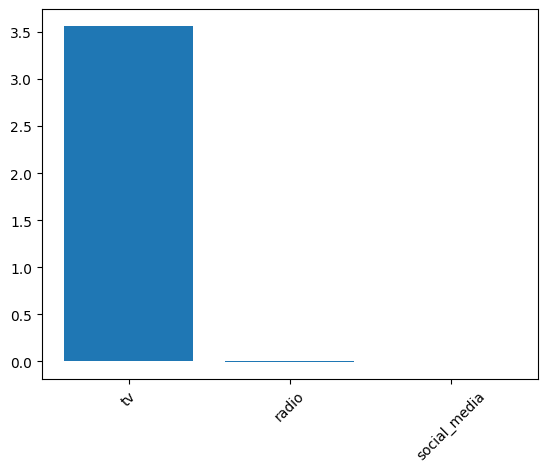

"\nSee how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!\n"

In [24]:
# exercise 09

"""
Lasso regression for feature importance

In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.
"""

# Instructions

"""

    Import Lasso from sklearn.linear_model.
    Instantiate a Lasso regressor with an alpha of 0.3.
    Fit the model to the data.
    Compute the model's coefficients, storing as lasso_coef.

"""

# solution

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

#----------------------------------#

# Conclusion

"""
See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!
"""